In [52]:
#Importing the Text file (method-1)

import nltk
import string
from nltk.corpus import stopwords 

In [34]:
messages=[line.rstrip() for line in open("SMSSpamCollection")]
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

In [35]:
print(len(messages))
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)

5574
0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Vali

In [36]:
#Importing the Csv file (method-2)

import pandas as pd
import numpy as np

In [37]:
df=pd.read_csv("SMSSpamCollection",sep="\t",names=["label","messages"])
df.head()

label                                           messages
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label       5572 non-null object
messages    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [39]:
#Exploratory Data Analysis

df.describe()

label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [40]:
df.groupby("label").count()

messages
label          
ham        4825
spam        747

In [41]:
df["length"]=df["messages"].apply(len)
df.head()

label                                           messages  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [42]:
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

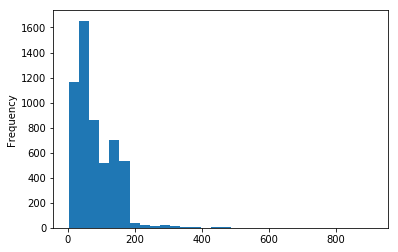

In [43]:
df["length"].plot.hist(bins=30)

In [47]:
df["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [48]:
df[df["length"]==910]["messages"].iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0f4710>,
      dtype=object)

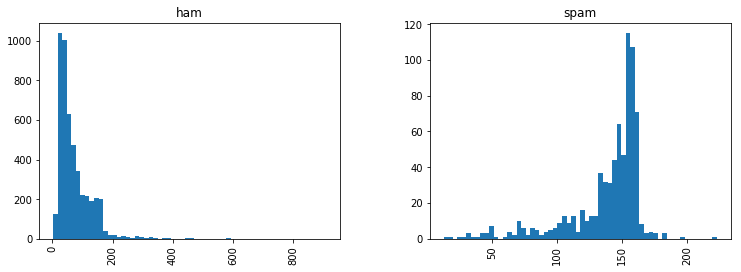

In [49]:
#Histogram Visualization

df.hist(column="length",by="label", bins=60,figsize=(12,4))

In [58]:
#Text Pre-processing(cleaning the text and processing it using a function) and Normalization
#remove punctuations
#remove stopwords
#remove list of clean words

def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    print(nopunc)
    nopunc="".join(nopunc)
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words("English") ]
    return nostop
    

In [59]:
df["messages"].head(5).apply(text_process)

['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't']
['O', 'k', ' ', 'l', 'a', 'r', ' ', 'J', 'o', 'k', 'i', 'n', 'g', ' ', 'w', 'i', 'f', ' ', 'u', ' ', 'o', 'n', 'i']
['F', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'F', 'A', ' ', 'C', 'u', 'p', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 't', 'k', 't', 's', ' ', '2', '1', 's', 't', ' ', 'M', 'a', 'y', ' ', '2', '0', '0', '5', ' ', 'T', 'e', 'x', 't', ' ', 'F', 'A', ' 

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [60]:
#Text Vectorization

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(df["messages"])

['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't']
['O', 'k', ' ', 'l', 'a', 'r', ' ', 'J', 'o', 'k', 'i', 'n', 'g', ' ', 'w', 'i', 'f', ' ', 'u', ' ', 'o', 'n', 'i']
['F', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'F', 'A', ' ', 'C', 'u', 'p', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 't', 'k', 't', 's', ' ', '2', '1', 's', 't', ' ', 'M', 'a', 'y', ' ', '2', '0', '0', '5', ' ', 'T', 'e', 'x', 't', ' ', 'F', 'A', ' 

['I', 's', ' ', 't', 'h', 'a', 't', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'h', 'o', 'w', ' ', 'y', 'o', 'u', ' ', 's', 'p', 'e', 'l', 'l', ' ', 'h', 'i', 's', ' ', 'n', 'a', 'm', 'e']
['I', '‘', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'r', 'y', ' ', 'f', 'o', 'r', ' ', '2', ' ', 'm', 'o', 'n', 't', 'h', 's', ' ', 'h', 'a', ' ', 'h', 'a', ' ', 'o', 'n', 'l', 'y', ' ', 'j', 'o', 'k', 'i', 'n', 'g']
['S', 'o', ' ', 'ü', ' ', 'p', 'a', 'y', ' ', 'f', 'i', 'r', 's', 't', ' ', 'l', 'a', 'r', ' ', 'T', 'h', 'e', 'n', ' ', 'w', 'h', 'e', 'n', ' ', 'i', 's', ' ', 'd', 'a', ' ', 's', 't', 'o', 'c', 'k', ' ', 'c', 'o', 'm', 'i', 'n']
['A', 'f', 't', ' ', 'i', ' ', 'f', 'i', 'n', 'i', 's', 'h', ' ', 'm', 'y', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 't', 'h', 'e', 'n', ' ', 'i', ' ', 'g', 'o', ' ', 's', 't', 'r', ' ', 'd', 'o', 'w', 'n', ' ', 'l', 'o', 'r', ' ', 'A', 'r', 'd', ' ', '3', ' ', 's', 'm', 't', 'h', ' ', 'l', 'o', 'r', ' ', 'U', ' ', 'f', 'i', 'n', 'i', '

['G', 'r', 'e', 'a', 't', ' ', 'I', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'a', 'n', ' ', 'w', 'e', 'l', 'l', ' ', 'e', 'n', 'd', 'o', 'w', 'e', 'd', ' ', 'I', ' ', 'a', 'm', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'i', 'n', 'c', 'h', 'e', 's']
['N', 'o', ' ', 'c', 'a', 'l', 'l', 's', 'm', 'e', 's', 's', 'a', 'g', 'e', 's', 'm', 'i', 's', 's', 'e', 'd', ' ', 'c', 'a', 'l', 'l', 's']
['D', 'i', 'd', 'n', 't', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'h', 'e', 'p', ' ', 'b', ' ', 'i', 'm', 'm', 'u', 'n', 'i', 's', 'a', 't', 'i', 'o', 'n', ' ', 'i', 'n', ' ', 'n', 'i', 'g', 'e', 'r', 'i', 'a']
['F', 'a', 'i', 'r', ' ', 'e', 'n', 'o', 'u', 'g', 'h', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'o', 'n']
['Y', 'e', 'a', 'h', ' ', 'h', 'o', 'p', 'e', 'f', 'u', 'l', 'l', 'y', ' ', 'i', 'f', ' ', 't', 'y', 'l', 'e', 'r', ' ', 'c', 'a', 'n', 't', ' ', 'd', 'o', ' ', 'i', 't', ' ', 'I', ' ', 

['T', 'o', 'd', 'a', 'y', ' ', 'i', 's', ' ', 's', 'o', 'n', 'g', ' ', 'd', 'e', 'd', 'i', 'c', 'a', 't', 'e', 'd', ' ', 'd', 'a', 'y', ' ', 'W', 'h', 'i', 'c', 'h', ' ', 's', 'o', 'n', 'g', ' ', 'w', 'i', 'l', 'l', ' ', 'u', ' ', 'd', 'e', 'd', 'i', 'c', 'a', 't', 'e', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'S', 'e', 'n', 'd', ' ', 't', 'h', 'i', 's', ' ', 't', 'o', ' ', 'a', 'l', 'l', ' ', 'u', 'r', ' ', 'v', 'a', 'l', 'u', 'a', 'b', 'l', 'e', ' ', 'f', 'r', 'n', 'd', 's', ' ', 'b', 'u', 't', ' ', 'f', 'i', 'r', 's', 't', ' ', 'r', 'p', 'l', 'y', ' ', 'm', 'e']
['U', 'r', 'g', 'e', 'n', 't', ' ', 'U', 'R', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'a', ' ', 'c', 'o', 'm', 'p', 'l', 'i', 'm', 'e', 'n', 't', 'a', 'r', 'y', ' ', 't', 'r', 'i', 'p', ' ', 't', 'o', ' ', 'E', 'u', 'r', 'o', 'D', 'i', 's', 'i', 'n', 'c', ' ', 'T', 'r', 'a', 'v', ' ', 'A', 'c', 'o', 'E', 'n', 't', 'r', 'y', '4', '1', ' ', 'O', 'r', ' ', '£', '1', '0', '0', '0', ' ', 'T', 'o', ' ', 'c', 'l', 'a', 'i', 'm'

['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'v', 'e', ' ', 'o', 'n', ' ', '0', '8', '0', '0', ' ', '1', '6', '9', ' ', '6', '0', '3', '1', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', '1', '0', 'a', 'm', '9', 'p', 'm', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', '£', '5', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e']
['H', 'a', 'v', 'e', 'n', 't', ' ', 'p', 'l', 'a', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'I', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'l', 'i', 'd', 'o', ' ', 'o', 'n', 'l', 'y', ' ', 'g', 'o', 't', ' ', '5', '3', '0', ' ', 's', 'h'

['U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'N', 'o', ' ', 'w', 'a', 's', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', '£', '2', '0', '0', '0', ' ', 'B', 'o', 'n', 'u', 's', ' ', 'C', 'a', 'l', 'l', 'e', 'r', ' ', 'P', 'r', 'i', 'z', 'e', ' ', 'o', 'n', ' ', '5', '9', '0', '3', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'o', 'u', 'r', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 't', 'r', 'y', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'U', ' ', 'C', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'L', 'a', 'n', 'd', 'l', 'i', 'n', 'e', ' ', '0', '9', '0', '6', '4', '0', '1', '9', '7', '8', '8', ' ', 'B', 'O', 'X', '4', '2', 'W', 'R', '2', '9', 'C', ' ', '1', '5', '0', 'P', 'P', 'M']
['h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'm', 'y', ' ', 'n', 'e', 'w', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's', ' ', 'a', 'p', 'p', 'l', 'e', 's', 'p', 'a', 'i', 'r', 's', 'a', 'l', 'l', ' ', 't', 'h', 'a', 't', ' ', 'm', 'a', 'l', 'a', 'r', 'k', 'y'

['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'e', 'v', 'e', 'r', 'y', 'w', 'h', 'e', 'r', 'e', ' ', 'd', 'i', 'r', 't', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'f', 'l', 'o', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'w', 'i', 'n', 'd', 'o', 'w', 's', ' ', 'e', 'v', 'e', 'n', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 's', 'h', 'i', 'r', 't', ' ', 'A', 'n', 'd', ' ', 's', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'o', 'p', 'e', 'n', ' ', 'm', 'y', ' ', 'm', 'o', 'u', 't', 'h', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'm', 'e', 's', ' ', 'f', 'l', 'o', 'w', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', 'I', ' ', 'd', 'r', 'e', 'a', 'm', ' ', 'o', 'f', ' ', 'm', 'y', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'e', 'n', ' ', 'h', 'a', 'l', 'f', ' ', 'm', 'y', ' ', 'c', 'h', 'o', 'r', 'e', 's', ' ', 'a', 'r', 'e', ' ', 'o', 'u', 't', ' ', 't', 'o', 'o', ' ',

['H', 'm', 'm', 'm', ' ', 'T', 'h', 'k', ' ', 's', 'u', 'r', 'e', ' ', 'g', 'o', 't', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o', ' ', 'h', 'o', 'p', ' ', 'a', 'r', 'd', ' ', 'Y', 'a', ' ', 'c', 'a', 'n', ' ', 'g', 'o', ' ', '4', ' ', 'f', 'r', 'e', 'e', ' ', 'a', 'b', 't', ' ', 'M', 'u', 'z', ' ', 'c', 'a', 'l', 'l', ' ', 'u', ' ', 't', 'o', ' ', 'd', 'i', 's', 'c', 'u', 's', 's', ' ', 'l', 'i', 'a', 'o', ' ']
['W', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'i', 'n', 'g', ' ', 'd', 'o', 'w', 'n', ' ', 'l', 'a', 't', 'e', 'r', ' ']
['B', 'l', 'o', 'o', 'd', 'y', ' ', 'h', 'e', 'l', 'l', ' ', 'c', 'a', 'n', 't', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'f', 'o', 'r', 'g', 'o', 't', ' ', 'm', 'y', ' ', 's', 'u', 'r', 'n', 'a', 'm', 'e', ' ', 'M', 'r', ' ', ' ', 'I', 'l', 'l', ' ', 'g', 'i', 'v', 'e', ' ', 'u', ' ', 'a', ' ', 'c', 'l', 'u', 'e', ' ', 'i', 't', 's', ' ', 's', 'p', 'a', 'n', 'i', 's', 'h', ' ', 'a', 'n', 'd', ' ', 'b

['G', 'o', 'o', 'd', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', ' ', 'g', 'a']
['U', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'l', 't', 'e', 'r', ' ', 'a', 't', ' ', '1', '1', ' ', 'o', 'k']
['Ü', ' ', 's', 'a', 'y', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'l', 'i', 'k', 'e', ' ', 'd', 'a', 't', ' ', 'i', ' ', 'd', 'u', 'n', ' ', 'b', 'u', 'y', ' ', 'e', 'r', 'i', 'c', 's', 's', 'o', 'n', ' ', 'o', 's', 'o', ' ', 'c', 'a', 'n', 'n', 'o', 't', ' ', 'o', 'r', 'e', 'd', 'i', ' ', 'l', 'a', 'r']
['A', 's', ' ', 'I', ' ', 'e', 'n', 't', 'e', 'r', 'e', 'd', ' ', 'm', 'y', ' ', 'c', 'a', 'b', 'i', 'n', ' ', 'm', 'y', ' ', 'P', 'A', ' ', 's', 'a', 'i', 'd', ' ', ' ', 'H', 'a', 'p', 'p', 'y', ' ', 'B', 'd', 'a', 'y', ' ', 'B', 'o', 's', 's', ' ', ' ', 'I', ' ', 'f', 'e', 'l', 't', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'S', 'h', 'e', ' ', 'a', 's', 'k', 'd', ' ', 'm', 'e', ' ', '4', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'A', 'f', 't', 'e', 'r', ' ', '

['T', 'o', 'm', 'a', 'r', 'r', 'o', 'w', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 'h', 'e', 'a', 'r', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 'l', 'a', 'p', 't', 'o', 'p', ' ', 'c', 'a', 's', 'e', ' ', 's', 'o', ' ', 'i', ' ', 'c', 'a', 'n', 't']
['P', 'L', 'E', 'A', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', ' ', 'T', 'E', 'L', ' ', 'M', 'E', ' ', 'V', ' ', 'A', 'V', 'E', 'N', 'T', ' ', 'D', 'O', 'N', 'E', ' ', 'S', 'P', 'O', 'R', 'T', 'S', 'x']
['O', 'k', 'a', 'y', ' ', 'N', 'o', ' ', 'n', 'o', ' ', 'j', 'u', 's', 't', ' ', 's', 'h', 'i', 'n', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'T', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 'm', 'e', 'a', 'n', 't', ' ', 't', 'o', ' ', 'b', 'e', ' ', 's', 'i', 'g', 'n', 'i', 'n', 'g', ' ', 'b', 'u', 't', ' ', 't', 'h', 'a', 't', ' ', 's', 'o', 'u', 'n', 'd', 's', ' ', 'b', 'e', 't', 't', 'e', 'r']
['A', 'l', 't', 'h', 'o', 'u', 'g', 'h', ' ', 'i', ' ', 't', 'o', 'l', 'd', ' ', 'u', ' ', 'd', 'a', 't', ' ', 'i', 'm', ' ', 'i', '

['T', 'h', 'e', ' ', 'e', 'v', 'o', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'h', 'a', 'd', ' ', 't', 'o', ' ', 'd', 'o', 'w', 'n', 'l', 'o', 'a', 'd', ' ', 'f', 'l', 'a', 's', 'h', ' ', 'J', 'e', 'a', 'l', 'o', 'u', 's']
['R', 'i', 'n', 'g', 't', 'o', 'n', 'e', ' ', 'C', 'l', 'u', 'b', ' ', 'G', 'e', 't', ' ', 't', 'h', 'e', ' ', 'U', 'K', ' ', 's', 'i', 'n', 'g', 'l', 'e', 's', ' ', 'c', 'h', 'a', 'r', 't', ' ', 'o', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'e', 'a', 'c', 'h', ' ', 'w', 'e', 'e', 'k', ' ', 'a', 'n', 'd', ' ', 'c', 'h', 'o', 'o', 's', 'e', ' ', 'a', 'n', 'y', ' ', 't', 'o', 'p', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'r', 'i', 'n', 'g', 't', 'o', 'n', 'e', ' ', 'T', 'h', 'i', 's', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'i', 's', ' ', 'f', 'r', 'e', 'e', ' ', 'o', 'f', ' ', 'c', 'h', 'a', 'r', 'g', 'e']
['C', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'm', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 's', 'o', 'r', 't', 'i', 'n', 'g', ' ', 'o', 'u

['O', 'h', ' ', 'a', 'n', 'd', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 'y', 'o', 'u', ' ', 'd', 'o', ' ', 'h', 'a', 'v', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 'f', 'o', 'o', 'd', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'f', 'r', 'i', 'd', 'g', 'e', ' ', 'W', 'a', 'n', 't', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'o', 'u', 't', ' ', 'f', 'o', 'r', ' ', 'a', ' ', 'm', 'e', 'a', 'l', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ']
['H', 'e', ' ', 'i', 's', ' ', 'a', ' ', 'w', 'o', 'm', 'd', 'a', 'r', 'f', 'u', 'l', 'l', ' ', 'a', 'c', 't', 'o', 'r']
['S', 'M', 'S', ' ', 'a', 'c', ' ', 'B', 'l', 'i', 'n', 'd', ' ', 'D', 'a', 't', 'e', ' ', '4', 'U', ' ', 'R', 'o', 'd', 'd', 's', '1', ' ', 'i', 's', ' ', '2', '1', 'm', ' ', 'f', 'r', 'o', 'm', ' ', 'A', 'b', 'e', 'r', 'd', 'e', 'e', 'n', ' ', 'U', 'n', 'i', 't', 'e', 'd', ' ', 'K', 'i', 'n', 'g', 'd', 'o', 'm', ' ', 'C', 'h', 'e', 'c', 'k', ' ', 'H', 'i', 'm', ' ', 'o', 'u', 't', ' ', 'h', 't', 't', 'p', 'i', 'm', 'g', ' ', 's

['A', 'n', 'y', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'h', 'a', 'v', 'e', ' ', 'h', 'a', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', ' ', 'e', 'v', 'a', 'p', 'o', 'r', 'a', 't', 'e', 'd', ' ', 'a', 's', ' ', 's', 'o', 'o', 'n', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'v', 'i', 'o', 'l', 'a', 't', 'e', 'd', ' ', 'm', 'y', ' ', 'p', 'r', 'i', 'v', 'a', 'c', 'y', ' ', 'b', 'y', ' ', 's', 't', 'e', 'a', 'l', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'e', 'm', 'p', 'l', 'o', 'y', 'e', 'r', 's', ' ', 'p', 'a', 'p', 'e', 'r', 'w', 'o', 'r', 'k', ' ', 'N', 'o', 't', ' ', 'c', 'o', 'o', 'l', ' ', 'a', 't', ' ', 'a', 'l', 'l', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 'd', 'o', ' ', 'n', 'o', 't', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'm', 'e', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'o', 'r', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'r',

['W', 'e', 'l', 'l', ' ', 'i', ' ', 'k', 'n', 'o', 'w', ' ', 'Z', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e', ' ', 'o', 'f', ' ', 'm', 'e', ' ', 'S', 'o', ' ', 'n', 'o', ' ', 'w', 'o', 'r', 'r', 'i', 'e', 's']
['U', 'p', 'd', 'a', 't', 'e', 'N', 'o', 'w', ' ', ' ', 'X', 'm', 'a', 's', ' ', 'O', 'f', 'f', 'e', 'r', ' ', 'L', 'a', 't', 'e', 's', 't', ' ', 'M', 'o', 't', 'o', 'r', 'o', 'l', 'a', ' ', 'S', 'o', 'n', 'y', 'E', 'r', 'i', 'c', 's', 's', 'o', 'n', ' ', ' ', 'N', 'o', 'k', 'i', 'a', ' ', ' ', 'F', 'R', 'E', 'E', ' ', 'B', 'l', 'u', 'e', 't', 'o', 'o', 't', 'h', ' ', 'D', 'o', 'u', 'b', 'l', 'e', ' ', 'M', 'i', 'n', 's', ' ', ' ', '1', '0', '0', '0', ' ', 'T', 'x', 't', ' ', 'o', 'n', ' ', 'O', 'r', 'a', 'n', 'g', 'e', ' ', 'C', 'a', 'l', 'l', ' ', 'M', 'o', 'b', 'i', 'l', 'e', 'U', 'p', 'd', '8', ' ', 'o', 'n', ' ', '0', '8', '0', '0', '0', '8', '3', '9', '4', '0', '2', ' ', 'o', 'r', ' ', 'c', 'a', 'l', 'l', '2', 'o', 'p', 't', 'o', 'u', 't', 'F'

['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 'p', 'u', 't', 't', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'b', 'u', 's', 'i', 'n', 'e', 's', 's', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'Y', 'o', 'u', ' ', 'p', 'u', 't', ' ', 'p', 'i', 'c', 't', 'u', 'r', 'e', 's', ' ', 'o', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 's', 's', ' ', 'o', 'n', ' ', 'f', 'a', 'c', 'e', 'b', 'o', 'o', 'k', ' ', 'Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'o', 'n', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'm', 'o', 's', 't', ' ', 'o', 'p', 'e', 'n', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', 'i', 'v', 'e', ' ', 'e', 'v', 'e', 'r', ' ', 'm', 'e', 't', ' ', 'W', 'h', 'y', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'i', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', ' ', 'p', 'i', 'c', 't', 'u', 'r', 'e', ' ', 'o', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 'r', 'o', 'o', 'm', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'h', 'u', 'r', 't', ' ', 'y', 'o', 'u', ' ', 'm', 'a', 'k', 'e', ' ', 'y', 'o',

['a', 'a', 't', 'h', 'i', 'w', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'd', 'e', 'a', 'r']
['A', 'n', 'y', ' ', 'p', 'a', 'i', 'n', ' ', 'o', 'n', ' ', 'u', 'r', 'i', 'n', 'a', 't', 'i', 'o', 'n', ' ', 'a', 'n', 'y', ' ', 't', 'h', 'i', 'n', 'g', ' ', 'e', 'l', 's', 'e']
['7', ' ', 'a', 't', ' ', 'e', 's', 'p', 'l', 'a', 'n', 'a', 'd', 'e', ' ', 'D', 'o', ' ', 'ü', ' ', 'm', 'i', 'n', 'd', ' ', 'g', 'i', 'v', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 'a', ' ', 'l', 'i', 'f', 't', ' ', 'c', 'o', 's', ' ', 'i', ' ', 'g', 'o', 't', ' ', 'n', 'o', ' ', 'c', 'a', 'r', ' ', 't', 'o', 'd', 'a', 'y']
['I', ' ', 'w', 'n', 't', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'a', ' ', 'B', 'M', 'W', ' ', 'c', 'a', 'r', ' ', 'u', 'r', 'g', 'e', 'n', 't', 'l', 'y', 'i', 't', 's', ' ', 'v', 'r', 'y', ' ', 'u', 'r', 'g', 'e', 'n', 't', 'b', 'u', 't', ' ', 'h', 'v', ' ', 'a', ' ', 's', 'h', 'o', 'r', 't', 'a', 'g', 'e', ' ', 'o', 'f', ' ', ' ', 'l', 't', 'g', 't', ' ', 'L', 'a', 'c', 's', '

['W', 'h', 'e', 'r', 'e', ' ', 'd', 'i', 'd', ' ', 'u', ' ', 'g', 'o', ' ', 'M', 'y', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'i', 's', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'd', 'i', 'e', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 's', 't', 'a', 'y', ' ', 'i', 'n', ' ', 'h', 'e', 'r', 'e']
['G', 'r', 'e', 'a', 't', ' ', 'N', 'e', 'v', 'e', 'r', ' ', 'b', 'e', 'e', 'n', ' ', 'b', 'e', 't', 't', 'e', 'r', ' ', 'E', 'a', 'c', 'h', ' ', 'd', 'a', 'y', ' ', 'g', 'i', 'v', 'e', 's', ' ', 'e', 'v', 'e', 'n', ' ', 'm', 'o', 'r', 'e', ' ', 'r', 'e', 'a', 's', 'o', 'n', 's', ' ', 't', 'o', ' ', 't', 'h', 'a', 'n', 'k', ' ', 'G', 'o', 'd']
['U', 'p', 'g', 'r', 'd', 'C', 'e', 'n', 't', 'r', 'e', ' ', 'O', 'r', 'a', 'n', 'g', 'e', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'y', 'o', 'u', ' ', 'm', 'a', 'y', ' ', 'n', 'o', 'w', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'F', 'R', 'E', 'E', ' ', 'C', 'A', 'M', 'E', 'R', 'A', ' ', 'P', 'H', 'O', 'N', 'E', ' ', 'u

['I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'i', 'v', 'e', ' ', 'f', 'i', 'x', 'e', 'd', ' ', 'i', 't', ' ', 'c', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'n', 'd', ' ', 'a', ' ', 't', 'e', 's', 't', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e']
['S', 'o', 'r', 'r', 'y', ' ', 'm', 'a', 'n', ' ', 'm', 'y', ' ', 'a', 'c', 'c', 'o', 'u', 'n', 't', 's', ' ', 'd', 'r', 'y', ' ', 'o', 'r', ' ', 'I', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'w', 'e', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 't', 'r', 'a', 'd', 'e', ' ', 'b', 'a', 'c', 'k', ' ', 'h', 'a', 'l', 'f', ' ', 'o', 'r', ' ', 'I', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'b', 'u', 'y', ' ', 's', 'o', 'm', 'e', ' ', 's', 'h', 'i', 't', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'y', ' ', 'c', 'r', 'e', 'd', 'i', 't', ' ', 'c', 'a', 'r', 'd']
['C', 'o', 'n', 'g', 'r', 'a', 't', 's', ' ', '1', ' ', 'y', 'e', 'a', 'r', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'c', 'i', 'n', 'e', 'm', 'a', ' ', 'p', 'a', 's

['H', 'i', ' ', 'i', ' ', 'w', 'o', 'n', 't', ' ', 'b', ' ', 'a', 'r', 'd', ' ', '4', ' ', 'c', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', ' ', 'B', 'u', 't', ' ', 'd', 'o', ' ', 'e', 'n', 'j', 'o', 'y', ' ', 'n', ' ', 'm', 'e', 'r', 'r', 'y', ' ', 'x', 'm', 'a', 's']
['T', 'o', 'd', 'a', 'y', 's', ' ', 'O', 'f', 'f', 'e', 'r', ' ', 'C', 'l', 'a', 'i', 'm', ' ', 'u', 'r', ' ', '£', '1', '5', '0', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'o', 'f', ' ', 'd', 'i', 's', 'c', 'o', 'u', 'n', 't', ' ', 'v', 'o', 'u', 'c', 'h', 'e', 'r', 's', ' ', 'T', 'e', 'x', 't', ' ', 'Y', 'E', 'S', ' ', 't', 'o', ' ', '8', '5', '0', '2', '3', ' ', 'n', 'o', 'w', ' ', 'S', 'a', 'v', 'a', 'M', 'o', 'b', ' ', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'o', 'f', 'f', 'e', 'r', 's', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'T', ' ', 'C', 's', ' ', '0', '8', '7', '1', '7', '8', '9', '8', '0', '3', '5', ' ', '£', '3', '0', '0', ' ', 'S', 'u', 'b', ' ', '1', '6', ' ', ' ', 'U', 'n', 's', 'u', 'b', ' ', 'r', 'e', 'p', 'l', 'y', ' '

['H', 'u', 'r', 'r', 'y', ' ', 'u', 'p', ' ', 'I', 'v', 'e', ' ', 'b', 'e', 'e', 'n', ' ', 'w', 'e', 'e', 'd', 'd', 'e', 'f', 'i', 'c', 'i', 'e', 'n', 't', ' ', 'f', 'o', 'r', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'r', 'e', 'e', ' ', 'd', 'a', 'y', 's']
['S', 'u', 'r', 'e', ' ', 'i', 'f', ' ', 'I', ' ', 'g', 'e', 't', ' ', 'a', 'n', ' ', 'a', 'c', 'k', 'n', 'o', 'w', 'l', 'e', 'd', 'g', 'e', 'm', 'e', 'n', 't', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'a', 't', ' ', 'i', 't', 's', ' ', 'a', 's', 't', 'o', 'u', 'n', 'd', 'i', 'n', 'g', 'l', 'y', ' ', 't', 'a', 'c', 't', 'l', 'e', 's', 's', ' ', 'a', 'n', 'd', ' ', 'g', 'e', 'n', 'e', 'r', 'a', 'l', 'l', 'y', ' ', 'f', 'a', 'g', 'g', 'y', ' ', 't', 'o', ' ', 'd', 'e', 'm', 'a', 'n', 'd', ' ', 'a', ' ', 'b', 'l', 'o', 'o', 'd', ' ', 'o', 'a', 't', 'h', ' ', 'f', 'o']
['O', 'k', ' ', 'E', 'v', 'e', 'r', 'y', ' ', 'n', 'i', 'g', 'h', 't', ' ', 't', 'a', 'k', 'e', ' ', 'a', ' ', 'w', 'a', 'r', 'm', ' ', 'b', 'a', 't', 'h

['m', 'y', ' ', 'e', 'x', 'w', 'i', 'f', 'e', ' ', 'w', 'a', 's', ' ', 'n', 'o', 't', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'h', 'a', 'v', 'e', ' ', 'k', 'i', 'd', 's', ' ', 'D', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'k', 'i', 'd', 's', ' ', 'o', 'n', 'e', ' ', 'd', 'a', 'y']
['S', 'o', ' ', 'h', 'o', 'w', 's', ' ', 's', 'c', 'o', 't', 'l', 'a', 'n', 'd', ' ', 'H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 't', ' ', 'o', 'v', 'e', 'r', ' ', 's', 'h', 'o', 'w', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'J', 'J', 'C', ' ', 't', 'e', 'n', 'd', 'e', 'n', 'c', 'i', 'e', 's', ' ', 'T', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e', ' ', 'L', 'i', 'v', 'e', ' ', 't', 'h', 'e', ' ', 'd', 'r', 'e', 'a', 'm']
['T', 'e', 'l', 'l', ' ', 't', 'h', 'e', 'm', ' ', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'h', 'e', 'a', 'd', 'a', 'c', 'h', 'e', ' ', 'a', 'n', 'd', ' ', 'j', 'u', 's', 't', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'u', 's', 'e', ' 

['T', 'H', 'A', 'N', 'X', '4', ' ', 'T', 'O', 'D', 'A', 'Y', ' ', 'C', 'E', 'R', ' ', 'I', 'T', ' ', 'W', 'A', 'S', ' ', 'N', 'I', 'C', 'E', ' ', '2', ' ', 'C', 'A', 'T', 'C', 'H', ' ', 'U', 'P', ' ', 'B', 'U', 'T', ' ', 'W', 'E', ' ', 'A', 'V', 'E', ' ', '2', ' ', 'F', 'I', 'N', 'D', ' ', 'M', 'O', 'R', 'E', ' ', 'T', 'I', 'M', 'E', ' ', 'M', 'O', 'R', 'E', ' ', 'O', 'F', 'T', 'E', 'N', ' ', 'O', 'H', ' ', 'W', 'E', 'L', 'L', ' ', 'T', 'A', 'K', 'E', ' ', 'C', 'A', 'R', 'E', ' ', 'C', ' ', 'U', ' ', 'S', 'O', 'O', 'N', 'C']
['I', ' ', 'c', 'a', 'l', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 's', 'a', 'i', 'd', ' ', 'a', 'l', 'l', ' ', 't', 'o', ' ', 'h', 'i', 'm', 't', 'h', 'e', 'n', ' ', 'h', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'c', 'h', 'o', 'o', 's', 'e', ' ', 't', 'h', 'i', 's', ' ', 'f', 'u', 't', 'u', 'r', 'e']
['H', 'a', 'p', 'p', 'y', ' ', 'v', 'a', 'l', 'e', 'n', 't', 'i', 'n', 'e', 's', ' ', 'd', 'a', 'y', ' ', 'I', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 't', 's', ' 

['F', 'i', 'n', 'e', ' ', 'i', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ', 'v', 'e', 'r', 'y', ' ', 'm', 'u', 'c', 'h']
['D', 'i', 'd', ' ', 'u', ' ', 'g', 'o', 't', ' ', 't', 'h', 'a', 't', ' ', 'p', 'e', 'r', 's', 'o', 'n', 's', ' ', 's', 't', 'o', 'r', 'y']
['T', 'e', 'l', 'l', ' ', 't', 'h', 'e', 'm', ' ', 't', 'h', 'e', ' ', 'd', 'r', 'u', 'g', ' ', 'd', 'e', 'a', 'l', 'e', 'r', 's', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'i', 'm', 'p', 'a', 't', 'i', 'e', 'n', 't']
['S', 'u', 'n', ' ', 'c', 'a', 'n', 't', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'e', 'a', 'r', 't', 'h', ' ', 'b', 'u', 't', ' ', 's', 'e', 'n', 'd', ' ', 'l', 'u', 'v', ' ', 'a', 's', ' ', 'r', 'a', 'y', 's', ' ', 'c', 'l', 'o', 'u', 'd', ' ', 'c', 'a', 'n', 't', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'r', 'i', 'v', 'e', 'r', ' ', 'b', 'u', 't', ' ', 's', 'e', 'n', 'd', ' ', 'l', 'u', 'v', ' ', 'a', 's', ' ', 'r', 'a', 'i', 'n', ' ', 'I', ' ', 'c', 'a', 'n', 't', ' ', 'c', 'o', 'm', 'e', ' ', '

['T', 'h', 'a', 't', 's', ' ', 'a', ' ', 'b', 'i', 't', ' ', 'w', 'e', 'i', 'r', 'd', ' ', 'e', 'v', 'e', 'n', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 'd', 'o', ' ', 's', 'u', 'p', 'p', 'o', 's', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'i', 'n', 'g', ' ', 'B', 'u', 't', ' ', 'g', 'o', 'o', 'd', ' ', 'i', 'd', 'e', 'a', ' ', 's', 'u', 'r', 'e', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'i', 'n', ' ', 'p', 'u', 'b']
['T', 'r', 'u', 'e', ' ', 'd', 'e', 'a', 'r', 'i', ' ', 's', 'a', 't', ' ', 't', 'o', ' ', 'p', 'r', 'a', 'y', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'f', 'e', 'l', 't', ' ', 's', 'o', 's', 'o', ' ', 'i', ' ', 's', 'm', 's', 'd', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 's', 'o', 'm', 'e', ' ', 't', 'i', 'm', 'e']
['I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 'a', 'w', 'a', 'y', ' ', 'f

['M', 'a', 'c', 'h', 'a', ' ', 'd', 'o', 'n', 't', ' ', 'f', 'e', 'e', 'l', ' ', 'u', 'p', 's', 'e', 't', 'i', ' ', 'c', 'a', 'n', ' ', 'a', 's', 's', 'u', 'm', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'i', 'n', 'd', 's', 'e', 't', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'm', 'e', ' ', 'o', 'n', 'e', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 'i', ' ', 'h', 'a', 'v', 'e', ' ', 's', 'o', 'm', 'e', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', ' ', 'p', 'l', 'a', 'n', 's', ' ', 'f', 'o', 'r', ' ', 'b', 'o', 't', 'h', ' ', 'o', 'f', ' ', 'u', 's', 'L', 'E', 'T', ' ', 'L', 'I', 'F', 'E', ' ', 'B', 'E', 'G', 'I', 'N', ' ', 'A', 'G', 'A', 'I', 'N', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'n', 'y', 't', 'i', 'm', 'e']
['O', 'h', ' ', 'i', 's', ' ', 'i', 't', ' ', 'S', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's']
['S', 'f', 'i', 'n', 'e', ' ', 'A', 'n', 'y', 't', 'i', 'm', 'e', ' 

['I', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 't', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'c', 'a', 'r', 'e', ' ', 'o', 'f', ' ', 'y', 'o', 'u', ' ', 'p', 'r', 'i', 'n', 'c', 'e', 's', 's', ' ', 'I', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'r', 'u', 'n', ' ', 'n', 'o', 'w', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 's', 'e', 'n', 'd', ' ', 'p', 'i', 'c', 's', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 'T', 't', 'y', 'l']
['U', ' ', 'a', 'r', 'e', ' ', 's', 'u', 'b', 's', 'c', 'r', 'i', 'b', 'e', 'd', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'C', 'o', 'n', 't', 'e', 'n', 't', ' ', 'S', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'U', 'K', ' ', 'f', 'o', 'r', ' ', '£', '3', ' ', 'p', 'e', 'r', ' ', '1', '0', ' ', 'd', 'a', 'y', 's', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'n', 'd'

['N', 'o', 't', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'a', 'n', 'y', 'w', 'h', 'e', 'r', 'e', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'i', 's', ' ', 'd', 'a', 'm', 'n', ' ', 'j', 'o', 'b', ' ', 'h', 'u', 'n', 't', 'i', 'n', 'g', ' ', 'o', 'v', 'e', 'r', ' ', 'h', 'e', 'r', 'e']
['L', 'o', 'l', ' ', 'U', ' ', 'd', 'r', 'u', 'n', 'k', 'a', 'r', 'd', ' ', 'J', 'u', 's', 't', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'h', 'a', 'i', 'r', ' ', 'a', 't', ' ', 'd', ' ', 'm', 'o', 'm', 'e', 'n', 't', ' ', 'Y', 'e', 'a', 'h', ' ', 's', 't', 'i', 'l', 'l', ' ', 'u', 'p', ' ', '4', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'W', 'a', 't', 's', ' ', 't', 'h', 'e', ' ', 'p', 'l', 'a', 'n', ' ']
['i', 'd', 'c', ' ', 'g', 'e', 't', ' ', 'o', 'v', 'e', 'r', ' ', 'h', 'e', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 't', ' ', 'w', 'e', 'a', 's', 'e', 'l', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'w', 'a', 'y', ' ', 'o', 'u', 't', ' ', 'o', 'f', ' ', 't', 'h', 'i

['A', 'l', 'l', ' ', 'e', ' ', 'b', 'e', 's', 't', ' ', '4', ' ', 'u', 'r', ' ', 'd', 'r', 'i', 'v', 'i', 'n', 'g', ' ', 't', 'm', 'r', ' ']
['Y', 'W', 'H', 'E', 'R', 'E', ' ', 'U', ' ', 'A', 'T', ' ', 'D', 'O', 'G', 'B', 'R', 'E', 'A', 'T', 'H', ' ', 'I', 'T', 'S', ' ', 'J', 'U', 'S', 'T', ' ', 'S', 'O', 'U', 'N', 'D', 'I', 'N', 'G', ' ', 'L', 'I', 'K', 'E', ' ', 'J', 'A', 'N', ' ', 'C', ' ', 'T', 'H', 'A', 'T', '\x92', 'S', ' ', 'A', 'L']
['O', 'm', 'g', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 's', 'c', 'r', 'e', 'a', 'm', ' ', 'I', ' ', 'w', 'e', 'i', 'g', 'h', 'e', 'd', ' ', 'm', 'y', 's', 'e', 'l', 'f', ' ', 'a', 'n', 'd', ' ', 'I', ' ', 'l', 'o', 's', 't', ' ', 'm', 'o', 'r', 'e', ' ', 'w', 'e', 'i', 'g', 'h', 't', ' ', 'W', 'o', 'o', 'h', 'o', 'o']
['T', 'h', 'e', 'r', 'e', ' ', 'g', 'e', 'n', 'e', 'r', 'a', 'l', 'l', 'y', ' ', 'i', 's', 'n', 't', ' ', 'o', 'n', 'e', ' ', 'I', 't', 's', ' ', 'a', 'n', ' ', 'u', 'n', 'c', 'o', 'u', 'n', 't', 'a', 'b', 'l', 'e', ' '

['H', 'a', 'v', 'e', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'T', 't', 'y', 'l']
['H', 'm', 'm', ' ', ' ', 'B', 'i', 't', 's', ' ', 'a', 'n', 'd', ' ', 'p', 'i', 'e', 'c', 'e', 's', ' ', 'l', 'o', 'l', ' ', ' ', 's', 'i', 'g', 'h', 's', ' ']
['H', 'a', 'h', 'a', 'h', 'a', 'u', 's', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'b', 'r', 'a', 'i', 'n', ' ', 'd', 'e', 'a', 'r']
['H', 'e', 'y', ' ', 'Y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'a', 'n', 'y', ' ', 'm', 'a', 'i', 'l']
['S', 'o', 'r', 'r', 'y', ' ', 'l', 'i', 'g', 'h', 't', ' ', 't', 'u', 'r', 'n', 'e', 'd', ' ', 'g', 'r', 'e', 'e', 'n', ' ', 'I', ' ', 'm', 'e', 'a', 'n', 't', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 'f', 'r', 'i', 'e', 'n', 'd', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'b', 'u', 't', ' ', 'h', 'e', ' ', 'm', 'a', 'y', ' ', 'n', 'o', 't', ' ', 'b', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd']
['T', 'h', 'a', 'n', 'k', 's',

['T', 'o', 'd', 'a', 'y', 's', ' ', 'O', 'f', 'f', 'e', 'r', ' ', 'C', 'l', 'a', 'i', 'm', ' ', 'u', 'r', ' ', '£', '1', '5', '0', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'o', 'f', ' ', 'd', 'i', 's', 'c', 'o', 'u', 'n', 't', ' ', 'v', 'o', 'u', 'c', 'h', 'e', 'r', 's', ' ', 'T', 'e', 'x', 't', ' ', 'Y', 'E', 'S', ' ', 't', 'o', ' ', '8', '5', '0', '2', '3', ' ', 'n', 'o', 'w', ' ', 'S', 'a', 'v', 'a', 'M', 'o', 'b', ' ', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'o', 'f', 'f', 'e', 'r', 's', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'T', ' ', 'C', 's', ' ', '0', '8', '7', '1', '7', '8', '9', '8', '0', '3', '5', ' ', '£', '3', '0', '0', ' ', 'S', 'u', 'b', ' ', '1', '6', ' ', ' ', 'U', 'n', 's', 'u', 'b', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 'X']
['U', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 'o', 'r', 'c', 'h', 'a', 'r', 'd', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'U', ' ', 'w', 'a', 'n', ' ', '2', ' ', 'g', 'o', ' ', 'b', 'u', 'y', ' ', 't', 'i', 'c', 'k', 'e', 't', 's', ' ', 'f', 'i', 'r', 's', 't'

['A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 'c', 'a', 's', 't', 'o', 'r', ' ', 'Y', 'o', 'u', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g']
['S', 'u', 'n', 's', 'h', 'i', 'n', 'e', ' ', 'Q', 'u', 'i', 'z', ' ', 'W', 'k', 'l', 'y', ' ', 'Q', ' ', 'W', 'i', 'n', ' ', 'a', ' ', 't', 'o', 'p', ' ', 'S', 'o', 'n', 'y', ' ', 'D', 'V', 'D', ' ', 'p', 'l', 'a', 'y', 'e', 'r', ' ', 'i', 'f', ' ', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'c', 'o', 'u', 'n', 't', 'r', 'y', ' ', 'L', 'i', 'v', 'e', 'r', 'p', 'o', 'o', 'l', ' ', 'p', 'l', 'a', 'y', 'e', 'd', ' ', 'i', 'n', ' ', 'm', 'i', 'd', ' ', 'w', 'e', 'e', 'k', ' ', 'T', 'x', 't', ' ', 'a', 'n', 's', 'r', ' ', 't', 'o', ' ', '8', '2', '2', '7', '7', ' ', '£', '1', '5', '0', ' ', 'S', 'P', 'T', 'y', 'r', 'o', 'n', 'e']
['U', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 's', 'e', 'c', 'r', 'e', 't', ' ', 'a', 'd', 'm', 'i', 'r', 'e', 'r', ' ', 'w', 'h

['S', 'h', 'e', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'a', 't', 't', 'e', 'n', 'd', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 't', 'w', 'o', ' ', 'r', 'o', 'u', 'n', 'd', 's', ' ', 't', 'o', 'd', 'a', 'y', 'b', 'u', 't', ' ', 's', 't', 'i', 'l', 'l', ' ', 'd', 'i', 'd', 't', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 'h', 'o', 'm', 'e']
['A', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'i', ' ', 'd', 'e', 'l', 'e', 't', 'e', 'd', ' ', 'm', 'y', ' ', 'o', 'l', 'd', ' ', 'w', 'e', 'b', 's', 'i', 't', 'e', 'n', 'o', 'w', ' ', 'i', ' ', 'm', ' ', 'b', 'l', 'o', 'g', 'g', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'm', 'a', 'g', 'i', 'c', 'a', 'l', 's', 'o', 'n', 'g', 's', 'b', 'l', 'o', 'g', 's', 'p', 'o', 't', 'c', 'o', 'm']
['K', ' ', 'w', 'a', 'i', 't', ' ', 'c', 'h', 'i', 'k', 'k', 'u', 'i', 'l', ' ', 's', 'e', 'n', 'd', ' ', 'a', 'f', 't', 'r', ' ', ' ', 'l', 't', 'g', 't', ' ', 'm', 'i', 'n', 's']
['B', 'u', 't', ' ', 'I', 'm', ' ', 'o', 'n', ' ', 'a', ' ', 'd', 'i', 'e', 't', ' ', 'A', 'n', '

['A', 'l', 's', 'o', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'd', 'o', 'b', 'b', 'y', 's', ' ', 'b', 'o', 'w', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'a', 'r']
['F', 'i', 'l', 't', 'h', 'y', ' ', 's', 't', 'o', 'r', 'i', 'e', 's', ' ', 'a', 'n', 'd', ' ', 'G', 'I', 'R', 'L', 'S', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', 'r']
['S', 'o', 'r', 'r', 'y', ' ', 'i', ' ', 'n', 'o', 'w', ' ', 't', 'h', 'e', 'n', ' ', 'c', ' ', 'u', 'r', ' ', 'm', 's', 'g', ' ', 'Y', 'a', 'r', ' ', 'l', 'o', 'r', ' ', 's', 'o', ' ', 'p', 'o', 'o', 'r', ' ', 't', 'h', 'i', 'n', 'g', ' ', 'B', 'u', 't', ' ', 'o', 'n', 'l', 'y', ' ', '4', ' ', 'o', 'n', 'e', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'T', 'm', 'r', ' ', 'u', 'l', 'l', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'b', 'r', 'a', 'n', 'd', ' ', 'n', 'e', 'w', ' ', 'r', 'o', 'o', 'm', ' ', '2', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'i', 'n']
['L', 'o', 'v', '

['Y', 'o', ' ', 'g', 'u', 'e', 's', 's', ' ', 'w', 'h', 'a', 't', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'd', 'r', 'o', 'p', 'p', 'e', 'd']
['C', 'a', 'r', 'l', 'o', 's', ' ', 's', 'a', 'y', 's', ' ', 'h', 'e', 'l', 'l', ' ', 'b', 'e', ' ', 'a', 't', ' ', 'm', 'u', ' ', 'i', 'n', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's']
['I', 'm', ' ', 'i', 'n', ' ', 'o', 'f', 'f', 'i', 'c', 'e', ' ', 'n', 'o', 'w', ' ', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n']
['G', 'e', 'e', 'e', 'e', ' ', ' ', 'I', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', ' ', 'Y', 'o', 'u', 'r', ' ', 'a', 'l', 'l', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'F', 'u', 'c', 'k', ' ', 'I', ' ', 'c', 'a', 'n', 't', ' ', 'w', 'a', 'i', 't', ' ', 't', 'i', 'l', 'l', '

['J', 'u', 's', 't', ' ', 'b', 'u', 'y', ' ', 'a', ' ', 'p', 'i', 'z', 'z', 'a', ' ', 'M', 'e', 'a', 't', ' ', 'l', 'o', 'v', 'e', 'r', 's', ' ', 'o', 'r', ' ', 's', 'u', 'p', 'r', 'e', 'm', 'e', ' ', 'U', ' ', 'g', 'e', 't', ' ', 't', 'o', ' ', 'p', 'i', 'c', 'k']
['Y', 'a', ' ', 't', 'o', 'l', 'd', 's', 'h', 'e', ' ', 'w', 'a', 's', ' ', 'a', 's', 'k', 'i', 'n', 'g', ' ', 'w', 'a', 't', 's', ' ', 'm', 'a', 't', 't', 'e', 'r']
['D', 'e', 'a', 'r', 'r', 'e', 'g', 'r', 'e', 't', ' ', 'i', ' ', 'c', 'u', 'd', 'n', 't', ' ', 'p', 'i', 'c', 'k', ' ', 'c', 'a', 'l', 'l', 'd', 'r', 'o', 'v', 'e', ' ', 'd', 'o', 'w', 'n', ' ', 'f', 'r', 'm', ' ', 'c', 't', 'l', 'a', ' ', 'n', 'o', 'w', ' ', 'a', 't', ' ', 'c', 'o', 'c', 'h', 'i', 'n', ' ', 'h', 'o', 'm', 'e', 'l', 'e', 'f', 't', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'i', 'n', ' ', 'c', 'a', 'r', 'e', 'n', 't', 'e', ' ', 's', 't', 'y', 'l', 'e', ' ', 'i', 's', 'h', 't', 'a', 'm', 'a', 'y', 'o', 'o', 'h', 'a', 'p', 'p', 'y', ' ', 'b', 'a', 'k

['I', ' ', 'w', 'a', 'l', 'k', 'e', 'd', ' ', 'a', 'n', ' ', 'h', 'o', 'u', 'r', ' ', '2', ' ', 'c', ' ', 'u', ' ', 'd', 'o', 'e', 's', 'n', '\x92', 't', ' ', 't', 'h', 'a', 't', ' ', 's', 'h', 'o', 'w', ' ', 'I', ' ', 'c', 'a', 'r', 'e', ' ', 'y', ' ', 'w', 'o', 'n', 't', ' ', 'u', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'i', 'm', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's']
['1', '8', ' ', 'd', 'a', 'y', 's', ' ', 't', 'o', ' ', 'E', 'u', 'r', 'o', '2', '0', '0', '4', ' ', 'k', 'i', 'c', 'k', 'o', 'f', 'f', ' ', 'U', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'k', 'e', 'p', 't', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'e', 'd', ' ', 'o', 'f', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'l', 'a', 't', 'e', 's', 't', ' ', 'n', 'e', 'w', 's', ' ', 'a', 'n', 'd', ' ', 'r', 'e', 's', 'u', 'l', 't', 's', ' ', 'd', 'a', 'i', 'l', 'y', ' ', 'U', 'n', 's', 'u', 'b', 's', 'c', 'r', 'i', 'b', 'e', ' ', 's', 'e', 'n', 'd', ' ', 'G', 'E', 'T', ' ', 'E', 'U', 'R', 'O', ' ', 'S', 'T', 'O', 'P', ' ', 

['A', 'i', 'g', 'h', 't', ' ', 'i', 'l', 'l', ' ', 'g', 'e', 't', ' ', 'o', 'n', ' ', 'f', 'b', ' ', 'i', 'n', ' ', 'a', ' ', 'c', 'o', 'u', 'p', 'l', 'e', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's']
['O', 'i', ' ', 'A', 'm', 'i', ' ', 'p', 'a', 'r', 'c', 'h', 'i', ' ', 'n', 'a', ' ', 'r', 'e', ' ', 'K', 'i', 'c', 'c', 'h', 'u', ' ', 'k', 'a', 'a', 'j', ' ', 'k', 'o', 'r', 't', 'e', ' ', 'i', 'c', 'c', 'h', 'a', ' ', 'k', 'o', 'r', 'c', 'h', 'e', ' ', 'n', 'a', ' ', 'P', 'h', 'o', 'n', 'e', ' ', 't', 'a', ' ', 't', 'u', 'l', ' ', 'n', 'a', ' ', 'P', 'l', 'z', ' ', 'P', 'l', 'z']
['W', 'h', 'e', 'r', 'e', ' ', 'c', 'a', 'n', ' ', 'd', 'o', 'w', 'n', 'l', 'o', 'a', 'd', ' ', 'c', 'l', 'e', 'a', 'r', ' ', 'm', 'o', 'v', 'i', 'e', 's', ' ', 'D', 'v', 'd', ' ', 'c', 'o', 'p', 'i', 'e', 's']
['Y', 'e', 'p', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 's', 'c', 'u', 'l', 'p', 't', 'u', 'r', 'e']
['C', 'o', 'n', 'v', 'e', 'y', ' ', 'm', 'y', ' ', 'r', 'e', 'g', 'a', 

['G', 'o', 'o', 'd', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'i', ' ', 'a', 'm', ' ', 'l', 'a', 't', 'e', ' ', 'f', 'o', 'r', ' ', ' ', 'l', 't', 'D', 'E', 'C', 'I', 'M', 'A', 'L', 'g', 't', ' ', 'm', 'i', 'n']
['W', 'I', 'N', ' ', 'U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', '£', '2', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'G', 'U', 'A', 'R', 'A', 'N', 'T', 'E', 'E', 'D', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '1', '7', '9', '0', '1', '2', '1', ' ', 'f', 'r', 'o', 'm', ' ', 'l', 'a', 'n', 'd', ' ', 'l', 'i', 'n', 'e', ' ', 'c', 'l', 'a', 'i', 'm', ' ', '3', '0', '3', '0', ' ', 'v', 'a', 'l', 'i', 'd', ' ', '1', '2', 'h', 'r', 's', ' ', 'o', 'n', 'l', 'y', ' ', '1', '5', '0', 'p', 'p', 'm', ' ']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'd

['N', 'o', ' ', 'y', 'o', 'u', 'l', 'l', ' ', 'j', 'u', 's', 't', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'h', 'e', 'a', 'd', 'a', 'c', 'h', 'e', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'f', 'i', 'g', 'u', 'r', 'e', ' ', 'i', 't', ' ', 'o', 'u', 't', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 't', 'r', 'u', 's', 't', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'd', 'o', ' ', 't', 'h', 'e', ' ', 'm', 'a', 't', 'h', ' ', 'I', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 'O']
['S', ' ', 's', 'f', 'i', 'r', 's', 't', ' ', 't', 'i', 'm', 'e', 'd', 'h', 'o', 'n', 'i', ' ', 'r', 'o', 'c', 'k', 's']
['O', 'k', ' ', 'i', 'l', 'l', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y']
['A', 'w', 'e', 's', 'o', 'm', 'e', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 'a', 'n', ' ', '8', 't', 'h', ' ', 'a', 't', ' ', 'u', 's', 'f', ' ', 's', 'o', 'm', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't']
['S', 'o', 

['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'd', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'd', 'a', 'y', ' ', 'M', 'i', 'n', 'e', ' ', 'w', 'a', 's', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'b', 'u', 's', 'y', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'u', 'p', ' ', 't', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'n', 'i', 'g', 'h', 't']
['A', 'n', 'd', ' ', 'i', 's', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', ' ', 'w', 'a', 'y', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 's', 'e', 'n', 'd', ' ', 's', 'h', 'a', 'd', 'e', 's', ' ', 's', 't', 'u', 'f', 'f', ' ', 't', 'o', ' ', 'h', 'e', 'r', ' ', 'A', 'n', 'd', ' ', 's', 'h', 'e', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', ' ', 't', 'o', 'o']
['R', 'e', 'a', 'l', 'l', 'y', ' ', 'I', ' ', 't', 'o', 't', ' ', 'u', 'r', ' ', 'p', 'a', 'p', 'e', 'r', ' ', 'e', 'n', 'd', 'e', 'd', ' ', 'l', 'o', 'n', 'g', ' ', 'a', 'g', 'o', ' ', 'B', 'u', 't

['M', 's', 'g', 's', ' ', 'r', ' ', 'n', 'o', 't', ' ', 't', 'i', 'm', 'e', ' ', 'p', 'a', 's', 's', 'T', 'h', 'e', 'y', ' ', 's', 'i', 'l', 'e', 'n', 't', 'l', 'y', ' ', 's', 'a', 'y', ' ', 't', 'h', 'a', 't', ' ', 'I', ' ', 'a', 'm', ' ', 't', 'h', 'i', 'n', 'k', 'i', 'n', 'g', ' ', 'o', 'f', ' ', 'U', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'a', 'n', 'd', ' ', 'a', 'l', 's', 'o', ' ', 'm', 'a', 'k', 'i', 'n', 'g', ' ', 'U', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'o', 'f', ' ', 'm', 'e', ' ', 'a', 't', ' ', 'l', 'e', 'a', 's', 't', ' ', '4', ' ', 'a', ' ', 'm', 'o', 'm', 'e', 'n', 't', ' ', 'G', 'd', ' ', 'n', 't', 's', 'w', 't', ' ', 'd', 'r', 'm', 's', ' ', 'S', 'h', 'e', 's', 'i', 'l']
['Y', 'e', 'a', 'h', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 's', 'w', 'i', 'n', 'g', ' ', 'b', 'y', ' ', 'o', 'n', 'c', 'e', ' ', 'm', 'y', ' ', 'r', 'o', 'o', 'm', 'm', 'a', 't', 'e', ' ', 'f', 'i', 'n', 'i', 's', 'h', 'e', 's', ' ', 'u', 'p'

['T', 'r', 'u', 'e', ' ', 'I', 't', ' ', 'i', 's', ' ', 'p', 'a', 's', 's', 'a', 'b', 'l', 'e', ' ', 'A', 'n', 'd', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'h', 'i', 'g', 'h', ' ', 's', 'c', 'o', 'r', 'e', ' ', 'a', 'n', 'd', ' ', 'a', 'p', 'p', 'l', 'y', ' ', 'f', 'o', 'r', ' ', 'p', 'h', 'd', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', '5', 'y', 'e', 'a', 'r', 's', ' ', 'o', 'f', ' ', 's', 'a', 'l', 'a', 'r', 'y', ' ', 'S', 'o', ' ', 'i', 't', ' ', 'm', 'a', 'k', 'e', 's', ' ', 'l', 'i', 'f', 'e', ' ', 'e', 'a', 's', 'i', 'e', 'r']
['N', 'o', ' ', '1', ' ', 'N', 'o', 'k', 'i', 'a', ' ', 'T', 'o', 'n', 'e', ' ', '4', ' ', 'u', 'r', ' ', 'm', 'o', 'b', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 'w', 'e', 'e', 'k', ' ', 'J', 'u', 's', 't', ' ', 't', 'x', 't', ' ', 'N', 'O', 'K', ' ', 't', 'o', ' ', '8', '7', '0', '2', '1', ' ', '1', 's', 't', ' ', 'T', 'o', 'n', 'e', ' ', 'F', 'R', 'E', 'E', ' ', ' ', 's', 'o', ' ', 'g', 'e', 't', ' ', 't', 'x', 't', 'i', 'n', ' '

['N', 'o', 'b', 'o', 'd', 'y', ' ', 'c', 'a', 'n', ' ', 'd', 'e', 'c', 'i', 'd', 'e', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 't', 'o', ' ', 'e', 'a', 't', ' ', 'a', 'n', 'd', ' ', 'd', 'a', 'd', ' ', 'w', 'a', 'n', 't', 's', ' ', 'C', 'h', 'i', 'n', 'e', 's', 'e']
['N', 'o', ' ', 's', 'h', 'o', 'o', 't', ' ', 'm', 'e', ' ', 'I', 'm', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'd', 'o', 'c', 's', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'r', 'o', 'o', 'm', ' ']
['N', 'o', 'w', ' ', 'I', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', '4', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 's', 'o', 'o', 'n']
['H', 'e', 'l', 'l', 'o', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 't', 'h', 'e', ' ', 's', 'i', 't', 'e', ' ', 't', 'o', ' ', 'd', 'o', 'w', 'n', 'l', 'o', 'a', 'd', ' ', 's', 'o', 'n', 'g', 's', ' ', 'i', 't', 's', ' ', 'u', 'r', 'g', 'e', 'n', 't', ' ', 'p', 'l', 's']
['I', ' ', 'd', 'o', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'a', 't', ' ', 'u', ' ', 'm', 'e', 'a', 'n', ' ', ' ', 'i', 

['S', 'E', 'R', 'I', 'O', 'U', 'S', 'L', 'Y', ' ', 'T', 'E', 'L', 'L', ' ', 'H', 'E', 'R', ' ', 'T', 'H', 'O', 'S', 'E', ' ', 'E', 'X', 'A', 'C', 'T', ' ', 'W', 'O', 'R', 'D', 'S', ' ', 'R', 'I', 'G', 'H', 'T', ' ', 'N', 'O', 'W']
['C', 'a', 'n', ' ', 'U', ' ', 'g', 'e', 't', ' ', '2', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'N', 'O', 'W', ' ', 'I', ' ', 'w', 'a', 'n', 'n', 'a', ' ', 'c', 'h', 'a', 't', ' ', '2', ' ', 's', 'e', 't', ' ', 'u', 'p', ' ', 'm', 'e', 'e', 't', ' ', 'C', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'N', 'O', 'W', ' ', 'o', 'n', ' ', '0', '9', '0', '9', '6', '1', '0', '2', '3', '1', '6', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 'c', 'u', 'm', ' ', 'h', 'e', 'r', 'e', ' ', '2', 'm', 'o', 'r', 'o', ' ', 'L', 'u', 'v', ' ', 'J', 'A', 'N', 'E', ' ', 'x', 'x', ' ', 'C', 'a', 'l', 'l', 's', '£', '1', 'm', 'i', 'n', 'm', 'o', 'r', 'e', 'm', 'o', 'b', 's', 'E', 'M', 'S', 'P', 'O', 'B', 'o', 'x', '4', '5', 'P', 'O', '1', '3', '9', 'W', 'A']
['T', 'e', 'e', ' ', 'h', 'e', 'e', ' ', 'O', 'f

['Y', 'o', 'u', 'r', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'I', 'l', 'l', ' ', 'm', 'a', 'k', 'e', ' ', 't', 'h', 'e', ' ', 'a', 'p', 'p', 'o', 'i', 'n', 't', 'm', 'e', 'n', 't', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w']
['D', 'e', 's', 'i', 'g', 'n', 'a', 't', 'i', 'o', 'n', ' ', 'i', 's', ' ', 's', 'o', 'f', 't', 'w', 'a', 'r', 'e', ' ', 'd', 'e', 'v', 'e', 'l', 'o', 'p', 'e', 'r', ' ', 'a', 'n', 'd', ' ', 'm', 'a', 'y', ' ', 'b', 'e', ' ', 's', 'h', 'e', ' ', 'g', 'e', 't', ' ', 'c', 'h', 'e', 'n', 'n', 'a', 'i']
['E', 'n', 'j', 'o', 'y', ' ', 't', 'h', 'e', ' ', 'j', 'a', 'm', 's', 't', 'e', 'r', ' ', 'v', 'i', 'd', 'e', 'o', 's', 'o', 'u', 'n', 'd', ' ', 'g', 'o', 'l', 'd', ' ', 'c', 'l', 'u', 'b', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'r', 'e', 'd', 'i', 't', 's', ' ', 'f', 'o', 'r', ' ', '2', ' ', 'n', 'e', 'w', ' ', 'v', 'i', 'd', 'e', 'o', 's', 'o', 'u', 'n', 'd', 's', '2', ' ', 'l', 'o', 'g', 'o', 's', 'm', 'u', 's', 'i', 'c', 'n', 'e', 'w', 's', ' 

['B', 'u', 'g', 'i', 's', ' ', 'o', 's', 'o', ' ', 'n', 'e', 'a', 'r', ' ', 'w', 'a', 't', ' ']
['Y', 'o', ' ', 't', 'h', 'e', 'r', 'e', 's', ' ', 'n', 'o', ' ', 'c', 'l', 'a', 's', 's', ' ', 't', 'm', 'r', 'w', ' ', 'r', 'i', 'g', 'h', 't']
['L', 'e', 't', ' ', 'U', 'r', ' ', 'H', 'e', 'a', 'r', 't', ' ', 'B', 'e', ' ', 'U', 'r', ' ', 'C', 'o', 'm', 'p', 'a', 's', 's', ' ', 'U', 'r', ' ', 'M', 'i', 'n', 'd', ' ', 'U', 'r', ' ', 'M', 'a', 'p', ' ', 'U', 'r', ' ', 'S', 'o', 'u', 'l', ' ', 'U', 'r', ' ', 'G', 'u', 'i', 'd', 'e', ' ', 'A', 'n', 'd', ' ', 'U', ' ', 'W', 'i', 'l', 'l', ' ', 'N', 'e', 'v', 'e', 'r', ' ', 'l', 'o', 'o', 's', 'e', ' ', 'i', 'n', ' ', 'w', 'o', 'r', 'l', 'd', 'g', 'n', 'u', 'n', ' ', ' ', 'S', 'e', 'n', 't', ' ', 'v', 'i', 'a', ' ', 'W', 'A', 'Y', '2', 'S', 'M', 'S', 'C', 'O', 'M']
['G', 'o', 'o', 'd', 'n', 'i', 'g', 'h', 't', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'w', 'e', 'l', 'l', ' ', 'd', 'a', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 't', 'a', 'k', 'e', ' ', '

['A', 'l', 'l', ' ', 'e', ' ', 'b', 'e', 's', 't', ' ', '4', ' ', 'u', 'r', ' ', 'e', 'x', 'a', 'm', ' ', 'l', 'a', 't', 'e', 'r']
['H', 'o', 'p', 'e', ' ', 'u', 'r', ' ', 'h', 'e', 'a', 'd', ' ', 'd', 'o', 'e', 's', 'n', 't', ' ', 'h', 'u', 'r', 't', ' ', '2', ' ', 'm', 'u', 'c', 'h', ' ', ' ', 'A', 'm', ' ', 'p', 'l', 'o', 'u', 'g', 'h', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'w', 'a', 'y', ' ', 't', 'h', 'r', 'o', 'u', 'g', 'h', ' ', 'a', ' ', 'p', 'i', 'l', 'e', ' ', 'o', 'f', ' ', 'i', 'r', 'o', 'n', 'i', 'n', 'g', ' ', ' ', 'S', 't', 'a', 'y', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'c', 'h', 'i', 'n', 'k', 'y', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'c', 'o', 'm', 'e', ' ', 'r', 'o', 'u', 'n', 'd', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e']
['O', 'h', ' ', 'k', 'i', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'm', 'o', 's', 't', ' ', 'o', 'f', ' ', 'w', 'i', ' ', 'a', 'n', 'd', ' ', 'n', 'z', ' ', 'p', 'l', 'a', 'y', 'e', 'r', 's', ' ', 'u

['T', 'h', 'o', 's', 'e', ' ', 'd', 'u', 'c', 'k', 'i', 'n', 'g', ' ', 'c', 'h', 'i', 'n', 'c', 'h', 'i', 'l', 'l', 'a', 's']
['I', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'a', ' ', 'm', 'a', 'r', 'r', 'i', 'a', 'g', 'e', ' ', 'f', 'u', 'n', 'c', 't', 'i', 'o', 'n']
['L', 'o', 'o', 'k', 's', ' ', 'l', 'i', 'k', 'e', ' ', 'u', ' ', 'w', 'i', 'l', ' ', 'b', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'a', ' ', 'h', 'e', 'a', 'd', 's', 't', 'a', 'r', 't', ' ', 'i', 'm', ' ', 'l', 'e', 'a', 'v', 'i', 'n', 'g', ' ', 'h', 'e', 'r', 'e', ' ', 'b', 'o', 'u', 't', ' ', '2', '3', '0', 'i', 's', 'h', ' ', 'b', 'u', 't', ' ', 'i', 'f', ' ', 'u', ' ', 'r', ' ', 'd', 'e', 's', 'p', 'e', 'r', 'a', 't', 'e', ' ', 'f', 'o', 'r', ' ', 'm', 'y', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'I', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'h', 'e', 'a', 'd', ' ', 'i', 'n', ' ', 'e', 'a', 'r', 'l', 'i', 'e', 'r', 'w', 'e', ' ', 'w', 'e', 'r', 'e', ' ', 'g', 'o', 'i', 'n', ' ', 't', 'o', ' ', 'm', 'e', 'e', 't', ' ', 'i

['T', 'a', 'k', 'e', ' ', 's', 'o', 'm', 'e', ' ', 's', 'm', 'a', 'l', 'l', ' ', 'd', 'o', 's', 'e', ' ', 't', 'a', 'b', 'l', 'e', 't', ' ', 'f', 'o', 'r', ' ', 'f', 'e', 'v', 'e', 'r']
['O', 'h', ' ', 'U', ' ', 'm', 'u', 's', 't', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'a', 'k', 'e', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'R', 'E', 'A', 'L', ' ', 'V', 'a', 'l', 'e', 'n', 't', 'i', 'n', 'e', ' ', 'o', 'u', 't', ' ', 's', 'h', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'f', 'i', 'r', 's', 't']
['J', 'u', 's', 't', ' ', 's', 'e', 'n', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'n', ' ', 'e', 'm', 'a', 'i', 'l', ' ', '–', ' ', 't', 'o', ' ', 'a', 'n', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's', ' ', 'w', 'i', 't', 'h', ' ', 'i', 'n', 'c', 'o', 'm', 'm', ' ', 'i', 'n', ' ', 'i', 't', ' ', 'i', 's', ' ', 't', 'h', 'a', 't', ' ', 'r', 'i', 'g', 'h', 't']
['W', 'i', 'l', 'l', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'b', 'e', ' ', 'a', 't', ' ', 'b', 'l', 'a', 'k', 'e', 's', ' ', 'a', 'l', '

['I', 'n', ' ', 't', 'h', 'e', ' ', 'e', 'n', 'd', ' ', 's', 'h', 'e', ' ', 'm', 'i', 'g', 'h', 't', ' ', 's', 't', 'i', 'l', 'l', ' ', 'v', 'o', 'm', 'i', 't', ' ', 'b', 'u', 't', ' ', 'i', 't', 's', ' ', 'o', 'k', 'a', 'y', ' ', 'N', 'o', 't', ' ', 'e', 'v', 'e', 'r', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'u', 't']
['H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'o', 'n', 'e', 'Y', 'a', 's', ' ', 'i', 'n', ' ', 't', 'o', ' ', 'y', 'o', 'u', 'm', 'o', 'n', 'e', 'y', ' ', 'a', 'i', 'n', 't', ' ', 'a', ' ', 't', 'h', 'i', 'n', 'g', 'h', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'a']
['I', 't', ' ', 'h', 'a', 's', ' ', 'e', 'v', 'e', 'r', 'y', 't', 'h', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'd', 'o', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', ' ', 'w', 'e', 'a', 't', 'h', 'e', 'r', ' ', 'K', 'e', 'e', 'p', ' ', 'e', 'x', 't', 'r', 'a', ' ', 'w', 'a', 'r', 'm', ' ', 'I', 't

['H', 'o', 'w', 's', ' ', 't', 'h', 'e', ' ', 'c', 'h', 'a', 'm', 'p', ' ', 'j', 'u', 's', 't', ' ', 'l', 'e', 'a', 'v', 'i', 'n', 'g', ' ', 'g', 'l', 'a', 's', 'g', 'o', 'w']
['K', 'a', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', 'c', 'o', 'n', 'g', 'r', 'a', 't', 's']
['I', ' ', 'w', 'o', 'n', 'd', 'e', 'r', ' ', 'i', 'f', ' ', 'y', 'o', 'u', 'l', 'l', ' ', 'g', 'e', 't', ' ', 't', 'h', 'i', 's', ' ', 't', 'e', 'x', 't']
['I', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 'h', 'o', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 'g', 'i', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 's', 'o', 'm', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'l', 'o', 'v', 'i', 'n']
['O', 'u', 'r', ' ', 'b', 'r', 'a', 'n', 'd', ' ', 'n', 'e', 'w', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'm', 'u', 's', 'i', 'c', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'i', 's', ' ', 'n', 'o', 'w', ' ', 'l', 'i', 'v', 'e', ' ', 'T', 'h', 'e', ' ', 'f', 'r', 'e', 'e', ' ', 'm', 'u', 's', 'i', 'c', ' ', 'p', 'l', 

['O', 'k', ' ', 'h', 'o', 'w', ' ', 'y', 'o', 'u', ' ', 'd', 'e', 'a', 'r', ' ', 'D', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'l', 'l', ' ', 'c', 'h', 'e', 'c', 'h', 'i']
['Y', 'e', 'a', 'h', ' ', 'w', 'e', ' ', 'd', 'o', ' ', 't', 'o', 't', 'e', 's', ' ', 'W', 'h', 'e', 'n', ' ', 'u', ' ', 'w', 'a', 'n', 'n', 'a']
['O', 'k', ' ', 'i', ' ', 'f', 'o', 'u', 'n', 'd', ' ', 'd', 'i', 's', ' ', 'p', 'i', 'e', 'r', 'r', 'e', ' ', 'c', 'a', 'r', 'd', 'i', 'n', ' ', 'o', 'n', 'e', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'l', 'o', 'o', 'k', 's', ' ', 'n', 'o', 'r', 'm', 'a', 'l', ' ', 'c', 'o', 's', 't', 's', ' ', '2', '0', ' ', 'i', 't', 's', ' ', 'o', 'n', ' ', 's', 'a', 'l', 'e']
['G', 'o', 'o', 'd', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'i', 's', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'r', 'h', 'y', 't', 'h', 'm', ' ', 'T', 'h', 'e', ' ', 'p', 'e', 'r', 's', 'o', 'n', ' ', 'h', 'a', 's', ' ', 't', 'o', ' ', 'e', 's', 't', 'a', 'b', 'l', 'i', 's', 'h', ' ', 'a', ' ', 'r', 'h', 'y', 't', 'h', 'm', '

['I', ' ', 'w', 'a', 's', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'i', 'n', 'g', ' ', 'i', 'f', ' ', 'i', 't', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'o', 'k', 'a', 'y', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', ' ', 't', 'o', ' ', 'c', 'a', 'l', 'l', ' ', 'u', 'n', 'c', 'l', 'e', ' ', 'j', 'o', 'h', 'n', ' ', 'a', 'n', 'd', ' ', 'l', 'e', 't', ' ', 'h', 'i', 'm', ' ', 'k', 'n', 'o', 'w', ' ', 't', 'h', 'a', 't', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 't', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'e', ' ', 'i', 'n', ' ', 'n', 'i', 'g', 'e', 'r', 'i', 'a', ' ', 'a', 's', ' ', 't', 'h', 'e', 'y', ' ', 'r', ' ', 'h', 'e', 'r', 'e', ' ', 'T', 'h', 'a', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'd', 'o', 'l', 'l', 'a', 'r', 's', ' ', 'i', 's', ' ', '2', 'y', 'e', 'a', 'r', 's', ' ', 's', 'e', 'n', 't', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 't', 's', ' ', 'a', ' ', 's', 't', 'r', 'a', 'i', 'n',

['T', 'h', 'n', 'x', ' ', 'd', 'u', 'd', 'e', ' ', 'u', ' ', 'g', 'u', 'y', 's', ' ', 'o', 'u', 't', ' ', '2', 'n', 'i', 't', 'e']
['M', 'e', ' ', 's', 'e', 'f', ' ', 'd', 'e', 'y', ' ', 'l', 'a', 'u', 'g', 'h', ' ', 'y', 'o', 'u', ' ', 'M', 'e', 'a', 'n', 'w', 'h', 'i', 'l', 'e', ' ', 'h', 'o', 'w', 's', ' ', 'm', 'y', ' ', 'd', 'a', 'r', 'l', 'i', 'n', 'g', ' ', 'a', 'n', 'j', 'i', 'e']
['M', 'm', ' ', 'i', ' ', 'h', 'a', 'd', ' ', 'm', 'y', ' ', 'f', 'o', 'o', 'd', ' ', 'd', 'a', ' ', 'f', 'r', 'o', 'm', ' ', 'o', 'u', 't']
['K', ' ', 'm', 'a', 'k', 'e', 's', ' ', 's', 'e', 'n', 's', 'e', ' ', 'b', 't', 'w', ' ', 'c', 'a', 'r', 'l', 'o', 's', ' ', 'i', 's', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'd', 'i', 'f', 'f', 'i', 'c', 'u', 'l', 't', ' ', 's', 'o', ' ', 'y', 'o', 'u', ' ', 'g', 'u', 'y', 's', ' ', 'a', 'r', 'e', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 's', 'm', 'o', 'k', 'e', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'I', ' ', 'g', 'o', ' ', 'p', 'i', 'c', 'k', ' ', 'u', 'p', ' ', 't', 'h', '

['N', 'o', ' ', 's', 'h', 'i', 't', ' ', 'b', 'u', 't', ' ', 'I', ' ', 'w', 'a', 's', 'n', 't', ' ', 't', 'h', 'a', 't', ' ', 's', 'u', 'r', 'p', 'r', 'i', 's', 'e', 'd', ' ', 's', 'o', ' ', 'I', ' ', 'w', 'e', 'n', 't', ' ', 'a', 'n', 'd', ' ', 's', 'p', 'e', 'n', 't', ' ', 't', 'h', 'e', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'a', 't', ' ', 'f', 'r', 'e', 'n', 'c', 'h', ' ', 'g', 'u', 'y', ' ', 'I', ' ', 'm', 'e', 't', ' ', 'i', 'n', ' ', 't', 'o', 'w', 'n', ' ', 'h', 'e', 'r', 'e', ' ', 'a', 'n', 'd', ' ', 'w', 'e', ' ', 'f', 'o', 'o', 'l', 'e', 'd', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'a', ' ', 'b', 'i', 't', ' ', 'b', 'u', 't', ' ', 'I', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'l', 'e', 't', ' ', 'h', 'i', 'm', ' ', 'f', 'u', 'c', 'k', ' ', 'm', 'e']
['0', 'A', 'N', 'E', 'T', 'W', 'O', 'R', 'K', 'S', ' ', 'a', 'l', 'l', 'o', 'w', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'i', 'e', 's', ' ', 't', 'o', ' ', 'b', 'i', 'l', 'l', ' ', 'f', 'o', 'r', ' '

['S', ' ', 'b', 'u', 't', ' ', 'm', 'o', 's', 't', 'l', 'y', ' ', 'n', 'o', 't', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't']
['Ü', ' ', 'v', ' ', 'm', 'a', ' ', 'f', 'a', 'n']
['D', 'u', 'n', 'n', 'o', ' ', 'c', 'o', 's', ' ', 'i', ' ', 'w', 'a', 's', ' ', 'v', ' ', 'l', 'a', 't', 'e', ' ', 'n', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 't', 'h', 'e', 'y', ' ', 'i', 'n', 's', 'i', 'd', 'e', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'B', 'u', 't', ' ', 'w', 'e', ' ', 'a', 't', 'e', ' ', 's', 'p', 'a', 'g', 'e', 'd', 'd', 'i', 'e', 's', ' ', 'l', 'o', 'r', ' ', 'I', 't', 's', ' ', 'e', ' ', 'g', 'a', 'l', 's', ' ', 'w', 'h', 'o', ' ', 'r', ' ', 'l', 'a', 'u', 'g', 'h', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'm', 'e', ' ', 'l', 'o', 'r']
['G', 'u', 'e', 's', 's', ' ', 'w', 'h', 'o', ' ', 's', 'p', 'e', 'n', 't', ' ', 'a', 'l', 'l', ' ', 'l', 'a', 's', 't', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'p', 'h', 'a', 's', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'a', 'n', '

['H', 'a', 'i', ' ', 'p', 'r', 'i', 'y', 'a', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'W', 'h', 'a', 't', ' ', 'd', 'o', 'c', 't', 'o', 'r', ' ', 's', 'a', 'i', 'd', ' ', 'p', 'a', ' ', 'W', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u']
['F', 'r', 'e', 'e', ' ', 'm', 's', 'g', ' ', 'S', 'o', 'r', 'r', 'y', ' ', 'a', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'y', 'o', 'u', ' ', 'o', 'r', 'd', 'e', 'r', 'e', 'd', ' ', 'f', 'r', 'o', 'm', ' ', '8', '1', '3', '0', '3', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'n', 'o', 't', ' ', 'b', 'e', ' ', 'd', 'e', 'l', 'i', 'v', 'e', 'r', 'e', 'd', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'd', 'o', ' ', 'n', 'o', 't', ' ', 'h', 'a', 'v', 'e', ' ', 's', 'u', 'f', 'f', 'i', 'c', 'i', 'e', 'n', 't', ' ', 'c', 'r', 'e', 'd', 'i', 't', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 't', 'o', 'p', ' ', 'u', 'p', ' ', 't', 'o', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', ' ', 't', 'h', 'e', ' ', 's', 'e', 'r', 'v', 'i', 'c'

['K', ' ', 'c', 'a', 'n', ' ', 't', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't']
['H', 'i', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'M', 'a', 'n', 'd', 'y', ' ', 'S', 'u', 'l', 'l', 'i', 'v', 'a', 'n', ' ', 'c', 'a', 'l', 'l', 'i', 'n', 'g', ' ', 'f', 'r', 'o', 'm', ' ', 'H', 'O', 'T', 'M', 'I', 'X', ' ', 'F', 'M', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'c', 'h', 'o', 's', 'e', 'n', ' ', 't', 'o', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', ' ', '£', '5', '0', '0', '0', '0', '0', ' ', 'i', 'n', ' ', 'o', 'u', 'r', ' ', 'E', 'a', 's', 't', 'e', 'r', ' ', 'P', 'r', 'i', 'z', 'e', ' ', 'd', 'r', 'a', 'w', 'P', 'l', 'e', 'a', 's', 'e', ' ', 't', 'e', 'l', 'e', 'p', 'h', 'o', 'n', 'e', ' ', '0', '9', '0', '4', '1', '9', '4', '0', '2', '2', '3', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', '2', '9', '0', '3', '0', '5', ' ', 'o', 'r', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'w', 'i', 'l'

['S', 'M', 'S', ' ', 'A', 'U', 'C', 'T', 'I', 'O', 'N', ' ', 'Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 'a', ' ', 'N', 'o', 'k', 'i', 'a', ' ', '7', '2', '5', '0', 'i', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 'n', ' ', 'o', 'u', 'r', ' ', 'F', 'R', 'E', 'E', ' ', 'a', 'u', 'c', 't', 'i', 'o', 'n', ' ', 'T', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'p', 'a', 'r', 't', ' ', 's', 'e', 'n', 'd', ' ', 'N', 'o', 'k', 'i', 'a', ' ', 't', 'o', ' ', '8', '6', '0', '2', '1', ' ', 'n', 'o', 'w', ' ', 'H', 'G', 'S', 'u', 'i', 't', 'e', '3', '4', '2', '2', 'L', 'a', 'n', 'd', 's', ' ', 'R', 'o', 'w', 'W', '1', 'J', 'H', 'L', ' ', '1', '6']
['K', ' ', 'w', 'a', 'n', 't', ' ', 'u', 's', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 'b', 'y', ' ', 'n', 'o', 'w']
['H', 'o', 'w', ' ', 'I', 't', 's', ' ', 'a', ' ', 'l', 'i', 't', 't', 'l', 'e', ' ', 'd', 'i', 'f', 'f

['H', 'e', 'y', ' ', 'c', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'b', 'l', 'a', 'k', 'e', 's', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's', ' ', 'C', 'a', 'r', 'l', 'o', 's', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'm', 'e', 'e', 't', ' ', 'h', 'i', 'm', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'b', 'u', 't', ' ', 'I', ' ', 'g', 'o', 't', ' ', 'l', 'o', 's', 't', ' ', 'a', 'n', 'd', ' ', 'h', 'e', 's', ' ', 'n', 'o', 't', ' ', 'a', 'n', 's', 'w', 'e', 'r', 'i', 'n', 'g', ' ', 'h', 'i', 's', ' ', 'p', 'h', 'o', 'n', 'e']
['C', 'a', 'n', ' ', 'i', ' ', 'g', 'e', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'o', 'p', 'i', 'n', 'i', 'o', 'n', ' ', 'o', 'n', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 'f', 'i', 'r', 's', 't']
['T', 'h', 'a', 't', ' ', 'o', 'n', 'e', ' ', 'w', 'e', 'e', 'k', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'i', ' ', 'p', 'u', 't', ' ', 'k', 'n', 'o', 'w', ' ', 't', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'W', 'h

['H', 'e', 'y', ' ', 'g', 'o', 'r', 'g', 'e', 'o', 'u', 's', ' ', 'm', 'a', 'n', ' ', 'M', 'y', ' ', 'w', 'o', 'r', 'k', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'i', 's', ' ', 'H', 'a', 'v', 'e', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'o', 'n', 'e', ' ', 'b', 'a', 'b', 'e', ' ', 'S', 'q', 'u', 'i', 's', 'h', 'y', ' ', 'M', 'w', 'a', 'h', 's']
['M', 'a', 'y', ' ', 'i', ' ', 'c', 'a', 'l', 'l', ' ', 'Y', 'o', 'u', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'P', 'l', 's']
['H', 'o', 't', 't', 'e', 's', 't', ' ', 'p', 'i', 'c', 's', ' ', 's', 't', 'r', 'a', 'i', 'g', 'h', 't', ' ', 't', 'o', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'S', 'e', 'e', ' ', 'm', 'e', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'W', 'e', 't', ' ', 'a', 'n', 'd', ' ', 'W', 'a', 'n', 't', 'i', 'n', 'g', ' ', 'j', 'u', 's', 't', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', ' ', 'x', 'x', ' ', 'T', 'e', 'x', 't', ' ', 'P', 'I', 'C', 'S', ' ', 't', 'o', ' ', '8', '9', '5', '5

['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', 'a', ' ', '£', '2', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', 'T', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'y', 'r', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'v', 'e', ' ', 'o', 'n']
['W', 'o', 'u', 'l', 'd', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 'm', 'y', ' ', 'X', 'X', 'X', ' ', 'p', 'i', 'c', 's', ' ', 't', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 's', 'o', ' ', 'h', 'o', 't', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'e', 'r', 'e', ' ', 'n', 'e', 'a', 'r', 'l', 'y', ' ', 'b', 'a', 'n', 'n', 'e', 'd', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'u', 'k']
['H', 'M', 'V

['E', 'L', 'L', 'O', ' ', 'B', 'A', 'B', 'E', ' ', 'U', ' ', 'O', 'K']
['H', 'e', 'l', 'l', 'o', ' ', 'b', 'e', 'a', 'u', 't', 'i', 'f', 'u', 'l', ' ', 'r', ' ', 'u', ' ', 'o', 'k', ' ', 'I', 'v', 'e', ' ', 'k', 'i', 'n', 'd', 'a', ' ', 'a', 'd', ' ', 'a', ' ', 'r', 'o', 'w', ' ', 'w', 'i', 'v', ' ', 'a', 'n', 'd', ' ', 'h', 'e', ' ', 'w', 'a', 'l', 'k', 'e', 'd', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', ' ', 'p', 'u', 'b', ' ', 'I', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 'a', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'w', 'i', 'v', ' ', 'u', ' ', 'M', 'i', 's', 's', ' ', 'u', ' ']
['T', 'h', 'e', 'n', ' ', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'i', 'k', 'e', 'a', ' ', 's', 't', 'r', ' ', 'a', 'f', 't', ' ', 'd', 'a', 't']
['B', 'e', 'c', 'o', 'z', ' ', 'i', 't', 's', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'j', 'a', 'n', ' ', 'w', 'h', 'n', ' ', 'a', 'l', ' ', 't', 'h', 'e', ' ', 'p', 'o', 's', 't', ' ', 'o', 'f', 'i', 'c', 'e', ' ', 'i', 's', ' ', 'i', 'n', ' ', 'h', 'o', 'l', 'i', 'd', '

['C', 'a', 'r', 'r', 'y', ' ', 'o', 'n', ' ', 'n', 'o', 't', ' ', 'd', 'i', 's', 't', 'u', 'r', 'b', 'i', 'n', 'g', ' ', 'b', 'o', 't', 'h', ' ', 'o', 'f', ' ', 'y', 'o', 'u']
['W', 'h', 'a', 't', ' ', 'p', 'a', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'I', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'b', 'a', 't', 'h']
['J', 'u', 's', ' ', 'f', 'i', 'n', 'i', 's', 'h', 'e', 'd', ' ', 'a', 'v', 'a', 't', 'a', 'r', ' ', 'n', 'i', 'g', 'r', 'o']
['R', ' ', 'u', ' ', 'o', 'v', 'e', 'r', ' ', 's', 'c', 'r', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'i', 't']
['H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'd', 'a', 'y']
['D', 'i', 'd', ' ', 'e', 'i', 't', 'h', 'e', 'r', ' ', 'o', 'f', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'a', 'n', 'y', ' ', 'i', 'd', 'e', 'a', 's', ' ', 'D', 'o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'o', 'f', ' ', 'a', 'n', 'y', 'p', 'l', 'a', 'c', 'e',

['E', 'h', ' ', 'd', 'e', 'n', ' ', 's', 'a', 't', ' ', 'u', ' ', 'b', 'o', 'o', 'k', ' ', 'e', ' ', 'k', 'b', ' ', 'l', 'i', 'a', 'o', ' ', 'h', 'u', 'h']
['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'b', 'e', 'e', 'n', ' ', 'p', 'r', 'a', 'c', 't', 'i', 's', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'u', 'r', 't', 's', 'e', 'y']
['S', 'h', 'a', 'l', 'l', ' ', 'i', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'p', 'i', 'c', 'k', 'l', 'e']
['L', 'o', 'l', ' ', 'b', 'o', 'o', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'h', 'o', 'p', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'a', ' ', 'l', 'a', 'u', 'g', 'h']
['Y', 'E', 'H', ' ', 'I', ' ', 'A', 'M', ' ', 'D', 'E', 'F', ' ', 'U', 'P', '4', ' ', 'S', 'O', 'M', 'E', 'T', 'H', 'I', 'N', 'G', ' ', 'S', 'A', 'T', 'J', 'U', 'S', 'T', ' ', 'G', 'O', 'T', ' ', 'P', 'A', 'Y', 'E', 'D', '2', 'D', 'A', 'Y', ' ', ' ', 'I', ' ', 'H', 'A', 'V', 'B', 'E', 'E', 'N', ' ', 'G', 'I', 'V', 'E', 'N', ' ', 'A', '£', '5', '0', ' ', 'P', 'A', 

['I', 's', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 'n', 'y', ' ', 'm', 'o', 'v', 'i', 'e', ' ', 't', 'h', 'e', 'a', 't', 'r', 'e', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'g', 'o', ' ', 't', 'o', ' ', 'a', 'n', 'd', ' ', 'w', 'a', 't', 'c', 'h', ' ', 'u', 'n', 'l', 'i', 'm', 'i', 't', 'e', 'd', ' ', 'm', 'o', 'v', 'i', 'e', 's', ' ', 'a', 'n', 'd', ' ', 'j', 'u', 's', 't', ' ', 'p', 'a', 'y', ' ', 'o', 'n', 'c', 'e']
['U', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'a', 'l', 'o', 'n', 'e', ' ', 'I', ' ', 'n', 'o', 'w', ' ', 's', 'o', ' ', 'b', 'o', 'r', 'e', 'd']
['Y', 'e', 's', ' ', 'o', 'b', 'v', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'b', 'u', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 't', 'h', 'e', ' ', 'e', 'g', 'g', 's', 'p', 'e', 'r', 't', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'p', 'o', 't', 'a', 't', 'o', ' ', 'h', 'e', 'a', 'd', '…', ' ', 'S', 'p', 'e', 'a', 'k', ' ', 's', 'o', 'o', 'n', ' ']
['N', 'a', 'h', ' ', 'm', 'a', 'n', ' ', 'm', 'y', '

['Y', ' ', 's', 'o', ' ', 'l', 'a', 't', 'e', ' ', 'b', 'u', 't', ' ', 'i', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'n', ' ', 'g', 'e', 't', ' ', 'd', 'a', ' ', 'l', 'a', 'p', 't', 'o', 'p']
['S', 'i', 'r', ' ', 'I', ' ', 'a', 'm', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'a', 'i', 'l']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'h', 'a', 'r', 'g', 'e', ' ', 'm', 'y', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'u', 'p', ' ', 'i', 'n', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g']
['N', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'i', ' ', 'g', 'o', 't', ' ', 'm', 's', 'g', ' ', 'f', 'r', 'm', ' ', 't', 'h', 't', ' ', 'u', 'n', 'k', 'n', 'o', 'w', 'n', ' ', 'n', 'o']
['U', 'g', 'h', ' ', 'f', 'u', 'c', 'k', ' ', 'i', 't', ' ', 'I', 'm', ' ', 'r', 'e', 's', 'u', 'b', 'b', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'e', 'v', 'e']
['H', 'e', ' ', 'd', 'i', 'd', 'n', 't', ' ', 's',

['I', ' ', 't', 'h', 'k', ' ', '5', '3', '0', ' ', 'l', 'o', 'r', ' ', 'B', 'u', 't', ' ', 'd', 'u', 'n', 'n', 'o', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 't', 'i', 'c', 'k', 'e', 't', 's', ' ', 'a', ' ', 'n', 'o', 't', ' ', 'W', 'a', 't', ' ', 'u', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'n', 'o', 'w']
['A', 'u', 'd', 'r', 'i', 'e', ' ', 'l', 'o', 'u', 's', 'y', ' ', 'a', 'u', 't', 'o', 'c', 'o', 'r', 'r', 'e', 'c', 't']
['I', 't', 's', ' ', 'a', ' ', 's', 'i', 't', 'e', ' ', 't', 'o', ' ', 's', 'i', 'm', 'u', 'l', 'a', 't', 'e', ' ', 't', 'h', 'e', ' ', 't', 'e', 's', 't', ' ', 'I', 't', ' ', 'j', 'u', 's', 't', ' ', 'g', 'i', 'v', 'e', 's', ' ', 'y', 'o', 'u', ' ', 'v', 'e', 'r', 'y', ' ', 't', 'o', 'u', 'g', 'h', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', 's', ' ', 't', 'o', ' ', 't', 'e', 's', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'r', 'e', 'a', 'd', 'i', 'n', 'e', 's', 's']
['A', 'n', 'y', 'w', 'a', 'y', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'h', 'i', 't', ' ', '

['W', 'e', 'l', 'l', ' ', 'I', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'a', 'n', ' ', 'a', 'u', 'n', 't', 'y']
['M', 'i', 'n', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 'l', 'i', 'k', 'e', ' ', 'a', 'l', 'l', ' ', 'f', 'r', ' ', 'c', 'h', 'i', 'n', 'a', ' ', 't', 'h', 'e', 'n', ' ', 's', 'o', ' ', 'n', 'o', 'i', 's', 'y']
['L', 'a', 't', 'e', 'r', ' ', 'i', ' ', 'g', 'u', 'e', 's', 's', ' ', 'I', ' ', 'n', 'e', 'e', 'd', 'a', ' ', 'd', 'o', ' ', 'm', 'c', 'a', 't', ' ', 's', 't', 'u', 'd', 'y', ' ', 't', 'o', 'o']
['S', 'f', 'r', 'o', 'm', ' ', 't', 'h', 'e', ' ', 't', 'r', 'a', 'i', 'n', 'i', 'n', 'g', ' ', 'm', 'a', 'n', 'u', 'a', 'l', ' ', 'i', 't', ' ', 's', 'h', 'o', 'w', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'n', 'o', ' ', 't', 'e', 'c', 'h', ' ', 'p', 'r', 'o', 'c', 'e', 's', 's', 'i', 't', 's', ' ', 'a', 'l', 'l', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'p', 'a', 's', 's', 'w', 'o', 'r', 'd', ' ', 'r', 'e', 's', 'e', 't', ' ', 'a', 'n', 'd', ' ', '

['S', 'e', 'e', ' ', 'I', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', ' ', 'i', 't', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'r', 'o', 'u', 'g', 'h']
['I', 'm', ' ', 'a', 't', ' ', 'w', 'o', 'r', 'k', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l']
['g', 'e', 't', ' ', 'r', 'e', 'a', 'd', 'y', ' ', 't', 'o', ' ', 'm', 'o', 'a', 'n', ' ', 'a', 'n', 'd', ' ', 's', 'c', 'r', 'e', 'a', 'm', ' ']
['O', 'h', ' ', 'k', ' ', 'w', 'h', 'y', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'j', 'o', 'b', ' ', 't', 'h', 'e', 'n', ' ', 'w', 'h', 'a', 't', 's', ' ', 'u', 'p']
['I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 's', 'o', ' ', 'Y', 'o', 'u', ' ', 'd', 'o', 'n', 't', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', 't', 'h', 'a', 't', ' ', 'l', 'a', 't', 'e', ' ', 'o', 'n', ' ', 'a', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'E', 'S', 'P', 'E', 'C', 'I', 'A', 'L', 'L', 'Y', ' ', 'w', 

['U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', '4', ' ', 'C', 'o', 's', 't', 'a', ' ', 'D', 'e', 'l', ' ', 'S', 'o', 'l', ' ', 'H', 'o', 'l', 'i', 'd', 'a', 'y', ' ', 'o', 'r', ' ', '£', '5', '0', '0', '0', ' ', 'a', 'w', 'a', 'i', 't', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '5', '0', '0', '9', '0', '0', '4', '4', ' ', 'N', 'o', 'w', ' ', 't', 'o', 'C', 'l', 'a', 'i', 'm', ' ', 'S', 'A', 'E', ' ', 'T', 'C', ' ', 's', ' ', 'P', 'O', 'B', 'o', 'x', '3', '3', '4', ' ', 'S', 't', 'o', 'c', 'k', 'p', 'o', 'r', 't', ' ', 'S', 'K', '3', '8', 'x', 'h', ' ', 'C', 'o', 's', 't', '£', '1', '5', '0', 'p', 'm', ' ', 'M', 'a', 'x', '1', '0', 'm', 'i', 'n', 's']
['H', 'm', 'm', ' ', 'w', 'e', 'l', 'l', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'n', 'i', 'g', 'h', 't', ' ']
['J', 'u', 's', 't', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 't', 'o', ' ', 's', 'a', 'y', ' ', 'h', 'o', 'l', 'y', ' ', 's', 'h', 'i', 't', ' ', 'y', 'o', 'u', ' 

['S', 'i', 'c', 'o', 'm', 'o', ' ', 'n', 'o', 'l', 'i', 's', 't', 'e', 'n', 'e', 'd', '2', 't', 'h', 'e', ' ', 'p', 'l', 'a', 'i', 'd', ' ', 'a', 'l', 'b', 'u', 'm', 'q', 'u', 'i', 't', 'e', ' ', 'g', 'd', 't', 'h', 'e', ' ', 'n', 'e', 'w', ' ', 'a', 'i', 'r', '1', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'i', 's', ' ', 'h', 'i', 'l', 'a', 'r', 'i', 'o', 'u', 's', 'a', 'l', 's', 'o', ' ', 'b', 'o', 'u', 'g', 'h', 't', '\x94', 'b', 'r', 'a', 'i', 'n', 'd', 'a', 'n', 'c', 'e', '\x94', 'a', ' ', 'c', 'o', 'm', 'p', 'o', 'f', 's', 't', 'u', 'f', 'f', ' ', 'o', 'n', ' ', 'a', 'p', 'h', 'e', 'x', '\x92', 's', ' ', 'a', 'b', 'e', 'l', 'u', ' ', 'h', 'a', 'v', '2', 'h', 'e', 'a', 'r', ' ', 'i', 't', 'c', ' ', 'u', ' ', 's', 'n', ' ', 'x', 'x', 'x', 'x']
['P', 'l', 's', ' ', 't', 'e', 'l', 'l', ' ', 'n', 'e', 'l', 's', 'o', 'n', ' ', 't', 'h', 'a', 't', ' ', 't', 'h', 'e', ' ', 'b', 'b', 's', ' ', 'a', 'r', 'e', ' ', 'n', 'o', ' ', 'l', 'o', 'n', 'g', 'e', 'r', ' ', 'c', 'o', 'm', 'i', 'n', ' ', 'T',

['D', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'o', 'w', ' ', 'h', 'i', 'm', ' ', 'a', 'n', 'd', ' ', 'w', 'o', 't', ' ', 'd', 'i', 'd', ' ', 'h', 'e', ' ', 's', 'a', 'y', ' ', 'o', 'r', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'u', ' ', 'n', 'o', 't', ' ', 'c', ' ', 'h', 'i', 'm', ' ', '4', ' ', 'd', 'u', 's', 't']
['I', 't', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 't', 'a', 'k', 'e', ' ', 'a', 'b', 'o', 'u', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n']
['N', 'o', 't', ' ', 'h', 'e', 'a', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'U', '4', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'C', 'a', 'l', 'l', ' ', '4', ' ', 'r', 'u', 'd', 'e', ' ', 'c', 'h', 'a', 't', ' ', 'p', 'r', 'i', 'v', 'a', 't', 'e', ' ', 'l', 'i', 'n', 'e', ' ', '0', '1', '2', '2', '3', '5', '8', '5', '3', '3', '4', ' ', 't', 'o', ' ', 'c', 'u', 'm', ' ', 'W', 'a', 'n', ' ', '2', 'C', ' ', 'p', 'i', 'c', 's', ' ', 'o', 'f', ' ', 'm', 'e', ' ', 'g', 'e', 't', 't', 'i', 'n', ' ', 's', 'h', 'a', 'g', 'g', 'e

['C', 'o', 'n', 'g', 'r', 'a', 't', 's', ' ', '1', ' ', 'y', 'e', 'a', 'r', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'c', 'i', 'n', 'e', 'm', 'a', ' ', 'p', 'a', 's', 's', ' ', 'f', 'o', 'r', ' ', '2', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', 's', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '1', '2', '0', '9', '4', '6', '5', ' ', 'n', 'o', 'w', ' ', 'C', ' ', 'S', 'u', 'p', 'r', 'm', 'a', 'n', ' ', 'V', ' ', 'M', 'a', 't', 'r', 'i', 'x', '3', ' ', 'S', 't', 'a', 'r', 'W', 'a', 'r', 's', '3', ' ', 'e', 't', 'c', ' ', 'a', 'l', 'l', ' ', '4', ' ', 'F', 'R', 'E', 'E', ' ', 'b', 'x', '4', '2', '0', 'i', 'p', '4', '5', 'w', 'e', ' ', '1', '5', '0', 'p', 'm', ' ', 'D', 'o', 'n', 't', ' ', 'm', 'i', 's', 's', ' ', 'o', 'u', 't']
['N', 'o', 't', 'h', 'i', 'n', ' ', 'c', 'o', 'm', 'e', 's', ' ', 't', 'o', ' ', 'm', 'y', ' ', 'm', 'i', 'n', 'd', ' ', 'Ü', ' ', 'h', 'e', 'l', 'p', ' ', 'm', 'e', ' ', 'b', 'u', 'y', ' ', 'h', 'a', 'n', 'g', 'e', 'r', ' ', 'l', 'o', 'r', ' ', 'U', 'r', ' '

['A', 'm', ' ', 's', 'u', 'r', 'f', 'i', 'n', 'g', ' ', 'o', 'n', 'l', 'i', 'n', 'e', ' ', 's', 't', 'o', 'r', 'e', ' ', 'F', 'o', 'r', ' ', 'o', 'f', 'f', 'e', 'r', 's', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'a', 'n', 'y', ' ', 't', 'h', 'i', 'n', 'g']
['L', 'o', 'n', 'g', ' ', 'b', 'e', 'a', 'c', 'h', ' ', 'l', 'o', 'r', ' ', 'E', 'x', 'p', 'e', 'c', 't', 'e', 'd', ' ', 'U', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 'n', 'o', 'w']
['A', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y']
['W', 'e', ' ', 'a', 'r', 'e', ' ', 'b', 'o', 't', 'h', ' ', 'f', 'i', 'n', 'e', ' ', 'T', 'h', 'a', 'n', 'k', 's']
['W', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 't', 'o', ' ', 'h', 'e', 'r', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 't', 'r', 'u', 't', 'h']
['D', 'o', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e', ' ', 'I', 't', 'a', 'l', 'i', 'a', 'n',

['O', 'k', 'a', 'y', ' ', 's', 'a', 'm', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', ' ', 'W', 'e', 'l', 'l', ' ', 't', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'c', 'l', 'a', 'r', 'i', 'f', 'i', 'c', 'a', 't', 'i', 'o', 'n']
['I', 'l', 'l', ' ', 't', 'a', 'l', 'k', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'o', 't', 'h', 'e', 'r', 's', ' ', 'a', 'n', 'd', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 'j', 'u', 's', 't', ' ', 'c', 'o', 'm', 'e', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 't', 'h', 'e', 'n']
['S', 'p', 'o', 'o', 'k', ' ', 'u', 'p', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'H', 'a', 'l', 'l', 'o', 'w', 'e', 'e', 'n', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ', 'a', ' ', 'l', 'o', 'g', 'o', ' ', ' ', 'p', 'i', 'c', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'p', 'l', 'u', 's', ' ', 'a', ' ', 'f', 'r', 'e', 'e', ' ', 'e', 'e', 'r

['P', 'I', 'C', 'K', ' ', 'U', 'R', ' ', 'F', 'O', 'N', 'E', ' ', 'U', 'P', ' ', 'N', 'O', 'W', ' ', 'U', ' ', 'D', 'U', 'M', 'B']
['T', 'h', 'a', 'n', 'k', 's', ' ', 'd', 'a', ' ', 't', 'h', 'a', 'n', 'g', 'a', 'm', ' ', 'i', ' ', 'f', 'e', 'e', 'l', ' ', 'v', 'e', 'r', 'y', ' ', 'v', 'e', 'r', 'y', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'd', 'e', 'a', 'r', ' ', 'I', ' ', 'a', 'l', 's', 'o', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ', 'd', 'a']
['O', 'k', 'e', 'y', ' ', 'd', 'o', 'k', 'e', ' ', 'I', 'm', ' ', 'a', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'b', 'u', 't', ' ', 'n', 'o', 't', ' ', 'd', 'r', 'e', 's', 's', 'e', 'd', ' ', 'c', 'o', 's', ' ', 'l', 'a', 'y', 'i', 'n', 'g', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'i', 'l', 'l', ' ', 'S', 'p', 'e', 'a', 'k', ' ', 't', 'o', ' ', 'y', 'o', 'u', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'b', 'o', 'u', 't', ' ', 't', 'i', 'm', 'e', 's', ' ', 'a', 'n', 'd', ' ', 's', 't', 'u', 'f', 'f', ' ']
['I', ' ', 'd', 'o', 'n', 't', ' ', 'r', 'u', 'n', '

['S', 'M', 'S', ' ', 'S', 'E', 'R', 'V', 'I', 'C', 'E', 'S', ' ', 'F', 'o', 'r', ' ', 'y', 'o', 'u', 'r', ' ', 'i', 'n', 'c', 'l', 'u', 's', 'i', 'v', 'e', ' ', 't', 'e', 'x', 't', ' ', 'c', 'r', 'e', 'd', 'i', 't', 's', ' ', 'p', 'l', 's', ' ', 'g', 'o', 't', 't', 'o', ' ', 'w', 'w', 'w', 'c', 'o', 'm', 'u', 'k', 'n', 'e', 't', ' ', 'l', 'o', 'g', 'i', 'n', ' ', '3', 'q', 'x', 'j', '9', ' ', 'u', 'n', 's', 'u', 'b', 's', 'c', 'r', 'i', 'b', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'S', 'T', 'O', 'P', ' ', 'n', 'o', ' ', 'e', 'x', 't', 'r', 'a', ' ', 'c', 'h', 'a', 'r', 'g', 'e', ' ', 'h', 'e', 'l', 'p', ' ', '0', '8', '7', '0', '2', '8', '4', '0', '6', '2', '5', ' ', 'c', 'o', 'm', 'u', 'k', '2', '2', '0', 'c', 'm', '2', ' ', '9', 'A', 'E']
['O', 'i', 'c', ' ', 'T', 'h', 'e', 'n', ' ', 'b', 'e', 't', 't', 'e', 'r', ' ', 'q', 'u', 'i', 'c', 'k', 'l', 'y', ' ', 'g', 'o', ' ', 'b', 'a', 't', 'h', 'e', ' ', 'n', ' ', 's', 'e', 't', 't', 'l', 'e', ' ', 'd', 'o', 'w', 'n']
['E', 'r', 'r', ' ', 'C

['G', 'r', 'e', 'a', 't', ' ', 'I', 'm', ' ', 'i', 'n', ' ', 'c', 'h', 'u', 'r', 'c', 'h', ' ', 'n', 'o', 'w', ' ', 'w', 'i', 'l', 'l', ' ', 'h', 'o', 'l', 'l', 'a', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'g', 'e', 't', ' ', 'o', 'u', 't']
['B', 'a', 'c', 'k', ' ', 'i', 'n', ' ', 'b', 'r', 'u', 'm', ' ', 'T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 'p', 'u', 't', 't', 'i', 'n', 'g', ' ', 'u', 's', ' ', 'u', 'p', ' ', 'a', 'n', 'd', ' ', 'k', 'e', 'e', 'p', 'i', 'n', 'g', ' ', 'u', 's', ' ', 'a', 'l', 'l', ' ', 'a', 'n', 'd', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'S', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 's', 'o', 'o', 'n', ' ']
['I', ' ', 'd', 'o', 'n', 'n', 'o', ' ', 'i', 'f', ' ', 't', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 's', 'c', 'o', 'r', 'a', 'b', 'l', 'e']
['l', 't', 'g', 't', ' ', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'l', 'o', 'x', 'a', 'h', 'a', 't', 'c', 'h', 'e', 'e', ' ', 'x', 'm', 'a', 's', ' ', 't', 'r', 'e', 'e', ' ', 'b', 'u', 'r', 'n', 'i', 'n', 'g', ' ', 'u', '

['O', 'k', ' ', 'l', 'o', 'r', ' ', 'w', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'ü', ' ', 'f', 'i', 'n', 'i', 's', 'h']
['P', 'r', 'i', 'n', 'c', 'e', 's', 's', ' ', 'i', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'o', ' ', 'm', 'a', 'k', 'e', ' ', 'l', 'o', 'v', 'e', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 't', 'i', 'm', 'e', 's', ' ', 'p', 'e', 'r', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'H', 'o', 'p', 'e', ' ', 't', 'h', 'a', 't', 's', ' ', 'n', 'o', 't', ' ', 'a', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm']
['M', 'm', ' ', 'i', ' ', 'a', 'm', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 't', 'o', ' ', 'r', 'a', 'i', 'l', 'w', 'a', 'y']
['i', ' ', 'd', 'n', 't', ' ', 'w', 'n', 't', ' ', 't', 'o', ' ', 't', 'l', 'k', ' ', 'w', 'i', 'd', ' ', 'u']
['I', 'm', ' ', 'd', 'o', 'n', 'e', ' ', 'I', 'm', ' ', 's', 'o', 'r', 'r', 'y', ' ', 'I', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'n', 'e', 'x', 't', ' ', 's', 'p', 'a', 'c', 'e', ' ', 'g', 'i', 'v', 'e', 's', ' ', 'y', 'o', 

['F', 'w', 'i', 'w', ' ', 't', 'h', 'e', ' ', 'r', 'e', 'a', 's', 'o', 'n', ' ', 'I', 'm', ' ', 'o', 'n', 'l', 'y', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'w', 'h', 'e', 'n', ' ', 'i', 't', 's', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o', ' ', 's', 'm', 'o', 'k', 'e', ' ', 'i', 's', ' ', 't', 'h', 'a', 't', ' ', 'b', 'e', 'c', 'a', 'u', 's', 'e', ' ', 'o', 'f', ' ', 'g', 'a', 's', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 'o', 'n', 'l', 'y', ' ', 'a', 'f', 'f', 'o', 'r', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'w', 'h', 'e', 'n', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 't', 'e', 'l', 'l', 's', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'a', 'p', 'p', 'a', 'r', 'e', 'n', 't', 'l', 'y', ' ', 'o', 'n', 'l', 'y', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 's', ' ', 'w', 'h', 'e', 'n', ' ', 's', 'o', 'm', 'e', 'b', 'o', 'd', 'y', ' ', 'w', 'a', 'n', 't', 's', ' ', 't', 'o', ' ', 'l', 'i', 'g', 'h', 't', ' ', 'u', 'p']

['Y', 'o', 'u', ' ', 'd', 'o', ' ', 'w', 'h', 'a', 't', ' ', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e']
['T', 'h', 'a', 't', 's', ' ', 'y', ' ', 'w', 'e', ' ', 'h', 'a', 'f', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'b', 'i', 'n', 'e', ' ', 'n', ' ', 'c', ' ', 'h', 'o', 'w', ' ', 'l', 'o', 'r']
['T', 'h', 'e', ' ', 'm', 'o', 'n', 't', 'h', 'l', 'y', ' ', 'a', 'm', 'o', 'u', 'n', 't', ' ', 'i', 's', ' ', 'n', 'o', 't', ' ', 't', 'h', 'a', 't', ' ', 't', 'e', 'r', 'r', 'i', 'b', 'l', 'e', ' ', 'a', 'n', 'd', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 'n', 'o', 't', ' ', 'p', 'a', 'y', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 't', 'i', 'l', 'l', ' ', '6', 'm', 'o', 'n', 't', 'h', 's', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'f', 'i', 'n', 'i', 's', 'h', 'i', 'n', 'g', ' ', 's', 'c', 'h', 'o', 'o', 'l']
['H', 'm', 'm', 'm', 'h', 'o', 'w', ' ', 'm', 'a', 'n', 'y', ' ', 'p', 'l', 'a', 'y', 'e', 'r', 's', ' ', 's', 'e', 'l', 'e', 'c', 't', 'e', 'd']
['T', 'h', 'e', 'y', 

['Y', 'o', 'u', 'r', ' ', 'n', 'e', 'x', 't', ' ', 'a', 'm', 'a', 'z', 'i', 'n', 'g', ' ', 'x', 'x', 'x', ' ', 'P', 'I', 'C', 'S', 'F', 'R', 'E', 'E', '1', ' ', 'v', 'i', 'd', 'e', 'o', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 's', 'e', 'n', 't', ' ', 't', 'o', ' ', 'y', 'o', 'u', ' ', 'e', 'n', 'j', 'o', 'y', ' ', 'I', 'f', ' ', 'o', 'n', 'e', ' ', 'v', 'i', 'd', ' ', 'i', 's', ' ', 'n', 'o', 't', ' ', 'e', 'n', 'o', 'u', 'g', 'h', ' ', 'f', 'o', 'r', ' ', '2', 'd', 'a', 'y', ' ', 't', 'e', 'x', 't', ' ', 'b', 'a', 'c', 'k', ' ', 't', 'h', 'e', ' ', 'k', 'e', 'y', 'w', 'o', 'r', 'd', ' ', 'P', 'I', 'C', 'S', 'F', 'R', 'E', 'E', '1', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 't', 'h', 'e', ' ', 'n', 'e', 'x', 't', ' ', 'v', 'i', 'd', 'e', 'o']
['N', 'o', 'w', ' ', 't', 'h', 'a', 't', 's', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'r', 'u', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 't', 'h', 'e', 's', 'i', 's']
['I', 'n', ' ', 's', 'c', 'h', ' ', 'b', 'u', 't', ' ', 'n', 'e', 'v

['A', 'w', 'e', 's', 'o', 'm', 'e', ' ', 't', 'e', 'x', 't', ' ', 'm', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'r', 'e', 's', 't', 'o', 'c', 'k', 'e', 'd']
['A', 's', ' ', 'u', 's', 'u', 'a', 'l', 'i', 'a', 'm', ' ', 'f', 'i', 'n', 'e', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'a', 'm', 'p', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'w', 'e', 'l', 'l']
['K', 'n', 'o', 'c', 'k', ' ', 'K', 'n', 'o', 'c', 'k', ' ', 'T', 'x', 't', ' ', 'w', 'h', 'o', 's', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 't', 'o', ' ', '8', '0', '0', '8', '2', ' ', 't', 'o', ' ', 'e', 'n', 't', 'e', 'r', ' ', 'r', ' ', 'w', 'e', 'e', 'k', 'l', 'y', ' ', 'd', 'r', 'a', 'w', ' ', '4', ' ', 'a', ' ', '£', '2', '5', '0', ' ', 'g', 'i', 'f', 't', ' ', 'v', 'o', 'u', 'c', 'h', 'e', 'r', ' ', '4', ' ', 'a', ' ', 's', 't', 'o', 'r', 'e', ' ', 'o', 'f', ' ', 'y', 'r', ' ', 'c', 'h', 'o', 'i', 'c', 'e', ' ', 'T', 'C', 's', ' ', 'w', 'w', 'w', 't', 'k', 'l', 's', 'c', 'o', 'm', ' ', 'a', 'g', 'e', '1', '6', ' ', 't

['I', 't', 's', ' ', 'a', ' ', 't', 'a', 'x', 't', ' ', 'm', 'a', 's', 's', 'a', 'g', 'e', 't', 'i', 'e', 'p', 'o', 's', ' ', 'a', 'r', 'g', 'h', ' ', 'o', 'k', ' ', 'L', 'o', 'o', 'l']
['H', 'i', ' ', 'c', 'a', 'n', ' ', 'i', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 'g', 'e', 't', ' ', 'a', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'd', 'o', 'l', 'l', 'a', 'r', ' ', 'l', 'o', 'a', 'n', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', 'I', 'l', 'l', ' ', 'p', 'a', 'y', ' ', 'y', 'o', 'u', ' ', 'b', 'a', 'c', 'k', ' ', 'b', 'y', ' ', 'm', 'i', 'd', ' ', 'f', 'e', 'b', 'r', 'u', 'a', 'r', 'y', ' ', 'P', 'l', 's']
['Y', 'o', 'u', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'p', 'u', 'l', 'l', ' ', 'o', 'u', 't', ' ', 'm', 'o', 'r', 'e', ' ', 'j', 'u', 's', 't', ' ', 'i', 'n', ' ', 'c', 'a', 's', 'e', ' ', 'a', 'n', 'd', ' ', 'j', 'u', 's', 't', ' ', 'p', 'l', 'a', 'n', ' ', 'o', 'n', ' ', 'n', 'o', 't', ' ', 's', 'p', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'i', 't

['I', 'm', ' ', 'o', 'n', ' ', 'd', 'a', ' ', 'b', 'u', 's', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'h', 'o', 'm', 'e']
['I', ' ', 'g', 'o', 't', ' ', 'a', ' ', 'c', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'a', ' ', 'l', 'a', 'n', 'd', 'l', 'i', 'n', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', ' ', ' ', 'I', ' ', 'a', 'm', ' ', 'a', 's', 'k', 'e', 'd', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'a', 'n', 'n', 'a', ' ', 'n', 'a', 'g', 'a', 'r', ' ', ' ', ' ', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'o', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n']
['I', 'm', ' ', 'o', 'k', 'a', 'y', ' ', 'C', 'h', 'a', 's', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'd', 'r', 'e', 'a', 'm', ' ', 'W', 'h', 'a', 't', 's', ' ', 'g', 'o', 'o', 'd', ' ', 'W', 'h', 'a', 't', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'n', 'e', 'x', 't']
['Y', 'u', 'p', 'z', ' ', 'I', 'v', 'e', ' ', 'o', 'r', 'e', 'd', 'i', ' ', 'b', '

['W', 'e', 'n', ' ', 'u', 'r', ' ', 'l', 'o', 'v', 'a', 'b', 'l', 'e', ' ', 'b', 'c', 'u', 'm', 's', ' ', 'a', 'n', 'g', 'r', 'y', ' ', 'w', 'i', 'd', ' ', 'u', ' ', 'd', 'n', 't', ' ', 't', 'a', 'k', 'e', ' ', 'i', 't', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'C', 'o', 'z', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'a', 'n', 'g', 'r', 'y', ' ', 'i', 's', ' ', 'd', ' ', 'm', 'o', 's', 't', ' ', 'c', 'h', 'i', 'l', 'd', 'i', 's', 'h', ' ', 'n', ' ', 't', 'r', 'u', 'e', ' ', 'w', 'a', 'y', ' ', 'o', 'f', ' ', 's', 'h', 'o', 'w', 'i', 'n', 'g', ' ', 'd', 'e', 'e', 'p', ' ', 'a', 'f', 'f', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'c', 'a', 'r', 'e', ' ', 'n', ' ', 'l', 'u', 'v', ' ', 'k', 'e', 't', 't', 'o', 'd', 'a', ' ', 'm', 'a', 'n', 'd', 'a', ' ', 'H', 'a', 'v', 'e', ' ', 'n', 'i', 'c', 'e', ' ', 'd', 'a', 'y', ' ', 'd', 'a']
['H', 'e', 'y', ' ', 'y', 'o', 'u', ' ', 's', 't', 'i', 'l', 'l', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'g'

['Y', 'o', 'u', ' ', 's', 'a', 'i', 'd', ' ', 'n', 'o', 't', ' ', 'n', 'o', 'w', ' ', 'N', 'o', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 'W', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'L', 'e', 't', ' ', 'm', 'e', ' ', 'k', 'n', 'o', 'w']
['O', 'k', ' ', 'b', 'u', 't', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'h', 'a', 'l', 'f', ' ', 'a', 'n', ' ', 'h', 'r', ' ', 'b', '4', ' ', 'u', ' ', 'c', 'o', 'm', 'e', ' ', 'i', ' ', 'n', 'e', 'e', 'd', ' ', '2', ' ', 'p', 'r', 'e', 'p', 'a', 'r', 'e']
['P', 'l', 'a', 'y', ' ', 'w', ' ', 'c', 'o', 'm', 'p', 'u', 't', 'e', 'r', ' ', 'A', 'i', 'y', 'a', 'h', ' ', 'i', ' ', 't', 'o', 'k', ' ', '2', ' ', 'u', ' ', 'l', 'o', 'r']
['S', 'a', 't', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'O', 'k', 'a', 'y', ' ', 't', 'h', 'a', 'n', 'k', 's', ' ']
['D', 'e', 'r', 'p', ' ', 'W', 'h', 'i', 'c', 'h', ' ', 'i', 's', ' ', 'w', 'o', 'r', 's', 'e', ' ', 'a', ' ', 'd', 'u', 'd', 'e', ' ', 'w', 'h', 'o', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 

['J', 'u', 's', 't', ' ', 'a', 'r', 'r', 'i', 'v', 'e', 'd', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 'a', ' ', 'c', 'o', 'u', 'p', 'l', 'e', ' ', 'd', 'a', 'y', 's', ' ', 'l', 't', '3']
['K', ' ', 'w', 'a', 't', ' ', 's', ' ', 't', 'h', 't', ' ', 'i', 'n', 'c', 'i', 'd', 'e', 'n', 't']
['Y', 'e', 'a', 'h', ' ', 'g', 'e', 't', ' ', 't', 'h', 'e', ' ', 'u', 'n', 'l', 'i', 'm', 'i', 't', 'e', 'd']
['c', 'T', 'h', 'e', 'n', ' ', 'i', ' ', 't', 'h', 'k', ' ', 's', 'h', 'd', ' ', 'b', ' ', 'e', 'n', 'u', 'f', 'f', ' ', 'S', 't', 'i', 'l', 'l', ' ', 'g', 'o', 't', ' ', 'c', 'o', 'n', 'c', 'l', 'u', 's', 'i', 'o', 'n', ' ', 'n', ' ', 'c', 'o', 'n', 't', 'e', 'n', 't', 's', ' ', 'p', 'g', ' ', 'n', ' ', 'r', 'e', 'f', 'e', 'r', 'e', 'n', 'c', 'e', 's', ' ', 'I', 'l', 'l', ' ', 'b', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'd', 'a', ' ', 'c', 'o', 'n', 't', 'e', 'n', 't', 's', ' ', 'p', 'g', ' ', 'n', ' ', 'c', 'o', 'v', 'e', 'r', ' ', 'p', 'g']
['F', 'o', 'r', 'g', 'o', 't', ' ', 

['D', 'o', 'n', 't', ' ', 'f', 'o', 'r', 'g', 'e', 't', ' ', 'w', 'h', 'o', ' ', 'o', 'w', 'n', 's', ' ', 'y', 'o', 'u', ' ', 'a', 'n', 'd', ' ', 'w', 'h', 'o', 's', ' ', 'p', 'r', 'i', 'v', 'a', 't', 'e', ' ', 'p', 'r', 'o', 'p', 'e', 'r', 't', 'y', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', ' ', 'A', 'n', 'd', ' ', 'b', 'e', ' ', 'm', 'y', ' ', 'g', 'o', 'o', 'd', ' ', 'b', 'o', 'y', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', ' ', 'p', 'a', 's', 's', 'i', 'o', 'n', 'a', 't', 'e', ' ', 'k', 'i', 's', 's']
['I', 'N', 'T', 'E', 'R', 'F', 'L', 'O', 'R', 'A', ' ', ' ', '\x93', 'I', 't', 's', ' ', 'n', 'o', 't', ' ', 't', 'o', 'o', ' ', 'l', 'a', 't', 'e', ' ', 't', 'o', ' ', 'o', 'r', 'd', 'e', 'r', ' ', 'I', 'n', 't', 'e', 'r', 'f', 'l', 'o', 'r', 'a', ' ', 'f', 'l', 'o', 'w', 'e', 'r', 's', ' ', 'f', 'o', 'r', ' ', 'c', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', ' ', 'c', 'a', 'l', 'l', ' ', '0', '8', '0', '0', ' ', '5', '0', '5', '0', '6', '0', ' ', 't', 'o', ' ', 'p', 'l', 'a', 'c', 'e', 

['Y', 'O', 'U', 'R', ' ', 'C', 'H', 'A', 'N', 'C', 'E', ' ', 'T', 'O', ' ', 'B', 'E', ' ', 'O', 'N', ' ', 'A', ' ', 'R', 'E', 'A', 'L', 'I', 'T', 'Y', ' ', 'F', 'A', 'N', 'T', 'A', 'S', 'Y', ' ', 'S', 'H', 'O', 'W', ' ', 'c', 'a', 'l', 'l', ' ', 'n', 'o', 'w', ' ', ' ', '0', '8', '7', '0', '7', '5', '0', '9', '0', '2', '0', ' ', 'J', 'u', 's', 't', ' ', '2', '0', 'p', ' ', 'p', 'e', 'r', ' ', 'm', 'i', 'n', ' ', 'N', 'T', 'T', ' ', 'L', 't', 'd', ' ', 'P', 'O', ' ', 'B', 'o', 'x', ' ', '1', '3', '2', '7', ' ', 'C', 'r', 'o', 'y', 'd', 'o', 'n', ' ', 'C', 'R', '9', ' ', '5', 'W', 'B', ' ', '0', '8', '7', '0', ' ', 'i', 's', ' ', 'a', ' ', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', ' ', 'r', 'a', 't', 'e', ' ', 'c', 'a', 'l', 'l']
['S', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'G', 'o', 'o', 'd', ' ', 't', 'o', ' ', 'h', 'e', 'a', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'y', ' ', 'd', 'e', 'a', 'r', ' '

['F', 'u', 'c', 'k', ' ', 'c', 'e', 'd', 'a', 'r', ' ', 'k', 'e', 'y', ' ', 'a', 'n', 'd', ' ', 'f', 'u', 'c', 'k', ' ', 'h', 'e', 'r', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'v', 'e', 'r', ' ', 'a', 'n', 'y', 'w', 'a', 'y', ' ', 't', 'h', 'o']
['t', 'w', 'e', 'n', 't', 'y', ' ', 'p', 'a', 's', 't', ' ', 'f', 'i', 'v', 'e', ' ', 'h', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'h', 'i', 's', ' ', 't', 'r', 'a', 'i', 'n', ' ', 'h', 'a', 'v', 'e', ' ', 'b', 'e', 'e', 'n', ' ', 't', 'o', ' ', 'd', 'u', 'r', 'h', 'a', 'm', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'o', 'r', ' ', 'n', 'o', 't', ' ', 'c', 'o', 'z', ' ', 'i', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'a', ' ', 'r', 'e', 's', 'e', 'r', 'v', 'e', 'd', ' ', 's', 'e', 'a', 't']
['H', 'e', 'y', ' ', 'B', 'o', 'y', 's', ' ', 'W', 'a', 'n', 't', ' ', 'h', 'o', 't', ' ', 'X', 'X', 'X', ' ', 'p', 'i', 'c', 's', ' ', 's', 'e', 'n', 't', ' ', 'd', 'i', 'r', 'e', 'c', 't', ' ', '2', ' ', 'u', 'r', ' ', 'p', 'h', 'o', 'n', 'e

['K', 'i', 'n', 'd', 'l', 'y', ' ', 's', 'e', 'n', 'd', ' ', 's', 'o', 'm', 'e', ' ', 'o', 'n', 'e', ' ', 't', 'o', ' ', 'o', 'u', 'r', ' ', 'f', 'l', 'a', 't', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', ' ', 'l', 't', 'D', 'E', 'C', 'I', 'M', 'A', 'L', 'g', 't', ' ', ' ', 't', 'o', 'd', 'a', 'y']
['S', 'o', 'r', 'r', 'y', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 'n', 'o', 't', ' ', 'u', 'n', 's', 'u', 'b', 's', 'c', 'r', 'i', 'b', 'e', ' ', 'y', 'e', 't', ' ', 'T', 'H', 'E', ' ', 'M', 'O', 'B', ' ', 'o', 'f', 'f', 'e', 'r', ' ', 'p', 'a', 'c', 'k', 'a', 'g', 'e', ' ', 'h', 'a', 's', ' ', 'a', ' ', 'm', 'i', 'n', ' ', 't', 'e', 'r', 'm', ' ', 'o', 'f', ' ', '5', '4', ' ', 'w', 'e', 'e', 'k', 's', ' ', 'p', 'l', 's', ' ', 'r', 'e', 's', 'u', 'b', 'm', 'i', 't', ' ', 'r', 'e', 'q', 'u', 'e', 's', 't', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'e', 'x', 'p', 'i', 'r', 'y', ' ', 'R', 'e', 'p', 'l', 'y', ' ', 'T', 'H', 'E', 'M', 'O', 'B', ' ', 'H', 'E', 'L', 'P', ' ', '4', ' ', 'm', 'o', 'r', 'e', ' ', 'i'

['a', 't', ' ', 'b', 'r', 'u', 'c', 'e', ' ', 'b', ' ', 'd', 'o', 'w', 'n', 's', ' ', 'a', 'm', 'p', ' ', 'f', 'l', 'e', 't', 'c', 'h', 'e', 'r', ' ', 'n', 'o', 'w']
['W', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', ' ', 'Y', 'o', 'u', ' ', 's', 'a', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'I', ' ', 'w', 'o', 'k', 'e', ' ', ' ']
['H', 'e', 'y', ' ', 'n', 'o', 'w', ' ', 'a', 'm', ' ', 'f', 'r', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e']
['T', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'w', 'h', 'o', 's', ' ', 't', 'h', 'i', 's', ' ', 'p', 'l', 's']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'w', 'a', 's', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'a', ' ', '£', '1', '5', '0', '0', ' ', 'B', 'o', 'n', 'u', 's', ' ', 'C', 'a', 'l', 'l', 'e', 'r', ' ', 'P', 'r', 'i', 'z', 'e', ' ', 'o', 

['H', 'e', ' ', 's', 'a', 'i', 'd', ' ', 't', 'h', 'a', 't', ' ', 'h', 'e', ' ', 'h', 'a', 'd', ' ', 'a', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'g', 'i', 'g', 'g', 'l', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'h', 'e', ' ', 's', 'a', 'w', ' ', 'u', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'Y', 'o', 'u', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'p', 'o', 's', 's', 'i', 'b', 'l', 'y', ' ', 'b', 'e', ' ', 't', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 'p', 'e', 'r', 's', 'o', 'n', '2', 'd', 'i', 'e', ' ', 'f', 'r', 'o', 'm', ' ', 'N', 'V', 'Q', ' ', 'b', 'u', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'h', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'f', 'o', 'r', ' ']
['N', 'o', ' ', 'b', 'r', 'e', 'a', 'k', ' ', 't', 'i', 'm', 'e', ' ', 'o', 'n', 'e', ' ', 'H', 'o', 'w', ' ', 'I', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'u', 't', ' ', 'n', ' ', 'g', 'e', 't', ' ', 'm', 'y', ' ', 's', 't', 'u', 'f', 'f', ' ', 'f', 'r', ' ', 'ü']
['R', 'e', 'p', 'l', 'y', ' ', 't', 'o

['O', 'n', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'j', 'o', 'y', 's', ' ', 'i', 'n', ' ', 'l', 'i', 'f', 'e', 'i', 's', ' ', 'w', 'a', 'k', 'i', 'n', 'g', ' ', 'u', 'p', ' ', 'e', 'a', 'c', 'h', ' ', 'd', 'a', 'y', 'w', 'i', 't', 'h', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', 's', ' ', 't', 'h', 'a', 't', ' ', 's', 'o', 'm', 'e', 'w', 'h', 'e', 'r', 'e', 'S', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 'c', 'a', 'r', 'e', 's', ' ', 'e', 'n', 'o', 'u', 'g', 'h', ' ', 't', 'o', 's', 'e', 'n', 'd', ' ', 'a', ' ', 'w', 'a', 'r', 'm', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'g', 'r', 'e', 'e', 't', 'i', 'n', 'g', ' ']
['I', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'g', 'e', 't', ' ', 't', 'h', 'e', ' ', 's', 'e', 'c', 'o', 'n', 'd', ' ', 'h', 'a', 'l', 'f', ' ', 'o', 'f', ' ', 't', 'h', 'a', 't', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e']
['W', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'd', 'o', ' ', 'u', ' ', 'w', 'a', 'n', ' ', '2', ' ', 'm', 'e', 'e', 't', ' ', 'm', 'e', ' ', 'l', 'a', 't', 'e', 'r

['P', 'l', 'e', 'a', 's', 'e', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 't', 'h', 'i', 's', ' ', 't', 'o', 'p', 'i', 'c', 's', 'o', 'r', 'r', 'y', ' ', 'f', 'o', 'r', ' ', 't', 'e', 'l', 'l', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't']
['P', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'r', 'r', 'e', 'c', 't', ' ', 'n', 'a', 'm', 'e', ' ', 'd', 'a']
['W', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'e', 'd', ' ', 't', 'o', ' ', 'o', 'u', 'r', ' ', 'y', 'o', ' ', 'd', 'a', 't', 'e']
['E', 'A', 'S', 'T', 'E', 'N', 'D', 'E', 'R', 'S', ' ', 'T', 'V', ' ', 'Q', 'u', 'i', 'z', ' ', 'W', 'h', 'a', 't', ' ', 'F', 'L', 'O', 'W', 'E', 'R', ' ', 'd', 'o', 'e', 's', ' ', 'D', 'O', 'T', ' ', 'c', 'o', 'm', 'p', 'a', 'r', 'e', ' ', 'h', 'e', 'r', 's', 'e', 'l', 'f', ' ', 't', 'o', ' ', 'D', ' ', 'V', 'I', 'O', 'L', 'E', 'T', ' ', 'E', ' ', 'T', 'U', 'L', 'I', 'P', ' ', 'F', ' ', 'L', 'I', 'L', 'Y', ' ', 't', 'x', 't', ' ', 'D', ' ', 'E', ' ', 'o', 'r', ' ', 'F', '

['W', 'h', 'a', 't', ' ', 'T', 'o', 'd', 'a', 'y', 's', 'u', 'n', 'd', 'a', 'y', 's', 'u', 'n', 'd', 'a', 'y', ' ', 'i', 's', ' ', 'h', 'o', 'l', 'i', 'd', 'a', 'y', 's', 'o', ' ', 'n', 'o', ' ', 'w', 'o', 'r', 'k']
['A', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'b', 'a', 't', 'h', ' ', 'i', 'l', 'l', ' ', 'p', 'l', 'a', 'c', 'e', ' ', 't', 'h', 'e', ' ', 'k', 'e', 'y', ' ', 'i', 'n', ' ', 'w', 'i', 'n', 'd', 'o', 'w']
['L', 'O', 'R', 'D', ' ', 'O', 'F', ' ', 'T', 'H', 'E', ' ', 'R', 'I', 'N', 'G', 'S', 'R', 'E', 'T', 'U', 'R', 'N', ' ', 'O', 'F', ' ', 'T', 'H', 'E', ' ', 'K', 'I', 'N', 'G', ' ', 'i', 'n', ' ', 's', 't', 'o', 'r', 'e', ' ', 'N', 'O', 'W', 'R', 'E', 'P', 'L', 'Y', ' ', 'L', 'O', 'T', 'R', ' ', 'b', 'y', ' ', '2', ' ', 'J', 'u', 'n', 'e', ' ', '4', ' ', 'C', 'h', 'a', 'n', 'c', 'e', ' ', '2', ' ', 'W', 'I', 'N', ' ', 'L', 'O', 'T', 'R', ' ', 's', 'o', 'u', 'n', 'd', 't', 'r', 'a', 'c', 'k', ' ', 'C', 'D', 's', ' ', 'S', 't', 'd', 'T

['F', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'e', 'e', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 'f', 'o', 'r', ' ', 'a', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'a', 'n', ' ', 'i', 'p', 'o', 'd', ' ', 'T', 'x', 't', ' ', 'P', 'O', 'D', ' ', 't', 'o', ' ', '8', '0', '1', '8', '2', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'e', 'n', 't', 'r', 'y', ' ', 's', 't', 'd', ' ', 't', 'x', 't', ' ', 'r', 'a', 't', 'e', ' ', 'T', 'C', 's', ' ', 'a', 'p', 'p', 'l', 'y', ' ', '0', '8', '4', '5', '2', '8', '1', '0', '0', '7', '3', ' ', 'f', 'o', 'r', ' ', 'd', 'e', 't', 'a', 'i', 'l', 's', ' ', '1', '8']
['H', 'e', ' ', 't', 'e', 'l', 'l', 'i', 'n', 'g', ' ', 'n', 'o', 't', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', 'a', 'n', 'y', ' ', 'o', 'n', 'e', ' ', 'I', 'f', ' ', 's', 'o', ' ', 't', 'r', 'e', 'a', 't', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'h', 'i', ' ', 'h', 'i', ' ', 'h', 'i']
['M', 'y', ' ', 'u', 'n

['N', 'o', 't', ' ', 'h', 'e', 'a', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'U', '4', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'C', 'a', 'l', 'l', ' ', '4', ' ', 'r', 'u', 'd', 'e', ' ', 'c', 'h', 'a', 't', ' ', 'p', 'r', 'i', 'v', 'a', 't', 'e', ' ', 'l', 'i', 'n', 'e', ' ', '0', '1', '2', '2', '3', '5', '8', '5', '3', '3', '4', ' ', 't', 'o', ' ', 'c', 'u', 'm', ' ', 'W', 'a', 'n', ' ', '2', 'C', ' ', 'p', 'i', 'c', 's', ' ', 'o', 'f', ' ', 'm', 'e', ' ', 'g', 'e', 't', 't', 'i', 'n', ' ', 's', 'h', 'a', 'g', 'g', 'e', 'd', ' ', 't', 'h', 'e', 'n', ' ', 't', 'e', 'x', 't', ' ', 'P', 'I', 'X', ' ', 't', 'o', ' ', '8', '5', '5', '2', ' ', '2', 'E', 'n', 'd', ' ', 's', 'e', 'n', 'd', ' ', 'S', 'T', 'O', 'P', ' ', '8', '5', '5', '2', ' ', 'S', 'A', 'M', ' ', 'x', 'x', 'x']
['O', 'k']
['L', 'o', 'n', 'g', ' ', 't', 'i', 'm', 'e', ' ', 'Y', 'o', 'u', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'm', 'e', ' ', 't', 'o', 'd', 'a', 'y']
['H', 'a', 'v', 'e', 'n', 't', ' ', 's', 'h', '

['X', '2', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 't', 'h', 'a', 't']
['H', 'i', ' ', 'n', 'e', 'v', 'a', ' ', 'w', 'o', 'r', 'r', 'y', ' ', 'b', 'o', 'u', 't', ' ', 'd', 'a', ' ', 't', 'r', 'u', 't', 'h', ' ', 'c', 'o', 'z', ' ', 't', 'h', 'e', ' ', 't', 'r', 'u', 't', 'h', ' ', 'w', 'i', 'l', 'l', ' ', 'l', 'e', 'a', 'd', ' ', 'm', 'e', ' ', '2', ' ', 'u', 'r', ' ', 'h', 'e', 'a', 'r', 't', ' ', 'I', 't', '\x92', 's', ' ', 't', 'h', 'e', ' ', 'l', 'e', 'a', 's', 't', ' ', 'a', ' ', 'u', 'n', 'i', 'q', 'u', 'e', ' ', 'p', 'e', 'r', 's', 'o', 'n', ' ', 'l', 'i', 'k', 'e', ' ', 'u', ' ', 'd', 'e', 's', 'e', 'r', 'v', 'e', ' ', 'S', 'l', 'e', 'e', 'p', ' ', 't', 'i', 'g', 'h', 't', ' ', 'o', 'r', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g']
['U', 'R', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'a', ' ', 'C', 'i', 't', 'y', ' ', 'B', 'r', 'e', 'a', 'k', ' ', 'a', 'n', 'd', ' ', 'c', 'o',

['H', 'i', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', 'H', 'o', 'w', ' ', 'g', 'o', 'e', 's', ' ', 't', 'h', 'a', 't', ' ', 'd', 'a', 'y', ' ', 'F', 'u', 'c', 'k', ' ', 't', 'h', 'i', 's', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'I', ' ', 'w', 'o', 'k', 'e', ' ', 'a', 'n', 'd', ' ', 'd', 'r', 'o', 'p', 'p', 'e', 'd', ' ', 'm', 'y', ' ', 'c', 'e', 'l', 'l', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 'd', 'o', 'w', 'n', ' ', 't', 'h', 'e', ' ', 's', 't', 'a', 'i', 'r', 's', ' ', 'b', 'u', 't', ' ', 'i', 't', ' ', 's', 'e', 'e', 'm', 's', ' ', 'a', 'l', 'r', 'i', 'g', 'h', 't', ' ', ' ', 'p', 'h', 'e', 'w', 's', ' ', 'I', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ']
['W', 'e', 'l', 'l', ' ', 't', 'h', 'a', 't', ' ', 'm', 'u', 's', 't', ' ', 'b', 'e', ' ', 'a', ' ', 'p', 'a', 'i', 'n', ' ', 't', 'o', ' ', 'c', 'a', 't', 'c', 'h']
['S', 'o', 'r', 'r', 'y', ' ', 'd', 'a', ' ', 't', 'h', 'a', 'n', 'g', 'a', 'm', 'i', 't', 's', ' ', 'm', 'y', ' ', 'm', 'i', 's', 't

['N', 'o', ' ', 'b', 'u', 't', ' ', 'y', 'o', 'u', ' ', 't', 'o', 'l', 'd', ' ', 'm', 'e', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'd', 'r', 'u', 'n', 'k']
['H', 'e', ' ', 'f', 'u', 'c', 'k', 'i', 'n', 'g', ' ', 'c', 'h', 'i', 'c', 'k', 'e', 'n', 'e', 'd', ' ', 'o', 'u', 't', ' ', 'H', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', 'd', ' ', 'm', 'e', ' ', 'h', 'e', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'l', 'a', 't', 'e', ' ', 'a', 'n', 'd', ' ', 'w', 'o', 'o', 'u', 'l', 'd', ' ', 'b', 'u', 'z', 'z', ' ', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', 'n', ' ', 'I', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'h', 'e', 'a', 'r', ' ', 'a', ' ', 'w', 'o', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 'i', 'm']
['C', 'o', 'n', 'g', 'r', 'a', 't', 'u', 'l', 'a', 't', 'i', 'o', 'n', 's', ' ', 'T', 'h', 'a', 'n', 'k', 's', ' ', 't', 'o', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' 

['S', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 'U', ' ', 'k', 'n', 'o', 'w', ' ', 'h', 'a', 's', ' ', 'a', 's', 'k', 'e', 'd', ' ', 'o', 'u', 'r', ' ', 'd', 'a', 't', 'i', 'n', 'g', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', '2', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'y', 'o', 'u', ' ', 'C', 'a', 'n', 't', ' ', 'G', 'u', 'e', 's', 's', ' ', 'w', 'h', 'o', ' ', 'C', 'A', 'L', 'L', ' ', '0', '9', '0', '5', '8', '0', '9', '7', '1', '8', '9', ' ', 'N', 'O', 'W', ' ', 'a', 'l', 'l', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'r', 'e', 'v', 'e', 'a', 'l', 'e', 'd', ' ', 'P', 'O', 'B', 'o', 'x', ' ', '6', ' ', 'L', 'S', '1', '5', 'H', 'B', ' ', '1', '5', '0', 'p', ' ']
['C', 'a', 'm', 'e', 'r', 'a', ' ', ' ', 'Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'a', ' ', 'S', 'i', 'P', 'i', 'x', ' ', 'D', 'i', 'g', 'i', 't', 'a', 'l', ' ', 'C', 'a', 'm', 'e', 'r', 'a', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '1', '2', '2', '1', '0', '6', '6', ' ', 'f'

['O', 'h', ' ', 'g', 'e', 'i', ' ', 'T', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'd', ' ', 't', 'o', ' ', 'm', 'e', ' ', 'i', 'n', ' ', 't', 'r', 'o', 'n', ' ', 'M', 'a', 'y', 'b', 'e', ' ', 'i', 'l', 'l', ' ', 'd', 'l', ' ', 'i', 't', ' ', 'i', 'n', ' ', '3', 'd', ' ', 'w', 'h', 'e', 'n', ' ', 'i', 't', 's', ' ', 'o', 'u', 't']
['F', 'R', 'E', 'E', ' ', 'M', 'E', 'S', 'S', 'A', 'G', 'E', ' ', 'A', 'c', 't', 'i', 'v', 'a', 't', 'e', ' ', 'y', 'o', 'u', 'r', ' ', '5', '0', '0', ' ', 'F', 'R', 'E', 'E', ' ', 'T', 'e', 'x', 't', ' ', 'M', 'e', 's', 's', 'a', 'g', 'e', 's', ' ', 'b', 'y', ' ', 'r', 'e', 'p', 'l', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'i', 's', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', ' ', 'w', 'o', 'r', 'd', ' ', 'F', 'R', 'E', 'E', ' ', 'F', 'o', 'r', ' ', 't', 'e', 'r', 'm', 's', ' ', ' ', 'c', 'o', 'n', 'd', 'i', 't', 'i', 'o', 'n', 's', ' ', 'v', 'i', 's', 'i', 't', ' ', 'w', 'w', 'w', '0', '7', '7', '8'

['A', 't', ' ', 'w', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'i', 'n', 'g']
['C', 'a', 'l', 'l', ' ', 'h', 'i', 'm', ' ', 'a', 'n', 'd', ' ', 's', 'a', 'y', ' ', 'y', 'o', 'u', ' ', 'n', 'o', 't', ' ', 'c', 'o', 'm', 'i', 'n', 'g', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'o', 'k', ' ', 'a', 'n', 'd', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', 'm', ' ', 'n', 'o', 't', ' ', 't', 'o', ' ', 'f', 'o', 'o', 'l', ' ', 'm', 'e', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'i', 's', ' ', 'o', 'k']
['I', ' ', 'e', 'm', 'a', 'i', 'l', 'e', 'd', ' ', 'y', 'i', 'f', 'e', 'n', 'g', ' ', 'm', 'y', ' ', 'p', 'a', 'r', 't', ' ', 'o', 'r', 'e', 'd', 'i', ' ', 'C', 'a', 'n', ' ', 'ü', ' ', 'g', 'e', 't', ' ', 'i', 't', ' ', 'f', 'r', ' ', 'h', 'i', 'm']
['R', ' ', 'u', ' ', 's', 'u', 'r', 'e', ' ', 't', 'h', 'e', 'y', 'l', 'l', ' ', 'u', 'n', 'd', 'e', 'r', 's', 't', 'a', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'W', 'i', 'n', 'e', ' ', ' ', 'g', 'o', '

['U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', '£', '2', '0', '0', '0', ' ', 'B', 'o', 'n', 'u', 's', ' ', 'C', 'a', 'l', 'l', 'e', 'r', ' ', 'P', 'r', 'i', 'z', 'e', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '5', '8', '0', '9', '5', '2', '0', '1', ' ', 'f', 'r', 'o', 'm', ' ', 'l', 'a', 'n', 'd', ' ', 'l', 'i', 'n', 'e', ' ', 'V', 'a', 'l', 'i', 'd', ' ', '1', '2', 'h', 'r', 's', ' ', 'o', 'n', 'l', 'y']
['H', 'e', 'e', 'h', 'e', 'e', ' ', 't', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 's', 'o', ' ', 'f', 'u', 'n', 'n', 'y', ' ', 't', 'h', 'o']
['I', 't', ' ', 'o', 'n', 'l', 'y', ' ', 'd', 'o', 'e', 's', ' ', 's', 'i', 'm', 'p', 'l', 'e', ' ', 'a', 'r', 'i', 't', 'h', 'm', 'e', 't', 'i', 'c', ' ', 'n', 'o', 't', ' ', 'p', 'e', 'r', 'c', 'e', 'n', 't', 'a', 'g', 'e', 's']
['Y', 'e', '

['T', 'r', 'u', 'e', ' ', 'I', 't', 's', ' ', 'e', 'a', 's', 'i', 'e', 'r', ' ', 'w', 'i', 't', 'h', ' ', 'h', 'e', 'r', ' ', 'h', 'e', 'r', 'e']
['S', 'u', 'r', 'e', ' ', 'b', 'u', 't', ' ', 's', 'i', 'n', 'c', 'e', ' ', 'm', 'y', ' ', 'p', 'a', 'r', 'e', 'n', 't', 's', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'w', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'T', 'u', 'e', 's', 'd', 'a', 'y', ' ', 'I', ' ', 'd', 'o', 'n', 't', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'n', 'e', 'e', 'd', ' ', 'a', ' ', 'c', 'o', 'v', 'e', 'r', ' ', 's', 't', 'o', 'r', 'y']
['H', 'a', 'h', 'a', ' ', 'o', 'k', 'a', 'y', ' ', 'T', 'o', 'd', 'a', 'y', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'l', 'e', 'h', ' ']
['H', 'i', ' ', 'd', 'a', 'r', 'l', 'i', 'n', ' ', 'd', 'i', 'd', ' ', 'y', 'o', 'u', 'P', 'h', 'o', 'n', 'e', ' ', 'm', 'e', ' ', 'I', 'm', ' ', 'a', 't', 'H', 'o', 'm', 'e', ' ', 'i', 'f', ' ', 'y', 'o', 'u', 'w', 'a', 'n', 'n', 'a', ' ', 'c', 'h', 'a', 't']
['I', ' ', 'd', 'o', 'n', 

['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'a', 'n', 'd', ' ', 'c', 'o', 'm', 'e', ' ', 'q', 'u', 'i', 'c', 'k', 'l', 'y', ' ', 'a', 'n', 'd', ' ', 'o', 'p', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'd', 'o', 'o', 'r']
['N', 'o', 't', ' ', 'h', 'e', 'a', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'U', '4', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'C', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'n', 'o', 'w', ' ', 'a', 'm', ' ', 'h', 'e', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'w', 'i', 't', 'h', ' ', 'j', 'u', 's', 't', ' ', 'm', 'y', ' ', 'k', 'n', 'i', 'c', 'k', 'e', 'r', 's', ' ', 'o', 'n', ' ', 'M', 'a', 'k', 'e', ' ', 'm', 'e', ' ', 'b', 'e', 'g', ' ', 'f', 'o', 'r', ' ', 'i', 't', ' ', 'l', 'i', 'k', 'e', ' ', 'U', ' ', 'd', 'i', 'd', ' ', 'l', 'a', 's', 't', ' ', 't', 'i', 'm', 'e', ' ', '0', '1', '2', '2', '3', '5', '8', '5', '2', '3', '6', ' ', 'X', 'X', ' ', 'L', 'u', 'v', ' ', 'N', 'i', 'k', 'i', 'y', 'u', '4', 'n', 'e', 't'

['O', 'k']
['I', ' ', 'w', 'i', 'l', 'l', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 'o', 'f', 'f', 'i', 'c', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', ' ', 'l', 't', 'D', 'E', 'C', 'I', 'M', 'A', 'L', 'g', 't', ' ', ' ', 'a', 'm', 'p', ' ', 'm', 'y', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 'Y', 'o', 'u', ' ', 'c', 'a', 'n', 'n', 't', ' ', 'g', 'e', 't', ' ', 'm', 'y', ' ', 'v', 'o', 'i', 'c', 'e', ' ', 'S', 'o', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'a', 's', 'a', ' ', 'i', 'l', 'l', ' ', 'f', 'r', 'e', 'e']
['C', 'o', 'o', 'l', ' ', 't', 'e', 'x', 't', ' ', 'm', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'h', 'e', 'a', 'd', ' ', 'o', 'u', 't']
['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', 'e', 'd', ' ', 'b', 'y', ' ', 'o', 'u', 'r', ' ', 'd', 'a', 't', 'i', 'n', 'g', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'b', 'y', ' ', 's', 'o', 'm', '

['I', 'm', ' ', 's', 'o', 'r', 'r', 'y', ' ', 'b', 'o', 'u', 't', ' ', 'l', 'a', 's', 't', ' ', 'n', 'i', 't', 'e', ' ', 'i', 't', ' ', 'w', 'a', 's', 'n', '\x92', 't', ' ', 'u', 'r', ' ', 'f', 'a', 'u', 'l', 't', ' ', 'i', 't', ' ', 'w', 'a', 's', ' ', 'm', 'e', ' ', 's', 'p', 'o', 'u', 's', 'e', ' ', 'i', 't', ' ', 'w', 'a', 's', ' ', 'p', 'm', 't', ' ', 'o', 'r', ' ', 's', 'u', 'm', 't', 'h', 'i', 'n', ' ', 'U', ' ', '4', 'g', 'i', 'v', 'e', ' ', 'm', 'e', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'u', ' ', 's', 'h', 'l', 'd', 'x', 'x', 'x', 'x']
['T', 'r', 'y', ' ', 'n', 'e', 'v', 'a', ' ', 'm', 'a', 't', 'e']
['Y', 'e', 'a', 'h', ' ', 't', 'h', 'a', 't', 'd', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'm', 'u', 'c', 'h', ' ', 'b', 'e', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', ' ', 'c', 'a', 's', 'e', ' ', 's', 'c', 'e', 'n', 'a', 'r', 'i', 'o']
['I', ' ', 'n', 'o', 't', ' ', 'f', 'r', 'e', 'e', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'i', ' ', 'h', 'a', 'f', ' ', '2', ' ', 'p', 'i'

['O', 'k', ' ', 'l', 'o', 'r', ' ', 'I', 'm', ' ', 'i', 'n', ' ', 't', 'o', 'w', 'n', ' ', 'n', 'o', 'w', ' ', 'l', 'e', 'i']
['I', ' ', 'h', 'a', 'd', ' ', 'i', 't', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', 's', 'a', 'b', 'a', 'r', 'i', 's', 'h', ' ', 'a', 's', 'k', 'e', 'd', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'g', 'o']
['N', 'o', ' ', 'd', 'a', ' ', ' ', 'V', 'i', 'j', 'a', 'y', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'a', 'l', 'k', ' ', 'i', 'n', ' ', 'j', 'a', 'y', 'a', ' ', 't', 'v']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'W', 'e', ' ', 'a', 'r', 'e', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'U', ' ', 'T', 'o', 'd', 'a', 'y', 's', ' ', 'd', 'r', 'a', 'w', ' ', 's', 'h', 'o', 'w', 's', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 'a', ' ', '£', '8', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'G', 'U', 'A', 'R', 'A', 'N', 'T', 'E', 'E', 'D', ' ', 'C', 'a', 'l', 'l', '

['O', 'u', 'r', ' ', 'r', 'i', 'd', 'e', ' ', 'e', 'q', 'u', 'a', 'l', 'l', 'y', ' ', 'u', 'n', 'e', 'v', 'e', 'n', 't', 'f', 'u', 'l', ' ', ' ', 'n', 'o', 't', ' ', 't', 'o', 'o', ' ', 'm', 'a', 'n', 'y', ' ', 'o', 'f', ' ', 't', 'h', 'o', 's', 'e', ' ', 'p', 'e', 's', 'k', 'y', ' ', 'c', 'y', 'c', 'l', 'i', 's', 't', 's', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'a', 't', ' ', 't', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'o', 'f', ' ', 'n', 'i', 'g', 'h', 't', ' ']
['I', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', 'a', 'r', 'e', ' ', 'f', 'r', 'e', 'e', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'g', 'i', 'v', 'e', ' ', 'O', 't', 'h', 'e', 'r', 'w', 'i', 's', 'e', ' ', 'n', 'a', 'l', 'l', 'a', ' ', 'a', 'd', 'i', ' ', 'e', 'n', 't', 'e', 'y', ' ', 'n', 'a', 't', 't', 'i', 'l', ' ', 'k', 'i', 't', 't', 'u', 'm']
['I', 'v', 'e', ' ', 's', 'e', 'n', 't', ' ', 'm', 'y', ' ', 'w', 'i', 'f', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 't', 'e', 'x', 't', ' ', 'A', 'f', 't', 'e', 'r', ' ', 'w', 'e

['I', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 't', 'e', 'l', ' ', 'u', ' ', 'o', 'n', 'e', ' ', 't', 'h', 'i', 'n', 'g', ' ', 'u', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'n', 'o', 't', ' ', 'm', 'i', 's', 't', 'a', 'k', 'e', ' ', 'm', 'e', ' ', 'k', ' ', 'T', 'H', 'I', 'S', ' ', 'I', 'S', ' ', 'T', 'H', 'E', ' ', 'M', 'E', 'S', 'S', 'A', 'G', 'E', ' ', 'T', 'H', 'A', 'T', ' ', 'Y', 'O', 'U', ' ', 'S', 'E', 'N', 'T']
['Y', 'e', 'a', 'h', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'I', 'l', 'l', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 't', 'a', 'p', 'e', ' ', 'm', 'e', 'a', 's', 'u', 'r', 'e', ' ', 'f', 'r', 'i']
['S', 't', 'i', 'l', 'l', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'I', 'f', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'a', 'r', 'c', 'h', ' ', 'h', 'a', 'r', 'd', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'e', 't', ' ', 'i', 't', 'l', 'e', 't', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 't', 'r', 'y', ' ']
['M', 'e', 'e', 't', 'i', 'n', '

['W', 'h', 'a', 't', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'l', 'a', 'n', 'g', 'p', 'o', 'r', 't', ' ', 'S', 'o', 'r', 'r', 'y', ' ', 'b', 'u', 't', ' ', 'I', 'l', 'l', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 'b', 'e', ' ', 'i', 'n', ' ', 'b', 'e', 'd', ' ', 'b', 'y', ' ', '9', 'p', 'm', ' ', 'I', 't', ' ', 's', 'u', 'c', 'k', 's', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'i', 'l', 'l', ' ', 'a', 't', ' ', 'x', 'm', 'a', 's', ' ', 'W', 'h', 'e', 'n', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'a', 'n', 'd', ' ', 'g', 'o', '2', 's', 'r', 'i', ' ', 'l', 'a', 'n', 'k', 'a', ' ']
['F', 'r', 'n', 'd', ' ', 's', ' ', 'n', 'o', 't', ' ', 'j', 'u', 'z', ' ', 'a', ' ', 'w', 'o', 'r', 'd', 'n', 'o', 't', ' ', 'm', 'e', 'r', 'e', 'l', 'y', ' ', 'a', ' ', 'r', 'e', 'l', 'a', 't', 'i', 'o', 'n', 's', 'h', 'i', 'p', 'i', 't', 's', ' ', 'a', ' ', 's', 'i', 'l', 'e', 'n', 't', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 'w', 'h', 'i', 'c', 'h', ' '

['S', 'b', 'u', 't', ' ', 'h', 'e', ' ', 'h', 'a', 'd', ' ', 's', 'o', 'm', 'e', ' ', 'l', 'u', 'c', 'k', '2', ' ', 'c', 'a', 't', 'c', 'h', 'e', 's', ' ', 'p', 'u', 't', ' ', 'd', 'o', 'w', 'n']
['H', 'o', 'w', ' ', 'i', ' ', 'n', 'o', 'e', ' ', 'D', 'i', 'd', ' ', 'ü', ' ', 's', 'p', 'e', 'c', 'i', 'f', 'y', ' ', 'd', 'a', ' ', 'd', 'o', 'm', 'a', 'i', 'n', ' ', 'a', 's', ' ', 'n', 'u', 's', 's', 't', 'u', ' ', 'Ü', ' ', 's', 't', 'i', 'l', 'l', ' ', 'i', 'n', ' ', 's', 'c', 'h']
['O', 'h', 'i', ' ', 'a', 's', 'k', 'e', 'd', ' ', 'f', 'o', 'r', ' ', 'f', 'u', 'n', ' ', 'H', 'a', 'h', 'a', 't', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e', ' ', 'ü']
['S', 'h', 'a', 'l', 'l', ' ', 'i', ' ', 'g', 'e', 't', ' ', 'm', 'y', ' ', 'p', 'o', 'u', 'c', 'h']
['H', 'e', 'y', ' ', 'l', 'o', 'v', 'e', 'r', 'b', 'o', 'y', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'h', 'a', 'd', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', ' ', 'I', ' ', 'l', 'o', 'o', 'k', ' ', 'a', 't', 

['W', 'e', ' ', 's', 't', 'o', 'p', 'p', 'e', 'd', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'i', 'c', 'e', ' ', 'c', 'r', 'e', 'a', 'm', ' ', 'a', 'n', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'o', ' ', 'b', 'a', 'c', 'k', ' ', 'a', 'f', 't', 'e', 'r']
['D', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 's', 't', 'i', 't', 'c', 'h', ' ', 'h', 'i', 's', ' ', 't', 'r', 'o', 'u', 's', 'e', 'r']
['N', 'o', ' ', 'd', 'a', ' ', ' ', 'V', 'i', 'j', 'a', 'y', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'a', 'l', 'k', ' ', 'i', 'n', ' ', 'j', 'a', 'y', 'a', ' ', 't', 'v']
['2', '2', ' ', '1', '4', '6', 't', 'f', '1', '5', '0', 'p']
['H', 'e', 'y', ' ', 'i', 'm', ' ', 'b', 'o', 'r', 'e', 'd', ' ', 'S', 'o', ' ', 'i', 'm', ' ', 't', 'h', 'i', 'n', 'k', 'i', 'n', 'g', ' ', 'o', 'f', ' ', 'u', ' ', 'S', 'o', ' ', 'w', 'a', 't', ' ', 'r', ' ', 'u', ' ', 'd', 'o', 'i', 'n', 'g']
['N', 'a', 'h', ' ', 'W', 'e', 'd', 'n', 'e', 's', 'd', 'a', 'y', ' ', 'W', 'h', 'e', 'n', ' ', 's', 'h', 'o', 'u', 'l', 'd',

['D', 'o', 'e', 's', ' ', 'u', 'n', 'c', 'l', 'e', ' ', 't', 'i', 'm', 'i', ' ', 'h', 'e', 'l', 'p', ' ', 'i', 'n', ' ', 'c', 'l', 'e', 'a', 'r', 'i', 'n', 'g', ' ', 'c', 'a', 'r', 's']
['I', ' ', 'c', 'a', 'm', 'e', ' ', 'h', 'o', 's', 't', 'e', 'l', ' ', 'I', ' ', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'P', 'l', 'z', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'u', 'p', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'c', 'l', 'a', 's', 's', ' ', 'H', 'r', 'i', 's', 'h', 'i']
['O', 'k', ' ', 'B', 'u', 't', ' ', 'b', 'a', 'g', ' ', 'a', 'g', 'a', 'i', 'n']
['H', 'i', ' ', 'Y', 'o', 'u', ' ', 'j', 'u', 's', 't', ' ', 's', 'p', 'o', 'k', 'e', ' ', 't', 'o', ' ', 'M', 'A', 'N', 'E', 'E', 'S', 'H', 'A', ' ', 'V', ' ', 'W', 'e', 'd', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'o', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 's', 'a', 't', 'i', 's', 'f', 'i', 'e', 'd', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', '

['I', 't', 's', ' ', 'o', 'k', ' ', 'a', 't', ' ', 'l', 'e', 'a', 's', 't', ' ', 'a', 'r', 'm', 'a', 'n', 'd', 's', ' ', 's', 't', 'i', 'l', 'l', ' ', 'a', 'r', 'o', 'u', 'n', 'd']
['N', 'o', ' ', 'd', 'a', ' ', 'I', ' ', 'a', 'm', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'h', 'a', 't', ' ', 'w', 'e', ' ', 's', 'i', 't', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', ' ', 'n', 'a']
['Y', 'u', 'p', ' ', 's', 'o', 'n', 'g', ' ', 'b', 'r', 'o', ' ', 'N', 'o', ' ', 'c', 'r', 'e', 'a', 't', 'i', 'v', 'e', ' ', 'N', 'e', 'v', 'a', ' ', 't', 'e', 's', 't', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'H', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'r', 'e', 'v', 'i', 'e', 'w', ' ', 'o', 'n', 'l', 'i', 'n', 'e']
['N', 'o', ' ', 'd', 'u', 'd', 'e', ' ', 'i', 't', 's', ' ', 'n', 'o', 't', ' ', 'f', 'a', 'k', 'e', 'm', 'y', ' ', 'f', 'r', 'n', 'd', 's', ' ', 'g', 'o', 't', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 't', 'h', 't', 's', ' ', 'y', ' ', 'i', 'm', ' ', 'r', 'e', 'f', 'f', '

['I', 'm', ' ', 't', 'h', 'i', 'n', 'k', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'c', 'h', 'e', 'n', 'n', 'a', 'i', ' ', 'f', 'o', 'r', 'g', 'o', 't', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 'f', 'o', 'r', ' ', 'a', 'u', 'c', 't', 'i', 'o', 'n']
['T', 'h', 'e', 'n', ' ', 'ü', ' ', 'c', 'o', 'm', 'e', ' ', 'n', ' ', 'p', 'i', 'c', 'k', ' ', 'm', 'e', ' ', 'a', 't', ' ', '5', '3', '0', ' ', 'a', 'r']
['E', 'a', 'r', 'l', 'y', ' ', 'b', 'i', 'r', 'd', ' ', 'A', 'n', 'y', ' ', 'p', 'u', 'r', 'c', 'h', 'a', 's', 'e', 's', ' ', 'y', 'e', 't']
['W', 'e', 'n', 't', ' ', 't', 'o', ' ', 'p', 'a', 'y', ' ', 'r', 'e', 'n', 't', ' ', 'S', 'o', ' ', 'i', ' ', 'h', 'a', 'd', ' ', 't', 'o', ' ', 'g', 'o', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'b', 'a', 'n', 'k', ' ', 't', 'o', ' ', 'a', 'u', 't', 'h', 'o', 'r', 'i', 's', 'e', ' ', 't', 'h', 'e', ' ', 'p', 'a', 'y', 'm', 'e', 'n', 't']
['E', 'r', 'm', ' ', '…', ' ', 'i', 'l', 'l', ' ', 'p', 'i', 'c', 'k', ' ', 'y', 'o', 'u', ' ', 'u', 'p', 

['O', 'h', ' ', 'o', 'k', ' ', 'w', 'a', 'i', 't', ' ', '4', ' ', 'm', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'M', 'y', ' ', 'l', 'e', 'c', 't', ' ', 'h', 'a', 'v', 'e', 'n', 't', ' ', 'f', 'i', 'n', 'i', 's', 'h']
['Y', 'e', 'a', 'h', ' ', 'm', 'y', ' ', 'u', 's', 'u', 'a', 'l', ' ', 'g', 'u', 'y', 's', ' ', 'o', 'u', 't', ' ', 'o', 'f', ' ', 't', 'o', 'w', 'n', ' ', 'b', 'u', 't', ' ', 't', 'h', 'e', 'r', 'e', 'r', 'e', ' ', 'd', 'e', 'f', 'i', 'n', 'i', 't', 'e', 'l', 'y', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'I', ' ', 'k', 'n', 'o', 'w']
['I', ' ', 'a', 'm', ' ', 'j', 'o', 'i', 'n', 'i', 'n', 'g', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'f', 'o', 'r', 'm', 'a', 'l', 'l', 'y', 'P', 'l', 's', ' ', 'k', 'e', 'e', 'p', ' ', 'p', 'r', 'a', 'y', 'i', 'n', 'g', 'w', 'i', 'l', 'l', ' ', 't', 'a', 'l', 'k', ' ', 'l', 'a', 't', 'e', 'r']
['H', 'a', 'p', 'p', 'y', ' ', 'o', 'r', ' ', 's', 'a', 'd', ' ', ' ', 'o', 'n', 'e', ' ', 't', 'h', 'i', 'n', 'g', ' ', '

['S', 'e', 'r', 'i', 'o', 'u', 's', ' ', 'W', 'h', 'a', 't', ' ', 'l', 'i', 'k', 'e', ' ', 'p', 'r', 'o', 'p', 'e', 'r', ' ', 't', 'o', 'n', 'g', 'u', 'e', 'd', ' ', 'h', 'e', 'r']
['S', 'h', 'e', 's', ' ', 'g', 'o', 'o', 'd', ' ', 'S', 'h', 'e', ' ', 'w', 'a', 's', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'i', 'n', 'g', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'o', 'n', 't', ' ', 's', 'a', 'y', ' ', 'h', 'i', ' ', 'b', 'u', 't', ' ', 's', 'h', 'e', 's', ' ', 's', 'm', 'i', 'l', 'i', 'n', 'g', ' ', 'n', 'o', 'w', ' ', 'S', 'o', ' ', 'h', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'p', 'i', 'n', 'g', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', ' ', 'l', 'o', 'n', 'g', ' ', 'd', 'i', 's', 't', 'a', 'n', 'c', 'e']
['H', 'o', 'w', ' ', 'i', ' ', 'n', 'o', 'e', ' ', 'S', 'h', 'e', 's', ' ', 'i', 'n', ' ', 'd', 'a', ' ', 'c', 'a', 'r', ' ', 'n', 'o', 'w', ' ', 'L', 'a', 't', 'e', 'r', ' ', 't', 'h', 'e', 'n', ' ', 'c', ' ', 'l', 'a', 'r', ' ', 'I', 'm', ' ', 'w', 'e', 'a

['H', 'o', 'w', ' ', 'u', ' ', 'd', 'o', 'i', 'n', ' ', 'b', 'a', 'b', 'y', ' ', 'g', 'i', 'r', 'l', ' ', ' ', 'h', 'o', 'p', 'e', ' ', 'u', ' ', 'a', 'r', 'e', ' ', 'o', 'k', 'a', 'y', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 't', 'i', 'm', 'e', ' ', 'I', ' ', 'c', 'a', 'l', 'l', ' ', 'u', 'r', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'i', 's', ' ', 'o', 'f', 'f', ' ', 'I', ' ', 'm', 'i', 's', 's', ' ', 'u', ' ', 'g', 'e', 't', ' ', 'i', 'n', ' ', 't', 'o', 'u', 'c', 'h']
['S', 'o', 'r', 'r', 'y', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'b', 'e', 'd', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 'n', 'i', 'g', 'h', 't', 'n', 'i', 'g', 'h', 't']
['I', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'o', ' ', 't', 'h', 'i', 'n', 'k', ' ', 't', 'h', 'e', 'r', 'e', 's', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 't', 'h', 'e', ' ', 'p', 'o', 's', 's', 'i', 'b', 'i', 'l', 'i', 't', 'y', ' ', 'o', 'f', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'a', ' ', 'p', 'u', 'b', ' ', 'l', 'a', 't', 'e', 'r']
['H', 'M', '

['r', 'i', 'n', 'g', 't', 'o', 'n', 'e', 'k', 'i', 'n', 'g', ' ', '8', '4', '4', '8', '4']
['H', 'u', 'h', ' ', 'i', ' ', 'c', 'a', 'n', 't', ' ', 't', 'h', 'k', ' ', 'o', 'f', ' ', 'm', 'o', 'r', 'e', ' ', 'o', 'r', 'e', 'd', 'i', ' ', 'h', 'o', 'w', ' ', 'm', 'a', 'n', 'y', ' ', 'p', 'a', 'g', 'e', 's', ' ', 'd', 'o', ' ', 'w', 'e', ' ', 'h', 'a', 'v', 'e']
['H', 'i', 's', ' ', 'f', 'r', 'e', 'n', 's', ' ', 'g', 'o', ' ', 't', 'h', 'e', 'n', ' ', 'h', 'e', ' ', 'i', 'n', ' ', 'l', 'o', 'r', ' ', 'N', 'o', 't', ' ', 'a', 'l', 'o', 'n', 'e', ' ', 'w', 'i', 'f', ' ', 'm', 'y', ' ', 'm', 'u', 'm', ' ', 'n', ' ', 's', 'i', 's', ' ', 'l', 'o', 'r']
['N', 'a', 't', 'i', 'o', 'n', 'w', 'i', 'd', 'e', ' ', 'a', 'u', 't', 'o', ' ', 'c', 'e', 'n', 't', 'r', 'e', ' ', 'o', 'r', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't', ' ', 'o', 'n', ' ', 'N', 'e', 'w', 'p', 'o', 'r', 't', ' ', 'r', 'o', 'a', 'd', ' ', 'I', ' ', 'l', 'i', 'k', 'e', 'd', '

['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'v', 'e', ' ', 'o', 'n', ' ', 'F', 'R', 'E', 'E', 'P', 'H', 'O', 'N', 'E', ' ', '0', '8', '0', '8', ' ', '1', '4', '5', ' ', '4', '7', '4', '2', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', '9', 'a', 'm', '1', '1', 'p', 'm', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', '£', '5', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e']
['D', 'i', 's', 'c', 'u', 's', 's', 'e', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 't', 'h', 'e', 'r', ' ', 'a', 'h']
['O', 'k']
['S', 'o', 'r', 'r', 'y', ' ', 'I', ' ', 'c', 'a', 'n', 't', ' ', 't', 'e', 'x', 't', ' ', 'a', 'm', 'p', ' ', 'd', '

['W', 'h', 'e', 'n', ' ', 'i', 's', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 's', 't', 'a', 'r', 't', 'i', 'n', 'g', ' ', 'W', 'h', 'e', 'r', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 's', 't', 'a', 'y', ' ', 'W', 'h', 'a', 't', 's', ' ', 't', 'h', 'e', ' ', 'w', 'e', 'a', 't', 'h', 'e', 'r', ' ', 'l', 'i', 'k', 'e', ' ', 'A', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'f', 'o', 'o', 'd', ' ', 'D', 'o', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 's', 'o', 'c', 'i', 'a', 'l', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't', ' ', 's', 'y', 's', 't', 'e', 'm', ' ', 'l', 'i', 'k', 'e', ' ', 'f', 'r', 'i', 'e', 'n', 'd', 's', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'A', 'l', 'l', ' ', 't', 'h', 'e', 's', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'a', 'r', 'e', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't']
['H', 'a', ' ', 'h', 'a', ' ', 'n', 'a', 'n', ' ', 'y', 'a', 'l', 'r', 'i', 'g', 'u', ' ', 'h', 'e', 'l', 't', 'i', 'n', 'i', 'I', 'y'

['H', 'u', 'r', 'r', 'y', ' ', 'h', 'o', 'm', 'e', ' ', 'S', 'o', 'u', 'p', ' ', 'i', 's', ' ', 'D', 'O', 'N', 'E']
['N', 'o', ' ', 'n', 'o', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'a', 'l', 'l', ' ', 'r', 'o', 'o', 'm', 's', ' ', 'b', 'e', 'f', 'o', 'r', ' ', 'a', 'c', 't', 'i', 'v', 'i', 't', 'i', 'e', 's']
['G', 'o', 'o', 'd', ' ', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', 'I', 't', ' ', 'w', 'a', 's', ' ', 'g', 'o', 'o', 'd', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'w', 'o', 'r', 'd', 's', ' ', 'o', 'n', ' ', 'Y', 'M', ' ', 'a', 'n', 'd', ' ', 'g', 'e', 't', ' ', 'y', 'o', 'u', 'r', ' ', 't', 'm', ' ', 'V', 'e', 'r', 'y', ' ', 's', 'm', 'a', 'r', 't', ' ', 'm', 'o', 'v', 'e', ' ', 'm', 'y', ' ', 's', 'l', 'a', 'v', 'e', ' ', ' ', 's', 'm', 'i', 'l', 'e', 's', ' ', ' ', 'I', ' ', 'd', 'r', 'i', 'n', 'k', ' ', 'm', 'y', ' ', 'c', 'o', 'f', 'f', 'e', 'e', ' ', 'a', 'n', 'd', ' ', 'a

['S', 'o', 'r', 'r', 'y', ' ', 'Y', 'o', 'u', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'h', 'e', 'a', 'r', ' ', 'u', 'n', 'l', 'e', 's', 's', ' ', 'y', 'o', 'u', ' ', 'b', 'o', 'o', 'k', ' ', 'i', 't', ' ', 'O', 'n', 'e', ' ', 'w', 'a', 's', ' ', 'k', 'i', 'n', 'd', 'a', ' ', 'a', ' ', 'j', 'o', 'k', 'e', 't', 'h', 'e', 't', ' ', 'w', 'e', 'r', 'e', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'l', 'o', 'o', 'k', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 's', 'k', 'i', 'n', 'n', 'y', ' ', 'w', 'h', 'i', 't', 'e', ' ', 'g', 'i', 'r', 'l', 's', ' ', 'T', 'h', 'e', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'w', 'a', 's', ' ', 'o', 'n', 'e', ' ', 'l', 'i', 'n', 'e', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'o', 'n', 'l', 'y', ' ', 'd', 'o', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'o', 'n', ' ', 'c', 'a', 'm', 'e', 'r', 'a', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'a', 't', ' ', 'S', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't', ' ', 't', 'h', 'e', 'y', 'r', 'e',

['I', 'n', ' ', 'T', 'h', 'e', ' ', 'S', 'i', 'm', 'p', 's', 'o', 'n', 's', ' ', 'M', 'o', 'v', 'i', 'e', ' ', 'r', 'e', 'l', 'e', 'a', 's', 'e', 'd', ' ', 'i', 'n', ' ', 'J', 'u', 'l', 'y', ' ', '2', '0', '0', '7', ' ', 'n', 'a', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'b', 'a', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'd', 'i', 'e', 'd', ' ', 'a', 't', ' ', 't', 'h', 'e', ' ', 's', 't', 'a', 'r', 't', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'f', 'i', 'l', 'm', ' ', 'A', 'G', 'r', 'e', 'e', 'n', ' ', 'D', 'a', 'y', ' ', 'B', 'B', 'l', 'u', 'e', ' ', 'D', 'a', 'y', ' ', 'C', 'R', 'e', 'd', ' ', 'D', 'a', 'y', ' ', 'S', 'e', 'n', 'd', ' ', 'A', ' ', 'B', ' ', 'o', 'r', ' ', 'C']
['T', 'h', 'a', 't', 's', ' ', 'a', ' ', 's', 'h', 'a', 'm', 'e', ' ', 'M', 'a', 'y', 'b', 'e', ' ', 'c', 'l', 'd', ' ', 'm', 'e', 'e', 't', ' ', 'f', 'o', 'r', ' ', 'f', 'e', 'w', ' ', 'h', 'r', 's', ' ', 't', 'o', 'm', 'o']
['L', 'o', 'l', ' ', 'I', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'b', 'u', 't', ' ', 'd', 'e', 's

['M', 'm', 'm', 'm', 'm', 'm', ' ', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'y', 'o', 'u', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'A', 'h', 'm', 'a', 'd', ' ', ' ', 'I', ' ', 'c', 'a', 'n', 't', ' ', 'w', 'a', 'i', 't', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'i', 's', ' ', 'y', 'e', 'a', 'r', ' ', 't', 'o', ' ', 'b', 'e', 'g', 'i', 'n', ' ', 'a', 's', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 's', 'e', 'c', 'o', 'n', 'd', ' ', 't', 'a', 'k', 'e', 's', ' ', 'm', 'e', ' ', 'c', 'l', 'o', 's', 'e', 'r', ' ', 't', 'o', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'y', 'o', 'u', 'r', ' ', 's', 'i', 'd', 'e', ' ', 'H', 'a', 'p', 'p', 'y', ' ', 'N', 'e', 'w', ' ', 'Y', 'e', 'a', 'r', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e']
['P', 'l', 's', ' ', 'w', 'h', 'a', 't', 's', ' ', 't', 'h', 'e', ' ', 'f', 'u', 'l', 'l', ' ', 'n', 'a', 'm', 'e', ' ', 'o', 'f', ' ', 'j', 'o', 'k', 'e', 's', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'c', 'o', 's', ' ', 'f', 'e', 'e', 's', ' ', 'i', 'n', ' ', 'u', 'n', 'i', 'v'

['O', 'k', ' ', 't', 'h', 'a', 't', 's', ' ', 'c', 'o', 'o', 'l', ' ', 'I', 't', 's', ' ', ' ', 'j', 'u', 's', 't', ' ', 'o', 'f', 'f', ' ', 'e', 'i', 't', 'h', 'e', 'r', ' ', 'r', 'a', 'g', 'l', 'a', 'n', ' ', 'r', 'd', ' ', 'o', 'r', ' ', 'e', 'd', 'w', 'a', 'r', 'd', ' ', 'r', 'd', ' ', 'B', 'e', 'h', 'i', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'c', 'r', 'i', 'c', 'k', 'e', 't', ' ', 'g', 'r', 'o', 'u', 'n', 'd', ' ', 'G', 'i', 'm', 'm', 'e', ' ', 'r', 'i', 'n', 'g', ' ', 'w', 'h', 'e', 'n', ' ', 'u', 'r', ' ', 'c', 'l', 'o', 's', 'e', 'b', 'y', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'u', 'e', 's', 'd', 'a', 'y']
['B', 'u', 'y', ' ', 'o', 'n', 'e', ' ', 'e', 'g', 'g', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'd', 'a', 'p', 'l', 'e', 'a', 's', 'e']
['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 's', 't', 'a', 'r', 't', 'e', 'd', ' ', 'i', 'n', ' ', 's', 'k', 'y', 'e']
['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'b', 'o', 'o', 'k', 'e', 'd', 't', 'h', 'e', ' ', 'h', 'u', 't', '

['A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'p', 'l', 'a', 'n', 's', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o', 'u', 'r', ' ', 'f', 'a', 'm', 'i', 'l', 'y', ' ', 's', 'e', 't', ' ', 'i', 'n', ' ', 's', 't', 'o', 'n', 'e', ' ']
['P', 'l', 's', ' ', 'd', 'o', 'n', 't', ' ', 'f', 'o', 'r', 'g', 'e', 't', ' ', 't', 'o', ' ', 's', 't', 'u', 'd', 'y']
['Y', 'o', 'u', 'l', 'l', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 't', 'h', 'i', 's', ' ', 'b', 'u', 't', ' ', 'i', ' ', 'h', 'a', 'v', 'e', ' ', 'a', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'g', 'o', 't', ' ', 'o', 'f', 'f', ' ', 'a', 't', ' ', 't', 'a', 'u', 'n', 't', 'o', 'n', ' ', 'W', 'o', 'w']
['D', 'e', 'n', ' ', 'o', 'n', 'l', 'y', ' ', 'w', 'e', 'e', 'k', 'd', 'a', 'y', 's', ' ', 'g', 'o', 't', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'p', 'r', 'i', 'c', 'e', ' ', 'H', 'a', 'i', 'z', ' ', 'C', 'a', 'n', 't', ' ', 'e', 'a', 't', ' ', 'l', 'i', 'a', 'o', ' ', 'C', 'u', 't', ' ', 'n', 'a', 'i', 'l', 's', '

['C', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'u', 'r', 'e', ' ', 'd', 'o', 'n', 'e']
['G', 'W', 'R']
['Y', 'o', 'u', ' ', 'b', 'e', 's', 't', ' ', 'w', 'a', 't', 'c', 'h', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 's', 'a', 'y', ' ', 'c', 'a', 'u', 's', 'e', ' ', 'I', ' ', 'g', 'e', 't', ' ', 'd', 'r', 'u', 'n', 'k', ' ', 'a', 's', ' ', 'a', ' ', 'm', 'o', 't', 'h', 'e', 'r', 'f', 'u', 'c', 'k', 'e', 'r']
['K', 'i', 't', ' ', 'S', 't', 'r', 'i', 'p', ' ', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'b', 'e', 'e', 'n', ' ', 'b', 'i', 'l', 'l', 'e', 'd', ' ', '1', '5', '0', 'p', ' ', 'N', 'e', 't', 'c', 'o', 'l', 'l', 'e', 'x', ' ', 'L', 't', 'd', ' ', 'P', 'O', ' ', 'B', 'o', 'x', ' ', '1', '0', '1', '3', ' ', 'I', 'G', '1', '1', ' ', 'O', 'J', 'A']
['H', 'M', 'V', ' ', 'B', 'O', 'N', 'U', 'S', ' ', 'S', 'P', 'E', 'C', 'I', 'A', 'L', ' ', '5', '0', '0', ' ', 'p', 'o', 'u', 'n', 'd', 's', ' ', 'o', 'f', ' ', 'g', 'e', 'n', 'u', 'i', 'n', 'e', ' ', 'H', 

['K', ' ', 'j', 'a', 's', 'o', 'n', ' ', 's', 'a', 'y', 's', ' ', 'h', 'e', 's', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'b', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 's', 'o', ' ', 'I', 'l', 'l', ' ', 'b', 'e', ' ', 'u', 'p', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', ' ', 'l', 't', 'g', 't']
['S', 'o', 'r', 'r', 'y', ' ', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 't', 'o', ' ', 'y', 'o', 'u', ' ', 'S', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g']
['A', 'i', 'g', 'h', 't', ' ', 'w', 'e', 'l', 'l', ' ', 'k', 'e', 'e', 'p', ' ', 'm', 'e', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'e', 'd']
['I', ' ', 'a', 'm', ' ', 'n', 'o', 't', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'h', 'e', 'r', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 's', 'i', 'r']
['A', 'm', ' ', 'o', 'n', 'l', 'y', ' ', 's', 'e', 'a', 'r', 'c', 'h', 'i', 'n', 'g', ' ', 'f', 'o', 

['O', 'u', 'r', ' ', 'd', 'a', 't', 'i', 'n', 'g', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', 's', 'k', 'e', 'd', ' ', '2', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'U', ' ', 'b', 'y', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 's', 'h', 'y', ' ', 'C', 'A', 'L', 'L', ' ', '0', '9', '0', '5', '8', '0', '9', '1', '8', '7', '0', ' ', 'N', 'O', 'W', ' ', 'a', 'l', 'l', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'r', 'e', 'v', 'e', 'a', 'l', 'e', 'd', ' ', 'P', 'O', 'B', 'o', 'x', '8', '4', ' ', 'M', '2', '6', ' ', '3', 'U', 'Z', ' ', '1', '5', '0', 'p']
['Ü', ' ', 'o', 'n', 'l', 'y', ' ', 's', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'n', 't', 'e', 'n', 't', 's', ' ', 'p', 'a', 'g', 'e']
['N', 'i', 'g', 'h', 't', ' ', 's', 'w', 'e', 'e', 't', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'w', 'e', 'l', 'l', ' ', 'I', 'v', 'e', ' ', 'j', 'u', 's', 't', ' ', 'b', 'e', 'e', 'n', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 'T

[' ', 'i', 'm', ' ', ' ', 'O', 'n', ' ', 't', 'h', 'e', ' ', 's', 'n', 'o', 'w', 'b', 'o', 'a', 'r', 'd', 'i', 'n', 'g', ' ', 't', 'r', 'i', 'p', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'i', 'n', 'g', ' ', 'i', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'l', 'a', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'e', 'v', 'e', 'r', 'y', 'o', 'n', 'e', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', ' ', 'b', 'e', 'f', 'o', 'r', ' ', 'w', 'e', ' ', 'g', 'o', 'a', ' ', 'm', 'e', 'e', 't', ' ', 'a', 'n', 'd', ' ', 'g', 'r', 'e', 'e', 't', ' ', 'k', 'i', 'n', 'd', ' ', 'o', 'f', ' ', 'a', 'f', 'f', 'a', 'i', 'r', ' ', 'C', 'h', 'e', 'e', 'r', 's', ' ']
['S', 'i', 'm', ' ', 'w', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'i', 't', ' ', 'i', 'n', ' ', 'l', 'i', 'v', 'e']
['s', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'e', 'n', ' ', 'w', 'e', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'c', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', 's', 'y', ' ', 'h', 'e', 'r', 'e']
['

[' ', 's', 'a', 'y', 's', ' ', 't', 'h', 'a', 't', ' ', 'h', 'e', 's', ' ', 'q', 'u', 'i', 't', 't', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'l', 'e', 'a', 's', 't', '5', 't', 'i', 'm', 'e', 's', ' ', 'a', ' ', 'd', 'a', 'y', ' ', 's', 'o', ' ', 'i', ' ', 'w', 'u', 'd', 'n', 't', ' ', 't', 'a', 'k', 'e', ' ', 'm', 'u', 'c', 'h', ' ', 'n', 'o', 't', 'i', 'c', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'a', 't', ' ', 'N', 'a', 'h', ' ', 's', 'h', 'e', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'm', 'i', 'n', 'd', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 's', 'e', 'e', ' ', 'h', 'i', 'm', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'D', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'a', 'u', 'n', 't', 'o', 'n', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'l', 'l', ' ', 'a', 'b', 'o', 'u', 't', ' ']
['W', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' '

['O', 'r', ' ', 'I', ' ', 'g', 'u', 'e', 's', 's', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n']
['I', 'm', ' ', 'h', 'o', 'm', 'e', ' ', 'A', 'r', 'd', ' ', 'w', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'u', ' ', 'r', 'e', 'a', 'c', 'h']
['S', 't', 'o', 'r', 'm', 'i', 'n', 'g', ' ', 'm', 's', 'g', ' ', 'W', 'e', 'n', ' ', 'u', ' ', 'l', 'i', 'f', 't', ' ', 'd', ' ', 'p', 'h', 'n', 'e', ' ', 'u', ' ', 's', 'a', 'y', ' ', 'H', 'E', 'L', 'L', 'O', ' ', 'D', 'o', ' ', 'u', ' ', 'k', 'n', 'w', ' ', 'w', 't', ' ', 'i', 's', ' ', 'd', ' ', 'r', 'e', 'a', 'l', ' ', 'm', 'e', 'a', 'n', 'i', 'n', 'g', ' ', 'o', 'f', ' ', 'H', 'E', 'L', 'L', 'O', ' ', ' ', ' ', ' ', 'I', 't', 's', ' ', 'd', ' ', 'n', 'a', 'm', 'e', ' ', 'o', 'f', ' ', 'a', ' ', 'g', 'i', 'r', 'l', ' ', ' ', ' ', ' ', 'Y', 'e', 's', ' ', 'A', 'n', 'd', ' ', 'u', ' ', 'k', 'n', 'w', ' ', 'w', 'h', 'o', ' ', 'i', 's', ' ', 'd', 'a', 't', ' ', 'g', 'i', 'r', 'l', ' ', 'M', 'a', 'r', 'g', 'a', 'r', 'e

['T', 'r', 'u', 'e', ' ', 'l', 'o', 'v', ' ', 'n', ' ', 'c', 'a', 'r', 'e', ' ', 'w', 'i', 'l', ' ', 'n', 'e', 'v', 'r', ' ', 'g', 'o', ' ', 'u', 'n', 'r', 'e', 'c', 'o', 'g', 'n', 'i', 'z', 'e', 'd', ' ', 't', 'h', 'o', 'u', 'g', 'h', ' ', 's', 'o', 'm', 'o', 'n', 'e', ' ', 'o', 'f', 't', 'e', 'n', ' ', 'm', 'a', 'k', 'e', 's', ' ', 'm', 'i', 's', 't', 'a', 'k', 'e', 's', ' ', 'w', 'h', 'e', 'n', ' ', 'v', 'a', 'l', 'u', 'i', 'n', 'g', ' ', 'i', 't', ' ', 'b', 'u', 't', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'i', 'l', 'l', ' ', 'd', 'e', 'f', 'i', 'n', 'i', 't', 'l', 'y', ' ', 'u', 'n', 'd', 'r', 's', 't', 'n', 'd', ' ', 'o', 'n', 'c', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'h', 'e', 'y', ' ', 's', 't', 'a', 'r', 't', ' ', 'm', 'i', 's', 's', 'i', 'n', 'g', ' ', 'i', 't']
['S', 'h', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'E', 'h', ' ', 'g', 'e', 'r', ' ', 'i', ' ', 't', 'o', 'k', 'i', 'n', 'g', ' ', 'a', 'b', 't', ' ', 's', 'y', 'd', ' ', 'l', 'e', 'h', 'H', 'a', 'h', 'a']
['W', 'h', 'a', 't

['W', 'h', 'a', 't', ' ', 't', 'o', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'n', 'o', ' ', 'o', 'n', 'e', ' ', 's', 'a', 'y', 'i', 'n', 'g', ' ', 'c', 'l', 'e', 'a', 'r', 'l', 'y', ' ', 'O', 'k', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'n', 'o', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'a', 's', 'k', ' ', 'h', 'e', 'r', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'o', ' ', 'i', 'f', ' ', 's', 'h', 'e', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'r', ' ', 'n', 'o', 't']
['H', 'i', ' ', 'g', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', ' ', 'T', 'h', 'a', 'n', 'k', 'u', ' ', 'w', 'i', 's', 'h', ' ', 'u', ' ', 'd', ' ', 's', 'a', 'm', 'e']
['D', 'O', ' ', 'U', ' ', 'W', 'A', 'N', 'T', ' ', '2', ' ', 'M', 'E', 'E', 'T', ' ', 'U', 'P', ' ', '2', 'M', 'O', 'R', 'R', 'O']
['A', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'I', ' ', 'd', 'e', 'c', 'i', 'd', 'e', 'd', ' ', 'I', ' ', 'w', 'a', 's', ' ', 't', 'o', 'o', ' ', 'h', 'u', 'n', 'g', 'r', 'y', ' ', 's', 'o', ' ', 'I', ' ', 'h', 'a', 'v', 'e', 'n', '

['H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'w', 'e', 'e', 'k', ' ', 'J', 'u', 's', 't', ' ', 'c', 'h', 'e', 'c', 'k', 'i', 'n', 'g', ' ', 'i', 'n']
['H', 'a', 'h', 'a', ' ', 'm', 'y', ' ', 'f', 'r', 'i', 'e', 'n', 'd', ' ', 't', 'y', 'l', 'e', 'r', ' ', 'l', 'i', 't', 'e', 'r', 'a', 'l', 'l', 'y', ' ', 'j', 'u', 's', 't', ' ', 'a', 's', 'k', 'e', 'd', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'g', 'e', 't', ' ', 'h', 'i', 'm', ' ', 'a', ' ', 'd', 'u', 'b', 's', 'a', 'c', 'k']
['H', 'e', 'y', ' ', 'd', 'o', ' ', 'u', ' ', 'f', 'a', 'n', 'c', 'y', ' ', 'm', 'e', 'e', 't', 'i', 'n', ' ', 'm', 'e', ' ', 'a', 't', ' ', '4', ' ', 'a', 't', ' ', 'c', 'h', 'a', ' ', '\x96', ' ', 'h', 'a', 'v', ' ', 'a', ' ', 'l', 'i', 'l', ' ', 'b', 'e', 'v', 'e', 'r', 'a', 'g', 'e', ' ', 'o', 'n', ' ', 'm', 'e', ' ', 'i', 'f', ' ', 'n', 'o', 't', ' ', 't', 'x', 't', ' ', 'o', 'r', ' ', 'r',

['U', 'r', 'g', 'e', 'n', 't', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '6', '3', '5', '0', '7', '5', '0', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'a', 'n', 'd', 'l', 'i', 'n', 'e', ' ', 'Y', 'o', 'u', 'r', ' ', 'c', 'o', 'm', 'p', 'l', 'i', 'm', 'e', 'n', 't', 'a', 'r', 'y', ' ', '4', ' ', 'I', 'b', 'i', 'z', 'a', ' ', 'H', 'o', 'l', 'i', 'd', 'a', 'y', ' ', 'o', 'r', ' ', '1', '0', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'a', 'w', 'a', 'i', 't', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'S', 'A', 'E', ' ', 'T', 'C', 's', ' ', 'P', 'O', ' ', 'B', 'O', 'X', ' ', '4', '3', '4', ' ', 'S', 'K', '3', ' ', '8', 'W', 'P', ' ', '1', '5', '0', ' ', 'p', 'p', 'm', ' ', '1', '8']
['N', 'o', ' ', 'p', 'l', 'a', 'n', 's', ' ', 'y', 'e', 't', ' ', 'W', 'h', 'a', 't', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'i', 'n', 'g', ' ']
['H', 'i', ' ', 'M', 'y', ' ', 'e', 'n', 'g', 'a', 'g', 'e', 'm', 'e', 'n', 't', ' ', 'h', 'a', 's', ' ', 'b

['T', 'H', 'A', 'N', 'X', ' ', '4', ' ', 'P', 'U', 'T', 'T', 'I', 'N', ' ', 'D', 'A', ' ', 'F', 'O', 'N', 'E', ' ', 'D', 'O', 'W', 'N', ' ', 'O', 'N', ' ', 'M', 'E']
['I', ' ', 'n', 'e', 'e', 'd', ' ', 'a', 'n', ' ', '8', 't', 'h', ' ', 'b', 'u', 't', ' ', 'I', 'm', ' ', 'o', 'f', 'f', ' ', 'c', 'a', 'm', 'p', 'u', 's', ' ', 'a', 't', 'm', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'I', ' ', 'p', 'i', 'c', 'k', ' ', 'u', 'p', ' ', 'i', 'n', ' ', 'a', 'n', ' ', 'h', 'o', 'u', 'r', ' ', 'o', 'r', ' ', 't', 'w', 'o']
['O', 'h', ' ', 'H', 'a', 'h', 'a', ' ', 'D', 'e', 'n', ' ', 'w', 'e', ' ', 's', 'h', 'l', 'd', ' ', 'h', 'a', 'd', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', 'd', 'a', 'y', ' ', 't', 'o', 'o', ' ', 'G', 'e', 'e', ' ', 'n', 'v', 'm', ' ', 'l', 'a', ' ', 'K', 'a', 'i', 'e', 'z', ' ', 'i', ' ', 'd', 'u', 'n', ' ', 'm', 'i', 'n', 'd', ' ', 'g', 'o', 'i', 'n', ' ', 'j', 'a', 'z', 'z', ' ', 'o', 's', 'o', ' ', 'S', 'c', 'a', 'r', 'e', 'd', ' ', 'h', 'i', 'p', 'h', 'o', 'p', ' ', 'o', 'p', 'e

['G', 'o', 'd', ' ', 'c', 'r', 'e', 'a', 't', 'e', 'd', ' ', 'g', 'a', 'p', ' ', 'b', 't', 'w', 'n', ' ', 'u', 'r', ' ', 'f', 'i', 'n', 'g', 'e', 'r', 's', ' ', 's', 'o', ' ', 'd', 'a', 't', ' ', 's', 'u', 'm', '1', ' ', 'v', 'r', 'y', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'w', 'i', 'l', 'l', ' ', 'f', 'i', 'l', 'l', ' ', 't', 'h', 'o', 's', 'e', ' ', 'g', 'a', 'p', 's', ' ', 'b', 'y', ' ', 'h', 'o', 'l', 'd', 'i', 'n', 'g', ' ', 'u', 'r', ' ', 'h', 'a', 'n', 'd', 's', ' ', 'N', 'o', 'w', ' ', 'p', 'l', 'z', ' ', 'd', 'o', 'n', 't', ' ', 'a', 's', 'k', ' ', 'y', ' ', 'h', 'e', ' ', 'c', 'r', 'e', 'a', 't', 'e', 'd', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'g', 'a', 'p', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', 'l', 'e', 'g', 's', ' ']
['W', 'e', ' ', 'a', 'r', 'e', ' ', 'o', 'k', 'a', 'y', ' ', 'G', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'n', 'o', 'w', ' ', 'L', 'a', 't', 'e', 'r']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'p', 'r', 'o', 't', 'e

['A', 'l', 'r', 'i', 'g', 'h', 't', ' ', 'w', 'e', 'l', 'l', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 'i', 't', ' ', 't', 'o', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 'l', 'i', 'k', 'e', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n', 's']
['B', 'u', 't', ' ', 'p', 'l', 's', ' ', 'd', 'o', 'n', 't', ' ', 'p', 'l', 'a', 'y', ' ', 'i', 'n', ' ', 'o', 't', 'h', 'e', 'r', 's', ' ', 'l', 'i', 'f', 'e']
['E', 'a', 't', 'i', 'n', ' ', 'm', 'y', ' ', 'l', 'u', 'n', 'c', 'h']
['H', 'm', 'm', 'm', 'b', 'u', 't', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'g', 'i', 'v', 'e', ' ', 'i', 't', ' ', 'o', 'n', ' ', 'o', 'n', 'e', ' ', 'd', 'a', 'y']
['D', 'i', 'd', 'n', 't', ' ', 't', 'r', 'y', ' ', 'g', ' ', 'a', 'n', 'd', ' ', 'I', ' ', 'd', 'e', 'c', 'i', 'd', 'e', 'd', ' ', 'n', 'o', 't', ' ', 't', 'o', ' ', 'h', 'e', 'a', 'd', ' ', 'o', 'u', 't']
['O', 'k', ' ', 'n', 'o', ' ', 'p', 'r', 'o', 'b']
['S', 'u', 'r', 'l', 'y', ' ', 'i', 'l', 'l'

['Y', 'u', 'p', ' ', 'A', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'l', 'o', 'r', ' ', 'i', 'f', ' ', 'u', ' ', 'd', 'u', 'n', ' ', 'w', 'a', 'n', ' ', 'i', 't', 's', ' ', 'o', 'k']
['I', 'm', ' ', 'h', 'o', 'm', 'e', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', ' ', 'I', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 's', 't', 'i', 'l', 'l', ' ', 'a', 'w', 'a', 'k', 'e', ' ', ' ', 'l', 'o', 'v', 'i', 'n', 'g', ' ', 'k', 'i', 's', 's']
['H', 'E', 'L', 'L', 'O', ' ', 'P', 'E', 'A', 'C', 'H', ' ', 'M', 'Y', ' ', 'C', 'A', 'K', 'E', ' ', 'T', 'A', 'S', 'T', 'S', ' ', 'L', 'U', 'S', 'H']
['F', 'R', 'E', 'E', ' ', 'G', 'A', 'M', 'E', ' ', 'G', 'e', 't', ' ', 'R', 'a', 'y', 'm', 'a', 'n', ' ', 'G', 'o', 'l', 'f', ' ', '4', ' ', 'F', 'R', 'E', 'E', ' ', 'f', 'r', 'o', 'm', ' ', 't', 'h', 'e', ' ', 'O', '2', ' ', 'G', 'a', 'm', 'e', 's', ' ', 'A', 'r', 'c', 'a', 'd', 'e', ' ', '1', 's', 't', ' ', 'g', 'e', 't', ' ', 'U', 'R', ' ', 'g', 'a', 'm', 'e', 's', ' ', 's', 'e', 't', 't', 'i', 'n', 'g', 's', ' ', '

['C', 'a', 's', 'h', 'b', 'i', 'n', 'c', 'o', 'u', 'k', ' ', 'G', 'e', 't', ' ', 'l', 'o', 't', 's', ' ', 'o', 'f', ' ', 'c', 'a', 's', 'h', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'w', 'w', 'w', 'c', 'a', 's', 'h', 'b', 'i', 'n', 'c', 'o', 'u', 'k', ' ', 'D', 'e', 'a', 'r', ' ', 'W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'W', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'g', 'o', 't', ' ', 'o', 'u', 'r', ' ', 'b', 'i', 'g', 'g', 'e', 's', 't', ' ', 'a', 'n', 'd', ' ', 'b', 'e', 's', 't', ' ', 'E', 'V', 'E', 'R', ' ', 'c', 'a', 's', 'h', ' ', 'g', 'i', 'v', 'e', ' ', 'a', 'w', 'a', 'y', ' ', 'T', 'h', 'e', 's', 'e']
['O', 'k', ' ', 'l', 'o', 'r', ' ', 'O', 'r', ' ', 'u', ' ', 'w', 'a', 'n', ' ', 'm', 'e', ' ', 'g', 'o', ' ', 'l', 'o', 'o', 'k', ' ', '4', ' ', 'u']
['U', ' ', 'w', 'a', 'n', ' ', '2', ' ', 'h', 'a', 'f', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'i', 'm', ' ', 'i', 'n', ' ', 'd', 'a', ' 

['U', 'r', 'g', 'e', 'n', 't', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '6', '6', '4', '9', '7', '3', '1', 'f', 'r', 'o', 'm', ' ', 'L', 'a', 'n', 'd', 'l', 'i', 'n', 'e', ' ', 'Y', 'o', 'u', 'r', ' ', 'c', 'o', 'm', 'p', 'l', 'i', 'm', 'e', 'n', 't', 'a', 'r', 'y', ' ', '4', ' ', 'I', 'b', 'i', 'z', 'a', ' ', 'H', 'o', 'l', 'i', 'd', 'a', 'y', ' ', 'o', 'r', ' ', '£', '1', '0', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'a', 'w', 'a', 'i', 't', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'S', 'A', 'E', ' ', 'T', 'C', 's', ' ', 'P', 'O', ' ', 'B', 'O', 'X', ' ', '4', '3', '4', ' ', 'S', 'K', '3', ' ', '8', 'W', 'P', ' ', '1', '5', '0', 'p', 'p', 'm', ' ', '1', '8']
['H', 'o', 'l', 'y', ' ', 'l', 'i', 'v', 'i', 'n', 'g', ' ', 'c', 'h', 'r', 'i', 's', 't', ' ', 'w', 'h', 'a', 't', ' ', 'i', 's', ' ', 't', 'a', 'k', 'i', 'n', 'g', ' ', 'y', 'o', 'u', ' ', 's', 'o', ' ', 'l', 'o', 'n', 'g']
['Ü', ' ', 't', 'h', 'k', ' ', 'o', 'f', ' ', 'w', 'a', 't', ' ', 't', 'o

['U', 'm', 'm', 'm', 'm', 'm', 'a', 'a', 'h', ' ', 'M', 'a', 'n', 'y', ' ', 'm', 'a', 'n', 'y', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'r', 'e', 't', 'u', 'r', 'n', 's', ' ', 'o', 'f', ' ', 'd', ' ', 'd', 'a', 'y', ' ', 'm', 'y', ' ', 'd', 'e', 'a', 'r', ' ', 's', 'w', 'e', 'e', 't', ' ', 'h', 'e', 'a', 'r', 't', ' ', 'H', 'A', 'P', 'P', 'Y', ' ', 'B', 'I', 'R', 'T', 'H', 'D', 'A', 'Y', ' ', 'd', 'e', 'a', 'r']
['Ü', ' ', 'n', 'o', ' ', 'h', 'o', 'm', 'e', ' ', 'w', 'o', 'r', 'k', ' ', 't', 'o', ' ', 'd', 'o', ' ', 'm', 'e', 'h', ' ']
['A', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'i', 's', ' ', 'v', 'a', 'l', 'u', 'a', 'b', 'l', 'e', ' ', 'i', 'n', ' ', 'o', 'n', 'l', 'y', ' ', '2', ' ', 's', 'i', 't', 'u', 'a', 't', 'i', 'o', 'n', 's', ' ', 'F', 'i', 'r', 's', 't', ' ', 'B', 'e', 'f', 'o', 'r', 'e', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'i', 't', ' ', 'S', 'e', 'c', 'o', 'n', 'd', ' ', 'A', 'f', 't', 'e', 'r', ' ', 'l', 'o', 'o', 's', 'i', 'n', 'g', ' ', 'i', 't']
['M', 'e', ' ', '

['S', 'a', 'm', 'e', ' ', 't', 'o', ' ', 'u']
['y', 'e', 's', ' ', 'b', 'a', 'b', 'y', ' ', 'I', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 's', 't', 'r', 'e', 't', 'c', 'h', ' ', 'o', 'p', 'e', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'u', 's', 's', 'y']
['T', 'h', 'a', 'n', 'k', 's', ' ', ' ', 'a', 'n', 'd', ' ', ' ', 'O', 'r', ' ', 'b', 'o', 'm', 'b', ' ', 'a', 'n', 'd', ' ', 'd', 'a', 't', 'e', ' ', 'a', 's', ' ', 'm', 'y', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 't', 'o', ' ', 's', 'a', 'y', ' ']
['O', 'k']
['H', 'e', 'y', ' ', 'a', ' ', 'g', 'u', 'y', ' ', 'I', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 's', ' ', 'b', 'r', 'e', 'a', 't', 'h', 'i', 'n', 'g', ' ', 'd', 'o', 'w', 'n', ' ', 'm', 'y', ' ', 'n', 'e', 'c', 'k', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'h', 'i', 'm', ' ', 's', 'o', 'm', 'e', ' ', 'b', 'u', 'd', ' ', 'a', 'n', 'y', 'w', 'a', 'y', ' ', 'y', 'o', 'u', 'd', ' ', 'b', 'e', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 

['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'p', 'l', 's', ' ', 'm', 'a', 'k', 'e', ' ', 'a', ' ', 'n', 'o', 't', 'e', ' ', 'o', 'f', ' ', 'a', 'l', 'l', ' ', 's', 'h', 'e', 's', ' ', 'e', 'x', 'p', 'o', 's', 'e', 'd', ' ', 't', 'o', ' ', 'A', 'l', 's', 'o', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 'e', 'r', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'i', 'f', ' ', 'a', 'n', 'y', 'o', 'n', 'e', ' ', 'e', 'l', 's', 'e', ' ', 'w', 'a', 's', ' ', 'v', 'o', 'm', 'i', 't', 'i', 'n', 'g', ' ', 'I', 's', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', ' ', 'd', 'o', 'g', ' ', 'o', 'r', ' ', 'c', 'a', 't', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'h', 'o', 'u', 's', 'e', ' ', 'L', 'e', 't', ' ', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'l', 'a', 't', 'e', 'r']
['J', 'a', 'p', 'a', 'n', 'e', 's', 'e', ' ', 'P', 'r', 'o', 'v', 'e', 'r', 'b', ' ', 'I', 'f', ' ', 'o', 'n', 'e', ' ', 'C', 'a', 'n', ' ', 'd', 'o', ' ', 'i', 't', ' ', 'U', ' ', 't', 'o', 'o'

['Y', 'o', 'u', 'v', 'e', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'g', 'o', 't', ' ', 'a', ' ', 'f', 'l', 'a', 'k', 'y', ' ', 'p', 'a', 'r', 'e', 'n', 't', ' ', 'I', 't', 's', 'n', 'o', 't', ' ', 's', 'u', 'p', 'p', 'o', 's', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'h', 'i', 'l', 'd', 's', ' ', 'j', 'o', 'b', ' ', 't', 'o', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't', ' ', 't', 'h', 'e', ' ', 'p', 'a', 'r', 'e', 'n', 't', 'n', 'o', 't', ' ', 'u', 'n', 't', 'i', 'l', ' ', 't', 'h', 'e', 'y', 'r', 'e', ' ', 'T', 'h', 'e', ' ', 'R', 'i', 'd', 'e', ' ', 'a', 'g', 'e', ' ', 'a', 'n', 'y', 'w', 'a', 'y', ' ', 'I', 'm', ' ', 's', 'u', 'p', 'p', 'o', 's', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 't', 'o', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't', ' ', 'y', 'o', 'u', ' ', 'A', 'n', 'd', ' ', 'n', 'o', 'w', ' ', 'i', 'v', 'e', ' ', 'h', 'u', 'r', 't', ' ', 'y', 'o', 'u', ' ', 'u', 'n', 'i', 'n', 't', 'e', 'n', 't', 'i', 'o', 'n', 'a',

['A', 'n', 'y', 'w', 'a', 'y', ' ', 'I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 's', 'e', 'c', 'u', 'r', 'e', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'u', 'p', ' ', 'h', 'e', 'r', 'e', ' ', 'l', 'e', 'm', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'd', 'r', 'i', 'v', 'e', ' ', 'd', 'o', 'w', 'n', ' ', 's', 'o', 'u', 't', 'h', ' ', 'a', 'n', 'd', ' ', 'c', 'h', 'i', 'l', 'l']
['I', 'm', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'b', 'a', 'c', 'k', ' ', 'h', 'o', 'm', 'e', ' ', 's', 'o', ' ', 'n', 'o', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 'n', 'o', 't']
['G', 'r', 'e', 'a', 't', ' ', 'N', 'e', 'w', 's', ' ', 'C', 'a', 'l', 'l', ' ', 'F', 'R', 'E', 'E', 'F', 'O', 'N', 'E', ' ', '0', '8', '0', '0', '6', '3', '4', '4', '4', '4', '7', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'u', 'a', 'r', 'a

['H', 'e', 'y', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'n', 'l', 'i', 'n', 'e', ' ', 'U', 's', 'e', ' ', 'm', 's', 'n', ' ', 'W', 'e', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'e', 'r', 'e']
['I', 'm', ' ', 'f', 'i', 'n', 'e', ' ', 'H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'D', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e']
['O', 'o', 'p', 's', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 's', 'h', 'o', 'w', 'e', 'r', ' ', 'w', 'h', 'e', 'n', ' ', 'u', ' ', 'c', 'a', 'l', 'l', 'e', 'd', ' ', 'H', 'e', 'y', ' ', 'a', ' ', 'p', 'a', 'r', 'k', 'i', 'n', 'g', ' ', 'g', 'a', 'r', 'a', 'g', 'e', ' ', 'c', 'o', 'l', 'l', 'a', 'p', 's', 'e', 'd', ' ', 'a', 't', ' ', 'u', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y', ' ', 'h', 'o', 's', 'p', 'i', 't', 'a', 'l', ' ', 'S', 'e', 'e', ' ', 'I', 'm', ' ', 'n', 'o', 't', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'S', 't', 'u', 'f', 'f', ' ', 'l', 'i', 'k', 'e', ' ', 't

['G', 'o', ' ', 'f', 'o', 'o', 'l', ' ', 'd', 'o', 'n', 't', ' ', 'c', 'h', 'e', 'a', 't', ' ', 'o', 't', 'h', 'e', 'r', 's', ' ', 'o', 'k']
['M', 'y', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', 'p', 'l', 's', ' ', 's', 'm', 's', ' ', 'u', 'r', ' ', 'm', 'a', 'i', 'l', ' ', 'i', 'd', 'c', 'o', 'n', 'v', 'e', 'y', ' ', 'r', 'e', 'g', 'a', 'r', 'd', 's', ' ', 't', 'o', ' ', 'a', 'c', 'h', 'a', 'n', 'a', 'm', 'm', 'a', 'R', 'a', 'k', 'h', 'e', 's', 'h', 'Q', 'a', 't', 'a', 'r']
['B', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 'r', 'e', 'n', 'c', 'o', 'n', 't', 'r', 'e', ' ', 'i', 's', ' ', 't', 'o', ' ', 'm', 'e', 'e', 't', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'M', 'o', 'u', 'n', 't', 'a', 'i', 'n', 's', ' ', 'd', 'o', 'n', 't']
['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', 'a', ' ', '£', '2', '0', '0', '

['S', 'h', 'e', ' ', 'r', 'a', 'n', ' ', 'o', 'f', 'f', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'y', 'o', 'u', 'n', 'g', 'e', 'r', ' ', 'm', 'a', 'n', ' ', 'w', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'm', 'a', 'k', 'e', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'b', 'a', 'b', 'i', 'e', 's', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', ' ']
['J', 'a', 'm', 's', 't', 'e', 'r', ' ', 'T', 'o', ' ', 'g', 'e', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'f', 'r', 'e', 'e', ' ', 'w', 'a', 'l', 'l', 'p', 'a', 'p', 'e', 'r', ' ', 't', 'e', 'x', 't', ' ', 'H', 'E', 'A', 'R', 'T', ' ', 't', 'o', ' ', '8', '8', '8', '8', '8', ' ', 'n', 'o', 'w', ' ', 'T', 'C', ' ', 'a', 'p', 'p', 'l', 'y', ' ', '1', '6', ' ', 'o', 'n', 'l', 'y', ' ', 'N', 'e', 'e', 'd', ' ', 'H', 'e', 'l', 'p', ' ', 'C', 'a', 'l', 'l', ' ', '0', '8', '7', '0', '1', '2', '1', '3', '1', '8', '6']
['O', ' ', 'i', 'c', ' ', 'l', 'o', 'l', ' ', 'S', 'h', 'o', 'u', 'l', 'd', ' ', 'p', 'l', 'a', 'y', ' ', '9', ' ', 'd', 'o', 'o', 'r', 's', ' ', 's', 'o

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', '2', 'n', 'd', ' ', 'a', 't', 't', 'e', 'm', 'p', 't', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'r', 'a', 'c', 't', ' ', 'U', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', 's', ' ', 't', 'o', 'p', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'o', 'f', ' ', 'e', 'i', 't', 'h', 'e', 'r', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', '£', '2', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'J', 'u', 's', 't', ' ', 'c', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '6', '3', '6', '1', '9', '2', '1']
['W', 'e', 'l', 'l', ' ', 'i', 'm', ' ', 'g', 'l', 'a', 'd', ' ', 'y', 'o', 'u', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'f', 'i', 'n', 'd', ' ', 'i', 't', ' ', 't', 'o', 't', 'a', 'l', 'l', 'y', ' ', 'd', 'i', 's', 'a', 'g', 'r', 'e', 'e', 'a', 'b', 'l', 'e', ' ', ' ', 'L', 'o', 'l']
['G', 'u', 'y', ' ', 'n', 'o', ' ', 'f', 'l', 'a', 's', 'h', ' ', 'm', 'e', ' 

['I', ' ', 'w', 'n', 't', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'a', ' ', 'B', 'M', 'W', ' ', 'c', 'a', 'r', ' ', 'u', 'r', 'g', 'e', 'n', 't', 'l', 'y', 'i', 't', 's', ' ', 'v', 'r', 'y', ' ', 'u', 'r', 'g', 'e', 'n', 't', 'b', 'u', 't', ' ', 'h', 'v', ' ', 'a', ' ', 's', 'h', 'o', 'r', 't', 'a', 'g', 'e', ' ', 'o', 'f', ' ', ' ', 'l', 't', 'g', 't', ' ', 'L', 'a', 'c', 's', 't', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'n', 'o', ' ', 's', 'o', 'u', 'r', 'c', 'e', ' ', 't', 'o', ' ', 'a', 'r', 'n', 'g', ' ', 'd', 'i', 's', ' ', 'a', 'm', 't', ' ', 'l', 't', 'g', 't', ' ', 'l', 'a', 'c', 's', 't', 'h', 'a', 't', 's', ' ', 'm', 'y', ' ', 'p', 'r', 'o', 'b']
['D', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 'o', 'n', ' ', 'y', 'a', ' ', 'b', 'r', 'e', 'a', 'k', ' ', 'f', 'a', 's', 's', 'y', 'o', 'l', 'e', ' ', 'B', 'l', 'a', 'c', 'k', 'o', ' ', 'f', 'r', 'o', 'm', ' ', 'l', 'o', 'n', 'd', 'n']
['I', ' ', 'R', 'E', 'A', 'L', 'L', 'Y', ' ', 'N', 'E', 'E', 'D', ' ', '2', ' ', 'K', 'I', 'S', 'S', ' 

['Y', 'O', 'U', ' ', 'V', 'E', ' ', 'W', 'O', 'N', ' ', 'Y', 'o', 'u', 'r', ' ', '4', ' ', 'C', 'o', 's', 't', 'a', ' ', 'D', 'e', 'l', ' ', 'S', 'o', 'l', ' ', 'H', 'o', 'l', 'i', 'd', 'a', 'y', ' ', 'o', 'r', ' ', '£', '5', '0', '0', '0', ' ', 'a', 'w', 'a', 'i', 't', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '5', '0', '0', '9', '0', '0', '4', '4', ' ', 'N', 'o', 'w', ' ', 't', 'o', 'C', 'l', 'a', 'i', 'm', ' ', 'S', 'A', 'E', ' ', 'T', 'C', ' ', 's', ' ', 'P', 'O', 'B', 'o', 'x', '3', '3', '4', ' ', 'S', 't', 'o', 'c', 'k', 'p', 'o', 'r', 't', ' ', 'S', 'K', '3', '8', 'x', 'h', ' ', 'C', 'o', 's', 't', '£', '1', '5', '0', 'p', 'm', ' ', 'M', 'a', 'x', '1', '0', 'm', 'i', 'n', 's']
['Y', 'u', 'p', ' ', 'I', ' ', 'h', 'a', 'v', 'e', 'n', 't', ' ', 'b', 'e', 'e', 'n', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'Y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'f', 'o', 'r', ' '

['O', 'k', ' ', 'T', 'h', 'e', 'n', ' ', 'r', ' ', 'w', 'e', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 'l', 'a', 't', 'e', 'r']
['L', 'o', 'l', ' ', 'n', 'o', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'c', 'a', 's', 'h', ' ', 'i', 'n', ' ', 'm', 'y', ' ', 'n', 'i', 't', 'r', 'o', 's', ' ', 'H', 'u', 'r', 'r', 'y', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'n', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'I', ' ', 'c', 'r', 'a', 's', 'h', ' ', 'o', 'u', 't']
['J', 'u', 's', 't', ' ', 's', 'e', 'n', 'd', ' ', 'a', ' ', 't', 'e', 'x', 't', ' ', 'W', 'e', 'l', 'l', ' ', 's', 'k', 'y', 'p', 'e', ' ', 'l', 'a', 't', 'e', 'r']
['O', 'k', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'n', 'o', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'a', 's', 'k']
['C', 'o', 'n', 'g', 'r', 'a', 't', 's', ' ', '2', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', '3', 'G', ' ', 'V', 'i', 'd', 'e', 'o', 'p', 'h', 'o', 'n', 'e', 's', ' ', 'R', ' ', 'y', 'o', 'u', 'r', 's', ' ', 'c', 'a', 'l', 'l', 

['I', ' ', 'l', 'i', 'k', 'e', ' ', 'c', 'h', 'e', 'a', 'p', ' ', 'B', 'u', 't', ' ', 'i', '‘', 'm', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'o', ' ', 's', 'p', 'l', 'a', 's', 'h', ' ', 'o', 'u', 't', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'w', 'i', 'n', 'e', ' ', 'i', 'f', ' ', 'i', 't', ' ', 'm', 'a', 'k', 'e', 's', ' ', 'y', 'o', 'u', ' ', 'f', 'e', 'e', 'l', ' ', 'b', 'e', 't', 't', 'e', 'r']
['S', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'I', ' ', 'h', 'a', 'v', 'e', ' ', 'h', 'a', 'd', ' ', 'd', 'i', 'f', 'f', 'i', 'c', 'u', 'l', 't', 'i', 'e', 's', ' ', 'w', 'i', 't', 'h', ' ', 'h', 'e', 'r', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'I', 't', ' ', 'w', 'o', 'r', 'k', 's', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'i', 'n', 'e', ' ', 'C', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 'p', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'h', 'e', 'r', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 'f', 'r', 'i', 'e', 'n', 'd', ' ', 'r', 'e', 'q', 'u', 'e', 's', 't']
['U', 'g', 'h', ' ', 'm', 'y', ' ', 'l', 'e

['P', 'r', 'a', 'b', 'h', 'a', 'i', 'm', ' ', 's', 'o', 'r', 'y', 'd', 'a', 'r', 'e', 'a', 'l', 'y', 'f', 'r', 'm', ' ', 'h', 'e', 'a', 'r', 't', ' ', 'i', 'm', ' ', 's', 'o', 'r', 'y']
['I', ' ', 'r', 'e', 'm', 'e', 't', ' ', 'a', 'l', 'e', 'x', ' ', 'n', 'i', 'c', 'h', 'o', 'l', 's', ' ', 'f', 'r', 'o', 'm', ' ', 'm', 'i', 'd', 'd', 'l', 'e', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'a', 'n', 'd', ' ', 'i', 't', ' ', 't', 'u', 'r', 'n', 's', ' ', 'o', 'u', 't', ' ', 'h', 'e', 's', ' ', 'd', 'e', 'a', 'l', 'i', 'n', 'g']
['P', 'R', 'I', 'V', 'A', 'T', 'E', ' ', 'Y', 'o', 'u', 'r', ' ', '2', '0', '0', '3', ' ', 'A', 'c', 'c', 'o', 'u', 'n', 't', ' ', 'S', 't', 'a', 't', 'e', 'm', 'e', 'n', 't', ' ', 'f', 'o', 'r', ' ', 'f', 'o', 'n', 'e', ' ', 'n', 'o', ' ', 's', 'h', 'o', 'w', 's', ' ', '8', '0', '0', ' ', 'u', 'n', 'r', 'e', 'd', 'e', 'e', 'm', 'e', 'd', ' ', 'S', ' ', 'I', ' ', 'M', ' ', 'p', 'o', 'i', 'n', 't', 's', ' ', 'C', 'a', 'l', 'l', ' ', '0', '8', '7', '1', '5', '2', '0', '3

['H', 'i', ' ', 'H', 'o', 'p', 'e', ' ', 'u', 'r', ' ', 'd', 'a', 'y', ' ', ' ', 'g', 'o', 'o', 'd', ' ', 'B', 'a', 'c', 'k', ' ', 'f', 'r', 'o', 'm', ' ', 'w', 'a', 'l', 'k', ' ', 't', 'a', 'b', 'l', 'e', ' ', 'b', 'o', 'o', 'k', 'e', 'd', ' ', 'f', 'o', 'r', ' ', 'h', 'a', 'l', 'f', ' ', 'e', 'i', 'g', 'h', 't', ' ', 'L', 'e', 't', ' ', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'n', ' ', 'u', 'r', ' ', 'c', 'o', 'm', 'i', 'n', 'g', ' ', 'o', 'v', 'e', 'r']
['O', 'h', ' ', 'y', 'e', 'a', 'h', ' ', 'c', 'l', 'e', 'a', 'r', 'l', 'y', ' ', 'i', 't', 's', ' ', 'm', 'y', ' ', 'f', 'a', 'u', 'l', 't']
['D', 'u', 'n', 'n', 'o', ' ', 'l', 'e', 'h', ' ', 'c', 'a', 'n', 't', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'm', 'a', 'y', 'b', ' ', 'l', 'o', 'r', ' ', 'S', 'o', ' ', 'w', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'r', ' ', 'w', 'e', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 't', 'm', 'r']
['B', 'e', 's', 't', ' ', 'm', 's', 'g', ' ', 'I', 't', 's', ' ', 'h', 'a', '

['H', 'i', ' ', 'm', 'i', 's', 's', 'e', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'C', 'a', 'l', 'l', ' ', 'a', 'n', 'd', ' ', 'm', 'y', ' ', 'm', 'u', 'm', 'H', 'a', 's', ' ', 'b', 'e', 'e', 'n', 'd', 'r', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'r', 'e', 'd', ' ', 'w', 'i', 'n', 'e', ' ', 'a', 'l', 'l', ' ', 'o', 'v', 'e', 'r', ' ', 't', 'h', 'e', 'p', 'l', 'a', 'c', 'e', ' ', 'w', 'h', 'a', 't', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 'd', 'r', 'e', 's', 's']
['I', 'l', 'l', ' ', 'b', 'e', ' ', 'a', 't', ' ', 'y', 'o', 'u', 'r', 's', ' ', 'i', 'n', ' ', 'a', 'b', 'o', 'u', 't', ' ', '3', ' ', 'm', 'i', 'n', 's', ' ', 'b', 'u', 't', ' ', 'l', 'o', 'o', 'k', ' ', 'o', 'u', 't', ' ', 'f', 'o', 'r', ' ', 'm', 'e']
['W', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'd', 'i', 'd', ' ', 'i', 'n', ' ', ' ', 'l', 'e', 'a', 'v', 'e']
['I', 'm', ' ', 'c', 'o', 'm', 'i', 'n', 'g', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'n', ' ', 'T', 'h', 'u', 'r', 's', 'd', 'a', 'y', ' ', 'Y', 'a', 'y', ' ', 'I', 's', '

['N', 'e', 'i', 't', 'h', 'e', 'r', ' ', 'i', 'n', ' ', 's', 't', 'e', 'r', 'm', ' ', 'v', 'o', 'i', 'c', 'e', ' ', ' ', 'i', 'm', ' ', 's', 't', 'u', 'd', 'y', 'i', 'n', 'g', ' ', 'A', 'l', 'l', ' ', 'f', 'i', 'n', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', ' ', 'N', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', 't', 'h', 'e', ' ', ' ', 't', 'h', 'i', 'n', 'g', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', ' ', 't', 'h', 'o', ' ', 'A', 'n', 'y', 'w', 'a', 'y', ' ', 'H', 'a', 'v', 'e', ' ', 'a', ' ', 'f', 'a', 'b', ' ', 'h', 'o', 'l', 's']
['G', 'a', 'r', 'b', 'a', 'g', 'e', ' ', 'b', 'a', 'g', 's', ' ', 'e', 'g', 'g', 's', ' ', 'j', 'a', 'm', ' ', 'b', 'r', 'e', 'a', 'd', ' ', 'h', 'a', 'n', 'n', 'a', 'f', 'o', 'r', 'd', ' ', 'w', 'h', 'e', 'a', 't', ' ', 'c', 'h', 'e', 'x']
['N', 'o', ' ', 'I', 't', 's', ' ', 'n', 'o', 't', ' ', 'p', 'r', 'i', 'd', 'e', ' ', 'I', 'm', ' ', 'a', 'l', 'm', 'o', 's', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'y', 'e

['Y', 'e', 'p', ' ', 'g', 'e', 't', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'g', 'r', 'a', 'm', ' ', 'Y', 'o', 'u', 'r', 'e', ' ', 's', 'l', 'a', 'c', 'k', 'i', 'n', 'g']
['I', 'm', ' ', 'i', 'n', ' ', 'i', 'n', 's', 'i', 'd', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'e', 's', 't', 'i', 'l', 'l', ' ', 'f', 'i', 'l', 'l', 'i', 'n', 'g', ' ', 'f', 'o', 'r', 'm', 's', 'd', 'o', 'n', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'h', 'e', 'y', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'm', 'e']
['I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'e', 'n', 't', 'o', 'r', ' ', 'i', 's', ' ', ' ', 'b', 'u', 't', ' ', 'n', 'o', 't', ' ', '1', '0', '0', ' ', 'p', 'e', 'r', 'c', 'e', 'n', 't', ' ', 's', 'u', 'r', 'e']
['C', 'a', 'l', 'l', ' ', '0', '9', '0', '9', '5', '3', '5', '0', '3', '0', '1', ' ', 'a', 'n', 'd', ' ', 's', 'e', 'n', 'd', ' ', 'o', 'u', 'r', ' ', 'g', 'i', 'r', 'l', 's', ' ', 'i', 'n', 't', 'o', ' ', 'e', 'r', 'o', 't', 'i', 'c', '

['O', 'k', 'o', 'k', ' ', 'o', 'k', 't', 'h', 'e', 'n', 'w', 'h', 'a', 't', 's', ' ', 'u', 'r', ' ', 't', 'o', 'd', 'a', 'y', 's', ' ', 'p', 'l', 'a', 'n']
['N', 't', ' ', 'j', 'o', 'k', 'i', 'n', 'g', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'i', ' ', 't', 'o', 'l', 'd']
['W', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'a', 'j', 'i', 't', 'h', ' ', 'f', 'i', 'l', 'm', ' ', 'a', 'h']
['O', 'o', 'o', 'o', 'o', 'o', 'h', ' ', 'I', ' ', 'f', 'o', 'r', 'g', 'o', 't', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', 'u', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 'o', 'n', ' ', 'y', 'o', 'v', 'i', 'l', 'l', 'e', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 'p', 'h', 'o', 'n', 'e']
['A', 'l', 'l', ' ', 'd', 'o', 'n', 'e', ' ', 'a', 'l', 'l', ' ', 'h', 'a', 'n', 'd', 'e', 'd', ' ', 'i', 'n', ' ', 'D', 'o', 'n', 't', ' ', 'k', 'n', 'o', 'w', ' ', 'i', 'f', ' ', 'm', 'e', 'g', 'a', ' ', 's', 'h', 'o', 'p', ' ', 'i', 'n', ' ', 'a', 's', 'd', 'a', ' ', 'c', 'o', 'u', 'n', 't', 's', ' ', 

['O', 't', 'h', 'e', 'r', 'w', 'i', 's', 'e', ' ', 'h', 'a', 'd', ' ', 'p', 'a', 'r', 't', ' ', 't', 'i', 'm', 'e', ' ', 'j', 'o', 'b', ' ', 'n', 'a', 't', 'u', 'i', 't', 'i', 'o', 'n']
['O', 'h', ' ', 'y', 'e', 'a', 'h', ' ', 'A', 'n', 'd', ' ', 'm', 'y', ' ', 'd', 'i', 'e', 't', ' ', 'j', 'u', 's', 't', ' ', 'f', 'l', 'e', 'w', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', ' ', 'w', 'i', 'n', 'd', 'o', 'w']
['S', 'a', 'n', 't', 'a', ' ', 'C', 'a', 'l', 'l', 'i', 'n', 'g', ' ', 'W', 'o', 'u', 'l', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'i', 't', 't', 'l', 'e', ' ', 'o', 'n', 'e', 's', ' ', 'l', 'i', 'k', 'e', ' ', 'a', ' ', 'c', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'S', 'a', 'n', 't', 'a', ' ', 'X', 'm', 'a', 's', ' ', 'e', 'v', 'e', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '5', '8', '0', '9', '4', '5', '8', '3', ' ', 't', 'o', ' ', 'b', 'o', 'o', 'k', ' ', 'y', 'o', 'u', 'r', ' ', 't', 'i', 'm', 'e']
['Y', 'o', 'u', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'c', 'o', 'm', 'p', 'l', '

['W', 'i', 's', 'h', 'i', 'n', 'g', ' ', 'y', 'o', 'u', ' ', 'a', ' ', 'b', 'e', 'a', 'u', 't', 'i', 'f', 'u', 'l', ' ', 'd', 'a', 'y', ' ', 'E', 'a', 'c', 'h', ' ', 'm', 'o', 'm', 'e', 'n', 't', ' ', 'r', 'e', 'v', 'e', 'a', 'l', 'i', 'n', 'g', ' ', 'e', 'v', 'e', 'n', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 't', 'o', ' ', 'k', 'e', 'e', 'p', ' ', 'y', 'o', 'u', ' ', 's', 'm', 'i', 'l', 'i', 'n', 'g', ' ', 'D', 'o', ' ', 'e', 'n', 'j', 'o', 'y', ' ', 'i', 't']
['F', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'm', 'o', 's', 't', ' ', 's', 'p', 'a', 'r', 'k', 'l', 'i', 'n', 'g', ' ', 's', 'h', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'b', 'r', 'e', 'a', 'k', 's', ' ', 'f', 'r', 'o', 'm', ' ', '4', '5', ' ', 'p', 'e', 'r', ' ', 'p', 'e', 'r', 's', 'o', 'n', ' ', 'c', 'a', 'l', 'l', ' ', '0', '1', '2', '1', ' ', '2', '0', '2', '5', '0', '5', '0', ' ', 'o', 'r', ' ', 'v', 'i', 's', 'i', 't', ' ', 'w', 'w', 'w', 's', 'h', 'o', 'r', 't', 'b', 'r', 'e', 'a', 'k', 's', 'o', 'r', 'g'

['U', ' ', 's', 't', 'u', 'd', 'y', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 's', 'c', 'h', ' ', 'o', 'r', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'h', 'o', 'm', 'e', ' ', 'A', 'n', 'y', 'w', 'a', 'y', ' ', 'i', 'l', 'l', ' ', 'b', ' ', 'g', 'o', 'i', 'n', 'g', ' ', '2', ' ', 's', 'c', 'h', ' ', 'l', 'a', 't', 'e', 'r']
['M', 'a', 'r', 'v', 'e', 'l', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'P', 'l', 'a', 'y', ' ', 't', 'h', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'i', 'a', 'l', ' ', 'U', 'l', 't', 'i', 'm', 'a', 't', 'e', ' ', 'S', 'p', 'i', 'd', 'e', 'r', 'm', 'a', 'n', ' ', 'g', 'a', 'm', 'e', ' ', '£', '4', '5', '0', ' ', 'o', 'n', ' ', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'T', 'e', 'x', 't', ' ', 'S', 'P', 'I', 'D', 'E', 'R', ' ', 't', 'o', ' ', '8', '3', '3', '3', '8', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'g', 'a', 'm', 'e', ' ', ' ', 'w', 'e', ' ', 'l', 'l', ' ', 's', 'e', 'n', 'd', ' ', 'u', ' ', 'a', ' ', 'F', 'R', 'E', 'E'

['C', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 'p', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'I', 'n', ' ', 's', 'a', 'i', 'b', 'a', 'b', 'a', ' ', 'c', 'o', 'l', 'a', 'n', 'y']
['N', 'o', ' ', 'I', ' ', 'd', 'o', 'n', 't', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'h', 'e', 'a', 'r', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g']
['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', ' ', 'b', 'i', 'g', ' ', 'c', 'h', 'i', 'c', ' ', 'C', 'o', 'm', 'm', 'o', 'n', ' ', 'D', 'e', 'c', 'l', 'a', 'r', 'e']
['T', 'h', 'a', 't', 's', ' ', 'c', 'o', 'o', 'l', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 'y', 'o', 'u']
['G', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'j', 'o', 'i', 'n', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w']
['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'a', ' ', 'S', 'i', 'P', 'i', 'x', ' ', 'D', 'i', 'g',

['H', 'a', 'v', 'e', ' ', 'a', ' ', 's', 'a', 'f', 'e', ' ', 't', 'r', 'i', 'p', ' ', 't', 'o', ' ', 'N', 'i', 'g', 'e', 'r', 'i', 'a', ' ', 'W', 'i', 's', 'h', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'a', 'n', 'd', ' ', 'v', 'e', 'r', 'y', ' ', 's', 'o', 'o', 'n', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 't', 'o', ' ', 's', 'h', 'a', 'r', 'e', ' ', 'm', 'o', 'm', 'e', 'n', 't', 's', ' ', 'w', 'i', 't', 'h']
['H', 'a', 'h', 'a', 'h', 'a', 'u', 's', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'b', 'r', 'a', 'i', 'n', ' ', 'd', 'e', 'a', 'r']
['W', 'e', 'l', 'l', ' ', 'k', 'e', 'e', 'p', ' ', 'i', 'n', ' ', 'm', 'i', 'n', 'd', ' ', 'I', 'v', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'g', 'o', 't', ' ', 'e', 'n', 'o', 'u', 'g', 'h', ' ', 'g', 'a', 's', ' ', 'f', 'o', 'r', ' ', 'o', 'n', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 'r', 'o', 'u', 'n', 'd', ' ', 't', 'r', 'i', 'p', ' ', 'b', 'a', 'r', 'r', 'i', 'n', 'g', ' ', 'a', ' ', 's', 'u', 'd', 'd', 'e', 'n', ' ', 'i', 'n

In [62]:
message_bow=bow_transformer.transform(df["messages"])
print(message_bow)
message_bow.nnz

['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't']
['O', 'k', ' ', 'l', 'a', 'r', ' ', 'J', 'o', 'k', 'i', 'n', 'g', ' ', 'w', 'i', 'f', ' ', 'u', ' ', 'o', 'n', 'i']
['F', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'F', 'A', ' ', 'C', 'u', 'p', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 't', 'k', 't', 's', ' ', '2', '1', 's', 't', ' ', 'M', 'a', 'y', ' ', '2', '0', '0', '5', ' ', 'T', 'e', 'x', 't', ' ', 'F', 'A', ' 

['P', 'l', 's', ' ', 'g', 'o', ' ', 'a', 'h', 'e', 'a', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'w', 'a', 't', 't', 's', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 's', 'u', 'r', 'e', ' ', 'D', 'o', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'A', 'b', 'i', 'o', 'l', 'a']
['D', 'i', 'd', ' ', 'I', ' ', 'f', 'o', 'r', 'g', 'e', 't', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'n', 'e', 'e', 'd', ' ', 'y', 'o', 'u', ' ', 'I', ' ', 'c', 'r', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', ' ', 'B', 'u', 't', ' ', 'm', 'o', 's', 't', ' ', 'o', 'f', ' ', 'a', 'l', 'l', ' ', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'y', ' ', 's', 'w', 'e', 'e', 't', ' ', 'A', 'r', 'a', 'b', 'i', 'a', 'n', ' ', 's', 't', 'e', 'e', 'd', ' ', ' ', 'M', 'm', 'm', 'm', 'm', 'm', ' '

['S', 'o', 'r', 'r', 'y', ' ', 'm', 'y', ' ', 'r', 'o', 'o', 'm', 'm', 'a', 't', 'e', 's', ' ', 't', 'o', 'o', 'k', ' ', 'f', 'o', 'r', 'e', 'v', 'e', 'r', ' ', 'i', 't', ' ', 'o', 'k', ' ', 'i', 'f', ' ', 'I', ' ', 'c', 'o', 'm', 'e', ' ', 'b', 'y', ' ', 'n', 'o', 'w']
['O', 'k', ' ', 'l', 'a', 'r', ' ', 'i', ' ', 'd', 'o', 'u', 'b', 'l', 'e', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'w', 'i', 'f', ' ', 'd', 'a', ' ', 'h', 'a', 'i', 'r', ' ', 'd', 'r', 'e', 's', 's', 'e', 'r', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'h', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'w', 'u', 'n', ' ', 'c', 'u', 't', ' ', 'v', ' ', 's', 'h', 'o', 'r', 't', ' ', 'H', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'u', 't', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'i', ' ', 'l', 'o', 'o', 'k', ' ', 'n', 'i', 'c', 'e']
['A', 's', ' ', 'a', ' ', 'v', 'a', 'l', 'u', 'e', 'd', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'I', ' ', 'a', 'm', ' ', 'p', 'l', 'e', 'a', 's', 'e', 'd', ' ', 't', 'o', ' ', 'a

['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'v', 'e', ' ', 'o', 'n', ' ', '0', '8', '0', '0', ' ', '1', '6', '9', ' ', '6', '0', '3', '1', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', '1', '0', 'a', 'm', '9', 'p', 'm', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', '£', '5', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e']
['H', 'a', 'v', 'e', 'n', 't', ' ', 'p', 'l', 'a', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'I', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'l', 'i', 'd', 'o', ' ', 'o', 'n', 'l', 'y', ' ', 'g', 'o', 't', ' ', '5', '3', '0', ' ', 's', 'h'

['G', 'o', 'o', 'd', 'o', ' ', 'Y', 'e', 's', ' ', 'w', 'e', ' ', 'm', 'u', 's', 't', ' ', 's', 'p', 'e', 'a', 'k', ' ', 'f', 'r', 'i', 'd', 'a', 'y', ' ', ' ', 'e', 'g', 'g', 'p', 'o', 't', 'a', 't', 'o', ' ', 'r', 'a', 't', 'i', 'o', ' ', 'f', 'o', 'r', ' ', 't', 'o', 'r', 't', 'i', 'l', 'l', 'a', ' ', 'n', 'e', 'e', 'd', 'e', 'd', ' ']
['H', 'm', 'm', 'm', 'y', ' ', 'u', 'n', 'c', 'l', 'e', ' ', 'j', 'u', 's', 't', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'e', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'a', 't', ' ', 'h', 'e', 's', ' ', 'p', 'a', 'y', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'd', 'i', 'r', 'e', 'c', 't', 'l', 'y', ' ', 'S', 'o', ' ', 'p', 'l', 's', ' ', 'b', 'u', 'y', ' ', 'f', 'o', 'o', 'd']
['P', 'R', 'I', 'V', 'A', 'T', 'E', ' ', 'Y', 'o', 'u', 'r', ' ', '2', '0', '0', '4', ' ', 'A', 'c', 'c', 'o', 'u', 'n', 't', ' ', 'S', 't', 'a', 't', 'e', 'm', 'e', 'n', 't', ' ', 'f', 'o', 'r', ' ', '0', '7', '7', '4', '2', '6', '7', '6', '9', '6', '9', ' 

['Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'e', 'v', 'e', 'r', 'y', 'w', 'h', 'e', 'r', 'e', ' ', 'd', 'i', 'r', 't', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'f', 'l', 'o', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'w', 'i', 'n', 'd', 'o', 'w', 's', ' ', 'e', 'v', 'e', 'n', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 's', 'h', 'i', 'r', 't', ' ', 'A', 'n', 'd', ' ', 's', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'o', 'p', 'e', 'n', ' ', 'm', 'y', ' ', 'm', 'o', 'u', 't', 'h', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'm', 'e', 's', ' ', 'f', 'l', 'o', 'w', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', 'I', ' ', 'd', 'r', 'e', 'a', 'm', ' ', 'o', 'f', ' ', 'm', 'y', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'e', 'n', ' ', 'h', 'a', 'l', 'f', ' ', 'm', 'y', ' ', 'c', 'h', 'o', 'r', 'e', 's', ' ', 'a', 'r', 'e', ' ', 'o', 'u', 't', ' ', 't', 'o', 'o', ' ',

['L', 'o', 'l', ' ', 'n', 'o', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 't', 'r', 'u', 's', 't', ' ', 'm', 'e']
['o', 'k', ' ', 'I', ' ', 'a', 'm', ' ', 'a', ' ', 'g', 'e', 'n', 't', 'l', 'e', 'm', 'a', 'n', ' ', 'a', 'n', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'r', 'e', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 't', 'h', ' ', 'd', 'i', 'g', 'n', 'i', 't', 'y', ' ', 'a', 'n', 'd', ' ', 'r', 'e', 's', 'p', 'e', 'c', 't']
['H', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'g', 'u', 'y', 's', ' ', 'c', 'l', 'o', 's', 'e']
['G', 'o', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'g', 'r', 'e', 'a', 't', 'b', 'y', 'e']
['H', 'e', 'l', 'l', 'o', ' ', 'h', 'a', 'n', 'd', 's', 'o', 'm', 'e', ' ', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'f', 'i', 'n', 'd', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'j', 'o', 'b', ' ', ' ', 'N', 'o', 't', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'l', 'a', 'z', 'y', ' ', ' ', 'W', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 't', 'o', 

['S', 'o', 'r', 'r', 'y', ' ', 'I', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'l', 'a', 't', 'e', 'r']
['U', ' ', 's', 'a', 'y', ' ', 'l', 'e', 'h', ' ', 'O', 'f', ' ', 'c', 'o', 'u', 'r', 's', 'e', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 'l', 'a', 'r', ' ', 'N', 'o', 't', ' ', 's', 'a', 'y', ' ', 'v', ' ', 'r', 'o', 'm', 'a', 'n', 't', 'i', 'c', ' ', 'j', 'u', 's', ' ', 'a', ' ', 'b', 'i', 't', ' ', 'o', 'n', 'l', 'y', ' ', 'l', 'o', 'r', ' ', 'I', ' ', 't', 'h', 'k', ' ', 'e', ' ', 'n', 'i', 't', 'e', ' ', 's', 'c', 'e', 'n', 'e', 'r', 'y', ' ', 'n', 'o', 't', ' ', 's', 'o', ' ', 'n', 'i', 'c', 'e', ' ', 'l', 'e', 'h']
['5', '0', '0', ' ', 'N', 'e', 'w', ' ', 'M', 'o', 'b', 'i', 'l', 'e', 's', ' ', 'f', 'r', 'o', 'm', ' ', '2', '0', '0', '4', ' ', 'M', 'U', 'S', 'T', ' ', 'G', 'O', ' ', 'T', 'x', 't', ' ', 'N', 'O', 'K', 'I', 'A', ' ', 't', 'o', ' ', 'N', 'o', ' ', '8', '9', '5', '4', '5', ' ', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', ' ', 'y', 'o

['M', 'm', 'm', ' ', 's', 'o', ' ', 'y', 'u', 'm', 'm', 'y', ' ', 'b', 'a', 'b', 'e', ' ', ' ', 'N', 'i', 'c', 'e', ' ', 'j', 'o', 'l', 't', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 's', 'u', 'z', 'y']
['W', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'l', 'o', 'v', 'e', 'r', ' ', ' ', 'I', ' ', 'n', 'e', 'e', 'd', ' ', 'y', 'o', 'u', ' ']
['W', 'e', ' ', 't', 'r', 'i', 'e', 'd', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'y', 'o', 'u', ' ', 'r', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 't', 'o', ' ', 'o', 'u', 'r', ' ', 'o', 'f', 'f', 'e', 'r', ' ', 'o', 'f', ' ', 'a', ' ', 'V', 'i', 'd', 'e', 'o', ' ', 'H', 'a', 'n', 'd', 's', 'e', 't', ' ', '7', '5', '0', ' ', 'a', 'n', 'y', 't', 'i', 'm', 'e', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k', 's', ' ', 'm', 'i', 'n', 's', ' ', 'U', 'N', 'L', 'I', 'M', 'I', 'T', 'E', 'D', ' ', 'T', 'E', 'X', 'T', ' ', 'C', 'a', 'm', 'c', 'o', 'r', 'd', 'e', 'r', ' ', 'R', 'e', 'p', 'l', 'y', ' ', 'o

['U', 'n', 'l', 'e', 's', 's', ' ', 'i', 't', 's', ' ', 'a', ' ', 's', 'i', 't', 'u', 'a', 't', 'i', 'o', 'n', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'Y', 'O', 'U', ' ', 'G', 'O', ' ', 'G', 'U', 'R', 'L', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 'a', 'p', 'p', 'r', 'o', 'p', 'r', 'i', 'a', 't', 'e']
['H', 'u', 'r', 't', ' ', 'm', 'e', ' ', 'T', 'e', 'a', 's', 'e', ' ', 'm', 'e', ' ', 'M', 'a', 'k', 'e', ' ', 'm', 'e', ' ', 'c', 'r', 'y', ' ', 'B', 'u', 't', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'e', 'n', 'd', ' ', 'o', 'f', ' ', 'm', 'y', ' ', 'l', 'i', 'f', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'd', 'i', 'e', ' ', 'p', 'l', 'z', ' ', 'k', 'e', 'e', 'p', ' ', 'o', 'n', 'e', ' ', 'r', 'o', 's', 'e', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 'g', 'r', 'a', 'v', 'e', ' ', 'a', 'n', 'd', ' ', 's', 'a', 'y', ' ', 'S', 'T', 'U', 'P', 'I', 'D', ' ', 'I', ' ', 'M', 'I', 'S', 'S', ' ', 'U', ' ', 'H', 'A', 'V', 'E', ' ', 'A', ' ', 'N', 'I', 'C', 'E', ' ', 'D', 'A'

['M', 'a', 'y', 'b', 'e', ' ', 'i', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'g', 'e', 't', ' ', 'b', 'o', 'o', 'k', ' ', 'o', 'u', 't', ' ', 't', 'o', 'm', 'o', ' ', 't', 'h', 'e', 'n', ' ', 'r', 'e', 't', 'u', 'r', 'n', ' ', 'i', 't', ' ', 'i', 'm', 'm', 'e', 'd', 'i', 'a', 't', 'e', 'l', 'y', ' ', ' ', 'O', 'r', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g']
['C', 'a', 'l', 'l', ' ', 'G', 'e', 'r', 'm', 'a', 'n', 'y', ' ', 'f', 'o', 'r', ' ', 'o', 'n', 'l', 'y', ' ', '1', ' ', 'p', 'e', 'n', 'c', 'e', ' ', 'p', 'e', 'r', ' ', 'm', 'i', 'n', 'u', 't', 'e', ' ', 'C', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'a', ' ', 'f', 'i', 'x', 'e', 'd', ' ', 'l', 'i', 'n', 'e', ' ', 'v', 'i', 'a', ' ', 'a', 'c', 'c', 'e', 's', 's', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', '0', '8', '4', '4', ' ', '8', '6', '1', ' ', '8', '5', ' ', '8', '5', ' ', 'N', 'o', ' ', 'p', 'r', 'e', 'p', 'a', 'y', 'm', 'e', 'n', 't', ' ', 'D', 'i', 'r', 'e', 'c', 't', ' ', 'a', 'c', 'c', 'e', 's', 's']
['A', 'n', 'y', ' 

['H', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'd', 'i', 's', 'c', 'o', 'u', 'n', 't', ' ', 'c', 'o', 'd', 'e', ' ', 'R', 'P', '1', '7', '6', '7', '8', '1', ' ', 'T', 'o', ' ', 's', 't', 'o', 'p', ' ', 'f', 'u', 'r', 't', 'h', 'e', 'r', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', 's', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 's', 't', 'o', 'p', ' ', 'w', 'w', 'w', 'r', 'e', 'g', 'a', 'l', 'p', 'o', 'r', 't', 'f', 'o', 'l', 'i', 'o', 'c', 'o', 'u', 'k', ' ', 'C', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'S', 'e', 'r', 'v', 'i', 'c', 'e', 's', ' ', '0', '8', '7', '1', '7', '2', '0', '5', '5', '4', '6']
['W', 'a', 't', ' ', 'u', 'n', 'i', 'f', 'o', 'r', 'm', ' ', 'I', 'n', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'g', 'e', 't']
['C', 'o', 'o', 'l', ' ', 't', 'e', 'x', 't', ' ', 'm', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'r', 'e', 'a', 'd', 'y']
['H', 'e', 'l', 'l', 'o', ' ', 'm', 'y', ' ', 'b', 'o', 'y', 't', 'o', 'y', ' ', ' ', 'G', 'e', 'e', 'e', 'e', ' ', '

['G', 'o', 'o', 'd', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'S', 'i', 'r', ' ', 'A', 'l', ' ', 'S', 'a', 'l', 'a', 'm', ' ', 'W', 'a', 'h', 'l', 'e', 'y', 'k', 'k', 'u', 'm', 's', 'h', 'a', 'r', 'i', 'n', 'g', ' ', 'a', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'n', 'e', 'w', 's', 'B', 'y', ' ', 't', 'h', 'e', ' ', 'g', 'r', 'a', 'c', 'e', ' ', 'o', 'f', ' ', 'G', 'o', 'd', ' ', 'i', ' ', 'g', 'o', 't', ' ', 'a', 'n', ' ', 'o', 'f', 'f', 'e', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'T', 'a', 'y', 's', 'e', 'e', 'r', 'T', 'I', 'S', 'S', 'C', 'O', ' ', 'a', 'n', 'd', ' ', 'i', ' ', 'j', 'o', 'i', 'n', 'e', 'd', 'H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'f', 'i', 'n', 'e', 'I', 'n', 's', 'h', 'a', 'h', ' ', 'A', 'l', 'l', 'a', 'h', 'm', 'e', 'e', 't', ' ', 'y', 'o', 'u', ' ', 's', 'o', 'm', 'e', 't', 'i', 'm', 'e', 'R', 'a', 'k', 'h', 'e', 's', 'h', 'v', 'i', 's', 'i', 't', 'o', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'I', 'n', 'd', 'i', 'a']
['H', 'm', 'm', 'm', 'k', 'b', 'u'

['L', 'O', 'L', ' ', ' ', 'H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'a', 'd', 'e', ' ', 'p', 'l', 'a', 'n', 's', ' ', 'f', 'o', 'r', ' ', 'n', 'e', 'w', ' ', 'y', 'e', 'a', 'r', 's']
['1', '0', ' ', 'm', 'i', 'n', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'k']
['h', 'a', 'n', 'k', 's', ' ', 'l', 'o', 't', 's', 'l', 'y']
['T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'i', 's', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'd', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'd', 'a', 'y', ' ', 't', 'o', 'd', 'a', 'y']
['K', 'k', 'w', 'h', 'a', 't', ' ', 'a', 'r', 'e', ' ', 'd', 'e', 't', 'a', 'i', 'l', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 't', 'r', 'a', 'n', 's', 'f', 'e', 'r', 'a', 'c', 'c', ' ', 'n', 'o', ' ', 'e', 'n', 'o', 'u', 'g', 'h']
['O', 'k', ' ', 'i', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'e', 'l', 'l', ' ', 'h', 'e', 'r', ' ', 't', 'o', ' ', 's', 't', 'a', 'y', ' ', 'o', 'u', 't', ' ', 'Y', 'e', 'a', 'h', ' ', 'i', 't', 's',

['O', 'k', ' ', 'I', 'm', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'h', 'e', 'a', 'd', ' ', 'u', 'p', ' ', 't', 'o', ' ', 'u', 's', 'f', ' ', 'i', 'n', ' ', 'l', 'i', 'k', 'e', ' ', 'f', 'i', 'f', 't', 'e', 'e', 'n', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's']
['L', 'o', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'a', 't', 'h', 'i', 'l', 'o', 'v', 'e', ' ', 'u', ' ', 'l', 'o', 't']
['T', 'e', 'n', 's', 'i', 'o', 'n', ' ', 'a', 'h', 'w', 'h', 'a', 't', ' ', 'm', 'a', 'c', 'h', 'i', 'a', 'n', 'y', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm']
['K', ' ', 'c', 'a', 'n', ' ', 'I', ' ', 'p', 'i', 'c', 'k', ' ', 'u', 'p', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', '8', 't', 'h', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'd', 'o', 'n', 'e']
['W', 'h', 'e', 'n', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'u', 'y', 's', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'b', 'a', 'c', 'k', ' ', 'G', ' ', 's', 'a', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 't', 'h', 'i', 'n', 'k', 'i', 

['U', 's', 'u', 'a', 'l', 'l', 'y', ' ', 't', 'h', 'e', ' ', 'p', 'e', 'r', 's', 'o', 'n', ' ', 'i', 's', ' ', 'u', 'n', 'c', 'o', 'n', 's', 'c', 'i', 'o', 'u', 's', ' ', 't', 'h', 'a', 't', 's', ' ', 'i', 'n', ' ', 'c', 'h', 'i', 'l', 'd', 'r', 'e', 'n', ' ', 'b', 'u', 't', ' ', 'i', 'n', ' ', 'a', 'd', 'u', 'l', 't', 's', ' ', 't', 'h', 'e', 'y', ' ', 'm', 'a', 'y', ' ', 'j', 'u', 's', 't', ' ', 'b', 'e', 'h', 'a', 'v', 'e', ' ', 'a', 'b', 'n', 'o', 'r', 'm', 'a', 'l', 'l', 'y', ' ', 'I', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'n', 'o', 'w']
['B', 'u', 't', ' ', 't', 'h', 'a', 't', 's', ' ', 'o', 'n', ' ', 'e', 'b', 'a', 'y', ' ', 'i', 't', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'b', 'e', ' ', 'l', 'e', 's', 's', ' ', 'e', 'l', 's', 'e', 'w', 'h', 'e', 'r', 'e']
['S', 'h', 'a', 'l', 'l', ' ', 'i', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'p', 'i', 'c', 'k', 'l', 'e']
['W', 'e', 'r', 'e', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'g', 'o', ' ', 'g', '

['S', 'o', 'r', 'r', 'y', ' ', 't', 'h', 'a', 't', ' ', 't', 'o', 'o', 'k', ' ', 's', 'o', ' ', 'l', 'o', 'n', 'g', ' ', 'o', 'm', 'w', ' ', 'n', 'o', 'w']
['W', 'a', 'i', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n']
['O', 'k', ' ', 'g', 'i', 'v', 'e', ' ', 'm', 'e', ' ', '5', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'I', ' ', 's', 'e', 'e', ' ', 'h', 'e', 'r', ' ', 'B', 'T', 'W', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'm', 'y', ' ', 'a', 'l', 'i', 'b', 'i', ' ', 'Y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 'c', 'u', 't', 't', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'h', 'a', 'i', 'r', ' ', 't', 'h', 'e', ' ', 'w', 'h', 'o', 'l', 'e', ' ', 't', 'i', 'm', 'e']
['I', 'm', 'a', 'g', 'i', 'n', 'e', ' ', 'y', 'o', 'u', ' ', 'f', 'i', 'n', 'a', 'l', 'l', 'y', ' ', 'g', 'e', 't', ' ', 't', 'o', ' ', 's', 'i', 'n', 'k', ' ', 'i', 'n', 't', 'o', ' ', 't', 'h', 'a', 't', ' ', 'b', 'a', 't', 'h', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'I', ' ', 'h', '

['D', 'o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'm', 'y', ' ', 'l', 'a', 'b', ' ', 'g', 'o', 'g', 'g', 'l', 'e', 's', ' ', 'w', 'e', 'n', 't']
['C', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 'o', 'p', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'd', 'o', 'o', 'r']
['W', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'a', 'l', 'l']
['N', 'o', 'p', 'e', ' ', 'i', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 's', 'c', 'h', ' ', '4', ' ', 'd', 'a', 'd', 'd', 'y', ' ']
['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', 'a', ' ', '2', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'T', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'c', 'a', 'l', 'l', '0', '9', '0', '5', '0', '0', '0', '0', '3', '2', '7']
['I', 'm', ' ', 't', 'i', 'r', 'e', 'd', ' ', 'o', 'f', ' ', 'a', 'r', 'g', 'u', 'i', 'n', 'g', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o',

['B', 'e', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'o', 'm', 'e', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'n', 'o', 'o', 'n']
['M', 'e', 'e', 't', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'l', 'a']
['T', 'a', 'K', 'e', ' ', 'C', 'a', 'R', 'E', ' ', 'n', ' ', 'g', 'E', 'T', ' ', 'W', 'e', 'L', 'L', ' ', 's', 'O', 'O', 'n']
['X', 'C', 'L', 'U', 'S', 'I', 'V', 'E', 'C', 'L', 'U', 'B', 'S', 'A', 'I', 'S', 'A', 'I', ' ', '2', 'M', 'O', 'R', 'O', 'W', ' ', '2', '8', '5', ' ', 'S', 'O', 'I', 'R', 'E', 'E', ' ', 'S', 'P', 'E', 'C', 'I', 'A', 'L', 'E', ' ', 'Z', 'O', 'U', 'K', ' ', 'W', 'I', 'T', 'H', ' ', 'N', 'I', 'C', 'H', 'O', 'L', 'S', ' ', 'F', 'R', 'O', 'M', ' ', 'P', 'A', 'R', 'I', 'S', 'F', 'R', 'E', 'E', ' ', 'R', 'O', 'S', 'E', 'S', ' ', '2', ' ', 'A', 'L', 'L', ' ', 'L', 'A', 'D', 'I', 'E', 'S', ' ', ' ', 'i', 'n', 'f', 'o', ' ', '0', '7', '9', '4', '6', '7', '4', '6', '2', '9', '1', '0', '7', '8', '

['D', 'o', ' ', 'y', 'o', 'u', ' ', 'm', 'i', 'n', 'd', ' ', 'i', 'f', ' ', 'I', ' ', 'a', 's', 'k', ' ', 'w', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'e', 'd', ' ', 'Y', 'o', 'u', ' ', 'd', 'o', 'n', 't', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 's', 'a', 'y', ' ', 'i', 'f', ' ', 'i', 't', ' ', 'i', 's', ' ', 'u', 'n', 'c', 'o', 'm', 'f', 'o', 'r', 't', 'a', 'b', 'l', 'e']
['P', 'R', 'I', 'V', 'A', 'T', 'E', ' ', 'Y', 'o', 'u', 'r', ' ', '2', '0', '0', '3', ' ', 'A', 'c', 'c', 'o', 'u', 'n', 't', ' ', 'S', 't', 'a', 't', 'e', 'm', 'e', 'n', 't', ' ', 'f', 'o', 'r', ' ', 's', 'h', 'o', 'w', 's', ' ', '8', '0', '0', ' ', 'u', 'n', 'r', 'e', 'd', 'e', 'e', 'm', 'e', 'd', ' ', 'S', ' ', 'I', ' ', 'M', ' ', 'p', 'o', 'i', 'n', 't', 's', ' ', 'C', 'a', 'l', 'l', ' ', '0', '8', '7', '1', '5', '2', '0', '3', '6', '9', '4', ' ', 'I', 'd', 'e', 'n', 't', 'i', 'f', 'i', 'e', 'r', ' ', 'C', 'o', 'd', 'e', ' ', '4', '0', '5', '3', '3', ' ', 'E', 'x', 'p', 'i', 'r', 'e', 's', ' ', '3'

['M', 'a', 'y', 'b', 'e', ' ', 'S', 'a', 'y', ' ', 'h', 'i', ' ', 't', 'o', ' ', ' ', 'a', 'n', 'd', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'i', 'f', ' ', ' ', 'g', 'o', 't', ' ', 'h', 'i', 's', ' ', 'c', 'a', 'r', 'd', ' ', 'G', 'r', 'e', 'a', 't', ' ', 'e', 's', 'c', 'a', 'p', 'e', ' ', 'o', 'r', ' ', 'w', 'e', 't', 'h', 'e', 'r', 's', 'p', 'o', 'o', 'n', 's', ' ']
['P', 'i', 'g', 'g', 'y', ' ', 'r', ' ', 'u', ' ', 'a', 'w', 'a', 'k', 'e', ' ', 'I', ' ', 'b', 'e', 't', ' ', 'u', 'r', 'e', ' ', 's', 't', 'i', 'l', 'l', ' ', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', ' ', 'I', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', '4', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'n', 'o', 'w']
['C', 'a', 'u', 's', 'e', ' ', 'I', 'm', ' ', 'n', 'o', 't', ' ', 'f', 'r', 'e', 'a', 'k', 'y', ' ', 'l', 'o', 'l']
['M', 'i', 's', 's', 'e', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'a', 'l', 'l', ' ', 'c', 'a', 'u', 's', 'e', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'y', 'e', 'l', 'l', 'i', 'n', 'g', ' ', 'a', 't', '

['T', 'h', 'a', 't', 's', ' ', 'a', ' ', 'b', 'i', 't', ' ', 'w', 'e', 'i', 'r', 'd', ' ', 'e', 'v', 'e', 'n', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 'd', 'o', ' ', 's', 'u', 'p', 'p', 'o', 's', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'i', 'n', 'g', ' ', 'B', 'u', 't', ' ', 'g', 'o', 'o', 'd', ' ', 'i', 'd', 'e', 'a', ' ', 's', 'u', 'r', 'e', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'i', 'n', ' ', 'p', 'u', 'b']
['T', 'r', 'u', 'e', ' ', 'd', 'e', 'a', 'r', 'i', ' ', 's', 'a', 't', ' ', 't', 'o', ' ', 'p', 'r', 'a', 'y', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'f', 'e', 'l', 't', ' ', 's', 'o', 's', 'o', ' ', 'i', ' ', 's', 'm', 's', 'd', ' ', 'y', 'o', 'u', ' ', 'i', 'n', ' ', 's', 'o', 'm', 'e', ' ', 't', 'i', 'm', 'e']
['I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 'a', 'w', 'a', 'y', ' ', 'f

['M', 'e', 'n', ' ', 'l', 'i', 'k', 'e', ' ', 's', 'h', 'o', 'r', 't', 'e', 'r', ' ', 'l', 'a', 'd', 'i', 'e', 's', ' ', 'G', 'a', 'z', 'e', ' ', 'u', 'p', ' ', 'i', 'n', 't', 'o', ' ', 'h', 'i', 's', ' ', 'e', 'y', 'e', 's']
['D', 'u', 'n', 'n', 'o', ' ', 'h', 'e', ' ', 'j', 'u', 's', ' ', 's', 'a', 'y', ' ', 'g', 'o', ' ', 'l', 'i', 'd', 'o', ' ', 'S', 'a', 'm', 'e', ' ', 't', 'i', 'm', 'e', ' ', '9', '3', '0']
['I', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 't', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'c', 'a', 'r', 'e', ' ', 'o', 'f', ' ', 'y', 'o', 'u', ' ', 'p', 'r', 'i', 'n', 'c', 'e', 's', 's', ' ', 'I', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'r', 'u', 'n', ' ', 'n', 'o', 'w', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 's', 'e', 'n', 'd', ' ', 'p', 'i', 'c', 's', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 'T', 't', 'y', 'l']
['U', ' ', 'a', 'r', 'e', ' ', 's', 'u', 'b', 's', 'c', '

['i', 'd', 'c', ' ', 'g', 'e', 't', ' ', 'o', 'v', 'e', 'r', ' ', 'h', 'e', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 't', ' ', 'w', 'e', 'a', 's', 'e', 'l', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'w', 'a', 'y', ' ', 'o', 'u', 't', ' ', 'o', 'f', ' ', 't', 'h', 'i', 's', ' ', 's', 'h', 'i', 't', ' ', 't', 'w', 'i', 'c', 'e', ' ', 'i', 'n', ' ', 'a', ' ', 'r', 'o', 'w']
['I', ' ', 'w', 'i', 'l', ' ', 'b', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'i', 'n', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's', ' ', 'G', 'o', 't', ' ', 'a', 'n', 'y', ' ', 's', 'p', 'a', 'c', 'e']
['J', 'u', 's', 't', ' ', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', 'a', 'n', 'd', ' ', 's', 'u', 'r', 'f', 'i', 'n', 'g']
['T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 'p', 'i', 'c', 'k', 'i', 'n', 'g', ' ', 'u', 'p', ' ', 't', 'h', 'e', ' ', 't', 'r', 'a', 's', 'h']
['W', 'h', 'y', ' ', 'd', 'o', 'n', 't', ' ', 'y', 'o', 'u', ' ', 

['P', 'e', 't', 'e', 'y', ' ', 'b', 'o', 'y', ' ', 'w', 'h', 'e', 'r', 'e', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 'a', 'l', 'l', ' ', 'y', 'o', 'u', 'r', ' ', 'f', 'r', 'i', 'e', 'n', 'd', 's', 'a', 'r', 'e', ' ', 'i', 'n', ' ', 't', 'h', 'e', 'K', 'i', 'n', 'g', 's', 'h', 'e', 'a', 'd', ' ', 'c', 'o', 'm', 'e', ' ', 'd', 'o', 'w', 'n', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', 'l', 'o', 'v', 'e', ' ', 'N', 'i', 'c']
['O', 'k', ' ', 'i', ' ', 'm', 's', 'g', ' ', 'u', ' ', 'b', '4', ' ', 'i', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'm', 'y', ' ', 'h', 'o', 'u', 's', 'e']
['G', 'i', 'm', 'm', 'e', ' ', 'a', ' ', 'f', 'e', 'w', ' ', 'w', 'a', 's', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's', ' ', 'a', 'g', 'o']
['L', 'a', 's', 't', ' ', 'C', 'h', 'a', 'n', 'c', 'e', ' ', 'C', 'l', 'a', 'i', 'm', ' ', 'u', 'r', ' ', '£', '1', '5', '0', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'o', 'f', ' ', 'd', 'i', 's', 'c', 'o', 'u', '

['T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 'y', 'e', 's', 't', 'e', 'r', 'd', 'a', 'y', ' ', 's', 'i', 'r', ' ', 'Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'b', 'e', 'e', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', ' ', 'H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'e', 'n', 'j', 'o', 'y', 'e', 'd', ' ', 't', 'h', 'e', ' ', 'b', 'u', 'r', 'i', 'a', 'l', ' ', 'M', 'o', 'j', 'i', 'B', 'i', 'o', 'l', 'a']
['U', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 's', 'e', 'c', 'r', 'e', 't', ' ', 'a', 'd', 'm', 'i', 'r', 'e', 'r', ' ', 'R', 'E', 'V', 'E', 'A', 'L', ' ', 'w', 'h', 'o', ' ', 't', 'h', 'i', 'n', 'k', 's', ' ', 'U', ' ', 'R', ' ', 'S', 'o', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '6', '5', '1', '7', '4', '0', '4', '2', ' ', 'T', 'o', ' ', 'o', 'p', 't', ' ', 'o', 'u', 't', ' ', 'R', 'e', 'p', 'l', 'y', ' ', 'R', 'E', 'V', 'E', 'A', 'L', ' ', 'S', 'T', 'O', 'P', ' ', '1', '5', '0', ' ', 'p', 'e', 'r', ' ', 'm', 's', 'g'

['I', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'o', 'f', 'f', 'i', 'c', 'e', 'w', 'h', 'a', 't', 's', ' ', 't', 'h', 'e', ' ', 'm', 'a', 't', 't', 'e', 'r', 'm', 's', 'g', ' ', 'm', 'e', ' ', 'n', 'o', 'w', 'i', ' ', 'w', 'i', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'a', 't', ' ', 'b', 'r', 'e', 'a', 'k']
['Y', 'e', 'a', 'h', ' ', 't', 'h', 'e', 'r', 'e', 's', ' ', 'b', 'a', 'r', 'e', 'l', 'y', ' ', 'e', 'n', 'o', 'u', 'g', 'h', ' ', 'r', 'o', 'o', 'm', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 't', 'w', 'o', ' ', 'o', 'f', ' ', 'u', 's', ' ', 'x', ' ', 'h', 'a', 's', ' ', 't', 'o', 'o', ' ', 'm', 'a', 'n', 'y', ' ', 'f', 'u', 'c', 'k', 'i', 'n', 'g', ' ', 's', 'h', 'o', 'e', 's', ' ', 'S', 'o', 'r', 'r', 'y', ' ', 'm', 'a', 'n', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'l', 'a', 't', 'e', 'r']
['T', 'o', 'd', 'a', 'y', 's', ' ', 'O', 'f', 'f', 'e', 'r', ' ', 'C', 'l', 'a', 'i', 'm', ' ', 'u', 'r', ' ', '£', '1', '5', '0', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'o', 'f

['I', 'l', 'l', ' ', 't', 'e', 'x', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'h', 'e', 'n', ' ', 'I', ' ', 'd', 'r', 'o', 'p', ' ', 'x', ' ', 'o', 'f', 'f']
['U', 'g', 'h', ' ', 'i', 't', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', ' ', 'l', 'o', 'n', 'g', ' ', 'd', 'a', 'y', ' ', 'I', 'm', ' ', 'e', 'x', 'h', 'a', 'u', 's', 't', 'e', 'd', ' ', 'J', 'u', 's', 't', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'c', 'u', 'd', 'd', 'l', 'e', ' ', 'u', 'p', ' ', 'a', 'n', 'd', ' ', 't', 'a', 'k', 'e', ' ', 'a', ' ', 'n', 'a', 'p']
['T', 'a', 'l', 'k', ' ', 'W', 'i', 't', 'h', ' ', 'Y', 'o', 'u', 'r', 's', 'e', 'l', 'f', ' ', 'A', 't', 'l', 'e', 'a', 's', 't', ' ', 'O', 'n', 'c', 'e', ' ', 'I', 'n', ' ', 'A', ' ', 'D', 'a', 'y', ' ', 'O', 't', 'h', 'e', 'r', 'w', 'i', 's', 'e', ' ', 'Y', 'o', 'u', ' ', 'W', 'i', 'l', 'l', ' ', 'M', 'i', 's', 's', ' ', 'Y', 'o', 'u', 'r', ' ', 'B', 'e', 's', 't', ' ', 'F', 'R', 'I', 'E', 'N', 'D', ' ', 'I', 'n', ' ', 'T', 'h', 'i', 's', ' ', 'W', 'O', 'R', 'L', 'D', ' 

['H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'w', 'e', 'e', 'k', ' ', 'J', 'u', 's', 't', ' ', 'c', 'h', 'e', 'c', 'k', 'i', 'n', 'g', ' ', 'i', 'n']
['I', 'm', ' ', 'u', 's', 'e', 'd', ' ', 't', 'o', ' ', 'i', 't', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'h', 'o', 'p', 'e', ' ', 'm', 'y', ' ', 'a', 'g', 'e', 'n', 't', 's', ' ', 'd', 'o', 'n', 't', ' ', 'd', 'r', 'o', 'p', ' ', 'm', 'e', ' ', 's', 'i', 'n', 'c', 'e', ' ', 'i', 'v', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'b', 'o', 'o', 'k', 'e', 'd', ' ', 'a', ' ', 'f', 'e', 'w', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 't', 'h', 'i', 's', ' ', 'y', 'e', 'a', 'r', ' ', 'T', 'h', 'i', 's', ' ', 'w', 'h', 'o', 'l', 'e', ' ', 'm', 'e', ' ', 'i', 'n', ' ', 'b', 'o', 's', 't', 'o', 'n', ' ', 't', 'h', 'e', 'm', ' ', 'i', 'n', ' ', 'n', 'y', 'c', ' ', 'w', 'a', 's', ' ', 'a', 'n', ' ', 'e', 'x', 'p', 'e', 'r', 'i', 'm', 'e', 'n', 't']
['T', 'h', 'u', 'r', 's

['S', 'h', 'e', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'a', 't', 't', 'e', 'n', 'd', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 't', 'w', 'o', ' ', 'r', 'o', 'u', 'n', 'd', 's', ' ', 't', 'o', 'd', 'a', 'y', 'b', 'u', 't', ' ', 's', 't', 'i', 'l', 'l', ' ', 'd', 'i', 'd', 't', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 'h', 'o', 'm', 'e']
['A', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'i', ' ', 'd', 'e', 'l', 'e', 't', 'e', 'd', ' ', 'm', 'y', ' ', 'o', 'l', 'd', ' ', 'w', 'e', 'b', 's', 'i', 't', 'e', 'n', 'o', 'w', ' ', 'i', ' ', 'm', ' ', 'b', 'l', 'o', 'g', 'g', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'm', 'a', 'g', 'i', 'c', 'a', 'l', 's', 'o', 'n', 'g', 's', 'b', 'l', 'o', 'g', 's', 'p', 'o', 't', 'c', 'o', 'm']
['K', ' ', 'w', 'a', 'i', 't', ' ', 'c', 'h', 'i', 'k', 'k', 'u', 'i', 'l', ' ', 's', 'e', 'n', 'd', ' ', 'a', 'f', 't', 'r', ' ', ' ', 'l', 't', 'g', 't', ' ', 'm', 'i', 'n', 's']
['B', 'u', 't', ' ', 'I', 'm', ' ', 'o', 'n', ' ', 'a', ' ', 'd', 'i', 'e', 't', ' ', 'A', 'n', '

['H', 'e', 'y', ' ', 'i', ' ', 'b', 'o', 'o', 'k', 'e', 'd', ' ', 't', 'h', 'e', ' ', 'k', 'b', ' ', 'o', 'n', ' ', 's', 'a', 't', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'w', 'h', 'a', 't', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'l', 'e', 's', 's', 'o', 'n', 's', ' ', 'a', 'r', 'e', ' ', 'w', 'e', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'a', 'h', ' ', 'K', 'e', 'e', 'p', ' ', 'y', 'o', 'u', 'r', ' ', 's', 'a', 't', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'f', 'r', 'e', 'e', ' ', 'w', 'e', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'm', 'e', 'e', 't', ' ', 'a', 'n', 'd', ' ', 'c', 'o', 'n', 'f', 'i', 'r', 'm', ' ', 'o', 'u', 'r', ' ', 'l', 'o', 'd', 'g', 'i', 'n', 'g', ' ']
['C', 'h', 'k', ' ', 'i', 'n', ' ', 'u', 'r', ' ', 'b', 'e', 'l', 'o', 'v', 'd', ' ', 'm', 's', ' ', 'd', 'i', 'c', 't']
['I', 's', ' ', 't', 'h', 'a', 't', ' ', 'w', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e

['O', 'k', ' ', 'i', ' ', 's', 'h', 'a', 'l', 'l', ' ', 't', 'a', 'l', 'k', ' ', 't', 'o', ' ', 'h', 'i', 'm']
['D', 'o', 'n', 't', ' ', 'h', 'e', 's', 'i', 't', 'a', 't', 'e', ' ', 'Y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 's', 'e', 'c', 'o', 'n', 'd', ' ', 't', 'i', 'm', 'e', ' ', 's', 'h', 'e', ' ', 'h', 'a', 's', ' ', 'h', 'a', 'd', ' ', 'w', 'e', 'a', 'k', 'n', 'e', 's', 's', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't', ' ', 'S', 'o', ' ', 'k', 'e', 'e', 'p', ' ', 'i', ' ', 'n', 'o', 't', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'w', 'h', 'a', 't', ' ', 's', 'h', 'e', ' ', 'e', 'a', 't', ' ', 'a', 'n', 'd', ' ', 'd', 'i', 'd', ' ', 't', 'h', 'e', ' ', 'd', 'a', 'y', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'o', 'r', ' ', 'i', 'f', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'c', 'h', 'a', 'n', 'g', 'e', 'd', ' ', 't', 'h', 'e', ' ', 'd', 'a', 'y', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 's', 'o', ' ', 't'

['Y', 'e', 's', 'h', 'e', ' ', 'i', 's', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'g', 'r', 'e', 'a', 't', 'b', 'h', 'a', 'j', 'i', ' ', 't', 'o', 'l', 'd', ' ', 'k', 'a', 'l', 'l', 'i', 's', ' ', 'b', 'e', 's', 't', ' ', 'c', 'r', 'i', 'c', 'k', 'e', 't', 'e', 'r', ' ', 'a', 'f', 't', 'e', 'r', ' ', 's', 'a', 'c', 'h', 'i', 'n', ' ', 'i', 'n', ' ', 'w', 'o', 'r', 'l', 'd', 'v', 'e', 'r', 'y', ' ', 't', 'o', 'u', 'g', 'h', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'o', 'u', 't']
['l', 't', 'g', 't', ' ', ' ', 'a', 'm', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'S', 'h', 'o', 'u', 'l', 'd', ' ', 's', 'a', 'y', ' ', 'o', 'n', ' ', 's', 'y', 'l', 'l', 'a', 'b', 'u', 's']
['U', 'm', 'm', 'a', ' ', 'D', 'i', 'd', ' ', 's', 'h', 'e', ' ', 's', 'a', 'y', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g']
['G', 'i', 'v', 'e', ' ', 'm', 'e', ' ', 'a', ' ', 's', 'e', 'c', ' ', 't', 'o', ' ', 't', 'h', 'i', 'n', 'k', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'i', 't']
['P', 'a', 

['Z', 'O', 'E', ' ', 'I', 'T', ' ', 'J', 'U', 'S', 'T', ' ', 'H', 'I', 'T', ' ', 'M', 'E', ' ', '2', ' ', 'I', 'M', ' ', 'F', 'U', 'C', 'K', 'I', 'N', 'G', ' ', 'S', 'H', 'I', 'T', 'I', 'N', ' ', 'M', 'Y', 'S', 'E', 'L', 'F', ' ', 'I', 'L', ' ', 'D', 'E', 'F', 'O', ' ', 'T', 'R', 'Y', ' ', 'M', 'Y', ' ', 'H', 'A', 'R', 'D', 'E', 'S', 'T', ' ', '2', ' ', 'C', 'U', 'M', ' ', '2', 'M', 'O', 'R', 'O', 'W', ' ', 'L', 'U', 'V', ' ', 'U', ' ', 'M', 'I', 'L', 'L', 'I', 'O', 'N', 'S', ' ', 'L', 'E', 'K', 'D', 'O', 'G']
['H', 'e', 'l', 'l', 'o', ' ', 'b', 'a', 'b', 'y', ' ', 'd', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'b', 'a', 'c', 'k', ' ', 't', 'o', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'm', 's', ' ', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 's', 'e', 't', 't', 'i', 'n', 'g', ' ', 'u', 'p', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'u', 't', 'e', 'r', ' ', 'n', 'o', 'w', ' ', ' ', 'F', 'i', 'l', 'l', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'b', 'e', 'l', 'l', 'y'

['O', 'k', ' ', 'N', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', 'w', 'h', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 't', 'h', 'o', ' ', 'a', 's', ' ', 'n', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', 'i', 'f', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 't', 'o', ' ', 'l', 'i', 'b', 'r', 'a', 'r', 'y', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'c', 'l', 'a', 's', 's', ' ', 'W', 'i', 'l', 'l', ' ', 't', 'r', 'y', ' ', 'S', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 't', ' ', 's', 'o', 'm', 'e', ' ', 'p', 'o', 'i', 'n', 't', ' ', 'H', 'a', 'v', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'e', 'v', 'e']
['W', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'n', 'e', 'w', ' ', 'l', 'o', 'c', 'a', 'l', ' ', 'd', 'a', 't', 'e', 's', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 'r', 'e', 'a', ' ', ' ', 'L', 'o', 't', 's', ' ', 'o', 'f', ' ', 'n', 'e', 'w', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', 'r', 'e', 'g', 'i', 's', 't', 'e', 'r', 'e', 'd', ' ', 'i', 'n', ' ', 'Y', 'O', 'U', 'R', ' ', 'A', 'R', 'E', 'A', ' ', 'R', 'e'

['F', 'R', 'N', 'D', 'S', 'H', 'I', 'P', ' ', 'i', 's', ' ', 'l', 'i', 'k', 'e', ' ', 'a', ' ', 'n', 'e', 'e', 'd', 'l', 'e', ' ', 'o', 'f', ' ', 'a', ' ', 'c', 'l', 'o', 'c', 'k', ' ', 'T', 'h', 'o', 'u', 'g', 'h', ' ', 'V', ' ', 'r', ' ', 'i', 'n', ' ', 'd', ' ', 's', 'a', 'm', 'e', ' ', 'c', 'l', 'o', 'c', 'k', ' ', 'V', ' ', 'r', ' ', 'n', 't', ' ', 'a', 'b', 'l', 'e', ' ', '2', ' ', 'm', 'e', 't', ' ', 'E', 'v', 'n', ' ', 'i', 'f', ' ', 'V', ' ', 'm', 'e', 'e', 't', 'i', 't', 'z', ' ', 'o', 'n', 'l', 'y', ' ', '4', 'f', 'e', 'w', ' ', 's', 'e', 'c', 'o', 'n', 'd', 's', ' ', 'B', 't', ' ', 'V', ' ', 'a', 'l', 'w', 'y', 's', ' ', 's', 't', 'a', 'y', ' ', 'c', 'o', 'n', 'e', 'c', 't', 'e', 'd', ' ', 'G', 'u', 'd', ' ', '9', 't']
['I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'h', 'e', ' ', 'h', 'a', 's', ' ', 's', 'p', 'a', 't', 'u', 'l', 'a', ' ', 'h', 'a', 'n', 'd', 's']
['Y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'd', 'o', ' ', 'N', 'O

['N', 'o', ' ', 'y', 'o', 'u', 'l', 'l', ' ', 'j', 'u', 's', 't', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'h', 'e', 'a', 'd', 'a', 'c', 'h', 'e', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'f', 'i', 'g', 'u', 'r', 'e', ' ', 'i', 't', ' ', 'o', 'u', 't', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 't', 'r', 'u', 's', 't', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'd', 'o', ' ', 't', 'h', 'e', ' ', 'm', 'a', 't', 'h', ' ', 'I', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 'O']
['S', ' ', 's', 'f', 'i', 'r', 's', 't', ' ', 't', 'i', 'm', 'e', 'd', 'h', 'o', 'n', 'i', ' ', 'r', 'o', 'c', 'k', 's']
['O', 'k', ' ', 'i', 'l', 'l', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y']
['A', 'w', 'e', 's', 'o', 'm', 'e', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'g', 'e', 't', ' ', 'a', 'n', ' ', '8', 't', 'h', ' ', 'a', 't', ' ', 'u', 's', 'f', ' ', 's', 'o', 'm', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't']
['S', 'o', 

['O', 'h', 'a', 's', ' ', 'u', 's', 'u', 'a', 'l', ' ', 'v', 'i', 'j', 'a', 'y', ' ', 'f', 'i', 'l', 'm', ' ', 'o', 'r', ' ', 'i', 't', 's', ' ', 'd', 'i', 'f', 'f', 'e', 'r', 'e', 'n', 't']
['I', ' ', 'd', 'o', 'n', 't', ' ', 'k', 'n', 'o', 'w', ' ', 'u', ' ', 'a', 'n', 'd', ' ', 'u', ' ', 'd', 'o', 'n', 't', ' ', 'k', 'n', 'o', 'w', ' ', 'm', 'e', ' ', 'S', 'e', 'n', 'd', ' ', 'C', 'H', 'A', 'T', ' ', 't', 'o', ' ', '8', '6', '6', '8', '8', ' ', 'n', 'o', 'w', ' ', 'a', 'n', 'd', ' ', 'l', 'e', 't', 's', ' ', 'f', 'i', 'n', 'd', ' ', 'e', 'a', 'c', 'h', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'O', 'n', 'l', 'y', ' ', '1', '5', '0', 'p', 'M', 's', 'g', ' ', 'r', 'c', 'v', 'd', ' ', 'H', 'G', 'S', 'u', 'i', 't', 'e', '3', '4', '2', '2', 'L', 'a', 'n', 'd', 's', 'R', 'o', 'w', 'W', '1', 'J', '6', 'H', 'L', ' ', 'L', 'D', 'N', ' ', '1', '8', ' ', 'y', 'e', 'a', 'r', 's', ' ', 'o', 'r', ' ', 'o', 'v', 'e', 'r']
['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'd', ' ', 'a', ' ', 'g', 'o

['Y', 'e', 'a', 'h', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 's', 'w', 'i', 'n', 'g', ' ', 'b', 'y', ' ', 'o', 'n', 'c', 'e', ' ', 'm', 'y', ' ', 'r', 'o', 'o', 'm', 'm', 'a', 't', 'e', ' ', 'f', 'i', 'n', 'i', 's', 'h', 'e', 's', ' ', 'u', 'p', ' ', 'w', 'i', 't', 'h', ' ', 'h', 'i', 's', ' ', 'g', 'i', 'r', 'l']
['G', 'o', 't', ' ', 'w', 'h', 'a', 't', ' ', 'i', 't', ' ', 't', 'a', 'k', 'e', 's', ' ', '2', ' ', 't', 'a', 'k', 'e', ' ', 'p', 'a', 'r', 't', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'W', 'R', 'C', ' ', 'R', 'a', 'l', 'l', 'y', ' ', 'i', 'n', ' ', 'O', 'z', ' ', 'U', ' ', 'c', 'a', 'n', ' ', 'w', 'i', 't', 'h', ' ', 'L', 'u', 'c', 'o', 'z', 'a', 'd', 'e', ' ', 'E', 'n', 'e', 'r', 'g', 'y', ' ', 'T', 'e', 'x', 't', ' ', 'R', 'A', 'L', 'L', 'Y', ' ', 'L', 'E', ' ', 't', 'o', ' ', '6', '1', '2', '0', '0', ' ', '2', '5', 'p', ' ', 's', 'e', 'e', ' ', 'p', 'a', 'c', 'k', 's', ' ', 'o', 'r', ' ', 'l', 'u', 'c', 'o', 'z', 'a', 'd', 'e'

['W', 'I', 'N', ' ', 'a', ' ', 'y', 'e', 'a', 'r', ' ', 's', 'u', 'p', 'p', 'l', 'y', ' ', 'o', 'f', ' ', 'C', 'D', 's', ' ', '4', ' ', 'a', ' ', 's', 't', 'o', 'r', 'e', ' ', 'o', 'f', ' ', 'u', 'r', ' ', 'c', 'h', 'o', 'i', 'c', 'e', ' ', 'w', 'o', 'r', 't', 'h', ' ', '£', '5', '0', '0', ' ', ' ', 'e', 'n', 't', 'e', 'r', ' ', 'o', 'u', 'r', ' ', '£', '1', '0', '0', ' ', 'W', 'e', 'e', 'k', 'l', 'y', ' ', 'd', 'r', 'a', 'w', ' ', 't', 'x', 't', ' ', 'M', 'U', 'S', 'I', 'C', ' ', 't', 'o', ' ', '8', '7', '0', '6', '6', ' ', 'T', 's', 'C', 's', ' ', 'w', 'w', 'w', 'L', 'd', 'e', 'w', 'c', 'o', 'm', 's', 'u', 'b', 's', '1', '6', '1', 'w', 'i', 'n', '1', '5', '0', 'p', 'p', 'm', 'x', '3']
['T', 'h', 'e', ' ', 'w', 'h', 'o', 'l', 'e', ' ', 'c', 'a', 'r', ' ', 'a', 'p', 'p', 'r', 'e', 'c', 'i', 'a', 't', 'e', 'd', ' ', 't', 'h', 'e', ' ', 'l', 'a', 's', 't', ' ', 't', 'w', 'o', ' ', 'D', 'a', 'd', ' ', 'a', 'n', 'd', ' ', 'a', 'r', 'e', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'm'

['L', 'o', 'l', ' ', 'o', 'k', ' ', 'I', 'l', 'l', ' ', 's', 'n', 'a', 't', 'c', 'h', ' ', 'h', 'e', 'r', ' ', 'p', 'u', 'r', 's', 'e', ' ', 't', 'o', 'o']
['H', 'e', 'l', 'l', 'o', 'd', 'r', 'i', 'v', 'b', 'y', '0', 'q', 'u', 'i', 't', ' ', 'e', 'd', 'r', 'u', 'n', 'k', ' ', 's', 'o', 'r', 'r', 'y', ' ', 'i', 'f', 'f', ' ', 'p', 't', 'h', 'i', 's', ' ', 'm', 'a', 'k', 'e', 's', ' ', 'n', 'o', ' ', 's', 'e', 'n', 'r', 'd', 'd', 'n', 'o', 't', ' ', 'n', 'o', ' ', 'h', 'o', 'w', ' ', ' ', 'd', 'a', 'n', 'c', 'c', 'e', ' ', '2', ' ', 'd', 'r', 'u', 'm', ' ', 'n', ' ', 'b', 'a', 's', 'q', 'i', 'h', 'a', 'v', 'e', ' ', 'f', 'u', 'n', ' ', '2', 'n', 'h', 'i', 't', 'e', ' ', 'x', ' ', 'r', 'o', 's', ' ', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['Y', 'o', 'u', 'r', ' ', 'o', 'p', 'i', 'n', 'i', 'o', 'n', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'm', 'e', ' ', '1', ' ', 'O', 'v', 'e', 'r', ' ', '2', ' ', 'J', 'a', 'd', 'a', ' ', '3', ' ', 'K', 'u', 's', 'r', 'u', 't', 'h', 'i', ' ', '4', ' ', 'L', 'o', 'v

['I', ' ', 'w', 'i', 'l', 'l', ' ', 's', 'e', 'e', ' ', 'i', 'n', ' ', 'h', 'a', 'l', 'f', ' ', 'a', 'n', ' ', 'h', 'o', 'u', 'r']
['I', 'm', ' ', 'i', 'n', ' ', 'i', 'n', 'p', 'e', 'r', 'i', 'a', 'l', 'm', 'u', 's', 'i', 'c', ' ', 'l', 'i', 's', 't', 'e', 'n', 'i', 'n', 'g', '2', 't', 'h', 'e', ' ', 'w', 'e', 'i', 'r', 'd', 'e', 's', 't', ' ', 't', 'r', 'a', 'c', 'k', ' ', 'e', 'v', 'e', 'r', ' ', 'b', 'y', '\x94', 'l', 'e', 'a', 'f', 'c', 'u', 't', 't', 'e', 'r', ' ', 'j', 'o', 'h', 'n', '\x94', 's', 'o', 'u', 'n', 'd', 's', ' ', 'l', 'i', 'k', 'e', ' ', 'i', 'n', 's', 'e', 'c', 't', 's', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'm', 'o', 'l', 'e', 's', 't', 'e', 'd', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 'p', 'l', 'u', 'm', 'b', 'i', 'n', 'g', 'r', 'e', 'm', 'i', 'x', 'e', 'd', ' ', 'b', 'y', ' ', 'e', 'v', 'i', 'l', ' ', 'm', 'e', 'n', ' ', 'o', 'n', ' ', 'a', 'c', 'i', 'd']
['H', 'e', 'y', ' ', 's', 'o', 'r', 'r', 'y', ' ', 'I', ' ', 'd', 'i', 'd', 'n', 't', 'g', 'i', 'v', 'e', ' ', '

['T', 'E', 'L', 'L', ' ', 'H', 'E', 'R', ' ', 'I', ' ', 'S', 'A', 'I', 'D', ' ', 'E', 'A', 'T', ' ', 'S', 'H', 'I', 'T']
['S', 'u', 'r', 'e', ' ', 'I', ' ', 'a', 'm', ' ', 'd', 'r', 'i', 'v', 'i', 'n', 'g', ' ', 'b', 'u', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 'm', 'y', ' ', 'd', 'e', 's', 't', 'i', 'n', 'a', 't', 'i', 'o', 'n', ' ', 's', 'o', 'o', 'n']
['K', ' ', 's', 'o', ' ', 'a', 'm', ' ', 'I', ' ', 'h', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'f', 'o', 'r', ' ', 'a', 'n', ' ', '8', 't', 'h', ' ', 'F', 'i', 'f', 't', 'y']
['Y', 'o', 'u', 'r', ' ', 'd', 'a', 'i', 'l', 'y', ' ', 't', 'e', 'x', 't', ' ', 'f', 'r', 'o', 'm', ' ', 'm', 'e', ' ', '–', ' ', 'a', ' ', 'f', 'a', 'v', 'o', 'u', 'r', ' ', 't', 'h', 'i', 's', ' ', 't', 'i', 'm', 'e']
['G', 'r', 'e', 'a', 't', ' ', 't', 'o', ' ', 'h', 'e', 'a', 'r', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 's', 'e', 't', 't', 'l', 'i', 'n', 'g', ' ', 'w', 'e', 'l', 'l', ' ', 'S', 'o', ' ', 'w', 'h', 'a', 't', 's', 

['Y', 'e', 'a', 'h', ' ', 'j', 'a', 'y', 's', ' ', 's', 'o', 'r', 't', ' ', 'o', 'f', ' ', 'a', ' ', 'f', 'u', 'c', 'k', 'i', 'n', 'g', ' ', 'r', 'e', 't', 'a', 'r', 'd']
['S', 'o', 'r', 'r', 'y', ' ', 'w', 'a', 's', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'b', 'a', 't', 'h', 'r', 'o', 'o', 'm', ' ', 's', 'u', 'p']
['U', 'r', ' ', 'b', 'a', 'l', 'a', 'n', 'c', 'e', ' ', 'i', 's', ' ', 'n', 'o', 'w', ' ', '£', '5', '0', '0', ' ', 'U', 'r', ' ', 'n', 'e', 'x', 't', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', ' ', 'i', 's', ' ', 'W', 'h', 'o', ' ', 's', 'a', 'n', 'g', ' ', 'U', 'p', 't', 'o', 'w', 'n', ' ', 'G', 'i', 'r', 'l', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', '8', '0', 's', ' ', ' ', '2', ' ', 'a', 'n', 's', 'w', 'e', 'r', ' ', 't', 'x', 't', ' ', 'u', 'r', ' ', 'A', 'N', 'S', 'W', 'E', 'R', ' ', 't', 'o', ' ', '8', '3', '6', '0', '0', ' ', 'G', 'o', 'o', 'd', ' ', 'l', 'u', 'c', 'k']
['M', 'y', ' ', 'e', 'x', 'a', 'm', ' ', 'i', 's', ' ', 'f', 'o', 'r', ' ', 'f', 'e', 'b', 'r', '

['I', 'f', ' ', 'i', ' ', 's', 't', 'a', 'r', 't', ' ', 's', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'b', 'l', 'a', 'c', 'k', 'b', 'e', 'r', 'r', 'y', ' ', 't', 'o', 'r', 'c', 'h', ' ', 't', 'o', ' ', 'n', 'i', 'g', 'e', 'r', 'i', 'a', ' ', 'w', 'i', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'f', 'i', 'n', 'd', ' ', 'b', 'u', 'y', 'e', 'r', ' ', 'f', 'o', 'r', ' ', 'm', 'e', 'l', 'i', 'k', 'e', ' ', '4', 'a', ' ', 'm', 'o', 'n', 't', 'h', ' ', 'A', 'n', 'd', ' ', 't', 'e', 'l', 'l', ' ', 'd', 'a', 'd', ' ', 'n', 'o', 't', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'b', 'b', ' ', 'f', 'r', 'o', 'm', ' ', 'a', 'n', 'y', 'o', 'n', 'e', ' ', 'o', 'h']
['l', 't', 'g', 't', ' ', 'o', 'f', ' ', 'p', 'p', 'l', 'e', ' ', 'm', 'a', 'r', 'r', 'y', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'l', 'o', 'v', 'e', 'r', 's', ' ', 'b', 'e', 'c', 'z', ' ', 't', 'h', 'e', 'y', ' ', 'h', 'a', 'v', ' ', 'g', 'u', 'd', ' ', 'u', 'n', 'd', 'r', 's', 't', 'n', 'd', 'n', 'g', ' ', 'd', 'a', 't', ' ', 'a', 'v'

['I', 't', 's', ' ', 'o', 'k', ' ', 'm', 'y', ' ', 'a', 'r', 'm', ' ', 'i', 's', ' ', 'f', 'e', 'e', 'l', 'i', 'n', 'g', ' ', 'w', 'e', 'a', 'k', ' ', 'c', 'u', 'z', ' ', 'i', ' ', 'g', 'o', 't', ' ', 'a', ' ', 's', 'h', 'o', 't', ' ', 's', 'o', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'g', 'o', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 't', 'i', 'm', 'e']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'r', 'e', 's', 'e', 'r', 'v', 'e', ' ', 't', 'i', 'c', 'k', 'e', 't', ' ', 'o', 'n', ' ', 's', 'a', 't', 'u', 'r', 'd', 'a', 'y', ' ', 'e', 'v', 'e', ' ', 'f', 'r', 'o', 'm', ' ', 'c', 'h', 'e', 'n', 'n', 'a', 'i', ' ', 't', 'o', ' ', 't', 'h', 'i', 'r', 'u', 'n', 'e', 'l', 'v', 'a', 'l', 'i', ' ', 'a', 'n', 'd', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'f', 'r', 'o', 'm', ' ', 't', 'i', 'r', 'u', 'n', 'e', 'l', 'v', 'a', 'l', 'i', ' ', 't', 'o', ' ', 'c', 'h', 'e', 'n', 'n', 'a', 'i', ' ', 'o', 'n', ' ', 's', 'u', 'n', 'd', 'a', 'y', ' ', 'e', 'v', 'e', 'i', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' '

['c', 'o', 'o', 'l', ' ', 'W', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'h', 'a', 'v', 'e', ' ', 'f', 'u', 'n', ' ', 'p', 'r', 'a', 'c', 't', 'i', 'c', 'i', 'n', 'g', ' ', 'm', 'a', 'k', 'i', 'n', 'g', ' ', 'b', 'a', 'b', 'i', 'e', 's']
['A', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'r', 'e', 'a', 'd', 'y', ' ', 't', 'o', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 't', 'h', 'e', ' ', 'h', 'o', 'u', 's', 'e']
['K', 'k', 'a', 'n', 'y', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 't', 'o', 'd', 'a', 'y']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'I', 'M', 'P', 'O', 'R', 'T', 'A', 'N', 'T', ' ', 'I', 'N', 'F', 'O', 'R', 'M', 'A', 'T', 'I', 'O', 'N', ' ', 'F', 'O', 'R', ' ', 'O', '2', ' ', 'U', 'S', 'E', 'R', ' ', 'T', 'O', 'D', 'A', 'Y', ' ', 'I', 'S', ' ', 'Y', 'O', 'U', 'R', ' ', 'L', 'U', 'C', 'K', 'Y', ' ', 'D', 'A', 'Y', ' ', '2', ' ', 'F', 'I', 'N', 'D', ' ', 'O', 'U', 'T', ' ', 'W', 'H', 'Y', ' ', 'L', 'O', 'G', ' ', 'O', 'N', 'T', 'O', ' ', 'H', 'T', 'T', 'P', '

['W', 'a', 't', ' ', 's', 'o', ' ', 'l', 'a', 't', 'e', ' ', 's', 't', 'i', 'l', 'l', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 'm', 'a', 'h', ' ', 'O', 'r', ' ', 'w', 'e', ' ', 'j', 'u', 'z', ' ', 'g', 'o', ' ', '4', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 'l', 'o', 'r', ' ', 'A', 'i', 'y', 'a', ' ', 'i', ' ', 'd', 'u', 'n', 'n', 'o']
['A', 'r', 'm', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'h', 'o', 'w', 's', ' ', 'C', 'a', 'r', 'd', 'i', 'f', 'f', ' ', 'a', 'n', 'd', ' ', 'u', 'n', 'i', ' ']
['I', 'n', ' ', 'f', 'a', 'c', 't', ' ', 'w', 'h', 'e', 'n', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', 'd', 'd', 'i', 'e', ' ', 'g', 'o', 'e', 's', ' ', 'b', 'a', 'c', 'k', ' ', 't', 'o', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 't', 'u', 'e', 's', ' ', 'o', 'r', ' ', 'w', 'e', 'd']
['C', 'o', 'o', 'l', ' ', 'b', 'r', 'e', 'e', 'z', 'e', ' ', 'B', 'r', 'i', 'g', 'h', 't', ' ', 's', 'u', 'n', ' ', 'F', 'r', 'e', 's', 'h', ' ', 'f', 'l', '

['W', 'a', 't', ' ', 'm', 'a', 'k', 'e', 's', ' ', 'u', ' ', 't', 'h', 'k', ' ', 'i', 'l', 'l', ' ', 'f', 'a', 'l', 'l', ' ', 'd', 'o', 'w', 'n', ' ', 'B', 'u', 't', ' ', 'a', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'i', ' ', 't', 'h', 'k', ' ', 'i', 'm', ' ', 'q', 'u', 'i', 't', 'e', ' ', 'p', 'r', 'o', 'n', 'e', ' ', '2', ' ', 'f', 'a', 'l', 'l', 's', ' ', 'L', 'u', 'c', 'k', 'y', ' ', 'm', 'y', ' ', 'd', 'a', 'd', ' ', 'a', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'i', ' ', 'a', 's', 'k', ' ', 'h', 'i', 'm', ' ', 'c', 'o', 'm', 'e', ' ', 'n', ' ', 'f', 'e', 't', 'c', 'h', ' ', 'm', 'e', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y']
['Y', 'O', 'U', ' ', '0', '7', '8', '0', '1', '5', '4', '3', '4', '8', '9', ' ', 'a', 'r', 'e', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', 't', 'h', 'e', ' ', 'l', 'a', 't', 'e', 's', 't', 's', ' ', 'N', 'o', 'k', 'i', 'a', ' ', 'P', 'h', 'o', 'n', 'e', ' ', 'a', ' ', '4', '0', 'G', 'B', ' ', 'i', 'P', 'o', 'd', ' ', 'M', 'P', '3', ' ', 'p', 'l', 'a'

['S', 'o', 'u', 'n', 'd', 's', ' ', 'l', 'i', 'k', 'e', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 't', 'e', 's', 't', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 's', 'a', 'y', 'y']
['W', 'h', 'e', 'n', ' ', 'u', ' ', 'l', 'o', 'v', 'e', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 'D', 'o', 'n', 't', ' ', 'm', 'a', 'k', 'e', ' ', 't', 'h', 'e', 'm', ' ', 't', 'o', ' ', 'l', 'o', 'v', 'e', ' ', 'u', ' ', 'a', 's', ' ', 'm', 'u', 'c', 'h', ' ', 'a', 's', ' ', 'u', ' ', 'd', 'o', ' ', 'B', 'u', 't', ' ', 'L', 'o', 'v', 'e', ' ', 't', 'h', 'e', 'm', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 't', 'h', 'a', 't', ' ', 't', 'h', 'e', 'y', ' ', 'd', 'o', 'n', 't', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'l', 'o', 'v', 'e', 'd', ' ', 'b', 'y', ' ', 'a', 'n', 'y', 'o', 'n', 'e', ' ', 'e', 'x', 'c', 'e', 'p', 't', ' ', 'y', 'o', 'u', ' ', 'G', 'u', 'd', ' ', 'n', 'i', 't']
['P

['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 'a', ' ', 'N', 'o', 'k', 'i', 'a', ' ', '7', '2', '5', '0', 'i', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 'n', ' ', 'o', 'u', 'r', ' ', 'F', 'R', 'E', 'E', ' ', 'a', 'u', 'c', 't', 'i', 'o', 'n', ' ', 'T', 'o', ' ', 't', 'a', 'k', 'e', ' ', 'p', 'a', 'r', 't', ' ', 's', 'e', 'n', 'd', ' ', 'N', 'o', 'k', 'i', 'a', ' ', 't', 'o', ' ', '8', '6', '0', '2', '1', ' ', 'n', 'o', 'w', ' ', 'H', 'G', 'S', 'u', 'i', 't', 'e', '3', '4', '2', '2', 'L', 'a', 'n', 'd', 's', ' ', 'R', 'o', 'w', 'W', '1', 'J', 'H', 'L', ' ', '1', '6']
['H', 'o', 'w', 's', ' ', 'i', 't', ' ', 'f', 'e', 'e', 'l', ' ', 'M', 'r', ' ', 'Y', 'o', 'u', 'r', ' ', 'n', 'o', 't', ' ', 'm', 'y', ' ', 'r', 'e', 'a', 'l', ' ', 'V', 'a', 'l', 'e', 'n', 't', 'i', 'n', 'e', ' ', 'j', 'u', 's', 't', ' ', 'm', 'y', ' ', 'y', 'o', ' ', 'V', 'a', 'l'

['I', ' ', 'a', 'm', ' ', 'l', 'a', 't', 'e', ' ', 'I', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 't']
['w', 'h', 'a', 't', 'e', 'v', 'e', 'r', ' ', 'i', 'm', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'p', 'i', 's', 's', 'e', 'd', ' ', 'o', 'f', 'f']
['T', 'o', 'd', 'a', 'y', ' ', 'i', 's', ' ', 'A', 'C', 'C', 'E', 'P', 'T', ' ', 'D', 'A', 'Y', 'U', ' ', 'A', 'c', 'c', 'e', 'p', 't', ' ', 'm', 'e', ' ', 'a', 's', ' ', 'B', 'r', 'o', 't', 'h', 'e', 'r', ' ', 'S', 'i', 's', 't', 'e', 'r', ' ', 'L', 'o', 'v', 'e', 'r', ' ', 'D', 'e', 'a', 'r', '1', ' ', 'B', 'e', 's', 't', '1', ' ', 'C', 'l', 'o', 's', '1', ' ', 'L', 'v', 'b', 'l', 'e', 'f', 'r', 'n', 'd', ' ', 'J', 's', 't', 'f', 'r', 'n', 'd', ' ', 'C', 'u', 't', 'e', 'f', 'r', 'n', 'd', ' ', 'L', 'i', 'f', 'p', 'a', 'r', 't', 'n', 'r', ' ', 'B', 'e', 'l', 'o', 'v', 'd', ' ', 'S', 'w', 't', 'h', 'e', 'a', 'r', 't', ' ', 'B', 's', 't', 'f', 'r', 'n', 'd', ' ', 'N', 'o', ' ', 'r', 'p', 'l', 'y', ' ', 'm

['A', 't', ' ', '4', ' ', 'L', 'e', 't', 's', ' ', 'g', 'o', ' ', 't', 'o', ' ', 'b', 'i', 'l', 'l', ' ', 'm', 'i', 'l', 'l', 'e', 'r', 's']
['I', ' ', 'l', 'o', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'Y', 'o', 'u', ' ', 's', 'e', 't', ' ', 'm', 'y', ' ', 's', 'o', 'u', 'l', ' ', 'o', 'n', ' ', 'f', 'i', 'r', 'e', ' ', 'I', 't', ' ', 'i', 's', ' ', 'n', 'o', 't', ' ', 'j', 'u', 's', 't', ' ', 'a', ' ', 's', 'p', 'a', 'r', 'k', ' ', 'B', 'u', 't', ' ', 'i', 't', ' ', 'i', 's', ' ', 'a', ' ', 'f', 'l', 'a', 'm', 'e', ' ', 'A', ' ', 'b', 'i', 'g', ' ', 'r', 'a', 'w', 'r', 'i', 'n', 'g', ' ', 'f', 'l', 'a', 'm', 'e', ' ', 'X', 'o', 'X', 'o']
['S', 'o', 'm', 'e', 'w', 'h', 'r', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 'i', 's', ' ', 's', 'u', 'r', 'e', 'l', 'y', ' ', 'm', 'a', 'd', 'e', ' ', '4', ' ', 'u', ' ', 'A', 'n', 'd', ' ', 'G', 'o', 'd', ' ', 'h', 'a', 's', ' ', 'd', 'e', 'c', 'i', 'd', 'e', 'd', ' ', 'a', ' ', 'p', 'e', 'r', 'f', 'e', 'c', 't', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o

['T', 'h', 'e', ' ', '2', ' ', 'o', 'z', ' ', 'g', 'u', 'y', ' ', 'i', 's', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'k', 'i', 'n', 'd', 'a', ' ', 'f', 'l', 'a', 'k', 'y', ' ', 'b', 'u', 't', ' ', 'o', 'n', 'e', ' ', 'f', 'r', 'i', 'e', 'n', 'd', ' ', 'i', 's', ' ', 'i', 'n', 't', 'e', 'r', 'e', 's', 't', 'e', 'd', ' ', 'i', 'n', ' ', 'p', 'i', 'c', 'k', 'i', 'n', 'g', ' ', 'u', 'p', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'w', 'o', 'r', 't', 'h', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'i', 'f', ' ', 'p', 'o', 's', 's', 'i', 'b', 'l', 'e']
['F', 'r', 'i', 'e', 'n', 'd', 's', ' ', 't', 'h', 'a', 't', ' ', 'u', ' ', 'c', 'a', 'n', ' ', 's', 't', 'a', 'y', ' ', 'o', 'n', ' ', 'f', 'b', ' ', 'c', 'h', 'a', 't', ' ', 'w', 'i', 't', 'h']
['F', 'u', 'c', 'k', ' ', 'b', 'a', 'b', 'e', ' ', 'I', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ', 's', 'o', 'o', 'o', 'o', 'o', ' ', 'm', 'u', 'c', 'h', ' ', ' ', 'I', ' ', 'w', 'i', 's', 'h', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'r', 'e', ' ', 'h', 'e

['A', 'l', 'r', 'i', 'g', 'h', 't', ' ', 'w', 'e', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 's', 'e', 't', ' ', 'h', 'e', 'r', 'e', ' ', 't', 'e', 'x', 't', ' ', 't', 'h', 'e', ' ', 'm', 'a', 'n']
['H', 'i', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'W', 'e', 'r', 'e', ' ', 'a', 't', ' ', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', 'y', 'r', 'e', ' ', 'n', 'o', 't', ' ', 'k', 'e', 'e', 'n', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'o', 'u', 't', ' ', 'i', ' ', 'k', 'i', 'n', 'd', ' ', 'o', 'f', ' ', 'a', 'm', ' ', 'b', 'u', 't', ' ', 'f', 'e', 'e', 'l', ' ', 'i', ' ', 's', 'h', 'o', 'u', 'l', 'd', 'n', 't', ' ', 's', 'o', ' ', 'c', 'a', 'n', ' ', 'w', 'e', ' ', 'g', 'o', ' ', 'o', 'u', 't', ' ', 't', 'o', 'm', 'o', ' ', 'd', 'o', 'n', 't', ' ', 'm', 'i', 'n', 'd', ' ', 'd', 'o', ' ', 'y', 'o', 'u']
['S', 'l', 'e', 'e', 'p', 'i', 'n', 'g', ' ', 'n', 't', ' ', 'f', 'e', 'e', 'l', 'i', 'n', 'g', ' ', 'w', 'e', 'l', 'l']
['U', ' ', 'W', 'I', 'L', 'L', ' ', 'S', 'W', '

['L', 'm', 'a', 'o', 'n', 'i', 'c', 'e', ' ', '1']
['G', 'l', 'a', 'd', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'r', 'e', 'p', 'l', 'y']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'W', 'e', ' ', 'a', 'r', 'e', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'U', ' ', 'T', 'o', 'd', 'a', 'y', 's', ' ', 'd', 'r', 'a', 'w', ' ', 's', 'h', 'o', 'w', 's', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 'a', ' ', '£', '8', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'G', 'U', 'A', 'R', 'A', 'N', 'T', 'E', 'E', 'D', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '5', '0', '0', '0', '1', '2', '9', '5', ' ', 'f', 'r', 'o', 'm', ' ', 'l', 'a', 'n', 'd', ' ', 'l', 'i', 'n', 'e', ' ', 'C', 'l', 'a', 'i', 'm', ' ', 'A', '2', '1', ' ', 'V', 'a', 'l', 'i', 'd', ' ', '1', '2', 'h', 'r', 's', ' ', 'o', 'n', 'l', 'y']
['M', 'o', 'n', 't', 'h', 'l', 'y', ' ', 'p', 'a', 's', 's', 'w', 'o', 'r', '

['C', 'a', 'n', ' ', 'c', 'o', 'm', 'e', ' ', 'm', 'y', ' ', 'r', 'o', 'o', 'm', ' ', 'b', 'u', 't', ' ', 'c', 'a', 'n', 'n', 'o', 't', ' ', 'c', 'o', 'm', 'e', ' ', 'm', 'y', ' ', 'h', 'o', 'u', 's', 'e', ' ', 'c', 'o', 's', ' ', 'm', 'y', ' ', 'h', 'o', 'u', 's', 'e', ' ', 's', 't', 'i', 'l', 'l', ' ', 'm', 'e', 's', 's', 'y', ' ', 'H', 'a', 'h', 'a']
['I', ' ', 'h', 'a', 'v', 'e', ' ', 'l', 'o', 's', 't', ' ', '1', '0', ' ', 'k', 'i', 'l', 'o', 's', ' ', 'a', 's', ' ', 'o', 'f', ' ', 't', 'o', 'd', 'a', 'y']
['J', 'u', 's', 't', ' ', 't', 'a', 's', 't', 'e', ' ', 'f', 'i', 's', 'h', ' ', 'c', 'u', 'r', 'r', 'y', ' ', 'P']
['W', 'h', 'a', 't', ' ', 'c', 'a', 'n', ' ', 'i', ' ', 'd', 'o', ' ', 'M', 'i', 'g', 'h', 't', ' ', 'a', 'c', 'c', 'i', 'd', 'a', 'n', 't', ' ', 't', 'o', 'o', 'k', 'p', 'l', 'a', 'c', 'e', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', 's', 'o', 'm', 'e', 'w', 'h', 'e', 'r', 'e', ' ', 'g', 'h', 'o', 'd', 'b', 'a', 'n', 'd', 'a', 'r', ' ', 'r', 'd', ' ', 'T', 'r', '

['D', 'o', 'i', 'n', 'g', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'w', ' ', 'f', 'r', 'e', 'n', 's', ' ', 'l', 'o', 'r', ' ']
['L', 'o', 'l', ' ', 'W', 'e', 'l', 'l', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'a', 'i', 'n', 't', ' ', 'b', 'a', 'd', ' ', 'a', 't', ' ', 'a', 'l', 'l', ' ', 's', 'o', ' ', 'i', ' ', 'a', 'i', 'n', 't', ' ', 'c', 'o', 'm', 'p', 'l', 'a', 'i', 'n', 'i', 'n', 'g']
['K', ' ', 'c', 'a', 'n', ' ', 't', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't']
['H', 'i', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'M', 'a', 'n', 'd', 'y', ' ', 'S', 'u', 'l', 'l', 'i', 'v', 'a', 'n', ' ', 'c', 'a', 'l', 'l', 'i', 'n', 'g', ' ', 'f', 'r', 'o', 'm', ' ', 'H', 'O', 'T', 'M', 'I', 'X', ' ', 'F', 'M', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'c', 'h', 'o', 's', 'e', 'n', ' ', 't', 'o', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', ' ', '£', '5', '0', '0', '0', '0', '0', ' ', 'i', 'n', ' ', 'o', 'u', 'r', ' ', 'E', 'a', 's', 't', 'e', '

['N', 't', ' ', 'y', 'e', 't', ' ', 'c', 'h', 'i', 'k', 'k', 'u', 's', 'i', 'm', 'p', 'l', 'e', ' ', 'h', 'a', 'b', 'b', 'a', 'h', 'w', ' ', 'a', 'b', 't', ' ', 'u']
['G', 'o', 't', ' ', 'u', 'r', ' ', 'm', 'a', 'i', 'l', ' ', 'D', 'i', 'l', 'e', 'e', 'p', 't', 'h', 'a', 'n', 'k', ' ', 'y', 'o', 'u', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', 'a', 'n', 'd', ' ', 'l', 'o', 'o', 'k', ' ', 'f', 'o', 'r', 'w', 'a', 'r', 'd', ' ', 't', 'o', ' ', 'l', 'o', 't', 's', ' ', 'o', 'f', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't', 'v', 'e', 'r', 'y', ' ', 'l', 'e', 's', 's', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', 's', ' ', 'h', 'e', 'r', 'e', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'o', 'n', 'e', ' ', 'v', 'e', 'n', 'u', 'g', 'o', 'p', 'a', 'l', ' ', 'y', 'o', 'u', ' ', 'm', 'e', 'n', 't', 'i', 'o', 'n', 'e', 'd', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'i', 'f', ' ', 'n', 'o', 't', ' ', 'l', 'a', 't', 'e', 'i', ' ', 's', 'h', 'a', 'l', 'l', ' ', 't', 'r', 'y', ' ', 't', 'o', ' ', 'c', 'o', 'm'

['Y', 'e', 's', 's', 'u', 'r', 'a', ' ', 'i', 'n', ' ', 's', 'u', 'n', ' ', 't', 'v', 'l', 'o', 'l']
['A', 'r', 'u', 'n', ' ', 'c', 'a', 'n', ' ', 'u', ' ', 't', 'r', 'a', 'n', 's', 'f', 'r', ' ', 'm', 'e', ' ', 'd', ' ', 'a', 'm', 't']
['T', 'a', 'k', 'i', 'n', ' ', 'a', ' ', 's', 'h', 'o', 'w', 'e', 'r', ' ', 'n', 'o', 'w', ' ', 'b', 'u', 't', ' ', 'y', 'e', 'a', 'h', ' ', 'I', 'l', 'l', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'w', 'h', 'e', 'n', ' ', 'I', 'm', ' ', 'd', 'o', 'n', 'e']
['A', 'm', ' ', 'n', 'o', 't', ' ', 'w', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'b', 'u', 't', ' ', 'a', 'm', ' ', 'u', 'p', ' ', 't', 'o', ' ', 'e', 'y', 'e', 's', ' ', 'i', 'n', ' ', 'p', 'h', 'i', 'l', 'o', 's', 'o', 'p', 'h', 'y', ' ', 's', 'o', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'e', 'x', 't', ' ', 'u', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'w', 'h', 'e', 'n', ' ', 'a', ' ', 'b', 'i', 't', ' ', 'm', 'o', 'r', 'e', ' ', 'f', 'r', 'e', 'e', ' ', 'f', 'o', 'r', ' ', 'c', 'h', 'a', 't']
['U', ' ', 'h', 'a', 'v', 

['S', 'i', 'a', 'n', ' ', 'A', 'f', 't', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 's', 'u', 'p', 'e', 'r', 'v', 'i', 's', 'o', 'r', ' ', 'g', 'o', 't', ' ', 'w', 'o', 'r', 'k', ' ', '2', ' ', 'd', 'o', ' ', 'l', 'i', 'a', 'o', ' ', 'U', ' ', 'w', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'n', 'o', 'w']
['A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'w', 'r', 'i', 't', 'e', ' ', 'c', 'c', 'n', 'a', ' ', 'e', 'x', 'a', 'm', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k']
['W', 'e', 'l', 'l', ' ', 'i', ' ', 'w', 'i', 'l', 'l', ' ', 'w', 'a', 't', 'c', 'h', ' ', 's', 'h', 'r', 'e', 'k', ' ', 'i', 'n', ' ', '3', 'D', 'B']
['A', 'm', ' ', 'i', ' ', 't', 'h', 'a', 't', ' ', 'm', 'u', 'c', 'h', ' ', 'd', 'i', 'r', 't', 'y', ' ', 'f', 'e', 'l', 'l', 'o', 'w']
['D', 'u', 'n', 'n', 'o', ' ', 'd', 'a', 't', 's', ' ', 'w', 'a', 't', ' ', 'h', 'e', ' ', 't', 'o', 'l', 'd', ' ', 'm', 'e', ' ', 'O', 'k', ' ', 'l', 'o', 'r']
['I', 'l', 'l', ' ', 'p', 'r', 'o', 'b',

['I', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'o', 'f', 'f', 'i', 'c', 'e', ' ', 'n', 'a']
['A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'i', 'n', 'g', 'd', 'o', 'w', 'n', ' ', 'l', 'a', 't', 'e', 'r']
['S', 'u', 'p', 'e', 'r', ' ', 'd', 'a', 'g', 'o', 'o', 'd', ' ', 'r', 'e', 'p', 'l', 'a', 'c', 'e', 'm', 'e', 'n', 't', ' ', 'f', 'o', 'r', ' ', 'm', 'u', 'r', 'a', 'l', 'i']
['D', 'a', ' ', 'i', 's', ' ', 'g', 'o', 'o', 'd', ' ', 'g', 'o', 'o', 'd', ' ', 'p', 'l', 'a', 'y', 'e', 'r', 'w', 'h', 'y', ' ', 'h', 'e', ' ', 'i', 's', ' ', 'u', 'n', 's', 'o', 'l', 'd']
['H', 'i', ' ', ' ', 'D', 'o', ' ', 'u', ' ', 'w', 'a', 'n', 't', ' ', ' ', 't', 'o', ' ', 'j', 'o', 'i', 'n', ' ', 'm', 'e', ' ', 'w', 'i', 't', 'h', ' ', 's', 't', 's', ' ', 'l', 'a', 't', 'e', 'r', ' ', ' ', 'M', 'e', 'e', 't', 'i', 'n', 'g', ' ', 't', 'h', 'e', 'm', ' ', 'a', 't', ' ', 'f', 'i', 'v', 'e', ' ', ' ', 'C', 'a', 'l', 'l', ' ', 'u', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'c', 'l', 'a', 

['I', 'l', 'l', ' ', 'l', 'e', 't', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'n', ' ', 'i', 't', ' ', 'k', 'i', 'c', 'k', 's', ' ', 'i', 'n']
['Y', 'o', 'u', ' ', 'c', 'a', 'l', 'l', ' ', 'h', 'i', 'm', ' ', 'n', 'o', 'w', ' ', 'o', 'k', ' ', 'i', ' ', 's', 'a', 'i', 'd', ' ', 'c', 'a', 'l', 'l', ' ', 'h', 'i', 'm']
['C', 'a', 'l', 'l', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'i', 's', ' ', 'a', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'i', 'n', ' ', 'a', 'p', 'p', 'o', 'i', 'n', 't', 'm', 'e', 'n', 't', ' ', 'A', 'n', 'd', ' ', 'a', 's', 'k', ' ', 't', 'o', ' ', 'c', 'o', 'n', 'n', 'e', 'c', 't', ' ', 't', 'h', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 't', 'o', ' ', 'w', 'a', 'h', 'e', 'e', 'd', ' ', 'f', 'a', 't', 'h', 'i', 'm', 'a']
['O', 'r', ' ', 'ü', ' ', 'g', 'o', ' ', 'b', 'u', 'y', ' ', 'w', 'i', 'f', ' ', 'h', 'i', 'm', ' ', 't', 'h', 'e', 'n', ' ', 'i', ' ', 'm', 'e', 'e', 't', ' ', 'ü', '

['G', 'o', 'o', 'd', ' ', 'M', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'p', 'l', 'z', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 's', 'i', 'r']
['F', 'r', 'e', 'e', 'M', 's', 'g', ' ', 'H', 'e', 'y', ' ', 'U', ' ', 'i', ' ', 'j', 'u', 's', 't', ' ', 'g', 'o', 't', ' ', '1', ' ', 'o', 'f', ' ', 't', 'h', 'e', 's', 'e', ' ', 'v', 'i', 'd', 'e', 'o', 'p', 'i', 'c', ' ', 'f', 'o', 'n', 'e', 's', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 'W', 'I', 'L', 'D', ' ', 't', 'o', ' ', 't', 'h', 'i', 's', ' ', 't', 'x', 't', ' ', ' ', 'i', 'l', 'l', ' ', 's', 'e', 'n', 'd', ' ', 'U', ' ', 'm', 'y', ' ', 'p', 'i', 'c', 's', ' ', 'h', 'u', 'r', 'r', 'y', ' ', 'u', 'p', ' ', 'I', 'm', ' ', 's', 'o', ' ', 'b', 'o', 'r', 'e', 'd', ' ', 'a', 't', ' ', 'w', 'o', 'r', 'k', ' ', 'x', 'x', 'x', ' ', '1', '8', ' ', '1', '5', '0', 'p', 'r', 'c', 'v', 'd', ' ', 'S', 'T', 'O', 'P', '2', 's', 't', 'o', 'p']
['U', 'h', ' ', 'h', 'e', 'a', 'd', 's', ' ', 'u', 'p', ' ', 'w', 'e', ' ', 'd', 'o', 'n', 't', ' ', 'h', 'a', 'v', 'e

['H', 'e', 'l', 'l', 'o', ' ', 'T', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'v', 'i', 'l', 'l', 'a', 'g', 'e', ' ', 'p', 'u', 'b', ' ', 'a', 't', ' ', '8', ' ', 's', 'o', ' ', 'e', 'i', 't', 'h', 'e', 'r', ' ', 'c', 'o', 'm', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 'o', 'r', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 'c', 'c', 'o', 'r', 'd', 'i', 'n', 'g', 'l', 'y', ' ', 'O', 'k']
['O', 'k']
['W', 'e', ' ', 'd', 'o', 'n', ' ', 'c', 'a', 'l', 'l', ' ', 'l', 'i', 'k', 'e', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 't', 'i', 'm', 'e', 's', ' ', 'o', 'h', ' ', 'N', 'o', ' ', 'g', 'i', 'v', 'e', ' ', 'u', 's', ' ', 'h', 'y', 'p', 'e', 'r', 't', 'e', 'n', 's', 'i', 'o', 'n', ' ', 'o', 'h']
['D', 'o', 'n', 't', ' ', 'g', 'i', 'v', 'e', ' ', 'a', ' ', 'm', 'o', 'n', 'k', 'e', 'y', 's', ' ', 'w', 'o', 't', ' ', 't', 'h', 'e', 'y', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', 'n', 'd', ' ', 'i', ' ', 'c', 'e', 'r', 't', 'a', 'i', 'n', 'l', 'y', '

['L', 'o', 'l', ' ', ' ', 'O', 'h', ' ', 'n', 'o', ' ', 'b', 'a', 'b', 'e', ' ', 'I', ' ', 'w', 'o', 'n', 't', ' ', 'b', 'e', ' ', 's', 'l', 'i', 'd', 'i', 'n', 'g', ' ', 'i', 'n', 't', 'o', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'l', 'a', 'c', 'e', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'm', 'i', 'd', 'n', 'i', 'g', 'h', 't', ' ', 'b', 'u', 't', ' ', 't', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'i', 'n', 'v', 'i', 't', 'e']
['H', 'o', 'w', 'z', ' ', 't', 'h', 'a', 't', ' ', 'p', 'e', 'r', 's', 'o', 'n', 's', ' ', 's', 't', 'o', 'r', 'y']
['G', 'u', 'e', 's', 's', ' ', 'w', 'h', 'a', 't', ' ', 'S', 'o', 'm', 'e', 'b', 'o', 'd', 'y', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 's', 'e', 'c', 'r', 'e', 't', 'l', 'y', ' ', 'f', 'a', 'n', 'c', 'i', 'e', 's', ' ', 'y', 'o', 'u', ' ', 'W', 'a', 'n', 'n', 'a', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'w', 'h', 'o', ' ', 'i', 't', ' ', 'i', 's', ' ', 'G', 'i', 'v', 'e', ' ', 'u', 's', ' ', 'a', ' ', 'c', 'a

['S', 'a', 'n', 't', 'h', 'a', ' ', 'n', 'u', 'm', ' ', 'c', 'o', 'r', 'r', 'c', 't', ' ', 'd', 'a', 'n', 'e']
['N', 'o', ' ', 'c', 'a', 'l', 'l', 's', 'm', 'e', 's', 's', 'a', 'g', 'e', 's', 'm', 'i', 's', 's', 'e', 'd', ' ', 'c', 'a', 'l', 'l', 's']
['S', 'o', 'r', 'r', 'y', ' ', 'I', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'l', 'a', 't', 'e', 'r']
['T', 'h', 'e', ' ', 'b', 'a', 's', 'k', 'e', 't', 's', ' ', 'g', 'e', 't', 't', 'i', 'n', ' ', 'f', 'u', 'l', 'l', ' ', 's', 'o', ' ', 'I', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'b', 'e', ' ', 'b', 'y', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't']
['H', 'I', ' ', 'D', 'A', 'R', 'L', 'I', 'N', ' ', 'I', 'V', 'E', ' ', 'J', 'U', 'S', 'T', ' ', 'G', 'O', 'T', ' ', 'B', 'A', 'C', 'K', ' ', 'A', 'N', 'D', ' ', 'I', ' ', 'H', 'A', 'D', ' ', 'A', ' ', 'R', 'E', 'A', 'L', 'L', 'Y', ' ', 'N', 'I', 'C', 'E', ' ', 'N', 'I', 'G', 'H', 'T', ' ', 'A', 'N', 'D', ' ', 'T', 'H', 'A', 'N', 'K', 'S', ' ', 'S', 'O', ' ', 'M', 'U', 'C', 'H', ' ', 'F', 'O', 'R', ' ', 

['G', 'r', 'e', 'a', 't', ' ', 'N', 'e', 'w', 's', ' ', 'C', 'a', 'l', 'l', ' ', 'F', 'R', 'E', 'E', 'F', 'O', 'N', 'E', ' ', '0', '8', '0', '0', '6', '3', '4', '4', '4', '4', '7', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'C', 'A', 'S', 'H', ' ', 'o', 'r', ' ', '£', '2', '0', '0', '0', ' ', 'g', 'i', 'f', 't', ' ', 'S', 'p', 'e', 'a', 'k', ' ', 't', 'o', ' ', 'a', ' ', 'l', 'i', 'v', 'e', ' ', 'o', 'p', 'e', 'r', 'a', 't', 'o', 'r', ' ', 'N', 'O', 'W']
['A', 'm', 'b', 'r', 'i', 't', 'h', 'm', 'a', 'd', 'u', 'r', 'a', 'i', 'm', 'e', 't', ' ', 'u', ' ', 'i', 'n', ' ', 'a', 'r', 'u', 'n', ' ', 'd', 'h', 'a', ' ', 'm', 'a', 'r', 'r', 'g', 'e', 'r', 'e', 'm', 'e', 'm', 'b', 'r']
['J', 'u', 's', 't', ' ', 'r', 'e', ' ', 'r', 'e', 'a', 'd', ' ', 'i', 't', ' ', 'a', 'n', 'd', ' ', 'I', ' ', 'h', 'a', 'v', 'e', ' ', 'n', 'o', ' ', 's', 'h', 'a', 'm', 'e', ' ', 'b', 'u', 't', ' 

['A', 'i', 'g', 'h', 't', ' ', 'f', 'u', 'c', 'k', ' ', 'i', 't', ' ', 'I', 'l', 'l', ' ', 'g', 'e', 't', ' ', 'i', 't', ' ', 'l', 'a', 't', 'e', 'r']
['N', 'o', ' ', 'd', 'e', ' ', 'B', 'u', 't', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'f', 't', 'e', 'r', ' ', 's', 'o', 'm', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'I', 'l', 'l', ' ', 't', 'e', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'k']
['S', 'o', ' ', 'd', 'o', 'n', 't', ' ', 'u', 's', 'e', ' ', 'h', 'o', 'o', 'k', ' ', 'u', 'p', ' ', 'a', 'n', 'y', ' ', 'h', 'o', 'w']
['H', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'i', 's', ' ', 'b', 'l', 'a', 'c', 'k', 'b', 'e', 'r', 'r', 'y', ' ', 'b', 'o', 'l', 'd', '2', ' ', 'i', 'n', ' ', 'n', 'i', 'g', 'e', 'r', 'i', 'a']
['H', 'i', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'Y', 'o', 'u', ' ', 'i', 'n', ' ', 'h', 'o', 'm', 'e', ' ', 'o', 'r', ' ', 'c', 'a', 'l', 'i', 'c', 'u', 't']
['H', 'e', 'y', ' ', 'd', 'a', 'r', 'l', 'i', 'n', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'p', 'i', 'c',

['Y', 'a', 'r', ' ', 'l', 'o', 'r', ' ', 'a', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'w', 'e', ' ', 'q', 'u', 'i', 't', 'e', ' ', 'f', 'a', 's', 't', ' ', 'C', 'o', 's', ' ', 'd', 'a', ' ', 'g', 'e', ' ', 's', 'l', 'o', 'w', ' ', 'w', 'a', 't', ' ', 'H', 'a', 'h', 'a']
['M', 'u', 's', 't', ' ', 'c', 'o', 'm', 'e', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'I', ' ', 'n', 'o', 'r', 'm', 'a', 'l', 'l', 'y', ' ', 'b', 'a', 't', 'h', 'e', ' ', 'h', 'i', 'm', ' ', 'i', 'n', ' ', 'd', 'a', ' ', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', ' ', 'm', 'a', 'h']
['T', 'r', 'u', 's', 't', ' ', 'm', 'e', ' ', 'E', 'v', 'e', 'n', ' ', 'i', 'f', ' ', 'i', 's', 'n', 't', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'i', 't', 's', ' ', 't', 'h', 'e', 'r', 'e']
['H', 'e', 'y', ' ', 'h', 'u', 'n', 'o', 'n', 'b', 'u', 's', ' ', 'g', 'o', 'i', 'n', ' ', '2', ' ', 'm', 'e', 'e', 't', ' ', 'h', 'i', 'm', ' ', 'H', 'e', ' ', 'w', 'a', 'n', 't', 's', ' ', '2', 'g', 'o', ' ', 'o', 'u', 't', ' ', '4', 'a', ' ', 'm', 'e', 'a', '

['F', 'R', 'E', 'E', '2', 'D', 'A', 'Y', ' ', 's', 'e', 'x', 'y', ' ', 'S', 't', ' ', 'G', 'e', 'o', 'r', 'g', 'e', 's', ' ', 'D', 'a', 'y', ' ', 'p', 'i', 'c', ' ', 'o', 'f', ' ', 'J', 'o', 'r', 'd', 'a', 'n', 'T', 'x', 't', ' ', 'P', 'I', 'C', ' ', 't', 'o', ' ', '8', '9', '0', '8', '0', ' ', 'd', 'o', 'n', 't', ' ', 'm', 'i', 's', 's', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', 'n', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 'w', 'k', ' ', 'a', ' ', 's', 'a', 'u', 'c', 'y', ' ', 'c', 'e', 'l', 'e', 'b', '4', ' ', 'm', 'o', 'r', 'e', ' ', 'p', 'i', 'c', 's', ' ', 'c', ' ', 'P', 'o', 'c', 'k', 'e', 't', 'B', 'a', 'b', 'e', 'c', 'o', 'u', 'k', ' ', '0', '8', '7', '0', '2', '4', '1', '1', '8', '2', '7', '1', '6', ' ', '£', '3', 'w', 'k']
['L', 'a', 'r', 'a', ' ', 's', 'a', 'i', 'd', ' ', 's', 'h', 'e', ' ', 'c', 'a', 'n', ' ', 'l', 'o', 'a', 'n', ' ', 'm', 'e', ' ', ' ', 'l', 't', 'g', 't', ' ']
['D', 'o', ' ', 'w', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'a', 'n', 'y', ' ', 's', 'p', 'a', 'r', 'e', ' 

['S', 'o', ' ', 'c', 'a', 'n', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', ' ', 'u', 'r', ' ', 'l', 'a', 'p', 't', 'o', 'p']
['O', 'k', ' ', 'C', 'a', 'n', ' ', 'b', 'e', ' ', 'l', 'a', 't', 'e', 'r', ' ', 's', 'h', 'o', 'w', 'i', 'n', 'g', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', '8', '8', '3', '0', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', ' ', 'c', 'l', 'd', ' ', 'h', 'a', 'v', 'e', ' ', 'd', 'r', 'i', 'n', 'k', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'W', 'l', 'd', ' ', 'p', 'r', 'e', 'f', 'e', 'r', ' ', 'n', 'o', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'n', 'd', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 'o', 'n', ' ', 'n', 'o', 's', 'h', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'n', 't', ' ', 'm', 'i', 'n', 'd', ' ', 'a', 's', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'n', 'x', 't', ' ', 'w', 'k']
['I', ' ', 'w', 'i', 'l', 'l', ' ', 'o', 'n', 'c', 'e', ' ', 'i', ' ', 'g', 'e', 't', ' ', 'h', 'o', 'm', 'e']
['W', 'a', 'a', 'a', 'a', 't', ' ', '

['h', 'i', ' ', 'm', 'y', ' ', 'd', 'a', 'r', 'l', 'i', 'n', ' ', 'i', 'm', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 'w', 'a', 'y', ' ', 't', 'o', ' ', 'L', 'o', 'n', 'd', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'w', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'j', 'u', 's', 't', ' ', 'b', 'e', 'e', 'n', ' ', 's', 'm', 'a', 's', 'h', 'e', 'd', ' ', 'i', 'n', 't', 'o', ' ', 'b', 'y', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 'd', 'r', 'i', 'v', 'e', 'r', ' ', 'a', 'n', 'd', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'b', 'i', 'g', ' ', 'd', 'e', 'n', 't', ' ', 'i', 'm', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'm', 'i', 's', 's', 'i', 'n', 'g', ' ', 'u', ' ', 'w', 'h', 'a', 't', ' ', 'h', 'a', 'v', 'e', ' ', 'u', ' ', 'b', 'e', 'e', 'n', ' ', 'u', 'p', ' ', 't', 'o', ' ', 'x', 'x', 'x']
['N', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'j', 'u', 's', 't', ' ', 'm', 'a', 'k', 'i', 'n', 'g', ' ', 's', 'u', 'r', 'e', ' ', 'e', 'v', 'e', 'r', 'y', 'b', 'o', 'd', 'y', 's', ' ', 'u', 'p'

['Y', 'u', 'p', ' ', 'i', ' ', 's', 'h', 'd', ' ', 'h', 'a', 'f', ' ', 'a', 'r', 'd', ' ', '1', '0', ' ', 'p', 'a', 'g', 'e', 's', ' ', 'i', 'f', ' ', 'i', ' ', 'a', 'd', 'd', ' ', 'f', 'i', 'g', 'u', 'r', 'e', 's', ' ', 'Ü', ' ', 'a', 'l', 'l', ' ', 'g', 'o', 't', ' ', 'h', 'o', 'w', ' ', 'm', 'a', 'n', 'y', ' ', 'p', 'a', 'g', 'e', 's']
['O', 'o', 'h', ' ', '4', 'g', 'o', 't', ' ', 'i', 'm', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 's', 't', 'a', 'r', 't', ' ', 'b', 'e', 'l', 'l', 'y', ' ', 'd', 'a', 'n', 'c', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'm', 'o', 's', 'e', 'l', 'e', 'y', ' ', 'w', 'e', 'd', 's', ' ', '6', '3', '0', ' ', 'i', 'f', ' ', 'u', ' ', 'w', 'a', 'n', 't', ' ', '2', ' ', 'j', 'o', 'i', 'n', ' ', 'm', 'e', ' ', 't', 'h', 'e', 'y', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'c', 'a', 'f', 'e', ' ', 't', 'o', 'o', ' ']
['T', 'h', 'a', 'n', 'k', 'y', 'o', 'u', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'I', ' ', 'a

['Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 'a', ' ', 'g', 'u', 'a', 'r', 'a', 'n', 't', 'e', 'e', 'd', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', 'a', ' ', '£', '2', '0', '0', '0', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'T', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'y', 'r', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'v', 'e', ' ', 'o', 'n', ' ', '0', '8', '7', '1', '4', '7', '1', '2', '3', '7', '9', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', '1', '0', 'a', 'm', '7', 'p', 'm', ' ', 'C', 'o', 's', 't', ' ', '1', '0', 'p']
['B', 'u', 't', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'q', 'u', 'i', 't', 'e', ' ', 'f', 'u', 'n', 'n', 'y', ' ', 'l', 'o', 'r', ' ', 'w', 'a', 't', ' ', 'T', 'h', 'e', 'n', ' ', 'u', ' ', 's', 'h', 'd', ' ', 'h', 'a', 'f', ' ', 'r', 'u'

['T', 'h', 'i', 'n', 'k', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'n', 't', ' ', 't', 'h', 'e', ' ', 't', 'e', 'x', 't', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'h', 'o', 'm', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'T', 'h', 'a', 't', ' ', 'c', 'a', 'n', 't', ' ', 'd', 'i', 's', 'p', 'l', 'a', 'y', ' ', 't', 'e', 'x', 't', 's', ' ', 'I', 'f', ' ', 'y', 'o', 'u', ' ', 's', 't', 'i', 'l', 'l', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 's', 'e', 'n', 'd', ' ', 'i', 't', ' ', 'h', 'i', 's', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'i', 's']
['E', 'v', 'e', 'r', 'y', ' ', 'd', 'a', 'y', ' ', 'i', ' ', 'u', 's', 'e', ' ', 't', 'o', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'a', 'f', 't', 'e', 'r', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 's', 'o', ' ', 'o', 'n', 'l', 'y']
['K', ' ', 'I', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'w', 'h', 'e', 'n', ' ', 'I', 'm', ' ', 'c', 'l', 'o', 's', 'e']
['U', ' ', 'b', 'u', 'y', ' ', 'n', 'e', 'w', 's', 'p', 'a', 'p', 'e', 'r', 's', ' ', 'a', '

['N', 'o', 't', ' ', 'h', 'e', 'a', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'U', '4', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'C', 'a', 'l', 'l', ' ', '4', ' ', 'r', 'u', 'd', 'e', ' ', 'c', 'h', 'a', 't', ' ', 'p', 'r', 'i', 'v', 'a', 't', 'e', ' ', 'l', 'i', 'n', 'e', ' ', '0', '1', '2', '2', '3', '5', '8', '5', '3', '3', '4', ' ', 't', 'o', ' ', 'c', 'u', 'm', ' ', 'W', 'a', 'n', ' ', '2', 'C', ' ', 'p', 'i', 'c', 's', ' ', 'o', 'f', ' ', 'm', 'e', ' ', 'g', 'e', 't', 't', 'i', 'n', ' ', 's', 'h', 'a', 'g', 'g', 'e', 'd', ' ', 't', 'h', 'e', 'n', ' ', 't', 'e', 'x', 't', ' ', 'P', 'I', 'X', ' ', 't', 'o', ' ', '8', '5', '5', '2', ' ', '2', 'E', 'n', 'd', ' ', 's', 'e', 'n', 'd', ' ', 'S', 'T', 'O', 'P', ' ', '8', '5', '5', '2', ' ', 'S', 'A', 'M', ' ', 'x', 'x', 'x']
['O', 'k', ' ', ' ', ' ', 'n', 'o', 'w', ' ', 'i', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'b', 'u', 's', ' ', ' ', 'I', 'f', ' ', 'i', ' ', 'c', 'o', 'm', 'e', ' ', 's', 'o', 'o', 'n', ' ', 'i', ' ', 'w', 'i', 'l', 'l'

['F', 'o', 'r', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'f', 'r', 'o', 'm', ' ', '2', '1', '8', '7', '0', '0', '0', '0', 'H', 'i', ' ', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'M', 'a', 'i', 'l', 'b', 'o', 'x', ' ', 'M', 'e', 's', 's', 'a', 'g', 'i', 'n', 'g', ' ', 'S', 'M', 'S', ' ', 'a', 'l', 'e', 'r', 't', ' ', 'Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', '4', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', 's', ' ', 'Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', '2', '1', ' ', 'm', 'a', 't', 'c', 'h', 'e', 's', ' ', 'P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'n', ' ', '0', '9', '0', '5', '6', '2', '4', '2', '1', '5', '9', ' ', 't', 'o', ' ', 'r', 'e', 't', 'r', 'i', 'e', 'v', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', 's', ' ', 'a', 'n', 'd', ' ', 'm', 'a', 't', 'c', 'h', 'e', 's']
['D', 'r', 'a', 'w', ' ', 'v', 'a', 'i', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 's', 'o']
['D

['A', 'm', ' ', 's', 'u', 'r', 'f', 'i', 'n', 'g', ' ', 'o', 'n', 'l', 'i', 'n', 'e', ' ', 's', 't', 'o', 'r', 'e', ' ', 'F', 'o', 'r', ' ', 'o', 'f', 'f', 'e', 'r', 's', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'a', 'n', 'y', ' ', 't', 'h', 'i', 'n', 'g']
['L', 'o', 'n', 'g', ' ', 'b', 'e', 'a', 'c', 'h', ' ', 'l', 'o', 'r', ' ', 'E', 'x', 'p', 'e', 'c', 't', 'e', 'd', ' ', 'U', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 'n', 'o', 'w']
['A', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y']
['W', 'e', ' ', 'a', 'r', 'e', ' ', 'b', 'o', 't', 'h', ' ', 'f', 'i', 'n', 'e', ' ', 'T', 'h', 'a', 'n', 'k', 's']
['W', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 't', 'o', ' ', 'h', 'e', 'r', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 't', 'r', 'u', 't', 'h']
['D', 'o', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e', ' ', 'I', 't', 'a', 'l', 'i', 'a', 'n',

['F', 'a', 'n', 't', 'a', 's', 'y', ' ', 'F', 'o', 'o', 't', 'b', 'a', 'l', 'l', ' ', 'i', 's', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'T', 'V', ' ', 'G', 'o', ' ', 't', 'o', ' ', 'S', 'k', 'y', ' ', 'G', 'a', 'm', 'e', 's', 't', 'a', 'r', ' ', 'o', 'n', ' ', 'S', 'k', 'y', ' ', 'A', 'c', 't', 'i', 'v', 'e', ' ', 'a', 'n', 'd', ' ', 'p', 'l', 'a', 'y', ' ', '£', '2', '5', '0', 'k', ' ', 'D', 'r', 'e', 'a', 'm', ' ', 'T', 'e', 'a', 'm', ' ', 'S', 'c', 'o', 'r', 'i', 'n', 'g', ' ', 's', 't', 'a', 'r', 't', 's', ' ', 'o', 'n', ' ', 'S', 'a', 't', 'u', 'r', 'd', 'a', 'y', ' ', 's', 'o', ' ', 'r', 'e', 'g', 'i', 's', 't', 'e', 'r', ' ', 'n', 'o', 'w', 'S', 'K', 'Y', ' ', 'O', 'P', 'T', ' ', 'O', 'U', 'T', ' ', 't', 'o', ' ', '8', '8', '0', '8', '8']
['O', 'k', ' ', 't', 'h', 'e', 'n', ' ', 'n', 'o', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'i', ' ', 'a', 'm', ' ', 'g', 'o'

['H', 'i', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'R', 'o', 'g', 'e', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'C', 'L', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u']
['B', 'a', 'b', 'e', ' ', 'U', ' ', 'w', 'a', 'n', 't', ' ', 'm', 'e', ' ', 'd', 'o', 'n', 't', ' ', 'u', ' ', 'b', 'a', 'b', 'y', ' ', 'I', 'm', ' ', 'n', 'a', 's', 't', 'y', ' ', 'a', 'n', 'd', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 't', 'h', 'i', 'n', 'g', ' ', '4', ' ', 'f', 'i', 'l', 't', 'h', 'y', 'g', 'u', 'y', 's', ' ', 'F', 'a', 'n', 'c', 'y', ' ', 'a', ' ', 'r', 'u', 'd', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 's', 'e', 'x', 'y', ' ', 'b', 'i', 't', 'c', 'h', ' ', 'H', 'o', 'w', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'w', 'e', ' ', 'g', 'o', ' ', 's', 'l', 'o', ' ', 'n', ' ', 'h', 'a', 'r', 'd', ' ', 'T', 'x', 't', ' ', 'X', 'X', 'X', ' ', 'S', 'L', 'O', '4', 'm', 's', 'g', 's']
['O', 'h', ' ', 'o', 'h', ' ', 'W', 'a', 's', 't', 'e', 'd', ' ', 'D', 'e', 'n', ' ', 'm', 'u

['S', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'd', ' ', 'I', ' ', 's', 'e', 'n', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'n', ' ', 'o', 'f', 'f', 'l', 'i', 'n', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 't', 'o', ' ', 'k', 'n', 'o', 'w', ' ', 'h', 'o', 'w', ' ', 'a', 'n', 'j', 'o', 'l', 'a', 's', ' ', 'n', 'o', 'w']
['G', 'u', 'e', 's', 's', ' ', 'w', 'h', 'o', ' ', 'a', 'm', ' ', 'I', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 't', 'i', 'm', 'e', ' ', 'I', ' ', 'c', 'r', 'e', 'a', 't', 'e', 'd', ' ', 'a', ' ', 'w', 'e', 'b', ' ', 'p', 'a', 'g', 'e', ' ', 'W', 'W', 'W', 'A', 'S', 'J', 'E', 'S', 'U', 'S', 'C', 'O', 'M', ' ', 'r', 'e', 'a', 'd', ' ', 'a', 'l', 'l', ' ', 'I', ' ', 'w', 'r', 'o', 't', 'e', ' ', 'I', 'm', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'y', 'o', 'u', 'r', ' ', 'o', 'p', 'i', 'n', 'i', 'o', 'n', 's', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'f'

['D', 'o', ' ', 'u', ' ', 'k', 'n', 'w', ' ', 'd', 'i', 's', ' ', 'n', 'o', ' ', 'l', 't', 'g', 't', ' ']
['T', 'h', 'e', 'n', ' ', 's', 'h', 'e', ' ', 'd', 'u', 'n', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'w', 'a', 't']
['K', 'g', 'i', 'v', 'e', ' ', 'b', 'a', 'c', 'k', ' ', 'm', 'y', ' ', 't', 'h', 'a', 'n', 'k', 's']
['I', ' ', 'k', 'n', 'o', 'w', ' ', 'c', 'o', 'm', 'p', 'l', 'a', 'i', 'n', ' ', 'n', 'u', 'm', ' ', 'o', 'n', 'l', 'y', 'b', 'e', 't', 't', 'r', ' ', 'd', 'i', 'r', 'e', 'c', 't', 'l', 'y', ' ', 'g', 'o', ' ', 't', 'o', ' ', 'b', 's', 'n', 'l', ' ', 'o', 'f', 'f', 'c', ' ', 'n', 'd', ' ', 'a', 'p', 'p', 'l', 'y', ' ', 'f', 'o', 'r', ' ', 'i', 't']
['O', 'k', 'a', 'y', ' ', 'I', 'v', 'e', ' ', 's', 'e', 'e', 'n', ' ', 'i', 't', ' ', 'S', 'o', ' ', 'i', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'p', 'i', 'c', 'k', ' ', 'i', 't', ' ', 'o', 'n', ' ', 'f', 'r', 'i', 'd', 'a', 'y']
['H', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 's', 'h', 'e', ' ', 'p', 'a', 'y', 'e', 'd',

['L', 'o', 'l', ' ', 't', 'h', 'a', 't', 's', ' ', 'd', 'i', 'f', 'f', 'e', 'r', 'e', 'n', 't', ' ', 'I', ' ', 'd', 'o', 'n', 't', ' ', 'g', 'o', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'f', 'i', 'n', 'd', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 'r', 'e', 'a', 'l', ' ', 'l', 'i', 'f', 'e', ' ', 'p', 'h', 'o', 't', 'o', ' ', 'y', 'o', 'u', ' ', 'e', 'v', 'e', 'r', ' ', 't', 'o', 'o', 'k']
['I', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'n', 'k', ' ', 'i', 't', 's', ' ', 'a', ' ', 'w', 'r', 'o', 'n', 'g', ' ', 'c', 'a', 'l', 'l', 'i', 'n', 'g', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', 'u', 's']
['K', ' ', 'i', 'l', 'l', ' ', 'd', 'r', 'i', 'n', 'k', 'p', 'a', ' ', 't', 'h', 'e', 'n', ' ', 'w', 'h', 'a', 't', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'I', ' ', 'n', 'e', 'e', 'd', ' ', 's', 'r', 's', ' ', 'm', 'o', 'd', 'e', 'l', ' ', 'p', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'i', 't', ' ', 't', 'o', ' ', 'm', 'y', ' ', 'm', 'a', 'i', 'l', ' ', 'i', 'd', ' ', 'p', 'a']
['A', 'i', '

['H', 'e', 'l', 'l', 'o', ' ', 'm', 'y', ' ', 'b', 'o', 'y', 't', 'o', 'y', ' ', 'I', ' ', 'm', 'a', 'd', 'e', ' ', 'i', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 'm', 'y', ' ', 'c', 'o', 'n', 's', 't', 'a', 'n', 't', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', ' ', 'i', 's', ' ', 'o', 'f', ' ', 'y', 'o', 'u', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', 'I', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'n', 'i', 'c', 'e', ' ', 'v', 'i', 's', 'i', 't', ' ', 'b', 'u', 't', ' ', 'I', ' ', 'c', 'a', 'n', 't', ' ', 'w', 'a', 'i', 't', ' ', 't', 'i', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'e', ' ', 'h', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'm', 'e', ' ', 'k', 'i', 's', 's']
['C', 'o', 'n', 'g', 'r', 'a', 't', 's', ' ', 'k', 'a', 'n', 'o', 'w', 'h', 'r', ' ', 's', ' ', 't', 'h', 'e', ' ', 't', 'r', 'e', 'a', 't', ' ', 'm', 'a', 'g', 'a']
['W', 'h', 'o', ' ', 'u', ' ', 't', 'a', 'l', 'k', 'i', 'n', 'g', ' ', 'a', 'b', 'o

['A', 'i', 'y', 'o', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 'ü', ' ', 'g', 'o', 't', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'e', 'h']
['P', 'a', 'c', 'k', 'a', 'g', 'e', ' ', 'a', 'l', 'l', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'r', 'o', 'g', 'r', 'a', 'm', 's', ' ', 'w', 'e', 'l', 'l']
['S', 'h', 'e', ' ', 'i', 's', ' ', 'o', 'u', 'r', ' ', 's', 'i', 's', 't', 'e', 'r', ' ', 'S', 'h', 'e', ' ', 'b', 'e', 'l', 'o', 'n', 'g', 's', ' ', '2', ' ', 'o', 'u', 'r', ' ', 'f', 'a', 'm', 'i', 'l', 'y', ' ', 'S', 'h', 'e', ' ', 'i', 's', ' ', 'd', ' ', 'h', 'o', 'p', 'e', ' ', 'o', 'f', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'P', 'r', 'a', 'y', ' ', '4', ' ', 'h', 'e', 'r', 'w', 'h', 'o', ' ', 'w', 'a', 's', ' ', 'f', 'a', 't', 'e', 'd', ' ', '4', ' ', 'd', ' ', 'S', 'h', 'o', 'r', 'a', 'n', 'u', 'r', ' ', 't', 'r', 'a', 'i', 'n', ' ', 'i', 'n', 'c', 'i', 'd', 'e', 'n', 't', ' ', 'L', 'e', 't', 's', ' ', 'h', 'o', 'l', 'd', ' ', 'o', 'u', 'r', ' ', 'h', 'a', 'n', 'd', 's', ' ', 't', 'o', 'g

['U', ' ', 'a', 'r', 'e', ' ', 's', 'u', 'b', 's', 'c', 'r', 'i', 'b', 'e', 'd', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'C', 'o', 'n', 't', 'e', 'n', 't', ' ', 'S', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'U', 'K', ' ', 'f', 'o', 'r', ' ', '£', '3', ' ', 'p', 'e', 'r', ' ', 't', 'e', 'n', ' ', 'd', 'a', 'y', 's', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'y', 'o', 'u', ' ', 's', 'e', 'n', 'd', ' ', 'S', 'T', 'O', 'P', ' ', 't', 'o', ' ', '8', '3', '4', '3', '5', ' ', 'H', 'e', 'l', 'p', 'l', 'i', 'n', 'e', ' ', '0', '8', '7', '0', '6', '0', '9', '1', '7', '9', '5']
['Y', 'u', 'p', ' ', 'i', 'm', ' ', 'e', 'l', 'a', 'b', 'o', 'r', 'a', 't', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 's', 'a', 'f', 'e', 't', 'y', ' ', 'a', 's', 'p', 'e', 'c', 't', 's', ' ', 'a', 'n', 'd', ' ', 's', 'o', 'm', 'e', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'i', 's', 's', 'u', 'e', 's']
['3', ' ', 'F', 'R', 'E', 'E', ' 

['2', 'm', 'a', 'r', 'r', 'o', 'w', ' ', 'o', 'n', 'l', 'y', ' ', 'W', 'e', 'd', ' ', 'a', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 't', 'o', ' ', '2', ' ', 'a', 'h', 'a']
['I', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'u', 'r', ' ', 'h', 'o', 'n', ' ', 'l', 'a', 'b', ' ', 'b', 'u', 't', ' ', 'n', 'o', ' ', 'o', 'n', 'e', ' ', 'i', 's', ' ', 't', 'h', 'e', 'r', 'e']
['I', ' ', 'c', 'a', 'n', 't', ' ', 'p', 'i', 'c', 'k', ' ', 't', 'h', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'P', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'a', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e']
['H', 'e', 'y', ' ', 'p', 'p', 'l', 'e', '7', '0', '0', ' ', 'o', 'r', ' ', '9', '0', '0', ' ', 'f', 'o', 'r', ' ', '5', ' ', 'n', 'i', 'g', 'h', 't', 's', 'E', 'x', 'c', 'e', 'l', 'l', 'e', 'n', 't', ' ', 'l', 'o', 'c', 'a', 't', 'i', 'o', 'n', ' ', 'w', 'i', 'f', ' ', 'b', 'r', 'e', 'a', 'k', 'f', 'a', 's', 't', ' ', 'h', 'a', 'm', 'p', 'e', 'r']
['F', 'o', 'r', 'w', 

['8', '0', '0', '7', ' ', 'F', 'R', 'E', 'E', ' ', 'f', 'o', 'r', ' ', '1', 's', 't', ' ', 'w', 'e', 'e', 'k', ' ', 'N', 'o', '1', ' ', 'N', 'o', 'k', 'i', 'a', ' ', 't', 'o', 'n', 'e', ' ', '4', ' ', 'u', 'r', ' ', 'm', 'o', 'b', ' ', 'e', 'v', 'e', 'r', 'y', ' ', 'w', 'e', 'e', 'k', ' ', 'j', 'u', 's', 't', ' ', 't', 'x', 't', ' ', 'N', 'O', 'K', 'I', 'A', ' ', 't', 'o', ' ', '8', '0', '0', '7', ' ', 'G', 'e', 't', ' ', 't', 'x', 't', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 't', 'e', 'l', 'l', ' ', 'u', 'r', ' ', 'm', 'a', 't', 'e', 's', ' ', 'w', 'w', 'w', 'g', 'e', 't', 'z', 'e', 'd', 'c', 'o', 'u', 'k', ' ', 'P', 'O', 'B', 'o', 'x', ' ', '3', '6', '5', '0', '4', ' ', 'W', '4', ' ', '5', 'W', 'Q', ' ', 'n', 'o', 'r', 'm', ' ', '1', '5', '0', 'p', 't', 'o', 'n', 'e', ' ', '1', '6']
['H', 'e', ' ', 'r', 'e', 'm', 'a', 'i', 'n', 's', ' ', 'a', ' ', 'b', 'r', 'o', ' ', 'a', 'm', 'o', 'n', 'g', 's', 't', ' ', 'b', 'r', 'o', 's']
['R', ' ', 'u', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' 

['H', 'e', 'y', ' ', 's', 'e', 'x', 'y', ' ', 'b', 'u', 'n', 's', ' ', 'W', 'h', 'a', 't', ' ', 'o', 'f', ' ', 't', 'h', 'a', 't', ' ', 'd', 'a', 'y', ' ', 'N', 'o', ' ', 'w', 'o', 'r', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'i', 's', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'Y', 'M', ' ', ' ', ' ', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'o', 'f', ' ', 'y', 'o', 'u']
['A', 'n', 'd', ' ', 'w', 'h', 'e', 'n', 'e', 'v', 'e', 'r', ' ', 'y', 'o', 'u', ' ', 'a', 'n', 'd', ' ', 'i', ' ', 's', 'e', 'e', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 's', 't', 'i', 'l', 'l', ' ', 'h', 'o', 'o', 'k', ' ', 'u', 'p', ' ', 't', 'o', 'o']
['N', 'o', 'p', 'e', ' ', 'b', 'u', 't', ' ', 'i', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'h', 'o', 'm', 'e', ' ', 'n', 'o', 'w', ' ', 't', 'h', 'e', 'n', ' ', 'g', 'o', ' ', 'p', 'u', 'm', 'p', ' ', 'p', 'e', 't', 'r', 'o', 'l', ' ', 'l', 'o', 'r', ' ', 'L', 'i', 'k', 'e', ' ', 'g', 'o', 'i', 'n', 'g', ' ', '2', ' ', 'r

['T', 'i', 'c', 'k', ' ', 't', 'i', 'c', 'k', ' ', 't', 'i', 'c', 'k', ' ', ' ', 'B', 'a', 'b', 'e']
['R', ' ', 'ü', ' ', 'g', 'o', 'i', 'n', 'g', ' ', '4', ' ', 't', 'o', 'd', 'a', 'y', 's', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g']
['K', ' ', 'd', 'a', 'h', 'o', 'w', ' ', 'm', 'a', 'n', 'y', ' ', 'p', 'a', 'g', 'e', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't']
['Y', 'a', ' ', 'h', 'a', 'd', ' ', 'j', 'u', 's', 't', ' ', 'n', 'o', 'w', 'o', 'n', 'i', 'o', 'n', ' ', 'r', 'o', 'a', 's', 't']
['S', 'e', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'a', 'n', 'd', ' ', 'g', 'i', 'v', 'e', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'w', 'h', 'y', ' ', 'y', 'o', 'u', ' ', 's', 'a', 'i', 'd', ' ', 't', 'h', 'a', 't', ' ', 't', 'o', ' ', 'h', 'i', 'm', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't', ' ', 'o', 'k']
['Y', 'o', 'u', ' ', 's', 'a', 'i', 'd', ' ', 'n', 'o', 't',

['W', 'e', 'l', 'l', ' ', 'I', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'n', 'o', 't', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'h', 'e', 'n']
['L', 'o', 'n', 'g', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'I', ' ', 'q', 'u', 'i', 't', ' ', 'I', ' ', 'g', 'e', 't', ' ', 'o', 'n', ' ', 'o', 'n', 'l', 'y', ' ', 'l', 'i', 'k', 'e', ' ', '5', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's', ' ', 'a', ' ', 'd', 'a', 'y', ' ', 'a', 's', ' ', 'i', 't', ' ', 'i', 's']
['T', 'h', 'e', 'n', ' ', 'i', 't', 's', ' ', 'm', 'o', 's', 't', ' ', 'l', 'i', 'k', 'e', 'l', 'y', ' ', 'c', 'a', 'l', 'l', 'e', 'd', ' ', 'M', 'i', 't', 't', 'e', 'l', 's', 'c', 'h', 'm', 'e', 'r', 't', 'z', ' ', 'G', 'o', 'o', 'g', 'l', 'e', ' ', 'i', 't', ' ', 'I', 'f', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'n', 't', ' ', 'h', 'a', 'v', 'e', ' ', 'p', 'a', 'r', 'a', 'c', 'e', 't', 'a', 'm', 'o', 'l', ' ', 'd', 'o', 'n', 't', ' ', 'w', 'o', 'r', 'r', 'y', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'o']
['W', 'e', 'l', 'l', ' ', 'a', 't', ' ', 't', '

['D', 'e', 'p', 'e', 'n', 'd', 's', ' ', 'o', 'n', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'l', 'o', 'r']
['A', 'n', 'd', ' ', 's', 'm', 'i', 'l', 'e', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', 'g', 'o', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'w', 'o', 'n', 'd', 'e', 'r', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 's', 'm', 'i', 'l', 'i', 'n', 'g', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'a', 'n', 'd', ' ', 'k', 'e', 'e', 'p', ' ', 'a', 'w', 'a', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', ' ', 'g', 'r', 'i', 'n', 's']
['F', 'r', 'e', 'e', 'M', 's', 'g', 'F', 'A', 'V', ' ', 'X', 'M', 'A', 'S', ' ', 'T', 'O', 'N', 'E', 'S', 'R', 'e', 'p', 'l', 'y', ' ', 'R', 'E', 'A', 'L']
['

['T', 'h', 'e', 'n', ' ', 'u', ' ', 'a', 's', 'k', ' ', 'd', 'a', 'r', 'r', 'e', 'n', ' ', 'g', 'o', ' ', 'n', ' ', 'p', 'i', 'c', 'k', ' ', 'u', ' ', 'l', 'o', 'r', ' ', 'B', 'u', 't', ' ', 'i', ' ', 'o', 's', 'o', ' ', 's', 'i', 'a', 'n', ' ', 't', 'm', 'r', ' ', 'h', 'a', 'f', ' ', '2', ' ', 'm', 'e', 'e', 't', ' ', 'l', 'e', 'c', 't']
['N', 'o', ' ', 'n', 'e', 'e', 'd', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'I', ' ', 'e', 'a', 't', ' ', 'm', 'a', 'g', 'g', 'i', ' ', 'm', 'e', 'e']
['C', 'o', 'n', 'g', 'r', 'a', 't', 'u', 'l', 'a', 't', 'i', 'o', 'n', 's', ' ', ' ', 'T', 'h', 'a', 'n', 'k', 's', ' ', 't', 'o', ' ', 'a', ' ', 'g', 'o', 'o', 'd', ' ', 'f', 'r', 'i', 'e', 'n', 'd', ' ', 'U', ' ', 'h', 'a', 'v', 'e', ' ', 'W', 'O', 'N', ' ', 't', 'h', 'e', ' ', '£', '2', '0', '0', '0', ' ', 'X', 'm', 'a', 's', ' ', 'p', 'r', 'i', 'z', 'e', ' ', '2', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'i', 's', ' ', 'e', 'a', 's', 'y', ' 

['Y', 'O', 'U', 'R', ' ', 'C', 'H', 'A', 'N', 'C', 'E', ' ', 'T', 'O', ' ', 'B', 'E', ' ', 'O', 'N', ' ', 'A', ' ', 'R', 'E', 'A', 'L', 'I', 'T', 'Y', ' ', 'F', 'A', 'N', 'T', 'A', 'S', 'Y', ' ', 'S', 'H', 'O', 'W', ' ', 'c', 'a', 'l', 'l', ' ', 'n', 'o', 'w', ' ', ' ', '0', '8', '7', '0', '7', '5', '0', '9', '0', '2', '0', ' ', 'J', 'u', 's', 't', ' ', '2', '0', 'p', ' ', 'p', 'e', 'r', ' ', 'm', 'i', 'n', ' ', 'N', 'T', 'T', ' ', 'L', 't', 'd', ' ', 'P', 'O', ' ', 'B', 'o', 'x', ' ', '1', '3', '2', '7', ' ', 'C', 'r', 'o', 'y', 'd', 'o', 'n', ' ', 'C', 'R', '9', ' ', '5', 'W', 'B', ' ', '0', '8', '7', '0', ' ', 'i', 's', ' ', 'a', ' ', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', ' ', 'r', 'a', 't', 'e', ' ', 'c', 'a', 'l', 'l']
['S', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'G', 'o', 'o', 'd', ' ', 't', 'o', ' ', 'h', 'e', 'a', 'r', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'm', 'y', ' ', 'd', 'e', 'a', 'r', ' '

['I', ' ', 'a', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'd', 'i', 'd', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 't', 'i', 'm', 'e', ' ', 'i', 'n', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'I', ' ', 'w', 'e', 'n', 't', ' ', 't', 'o', ' ', 'b', 'e', 'd', ' ', 'n', 'o', 't', ' ', 't', 'o', 'o', ' ', 'l', 'o', 'n', 'g', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'i', ' ', 's', 'p', 'o', 'k', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o', 'u', ' ', 'W', 'o', 'k', 'e', ' ', 'u', 'p', ' ', 'a', 't', ' ', '7', ' ', 'H', 'o', 'w', ' ', 'w', 'a', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'n', 'i', 'g', 'h', 't']
['S', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'e', 'r', 'e', ' ']
['I', ' ', 'd', 'o', 'n', 't', ' ', 'u', 'n', 'd', 'e', 'r', 's', 't', 'a', 'n', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e']
['C', 'r', 'u', 'c', 'i', 'f', 'y', ' ', 'i', 's', ' ', 'c', ' ', 'n', 'o', 't', ' ', 's', ' ', 'Y', 'o', 'u', ' ', 's', 'h', 'o', 'u', 'l', 'd', '

['B', 'i', 'l', 'l', ' ', 'a', 's', ' ', 'i', 'n', ' ', 'A', 'r', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 'n', 'y', ' ', 'l', 'e', 't', 't', 'e', 'r', 's', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'i', '’', 'm', ' ', 'e', 'x', 'p', 'e', 'c', 't', 'i', 'n', 'g', ' ', 'o', 'n', 'e', ' ', 'f', 'r', 'o', 'm', ' ', 'o', 'r', 'a', 'n', 'g', 'e', ' ', 't', 'h', 'a', 't', ' ', 'i', 's', 'n', '’', 't', ' ', 'a', ' ', 'b', 'i', 'l', 'l', ' ', 'b', 'u', 't', ' ', 'm', 'a', 'y', ' ', 's', 't', 'i', 'l', 'l', ' ', 's', 'a', 'y', ' ', 'o', 'r', 'a', 'n', 'g', 'e', ' ', 'o', 'n', ' ', 'i', 't']
['T', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'p', 'a', ' ', 'H', 'o', 'w', ' ', 'i', 's', ' ', 'p', 'a', 'i', 'n', ' ', 'd', 'e']
['H', 'I', ' ', 'D', 'A', 'R', 'L', 'I', 'N', ' ', 'I', ' ', 'H', 'O', 'P', 'E', ' ', 'Y', 'O', 'U', ' ', 'H', 'A', 'D', ' ', 'A', ' ', 'N', 'I', 'C', 'E', ' ', 'N', 'I', 'G', 'H', 'T', ' ', 'I', ' ', 'W', 'I', 'S', 'H', ' ', 'I', ' ', 'H', 'A', 'D', ' ', 'C', 'O', 'M', 'E', ' ', 'C

['Y', 'o', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'a', 'n', 'y', 'o', 'n', 'e', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'o', 'r', ' ', 'o', 't', 'h', 'e', 'r', 'w', 'i', 's', 'e', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'b', 'u', 'y', ' ', 'l', 'i', 'q', 'u', 'o', 'r', ' ', 'O', 'u', 'r', ' ', 'g', 'u', 'y', ' ', 'f', 'l', 'a', 'k', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'i', 'f', ' ', 'w', 'e', ' ', 'd', 'o', 'n', 't', ' ', 'g', 'e', 't', ' ', 'a', ' ', 'h', 'o', 'l', 'd', ' ', 'o', 'f', ' ', 's', 'o', 'm', 'e', 'b', 'o', 'd', 'y', ' ', 'i', 't', 's', ' ', 'j', 'u', 's', 't', ' ', '4', ' ', 'l', 'o', 'k', 'o', ' ', 'a', 'l', 'l', ' ', 'n', 'i', 'g', 'h', 't']
['Y', 'u', 'p', ' ', 'n', ' ', 'h', 'e', 'r', ' ', 'f', 'r', 'e', 'n', ' ', 'l', 'o', 'r', ' ', 'I', 'm', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'f', 'r', 'e', 'n', ' ', 'a', 't', ' ', '7', '3', '0']
['Y', 'e', 'a', 'h', ' ', 'w', 'e

['7', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 's', ' ', 'i', 'n', ' ', 'M', 'y', ' ', 'W', 'O', 'R', 'L', 'D', ' ', '7', 't', 'h', ' ', 'Y', 'o', 'u', ' ', '6', 't', 'h', ' ', 'U', 'r', ' ', 's', 't', 'y', 'l', 'e', ' ', '5', 't', 'h', ' ', 'U', 'r', ' ', 's', 'm', 'i', 'l', 'e', ' ', '4', 't', 'h', ' ', 'U', 'r', ' ', 'P', 'e', 'r', 's', 'o', 'n', 'a', 'l', 'i', 't', 'y', ' ', '3', 'r', 'd', ' ', 'U', 'r', ' ', 'N', 'a', 't', 'u', 'r', 'e', ' ', '2', 'n', 'd', ' ', 'U', 'r', ' ', 'S', 'M', 'S', ' ', 'a', 'n', 'd', ' ', '1', 's', 't', ' ', 'U', 'r', ' ', 'L', 'o', 'v', 'e', 'l', 'y', ' ', 'F', 'r', 'i', 'e', 'n', 'd', 's', 'h', 'i', 'p', ' ', 'g', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'd', 'e', 'a', 'r']
['T', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'Y', 'e', 'a', 'h', ' ', 'I', 'd', ' ', 'b', 'e', ' ', 'd', 'o', 'w', 'n', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'a', 't']
['W', 'h', 'a', 't', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'i', ' ', 'e', 'a', 't', ' ', 'f', 'o', ' ', 'l

['L', 'o', 'a', 'n', ' ', 'f', 'o', 'r', ' ', 'a', 'n', 'y', ' ', 'p', 'u', 'r', 'p', 'o', 's', 'e', ' ', '£', '5', '0', '0', ' ', ' ', '£', '7', '5', '0', '0', '0', ' ', 'H', 'o', 'm', 'e', 'o', 'w', 'n', 'e', 'r', 's', ' ', ' ', 'T', 'e', 'n', 'a', 'n', 't', 's', ' ', 'w', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 'H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'b', 'e', 'e', 'n', ' ', 'p', 'r', 'e', 'v', 'i', 'o', 'u', 's', 'l', 'y', ' ', 'r', 'e', 'f', 'u', 's', 'e', 'd', ' ', 'W', 'e', ' ', 'c', 'a', 'n', ' ', 's', 't', 'i', 'l', 'l', ' ', 'h', 'e', 'l', 'p', ' ', 'C', 'a', 'l', 'l', ' ', 'F', 'r', 'e', 'e', ' ', '0', '8', '0', '0', ' ', '1', '9', '5', '6', '6', '6', '9', ' ', 'o', 'r', ' ', 't', 'e', 'x', 't', ' ', 'b', 'a', 'c', 'k', ' ', 'h', 'e', 'l', 'p']
['U', 'p', 'd', 'a', 't', 'e', 'N', 'o', 'w', ' ', ' ', '1', '2', 'M', 't', 'h', 's', ' ', 'H', 'a', 'l', 'f', ' ', 'P', 'r', 'i', 'c', 'e', ' ', 'O', 'r', 'a', 'n', 'g', 'e', ' ', 'l', 'i', 'n', 'e', ' ', 'r', 'e', 'n', 't', 'a', 'l'

['S', 'l', 'a', 'a', 'a', 'a', 'a', 'v', 'e', ' ', ' ', 'W', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', ' ', 'M', 'u', 's', 't', ' ', 'I', ' ', 's', 'u', 'm', 'm', 'o', 'n', ' ', 'y', 'o', 'u', ' ', 't', 'o', ' ', 'm', 'e', ' ', 'a', 'l', 'l', ' ', 't', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'n', 'o', 'w', ' ', ' ', 'D', 'o', 'n', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 's', 'h', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'm', 'e', ' ', 'o', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'o', 'w', 'n', ' ', 'a', 'n', 'y', 'm', 'o', 'r', 'e']
['Y', 'o', 'u', 'r', ' ', 'b', 'i', 'l', 'l', ' ', 'a', 't', ' ', '3', ' ', 'i', 's', ' ', '£', '3', '3', '6', '5', ' ', 's', 'o', ' ', 't', 'h', 'a', 't', 's', ' ', 'n', 'o', 't', ' ', 'b', 'a', 'd']
['L', 'e', 't', ' ', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'h', 'o', 'w', ' ', 'i', 't', ' ', 'c', 'h', 'a', 'n', 'g', 'e', 's', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'n', 'e', 'x', 't', ' ', '6', 'h', 'r', 's', ' ', 'I

['O', 'k', ' ', 'S', 'o', ' ', 'a', 'p', 'r', 'i', 'l', ' ', 'C', 'a', 'n', 't', ' ', 'w', 'a', 'i', 't']
['B', 'o', 'y', ' ', 'y', 'o', 'u', ' ', 'b', 'e', 's', 't', ' ', 'g', 'e', 't', ' ', 'y', 'o', ' ', 'a', 's', 's', ' ', 'o', 'u', 't', ' ', 'h', 'e', 'r', 'e', ' ', 'q', 'u', 'i', 'c', 'k']
['A', 'y', ' ', 'w', 'a', 'n', 'a', ' ', 'm', 'e', 'e', 't', ' ', 'o', 'n', ' ', 's', 'a', 't', 'ü', ' ', 'w', 'k', 'g', ' ', 'o', 'n', ' ', 's', 'a', 't']
['I', 'm', ' ', 'n', 'o', 'w', ' ', 'b', 'u', 't', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'w', 'a', 'i', 't', ' ', 't', 'i', 'l', 'l', ' ', '2', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'b', 'u', 's', ' ', 't', 'o', ' ', 'p', 'i', 'c', 'k', ' ', 'm', 'e']
['A', 'p', 'a', 'r', 't', ' ', 'f', 'r', 'o', 'm', ' ', 't', 'h', 'e', ' ', 'o', 'n', 'e', ' ', 'i', ' ', 't', 'o', 'l', 'd', ' ', 'y', 'o', 'u', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'y', 'e', 's', 't', 'e', 'r', 'd', 'a', 'y']
['O', 'k', ' ', 'l', 'o', 'r', ' ', 'B', 'u', 't', ' ',

['W', 'e', ' ', 'w', 'a', 'l', 'k', 'e', 'd', ' ', 'f', 'r', 'o', 'm', ' ', 'm', 'y', ' ', 'm', 'o', 'm', 's', ' ', 'R', 'i', 'g', 'h', 't', ' ', 'o', 'n', ' ', 's', 't', 'a', 'g', 'w', 'o', 'o', 'd', ' ', 'p', 'a', 's', 's', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'o', 'n', ' ', 'w', 'i', 'n', 't', 'e', 'r', 's', 't', 'o', 'n', 'e', ' ', 'l', 'e', 'f', 't', ' ', 'o', 'n', ' ', 'v', 'i', 'c', 't', 'o', 'r', 's', ' ', 'h', 'i', 'l', 'l', ' ', 'A', 'd', 'd', 'r', 'e', 's', 's', ' ', 'i', 's', ' ', 'l', 't', 'g', 't']
['Y', 'o', ' ', 'y', 'o', 'u', ' ', 'a', 't', ' ', 'j', 'p', ' ', 'a', 'n', 'd', ' ', 'h', 'u', 'n', 'g', 'r', 'y', ' ', 'l', 'i', 'k', 'e', ' ', 'a', ' ', 'm', 'o', 'f', 'o']
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', 'l', 'l', ' ', 'j', 'u', 's', 't', ' ', 'c', 'r', 'e', 'e', 'p', 'y', ' ', 'a', 'n', 'd', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 't', 'o', ' ', 'm', 'e']
['O', 'k', ' ', 'I', ' ', 'd', 'i', 'n', ' ', 'g', 'e', 't', ' ', 'u', 'r', ' ', 'm', 's', 'g']
['T', 'e', 's', 

['G', 'o', 'o', 'd', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'r', 'o', 'g', 'e', 'r', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u']
['S', 'm', 'a', 'l', 'l', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 'i', 'n', ' ', 'a', 'u', 'c', 't', 'i', 'o', 'n', 'p', 'u', 'n', 'j', ' ', 'n', 'o', 'w', ' ', 'a', 's', 'k', 'i', 'n', 'g', ' ', 't', 'i', 'w', 'a', 'r', 'y']
['F', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'e', 'e', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 'f', 'o', 'r', ' ', 'a', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'a', 'n', ' ', 'i', 'p', 'o', 'd', ' ', 'T', 'x', 't', ' ', 'P', 'O', 'D', ' ', 't', 'o', ' ', '8', '0', '1', '8', '2', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'e', 'n', 't', 'r', 'y', ' ', 's', 't', 'd', ' ', 't', 'x', 't', ' ', 'r', 'a', 't', 'e', ' ', 'T', 'C', 's', ' ', 'a', 'p', 'p', 'l', 'y', ' ', '0', '8', '4', '5', '2

['S', 'o', 'r', 'r', 'y', ' ', ' ', 'i', 'n', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 'I', 'l', 'l', ' ', 'c', 'a', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'l', 'a', 't', 'e', 'r']
['Y', 'o', ' ', 'H', 'o', 'w', 'z', ' ', 'u', ' ', 'g', 'i', 'r', 'l', 's', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'r', 'a', 'n', 'g', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'i', 'n', 'd', 'i', 'a', ' ', 'L']
['Y', 'e', 'a', 'h', ' ', 'b', 'u', 't', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'i', 's', ' ', 'w', 'o', 'r', 's', 'e', ' ', 'f', 'o', 'r', ' ', 'i']
['H', 'a', 'r', 'd', ' ', 'L', 'I', 'V', 'E', ' ', '1', '2', '1', ' ', 'c', 'h', 'a', 't', ' ', 'j', 'u', 's', 't', ' ', '6', '0', 'p', 'm', 'i', 'n', ' ', 'C', 'h', 'o', 'o', 's', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'i', 'r', 'l', ' ', 'a', 'n', 'd', ' ', 'c', 'o', 'n', 'n', 'e', 'c', 't', ' ', 'L', 'I', 'V', 'E', ' ', 'C', 'a', 'l', 'l', ' ', '0', '9', '0', '9', '4', '6', '4', '6', '8', '9', '9', ' ', 'n', 'o', 'w', ' ', 'C', 'h', 'e', 'a', 'p', ' ', 'C', 'h', '

['H', 'o', 'w', 'z', ' ', 't', 'h', 'a', 't', ' ', 'p', 'e', 'r', 's', 'o', 'n', 's', ' ', 's', 't', 'o', 'r', 'y']
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', '2', 'n', 'd', ' ', 't', 'i', 'm', 'e', ' ', 'w', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'r', 'i', 'e', 'd', ' ', '2', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'u', ' ', 'U', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 't', 'h', 'e', ' ', '7', '5', '0', ' ', 'P', 'o', 'u', 'n', 'd', ' ', 'p', 'r', 'i', 'z', 'e', ' ', '2', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'i', 's', ' ', 'e', 'a', 's', 'y', ' ', 'c', 'a', 'l', 'l', ' ', '0', '8', '7', '1', '2', '1', '0', '1', '3', '5', '8', ' ', 'N', 'O', 'W', ' ', 'O', 'n', 'l', 'y', ' ', '1', '0', 'p', ' ', 'p', 'e', 'r', ' ', 'm', 'i', 'n', ' ', 'B', 'T', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', 'r', 'a', 't', 'e']
['X', '2', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' 

['D', 'o', 'n', ' ', 'k', 'n', 'o', 'w', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', ' ', 'i', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'i', 'r', 'u', 'n', 'e', 'l', 'v', 'a', 'i', ' ', 'd', 'a']
['M', 'e', ' ', 't', 'o', 'o', ' ', 'b', 'a', 'b', 'y', ' ', 'I', ' ', 'p', 'r', 'o', 'm', 'i', 's', 'e', ' ', 't', 'o', ' ', 't', 'r', 'e', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'e', 'l', 'l', ' ', 'I', ' ', 'b', 'e', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 't', 'a', 'k', 'e', ' ', 'g', 'o', 'o', 'd', ' ', 'c', 'a', 'r', 'e', ' ', 'o', 'f', ' ', 'm', 'e']
['I', 't', 's', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'a', 't', ' ', 'h', 'o', 't', 'e', 'l', ' ', 'd', 'u', 's', 'k', ' ', 'g', 'a', 'm', 'e', ' ', 'i', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'Y', 'o', 'u', ' ', 's', 'o', 'l', 'v', 'e', ' ', 'p', 'u', 'z', 'z', 'l', 'e', 's', ' ', 'i', 'n', ' ', 'a', ' ', 'a', 'r', 'e', 'a', ' ', 't', 'h', 'i', 'n', 'g']
['T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', '

['F', 'u', 'n', 'n', 'y', ' ', 'f', 'a', 'c', 't', ' ', 'N', 'o', 'b', 'o', 'd', 'y', ' ', 't', 'e', 'a', 'c', 'h', 'e', 's', ' ', 'v', 'o', 'l', 'c', 'a', 'n', 'o', 'e', 's', ' ', '2', ' ', 'e', 'r', 'u', 'p', 't', ' ', 't', 's', 'u', 'n', 'a', 'm', 'i', 's', ' ', '2', ' ', 'a', 'r', 'i', 's', 'e', ' ', 'h', 'u', 'r', 'r', 'i', 'c', 'a', 'n', 'e', 's', ' ', '2', ' ', 's', 'w', 'a', 'y', ' ', 'a', 'r', 'o', 'u', 'n', 'd', 'n', ' ', 'n', 'o', ' ', '1', ' ', 't', 'e', 'a', 'c', 'h', 'e', 's', ' ', 'h', 'w', ' ', '2', ' ', 'c', 'h', 'o', 'o', 's', 'e', ' ', 'a', ' ', 'w', 'i', 'f', 'e', ' ', 'N', 'a', 't', 'u', 'r', 'a', 'l', ' ', 'd', 'i', 's', 'a', 's', 't', 'e', 'r', 's', ' ', 'j', 'u', 's', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 's']
[' ', 'Y', 'o', 'u', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'o', 'r', ' ', 'w', 'o', 't']
['A', 'l', 's', 'o', ' ', 't', 'r', 'a', 'c', 'k', ' ', 'd', 'o', 'w', 'n', ' 

['H', 'i', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'W', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'n', 'o', 'w', ' ', 'm', 'o', 'v', 'e', 'd', ' ', 'i', 'n', '2', ' ', 'o', 'u', 'r', ' ', 'p', 'u', 'b', ' ', ' ', 'W', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'g', 'r', 'e', 'a', 't', ' ', '2', ' ', 'c', ' ', 'u', ' ', 'i', 'f', ' ', 'u', ' ', 'c', 'u', 'd', ' ', 'c', 'o', 'm', 'e', ' ', 'u', 'p']
['T', 'o', 'd', 'a', 'y', 's', ' ', 'V', 'o', 'd', 'a', ' ', 'n', 'u', 'm', 'b', 'e', 'r', 's', ' ', 'e', 'n', 'd', 'i', 'n', 'g', ' ', '5', '2', '2', '6', ' ', 'a', 'r', 'e', ' ', 's', 'e', 'l', 'e', 'c', 't', 'e', 'd', ' ', 't', 'o', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', ' ', 'a', ' ', '3', '5', '0', ' ', 'a', 'w', 'a', 'r', 'd', ' ', 'I', 'f', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'a', ' ', 'a', ' ', 'm', 'a', 't', 'c', 'h', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', '0', '8', '7', '1', '2', '3', '0', '0', '2', '2', '0', ' ', 'q', 'u', 'o', 't', 'i', 'n', 'g', ' ', 'c', 'l', 'a'

['S', 'h', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'd', 'o', ' ', 'u', ' ', 'm', 'i', 'n', 'd', ' ', 'i', 'f', ' ', 'I', ' ', 'g', 'o', ' ', 'i', 'n', 't', 'o', ' ', 't', 'h', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', ' ', 'f', 'o', 'r', ' ', 'a', ' ', 'm', 'i', 'n', 'u', 't', 'e', ' ', ' ', ' ', 'O', 'K', ' ', 'I', ' ', 's', 'e', 'd', ' ', 'i', 'n', ' ', 'a', ' ', 's', 'e', 'x', 'y', ' ', 'm', 'o', 'o', 'd', ' ', 'S', 'h', 'e', ' ', 'c', 'a', 'm', 'e', ' ', 'o', 'u', 't', ' ', '5', ' ', 'm', 'i', 'n', 'u', 't', 's', ' ', 'l', 'a', 't', 'r', ' ', 'w', 'i', 'd', ' ', 'a', ' ', 'c', 'a', 'k', 'e', 'n', ' ', 'M', 'y', ' ', 'W', 'i', 'f', 'e']
['I', ' ', 'd', 'o', 'n', ' ', 'w', 'a', 'k', 'e', ' ', 's', 'i', 'n', 'c', 'e', ' ', 'I', ' ', 'c', 'h', 'e', 'c', 'k', 'e', 'd', ' ', 't', 'h', 'a', 't', ' ', 's', 't', 'u', 'f', 'f', ' ', 'a', 'n', 'd', ' ', 's', 'a', 'w', ' ', 't', 'h', 'a', 't', ' ', 'i', 't', 's', ' ', 't', 'r', 'u', 'e', ' ', 'n', 'o', ' ', 'a', 'v', 'a', 'i', 'l', 'a', 'b', 'l'

['M', 'i', 'n', 'i', 'm', 'u', 'm', ' ', 'w', 'a', 'l', 'k', ' ', 'i', 's', ' ', '3', 'm', 'i', 'l', 'e', 's', ' ', 'a', ' ', 'd', 'a', 'y']
['O', 'k', ' ', 'n', 'o', 't', ' ', 'a', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 'w', 'i', 'l', 'l', ' ', 'g', 'e', 't', ' ', 't', 'h', 'e', 'm', ' ', 'a', ' ', 't', 'a', 'x', 'i', ' ', 'C', ' ', 'i', 'n', 'g', ' ', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'a', 'n', 'd', ' ', 't', 'u', 'e', 's', 'd', 'a', 'y', ' ', 'O', 'n', ' ', 't', 'u', 'e', 's', 'd', 'a', 'y', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'w', 'e', ' ', 'r', ' ', 'a', 'l', 'l', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'c', 'i', 'n', 'e', 'm', 'a', ' ']
['B', 'r', 'a', 'i', 'n', 'l', 'e', 's', 's', ' ', 'B', 'a', 'b', 'y', ' ', 'D', 'o', 'l', 'l', 'D', ' ', 'v', 'e', 'h', 'i', 'c', 'l', 'e', ' ', 's', 'a', 'r', 'i', 'y', 'a', 'g', ' ', 'd', 'r', 'i', 'v', 'e', ' ', 'm', 'a', 'd', 'o', 'k', 'e', ' ', 'b', 'a', 'r', 'o', 'l', 'l', 'a']
['I', ' ', '

['H', 'e', 'e', 'h', 'e', 'e', ' ', 't', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 's', 'o', ' ', 'f', 'u', 'n', 'n', 'y', ' ', 't', 'h', 'o']
['I', 't', ' ', 'o', 'n', 'l', 'y', ' ', 'd', 'o', 'e', 's', ' ', 's', 'i', 'm', 'p', 'l', 'e', ' ', 'a', 'r', 'i', 't', 'h', 'm', 'e', 't', 'i', 'c', ' ', 'n', 'o', 't', ' ', 'p', 'e', 'r', 'c', 'e', 'n', 't', 'a', 'g', 'e', 's']
['Y', 'e', 'a', 'h', ' ', 'w', 'e', ' ', 'w', 'o', 'u', 'l', 'd', 'n', 't', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'f', 'o', 'r', ' ', 'a', 'n', ' ', 'h', 'o', 'u', 'r', ' ', 'a', 't', ' ', 'l', 'e', 'a', 's', 't', ' ', 'h', 'o', 'w', 's', ' ', '4', ' ', 's', 'o', 'u', 'n', 'd']
['A', 's', ' ', 'a', ' ', 'v', 'a', 'l', 'u', 'e', 'd', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'I', ' ', 'a', 'm', ' ', 'p', 'l', 'e', 'a', 's', 'e', 'd', ' ', 't', 'o', ' ', 'a', 'd', 'v', 'i', 's', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'a', 't', ' ', 'f', 'o', 'l', 'l', 'o', 'w', 'i', 'n', 'g', ' ', 'r', 'e', 'c', 'e', 'n', 't', ' ', '

['F', 'r', 'e', 'e', 'm', 's', 'g', ' ', '1', 'm', 'o', 'n', 't', 'h', ' ', 'u', 'n', 'l', 'i', 'm', 'i', 't', 'e', 'd', ' ', 'f', 'r', 'e', 'e', ' ', 'c', 'a', 'l', 'l', 's', ' ', 'A', 'c', 't', 'i', 'v', 'a', 't', 'e', ' ', 'S', 'm', 'a', 'r', 't', 'C', 'a', 'l', 'l', ' ', 'T', 'x', 't', ' ', 'C', 'A', 'L', 'L', ' ', 't', 'o', ' ', 'N', 'o', ' ', '6', '8', '8', '6', '6', ' ', 'S', 'u', 'b', 's', 'c', 'r', 'i', 'p', 't', 'n', '3', 'g', 'b', 'p', 'w', 'k', ' ', 'u', 'n', 'l', 'i', 'm', 'i', 't', 'e', 'd', ' ', 'c', 'a', 'l', 'l', 's', ' ', 'H', 'e', 'l', 'p', ' ', '0', '8', '4', '4', '8', '7', '1', '4', '1', '8', '4', ' ', 'S', 't', 'o', 'p', 't', 'x', 't', ' ', 's', 't', 'o', 'p', ' ', 'l', 'a', 'n', 'd', 'l', 'i', 'n', 'e', 'o', 'n', 'l', 'y']
['H', 'a', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', '1', '0', ' ', 'm', 't', 'h', 's', ' ', 'U', 'p', 'd', 'a', 't', 'e', ' ', 't', 'o', ' ', 'l', 'a', 't', 'e', 's', 't', ' ', 'O', 'r', 'a', 'n', 'g', 'e', ' ', 'c'

['I', ' ', 'd', 'o', 'n', 't', ' ', 'h', 'a', 'v', 'e', ' ', 'a', 'n', 'y', ' ', 'o', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 'f', 'i', 'l', 'e', ' ', 'i', 'n', ' ', 'm', 'y', ' ', 'b', 'a', 'g', 'i', ' ', 'w', 'a', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'l', 'l', 'e', 'd', ' ', 'm', 'e', 'i', ' ', 'l', 'l', ' ', 't', 'e', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'i', 'f', ' ', 'i', ' ', 'f', 'i', 'n', 'd', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'm', 'y', ' ', 'r', 'o', 'o', 'm']
['N', 'o', ' ', 'n', 'e', 'e', 'd', ' ', 'l', 'a', 'r', ' ', 'J', 'u', 's', ' ', 't', 'e', 's', 't', 'i', 'n', 'g', ' ', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'c', 'a', 'r', 'd', ' ', 'D', 'u', 'n', 'n', 'o', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k', ' ', 'n', 'o', 't', ' ', 'g', 'd', ' ', 'i', ' ', 't', 'h', 'k', ' ', 'M', 'e', ' ', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', '4', ' ', 'm', 'y', ' ', 's', 'i', 's', ' ', '2', ' ', 'f'

['W', 'h', 'e', 'r', 'r', 'e', 's', ' ', 'm', 'y', ' ', 'b', 'o', 'y', 't', 'o', 'y', ' ', ' ']
['D', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'a', ' ', 'N', 'E', 'W', ' ', 'v', 'i', 'd', 'e', 'o', ' ', 'p', 'h', 'o', 'n', 'e', '7', '5', '0', ' ', 'a', 'n', 'y', 't', 'i', 'm', 'e', ' ', 'a', 'n', 'y', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k', ' ', 'm', 'i', 'n', 's', ' ', '1', '5', '0', ' ', 't', 'e', 'x', 't', ' ', 'f', 'o', 'r', ' ', 'o', 'n', 'l', 'y', ' ', 'f', 'i', 'v', 'e', ' ', 'p', 'o', 'u', 'n', 'd', 's', ' ', 'p', 'e', 'r', ' ', 'w', 'e', 'e', 'k', ' ', 'c', 'a', 'l', 'l', ' ', '0', '8', '0', '0', '0', '7', '7', '6', '3', '2', '0', ' ', 'n', 'o', 'w', ' ', 'o', 'r', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 'f', 'o', 'r', ' ', 'd', 'e', 'l', 'i', 'v', 'e', 'r', 'y', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w']
['H', 'e', 'l', 'l', 'o', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', 'H', 'o', 'w', ' ', 'g', 'o', 'e', 's', ' ', 't', 'h', 'a', 't', ' ', 'd', 'a', 'y', ' ', ' 

['I', ' ', 'j', 'u', 's', 't', ' ', 's', 'a', 'w', ' ', 'r', 'o', 'n', ' ', 'b', 'u', 'r', 'g', 'u', 'n', 'd', 'y', ' ', 'c', 'a', 'p', 't', 'a', 'i', 'n', 'i', 'n', 'g', ' ', 'a', ' ', 'p', 'a', 'r', 't', 'y', ' ', 'b', 'o', 'a', 't', ' ', 's', 'o', ' ', 'y', 'e', 'a', 'h']
['I', 'm', ' ', 's', 'e', 'r', 'i', 'o', 'u', 's', ' ', 'Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 'b', 'a', 's', 'e']
['A', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'o', 'n', 'e', ' ', 'g', 'u', 'y', ' ', 'l', 'o', 'v', 'i', 'n', 'g', ' ', 'y', 'o', 'u']
['S', 't', 'a', 'f', 'f', ' ', 'o', 'f', ' ', 'p', 'l', 'a', 'c', 'e', 'm', 'e', 'n', 't', ' ', 't', 'r', 'a', 'i', 'n', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'A', 'm', 'r', 'i', 't', 'a', ' ', 'c', 'o', 'l', 'l', 'e', 'g', 'e']
['I', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 'c', 'h', 'a', 't', ' ', 'w', 'i', 't', 'h', ' ', 'y', 'o', 'u', ' ', 'I', 'n', ' ', 'f', 'a', 'c', 't', ' ', 'i', ' ', 'n', 'e', 'e', 'd', 

['W', 'e', ' ', 'a', 'r', 'e', ' ', 'p', 'l', 'e', 'a', 's', 'e', 'd', ' ', 't', 'o', ' ', 'i', 'n', 'f', 'o', 'r', 'm', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 'p', 'p', 'l', 'i', 'c', 'a', 't', 'i', 'o', 'n', ' ', 'f', 'o', 'r', ' ', 'A', 'i', 'r', 't', 'e', 'l', ' ', 'B', 'r', 'o', 'a', 'd', 'b', 'a', 'n', 'd', ' ', 'i', 's', ' ', 'p', 'r', 'o', 'c', 'e', 's', 's', 'e', 'd', ' ', 's', 'u', 'c', 'c', 'e', 's', 's', 'f', 'u', 'l', 'l', 'y', ' ', 'Y', 'o', 'u', 'r', ' ', 'i', 'n', 's', 't', 'a', 'l', 'l', 'a', 't', 'i', 'o', 'n', ' ', 'w', 'i', 'l', 'l', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 'w', 'i', 't', 'h', 'i', 'n', ' ', '3', ' ', 'd', 'a', 'y', 's']
['W', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', ' ', 'd', 'e', 'a', 'r', ' ', 'W', 'h', 'y', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'e', 'n', 't', ' ', 'I', ' ', 'a', 'm', ' ', 't', 'e', 'n', 's', 'e', 'd']
['I', 'l', 'l', ' ', 'g', 'e', 't', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'a', 't', ' ', '3', ' ', 'u

['S', 'e', 'n', 't', ' ', 'm', 'e', ' ', 'd', 'e', ' ', 'w', 'e', 'b', 'a', 'd', 'r', 'e', 's', ' ', 'f', 'o', 'r', ' ', 'g', 'e', 't', 'i', 'n', 'g', ' ', 's', 'a', 'l', 'a', 'r', 'y', ' ', 's', 'l', 'i', 'p']
['S', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'S', 'e', 'n', 'd', 's', ' ', 'h', 'e', 'r', ' ', 'g', 'r', 'e', 'e', 't', 'i', 'n', 'g', 's']
['C', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'L', 'o', 'y', 'a', 'l', 't', 'y', ' ', 'O', 'f', 'f', 'e', 'r', 'T', 'h', 'e', ' ', 'N', 'E', 'W', ' ', 'N', 'o', 'k', 'i', 'a', '6', '6', '5', '0', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'f', 'r', 'o', 'm', ' ', 'O', 'N', 'L', 'Y', ' ', '£', '1', '0', ' ', 'a', 't', ' ', 'T', 'X', 'T', 'A', 'U', 'C', 'T', 'I', 'O', 'N', ' ', 'T', 'x', 't', ' ', 'w', 'o', 'r', 'd', ' ', 'S', 'T', 'A', 'R', 'T', ' ', 't', 'o', ' ', 'N', 'o', ' ', '8', '1', '1', '5', '1', ' ', ' ', 'g', 'e', 't', ' ', 'y', 'o', 'u', 'r', 's', ' ', 'N', 'o', 'w', ' ', '4', 'T', 'C', 't', 'x', 't', ' ', 'T', 'C', ' ', '1', '5

['I', 'm', ' ', 'n', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'j', 'u', 's', 't', ' ', 'c', 'h', 'e', 'c', 'k', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', 'w', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'i', 'n', 'g', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'a', 'r', 'e', 'a']
['H', 'e', 'y', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'a', 's', 'k', ' ', 'p', 'a']
['J', 'o', 'r', 'd', 'a', 'n', ' ', 'g', 'o', 't', ' ', 'v', 'o', 't', 'e', 'd', ' ', 'o', 'u', 't', ' ', 'l', 'a', 's', 't', ' ', 'n', 'i', 't', 'e']
['T', 'h', 'a', 't', ' ', 'm', 'e', 'a', 'n', 's', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'a', 'n', ' ', 'A', ' ', 'i', 'n', ' ', 'e', 'p', 'i', ' ', 's', 'h', 'e', 's', ' ', 'f', 'i', 'n', 'e', ' ', 'S', 'h', 'e', 's', ' ', 'h', 'e', 'r', 'e', ' ', 'n', 'o', 'w']
['I', ' ', 'h', 'a', 'v', 'e', ' ', 'n', 'o', ' ', 

['M', 'E', ' ', '2', ' ', 'B', 'A', 'B', 'E', ' ', 'I', ' ', 'F', 'E', 'E', 'L', ' ', 'T', 'H', 'E', ' ', 'S', 'A', 'M', 'E', ' ', 'L', 'E', 'T', 'S', ' ', 'J', 'U', 'S', 'T', ' ', '4', 'G', 'E', 'T', ' ', 'A', 'B', 'O', 'U', 'T', ' ', 'I', 'T', 'B', 'O', 'T', 'H', ' ', 'T', 'R', 'Y', ' ', 'C', 'H', 'E', 'E', 'R', ' ', 'U', 'P', 'N', 'O', 'T', ' ', 'F', 'I', 'T', ' ', 'S', 'O', 'O', ' ', 'M', 'U', 'C', 'H', 'X', 'X', 'L', 'O', 'V', 'E', ' ', 'U', ' ', 'L', 'O', 'C', 'A', 'X', 'X']
['Y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'a', 't', ' ', 'h', 'o', 'o', 'k', ' ', 'u', 'p', ' ', 'm', 'e', 'a', 'n', 's', ' ', 'r', 'i', 'g', 'h', 't']
['C', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'a', 'n', 'n', 'o', 'u', 'n', 'c', 'e', 'm', 'e', 'n', 't', ' ', 'W', 'e', ' ', 'r', 'e', 'c', 'e', 'n', 't', 'l', 'y', ' ', 't', 'r', 'i', 'e', 'd', ' ', 't', 'o', ' ', 'm', 'a', 'k', 'e', ' ', 'a', ' ', 'd', 'e', 'l', 'i', 'v', 'e', 'r', 'y', ' ', 't', 'o', ' 

['T', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', 'r', ' ', 'l', 'o', 'v', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 's', 'o', ' ', 'Y', 'o', 'u', ' ', 'r', 'o', 'c', 'k']
['Y', 'e', 'a', 'h', ' ', 'i', 'm', 'm', 'a', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'v', 'e', 'r', ' ', 'c', 'a', 'u', 's', 'e', ' ', 'j', 'a', 'y', ' ', 'w', 'a', 'n', 't', 's', ' ', 't', 'o', ' ', 'd', 'o', ' ', 's', 'o', 'm', 'e', ' ', 'd', 'r', 'u', 'g', 's']
['O', 'k', ' ', 't', 'h', 'a', 'n', 'x', ' ', 'T', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e', ' ', 't', 'h', 'e', 'n']
['Y', 'u', 'p', ' ', 'T', 'h', 'k', ' ', 'o', 'f', ' ', 'u', ' ', 'o', 's', 'o', ' ', 'b', 'o', 'r', 'i', 'n', 'g', ' ', 'w', 'a', 't']
[' ', 'c', 'a', 'm', 'e', ' ', 't', 'o', ' ', 'l', 'o', 'o', 'k', ' ', 'a', 't', ' ', 't', 'h', 'e', ' ', 'f', 'l', 'a', 't', ' ', 's', 'e', 'e', 'm', 's', ' ', 'o', 'k', ' ', 'i', 'n', ' ', 'h', 'i', 's', ' ', '5', '0', 's', ' ', ' ', 'I', 's', ' ', 'a', 'w', 'a', 'y', ' ', 'a', 'l', 'o', 't', ' ', 'w', 'i', 'v', ' ', 'w', 

['O', 'k', ' ', 'V', 'e', 'r', 'y', ' ', 'g', 'o', 'o', 'd', ' ', 'I', 't', 's', ' ', 'a', 'l', 'l', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'm', 'a', 'k', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'm', 'o', 'n', 'e', 'y']
['R', 'e', 'a', 'd', 'i', 'n', 'g', ' ', 'g', 'u', 'd', ' ', 'h', 'a', 'b', 'i', 't', ' ', 'N', 'a', 'n', ' ', 'b', 'a', 'r', 'i', ' ', 'h', 'u', 'd', 'g', 'i', ' ', 'y', 'o', 'r', 'g', 'e', ' ', 'p', 'a', 't', 'a', 'i', 's', 't', 'h', 'a', ' ', 'e', 'r', 't', 'i', 'n', 'i', ' ', 'k', 'a', 'n', 'o']
['A', 'i', 'g', 'h', 't', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 's', 't', 'i', 'l', 'l', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'm', 'o', 'n', 'e', 'y']
['F', 'r', 'e', 'e', ' ', 'T', 'o', 'p', ' ', 'r', 'i', 'n', 'g', 't', 'o', 'n', 'e', ' ', 's', 'u', 'b', ' ', 't', 'o', ' ', 'w', 'e', 'e', 'k', 'l', 'y', ' ', 'r', 'i', 'n', 'g', 't', 'o', 'n', 'e', 'g', 'e', 't', ' ', '1', 's', 't', ' ', 'w', 'e', 'e', 'k', ' ', 'f', 'r', 'e', 'e', 's', 'e', '

['N', 'a', 'h', ' ', 'W', 'e', 'd', 'n', 'e', 's', 'd', 'a', 'y', ' ', 'W', 'h', 'e', 'n', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'I', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'm', 'i', 'n', 'i', ' ', 'c', 'h', 'e', 'e', 't', 'o', 's', ' ', 'b', 'a', 'g', ' ', 'o', 'v', 'e', 'r']
['N', 'o', 'b', 'o', 'd', 'y', ' ', 'n', 'a', 'm', 'e', 's', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'p', 'e', 'n', 'i', 's', ' ', 'a', ' ', 'g', 'i', 'r', 'l', 's', ' ', 'n', 'a', 'm', 'e', ' ', 't', 'h', 'i', 's', ' ', 's', 't', 'o', 'r', 'y', ' ', 'd', 'o', 'e', 's', 'n', 't', ' ', 'a', 'd', 'd', ' ', 'u', 'p', ' ', 'a', 't', ' ', 'a', 'l', 'l']
['A', 'i', 'g', 'h', 't', ' ', 'l', 'e', 't', ' ', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'g', 'o', 'n', 'n', 'a', ' ', 'b', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'u', 's', 'f']
['I', 'm', ' ', 'n', 'o', 't', ' ', 'S', 'h', 'e', ' ', 'l', 'i', 'p', ' ', 's', 'y', 'n', 'c', 'e', 'd', ' ', 'w', '

['M', 'i', 'l', 'a', ' ', 'a', 'g', 'e', '2', '3', ' ', 'b', 'l', 'o', 'n', 'd', 'e', ' ', 'n', 'e', 'w', ' ', 'i', 'n', ' ', 'U', 'K', ' ', 'I', ' ', 'l', 'o', 'o', 'k', ' ', 's', 'e', 'x', ' ', 'w', 'i', 't', 'h', ' ', 'U', 'K', ' ', 'g', 'u', 'y', 's', ' ', 'i', 'f', ' ', 'u', ' ', 'l', 'i', 'k', 'e', ' ', 'f', 'u', 'n', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', ' ', 'T', 'e', 'x', 't', ' ', 'M', 'T', 'A', 'L', 'K', ' ', 't', 'o', ' ', '6', '9', '8', '6', '6', '1', '8', ' ', ' ', '3', '0', 'p', 'p', 't', 'x', 't', ' ', '1', 's', 't', ' ', '5', 'f', 'r', 'e', 'e', ' ', '£', '1', '5', '0', ' ', 'i', 'n', 'c', 'r', 'e', 'm', 'e', 'n', 't', 's', ' ', 'H', 'e', 'l', 'p', '0', '8', '7', '1', '8', '7', '2', '8', '8', '7', '6']
['O', 'n', 'c', 'e', ' ', 'a', ' ', 'f', 'i', 's', 'h', 'r', 'm', 'a', 'n', ' ', 'w', 'o', 'k', 'e', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 'i', 'n', ' ', 'd', ' ', 'm', 'r', 'n', 'g', ' ', 'I', 't', ' ', 'w', 'a', 's', ' ', 'v', 'e', 'r', 'y', ' ', 'd', 'a', 'r', 'k', ' '

['N', 'o', ' ', 'd', 'a', ' ', 'I', ' ', 'a', 'm', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'h', 'a', 't', ' ', 'w', 'e', ' ', 's', 'i', 't', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', ' ', 'n', 'a']
['Y', 'u', 'p', ' ', 's', 'o', 'n', 'g', ' ', 'b', 'r', 'o', ' ', 'N', 'o', ' ', 'c', 'r', 'e', 'a', 't', 'i', 'v', 'e', ' ', 'N', 'e', 'v', 'a', ' ', 't', 'e', 's', 't', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'H', 'e', ' ', 's', 'a', 'i', 'd', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'r', 'e', 'v', 'i', 'e', 'w', ' ', 'o', 'n', 'l', 'i', 'n', 'e']
['N', 'o', ' ', 'd', 'u', 'd', 'e', ' ', 'i', 't', 's', ' ', 'n', 'o', 't', ' ', 'f', 'a', 'k', 'e', 'm', 'y', ' ', 'f', 'r', 'n', 'd', 's', ' ', 'g', 'o', 't', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 't', 'h', 't', 's', ' ', 'y', ' ', 'i', 'm', ' ', 'r', 'e', 'f', 'f', 'e', 'r', 'i', 'n', 'g', ' ', 'u', 'i', 'f', ' ', 'u', ' ', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'w', 'i', 't', ' ', 'm', 'y', ' ', 'm', 'a', 'i', 'l', ' ', 'l', 'i', 'n', 'k', ' ', 'u

['O', 'k']
['I', ' ', 'h', 'a', 'd', ' ', 'a', 's', 'k', 'd', ' ', 'u', ' ', 'a', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', ' ', 's', 'o', 'm', 'e', ' ', 'h', 'o', 'u', 'r', 's', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'I', 't', 's', ' ', 'a', 'n', 's', 'w', 'e', 'r']
['W', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 't', 'v', ' ', 'l', 'o', 'r', ' ', 'N', 'i', 'c', 'e', ' ', 'o', 'n', 'e', ' ', 't', 'h', 'e', 'n', ' ', 'i', ' ', 'l', 'i', 'k', 'e', ' ', 'l', 'o', 'r']
['I', 'm', ' ', 't', 'h', 'i', 'n', 'k', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'c', 'h', 'e', 'n', 'n', 'a', 'i', ' ', 'f', 'o', 'r', 'g', 'o', 't', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 'f', 'o', 'r', ' ', 'a', 'u', 'c', 't', 'i', 'o', 'n']
['T', 'h', 'e', 'n', ' ', 'ü', ' ', 'c', 'o', 'm', 'e', ' ', 'n', ' ', 'p', 'i', 'c', 'k', ' ', 'm', 'e', ' ', 'a', 't', ' ', '5', '3', '0', ' ', 'a', 'r']
['E', 'a', 'r', 'l', 'y', ' ', 'b', 'i', 'r', 'd', ' ', 'A', 'n', 'y', ' ', 'p', 'u', 'r', 'c', 'h', 'a', 's', 'e',

['T', 'H', 'A', 'T', '\x92', 'S', ' ', 'A', 'L', 'R', 'I', 'T', 'E', ' ', 'G', 'I', 'R', 'L', ' ', 'U', ' ', 'K', 'N', 'O', 'W', ' ', 'G', 'A', 'I', 'L', ' ', 'I', 'S', ' ', 'N', 'E', 'V', 'A', ' ', 'W', 'R', 'O', 'N', 'G', 'T', 'A', 'K', 'E', ' ', 'C', 'A', 'R', 'E', ' ', 'S', 'W', 'E', 'E', 'T', ' ', 'A', 'N', 'D', ' ', 'D', 'O', 'N', '\x92', 'T', ' ', 'W', 'O', 'R', 'R', 'Y', 'C', ' ', 'U', ' ', 'L', '8', 'T', 'R', ' ', 'H', 'U', 'N', 'L', 'O', 'V', 'E', ' ', 'Y', 'a', 'x', 'x', 'x']
['T', 'h', 'e', 'o', 'r', 'e', 't', 'i', 'c', 'a', 'l', 'l', 'y', ' ', 'y', 'e', 'a', 'h', ' ', 'h', 'e', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e']
['A', 'l', 'r', 'i', 'g', 'h', 't', ' ', 'w', 'e', 'r', 'e', ' ', 'h', 'o', 'o', 'k', 'e', 'd', ' ', 'u', 'p', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'u', 'y', 's', ' ', 'a', 't']
['n', 'o', 't', ' ', 't', 'h', 'a', 't', ' ', 'I', ' ', 'k', 'n', 'o', 'w', ' ', 'o', 'f', 

['Y', 'o', 'u', 'r', ' ', '2', '0', '0', '4', ' ', 'a', 'c', 'c', 'o', 'u', 'n', 't', ' ', 'f', 'o', 'r', ' ', '0', '7', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', ' ', 's', 'h', 'o', 'w', 's', ' ', '7', '8', '6', ' ', 'u', 'n', 'r', 'e', 'd', 'e', 'e', 'm', 'e', 'd', ' ', 'p', 'o', 'i', 'n', 't', 's', ' ', 'T', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'c', 'a', 'l', 'l', ' ', '0', '8', '7', '1', '9', '1', '8', '1', '2', '5', '9', ' ', 'I', 'd', 'e', 'n', 't', 'i', 'f', 'i', 'e', 'r', ' ', 'c', 'o', 'd', 'e', ' ', 'X', 'X', 'X', 'X', 'X', ' ', 'E', 'x', 'p', 'i', 'r', 'e', 's', ' ', '2', '6', '0', '3', '0', '5']
['D', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'a', ' ', 'n', 'e', 'w', ' ', 'v', 'i', 'd', 'e', 'o', ' ', 'h', 'a', 'n', 'd', 's', 'e', 't', ' ', '7', '5', '0', ' ', 'a', 'n', 'y', 't', 'i', 'm', 'e', ' ', 'a', 'n', 'y', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k', ' ', 'm', 'i', 'n', 's', ' ', 'H', 'a', 'l', 'f', ' ', 'P', 'r', 'i', 'c', 'e', ' ', 'L', 'i', 'n', 'e'

['Y', ' ', 'ü', ' ', 'w', 'a', 'n', ' ', 't', 'o', ' ', 'g', 'o', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'C', ' ', 'd', 'o', 'c', 't', 'o', 'r']
['D', 'o', 'e', 's', ' ', 'd', 'a', 'd', 'd', 'y', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'b', 'b', ' ', 'n', 'o', 'w']
['F', 'r', 'e', 'e', ' ', 'M', 's', 'g', ' ', 'g', 'e', 't', ' ', 'G', 'n', 'a', 'r', 'l', 's', ' ', 'B', 'a', 'r', 'k', 'l', 'e', 'y', 's', ' ', 'C', 'r', 'a', 'z', 'y', ' ', 'r', 'i', 'n', 'g', 't', 'o', 'n', 'e', ' ', 'T', 'O', 'T', 'A', 'L', 'L', 'Y', ' ', 'F', 'R', 'E', 'E', ' ', 'j', 'u', 's', 't', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 'G', 'O', ' ', 't', 'o', ' ', 't', 'h', 'i', 's', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w']
['S', 'h', 'e', 's', ' ', 'b', 'o', 'r', 'd', 'e', 'r', 'l', 'i', 'n', 'e', ' ', 'b', 'u', 't', ' ', 'y', 'e', 'a', 'h', ' ', 'w', 'h', 'a', 't', 'e', 'v', 'e', 'r']
['I', ' ', 'g', 'o', 't', ' ', 'a', ' ', 'c', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 

['F', 'r', 'e', 'e', ' ', 'v', 'i', 'd', 'e', 'o', ' ', 'c', 'a', 'm', 'e', 'r', 'a', ' ', 'p', 'h', 'o', 'n', 'e', 's', ' ', 'w', 'i', 't', 'h', ' ', 'H', 'a', 'l', 'f', ' ', 'P', 'r', 'i', 'c', 'e', ' ', 'l', 'i', 'n', 'e', ' ', 'r', 'e', 'n', 't', 'a', 'l', ' ', 'f', 'o', 'r', ' ', '1', '2', ' ', 'm', 't', 'h', 's', ' ', 'a', 'n', 'd', ' ', '5', '0', '0', ' ', 'c', 'r', 'o', 's', 's', ' ', 'n', 't', 'w', 'k', ' ', 'm', 'i', 'n', 's', ' ', '1', '0', '0', ' ', 't', 'x', 't', 's', ' ', 'C', 'a', 'l', 'l', ' ', 'M', 'o', 'b', 'i', 'l', 'e', 'U', 'p', 'd', '8', ' ', '0', '8', '0', '0', '1', '9', '5', '0', '3', '8', '2', ' ', 'o', 'r', ' ', 'C', 'a', 'l', 'l', '2', 'O', 'p', 't', 'O', 'u', 't', '6', '7', '4']
['W', 'O', 'T', ' ', 'U', ' ', 'U', 'P', ' ', '2', ' ', 'J']
['N', 'i', 'g', 'h', 't', ' ', 'n', 'i', 'g', 'h', 't', ' ', 's', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w']
['R', 'o', 'g', 'e', 'r', ' ', 't', 'h', 'a', 't', ' ', 'W', 'e', '‘', 'r', 'e', '

['s', 'o', 'm', 'e', 'w', 'h', 'e', 'r', 'e', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'b', 'e', 'n', 'e', 'a', 't', 'h', ' ', 't', 'h', 'e', ' ', 'p', 'a', 'l', 'e', ' ', 'm', 'o', 'o', 'n', ' ', 'l', 'i', 'g', 'h', 't', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'i', 'n', ' ', 'o', 'f', ' ', 'u', ' ', 's', 'o', 'm', 'e', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'd', 'r', 'e', 'a', 'm', 's', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'r', 'u', 'e', ' ', 'g', 'o', 'o', 'd', 'n', 'i', 't', 'e', ' ', 'a', 'm', 'p', ' ', 's', 'w', 'e', 'e', 't', ' ', 'd', 'r', 'e', 'a', 'm', 's']
['W', 'e', 'l', 'l', ' ', 't', 'h', 'e', 'r', 'e', 's', ' ', 'a', ' ', 'p', 'a', 't', 't', 'e', 'r', 'n', ' ', 'e', 'm', 'e', 'r', 'g', 'i', 'n', 'g', ' ', 'o', 'f', ' ', 'm', 'y', ' ', 'f', 'r', 'i', 'e', 'n', 'd', 's', ' ', 't', 'e', 'l', 'l', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'd', 'r'

['D', 'o', 'n', 't', ' ', 'f', 'l', 'a', 't', 't', 'e', 'r', ' ', 'y', 'o', 'u', 'r', 's', 'e', 'l', 'f', ' ', 'T', 'e', 'l', 'l', ' ', 't', 'h', 'a', 't', ' ', 'm', 'a', 'n', ' ', 'o', 'f', ' ', 'm', 'i', 'n', 'e', ' ', 't', 'w', 'o', ' ', 'p', 'i', 'n', 't', 's', ' ', 'o', 'f', ' ', 'c', 'a', 'r', 'l', 'i', 'n', ' ', 'i', 'n', ' ', 't', 'e', 'n', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ']
['H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 't', ' ', 's', 'c', 'a', 'r', 'e', 'd']
['I', ' ', 'c', 'a', 'n', 't', ' ', 'p', 'i', 'c', 'k', ' ', 't', 'h', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'P', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'a', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e']
['I', 'm', ' ', 'a', 't', ' ', 'h', 'o', 'm', 'e', ' ', 'n', ' ', 'r', 'e', 'a', 'd', 'y']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'u', 'r', ' ', 'c', 'u', 's', 't', 'o', 'm', 

['T', 'B', 'S', 'P', 'E', 'R', 'S', 'O', 'L', 'V', 'O', ' ', 'b', 'e', 'e', 'n', ' ', 'c', 'h', 'a', 's', 'i', 'n', 'g', ' ', 'u', 's', ' ', 's', 'i', 'n', 'c', 'e', ' ', 'S', 'e', 'p', 't', ' ', 'f', 'o', 'r', '£', '3', '8', ' ', 'd', 'e', 'f', 'i', 'n', 'i', 't', 'e', 'l', 'y', ' ', 'n', 'o', 't', ' ', 'p', 'a', 'y', 'i', 'n', 'g', ' ', 'n', 'o', 'w', ' ', 't', 'h', 'a', 'n', 'k', 's', ' ', 't', 'o', ' ', 'y', 'o', 'u', 'r', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'a', 't', 'i', 'o', 'n', ' ', 'W', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'i', 'g', 'n', 'o', 'r', 'e', ' ', 't', 'h', 'e', 'm', ' ', 'K', 'a', 't', 'h', ' ', 'M', 'a', 'n', 'c', 'h', 'e', 's', 't', 'e', 'r']
['H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', '\x92', 'r', 'e', ' ', 'n', 'o', 't', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 't', 'o', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'f', 'u', 'n', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'm', 'e', ' ', 's', 'e', 'e', ' ', 'u', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'l', 'o', 'v', 

['h', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'I', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u']
['I', ' ', 'a', 'i', 'n', 't', ' ', 'a', 'n', 's', 'w', 'e', 'r', 'i', 'n', ' ', 'n', 'o', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'a', 't', ' ', 'w', 'h', 'a', 't', ' ', 'i', 's', ' ', 'a', 'c', 't', 'u', 'a', 'l', 'l', 'y', ' ', 'a', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'r', 'e', 'a', 's', 'o', 'n', 'a', 'b', 'l', 'e', ' ', 'h', 'o', 'u', 'r', ' ', 'b', 'u', 't', ' ', 'I', 'm', ' ', 's', 'l', 'e', 'e', 'p', 'y']
['H', 'e', 'y', ' ', ' ', 'i', 's', ' ', ' ', 'r', 'i', 't', 'e', ' ', 'u', ' ', 'p', 'u', 't', ' ', '»', '1', '0', ' ', 'e', 'v', 'e', 'y', ' ', 'm', 'n', 't', 'h', ' ', 'i', 's', ' ', 't', 'h', 'a', 't', ' ', 'a', 'l', 'l']
['i', ' ', 'a', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'b', 'e', 'd', ' ', 'n', 'o', 'w', ' ', 'p', 'r', 'i', 'n']
['I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'j', 'u', 's', 't', ' ', 'y', 'o', 'u', 'r', 's', 'e', 'l', 'f', ' ', '…', 

['H', 'e', 'y', ' ', 's', 'e', 'x', 'y', ' ', 'b', 'u', 'n', 's', ' ', ' ', 'H', 'a', 'v', 'e', ' ', 'I', ' ', 't', 'o', 'l', 'd', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'a', 'd', 'o', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'l', 'o', 'v', 'e', 'r', 'b', 'o', 'y', ' ', 'I', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 't', 'o', ' ', 't', 'h', 'a', 'n', 'k', ' ', 'y', 'o', 'u', 'r', ' ', 's', 'i', 's', 't', 'e', 'r', ' ', 'i', 'n', ' ', 'l', 'a', 'w', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'o', 's', 'e', ' ', 'm', 'e', 'a', 't', 'b', 'a', 'l', 'l', 's', ' ', 'g', 'r', 'i', 'n', 's', ' ', ' ', 'i', ' ', 'l', 'o', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'b', 'a', 'b', 'e']
['M', 'a', 'y', ' ', 'b', ' ', 'a', 'p', 'p', 'r', 'o', 'v', 'e', ' ', 'p', 'a', 'n', 'a', 'l', 'a', 'm', 'b', 'u', 't', ' ', 'i', 't', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'h', 'a', 'v', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 'p', 'o', 's', 't', 's']
['S', 'P', 'J', 'a', 'n', 'u', 'a

['P', 'l', 's', ' ', 'h', 'e', 'l', 'p', ' ', 'm', 'e', ' ', 't', 'e', 'l', 'l', ' ', 's', 'u', 'r', 'a', ' ', 't', 'h', 'a', 't', ' ', 'i', 'm', ' ', 'e', 'x', 'p', 'e', 'c', 't', 'i', 'n', 'g', ' ', 'a', ' ', 'b', 'a', 't', 't', 'e', 'r', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 'o', 'n', 't', ' ', 'A', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'i', 'f', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'p', 'l', 's', ' ', 's', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 'a', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'h', 'o', 'w', ' ', 't', 'o', ' ', 'd', 'o', 'w', 'n', 'l', 'o', 'a', 'd', ' ', 'm', 'o', 'v', 'i', 'e', 's', ' ', 'T', 'h', 'a', 'n', 'k', 's']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'A', 'm', 'a', 'n', 'd', 'a', ' ', 'w', 'i', 't', 'h', ' ', 'r', 'e', 'g', 'a', 'r', 'd', ' ', 't', 'o', ' ', 'r', 'e', 'n', 'e', 'w', 'i', 'n', 'g', ' ', 'o', 'r', ' ', 'u', 'p', 'g', 'r', 'a', 'd', 'i', 'n', 'g', ' ', 'y', 'o', 'u', 'r', ' ', 'c', 'u', 'r'

['O', 'k', ' ', 'B', 'u', 't', ' ', 't', 'h', 'e', 'y', ' ', 's', 'a', 'i', 'd', ' ', 'i', 'v', 'e', ' ', 'g', 'o', 't', ' ', 'w', 'i', 's', 'd', 'o', 'm', ' ', 't', 'e', 'e', 't', 'h', ' ', 'h', 'i', 'd', 'd', 'e', 'n', ' ', 'i', 'n', 's', 'i', 'd', 'e', ' ', 'n', ' ', 'm', 'a', 'y', 'b', ' ', 'n', 'e', 'e', 'd', ' ', '2', ' ', 'r', 'e', 'm', 'o', 'v', 'e']
['A', 'n', 'd', ' ', 'p', 'l', 's', ' ', 'p', 'l', 's', ' ', 'd', 'r', 'i', 'n', 'k', ' ', 'p', 'l', 'e', 'n', 't', 'y', ' ', 'p', 'l', 'e', 'n', 't', 'y', ' ', 'w', 'a', 't', 'e', 'r']
['H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'H', 'o', 'w', 's', ' ', 't', 'h', 'e', ' ', 'q', 'u', 'e', 'e', 'n', ' ', 'A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'r', 'o', 'y', 'a', 'l', ' ', 'w', 'e', 'd', 'd', 'i', 'n', 'g']
['H', 'e', 's', ' ', 'i', 'n', ' ', 'l', 'a', 'g', ' ', 'T', 'h', 'a', 't', 's', ' ', 'j', 'u', 's', 't', ' ', '

['O', 'r', ' ', 'i', ' ', 'g', 'o', ' ', 'h', 'o', 'm', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 'l', 'a', 'r', ' ', 'ü', ' ', 'w', 'a', 'i', 't', ' ', '4', ' ', 'm', 'e', ' ', 'l', 'o', 'r', ' ', 'I', ' ', 'p', 'u', 't', ' ', 'd', 'o', 'w', 'n', ' ', 'm', 'y', ' ', 's', 't', 'u', 'f', 'f', ' ', 'f', 'i', 'r', 's', 't']
['I', ' ', 'w', 'a', 'n', 't', ' ', 'k', 'f', 'c', ' ', 'i', 't', 's', ' ', 'T', 'u', 'e', 's', 'd', 'a', 'y', ' ', 'O', 'n', 'l', 'y', ' ', 'b', 'u', 'y', ' ', '2', ' ', 'm', 'e', 'a', 'l', 's', ' ', 'O', 'N', 'L', 'Y', ' ', '2', ' ', 'N', 'o', ' ', 'g', 'r', 'a', 'v', 'y', ' ', 'O', 'n', 'l', 'y', ' ', '2', ' ', 'M', 'a', 'r', 'k', ' ', '2']
['N', 'o', ' ', 'd', 'a', 'h', 'e', ' ', 'i', 's', ' ', 's', 't', 'u', 'p', 'i', 'd', ' ', 'd', 'a', 'a', 'l', 'w', 'a', 'y', 's', ' ', 's', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'i', 's', 'd', 'o', 'n', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'a', 'n', 'y', ' ', 'o', 'f', ' ', 't', 'h', 'o', 's

['a', 'c', 'c', 'o', 'r', 'd', 'i', 'n', 'g', 'l', 'y', ' ', 'I', ' ', 'r', 'e', 'p', 'e', 'a', 't', ' ', 'j', 'u', 's', 't', ' ', 't', 'e', 'x', 't', ' ', 't', 'h', 'e', ' ', 'w', 'o', 'r', 'd', ' ', 'o', 'k', ' ', 'o', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'p', 'h', 'o', 'n', 'e', ' ', 'a', 'n', 'd', ' ', 's', 'e', 'n', 'd']
['L', 'o', 'o', 's', 'u', ' ', 'g', 'o', ' ', 't', 'o', ' ', 'h', 'o', 's', 'p', 'i', 't', 'a', 'l', ' ', 'D', 'e', ' ', 'd', 'o', 'n', 't', ' ', 'l', 'e', 't', ' ', 'i', 't', ' ', 'c', 'a', 'r', 'e', 'l', 'e', 's', 's']
['H', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'f', 'o', 'r', ' ', 'a', 'n', ' ', 'e', 'i', 'g', 'h', 't', 'h']
['O', 'm', 'g', ' ', 'J', 'o', 'a', 'n', 'n', 'a', ' ', 'i', 's', ' ', 'f', 'r', 'e', 'a', 'k', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 'o', 'u', 't', ' ', 'S', 'h', 'e', 's', ' ', 'l', 'o', 'o', 'k', 'e', 'd', ' ', 't', 'h', 'r', 'u', ' ', 'a', 'l', 'l', ' ', 'm', 'y', ' ', 'f', 'r', 'i', 'e', 'n', 'd', 's', '

['I', 'v', 'e', ' ', 'r', 'e', 'a', 'c', 'h', 'e', 'd', ' ', 'h', 'o', 'm', 'e', ' ', 'f', 'i', 'n', 'a', 'l', 'l', 'y']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'I', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'a', 't', 'i', 'o', 'n', ' ', 'f', 'o', 'r', ' ', '0', '2', ' ', 'u', 's', 'e', 'r', ' ', 'T', 'o', 'd', 'a', 'y', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'u', 'c', 'k', 'y', ' ', 'd', 'a', 'y', ' ', '2', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'w', 'h', 'y', ' ', ' ', 'l', 'o', 'g', ' ', 'o', 'n', 't', 'o', ' ', 'h', 't', 't', 'p', 'w', 'w', 'w', 'u', 'r', 'a', 'w', 'i', 'n', 'n', 'e', 'r', 'c', 'o', 'm', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'a', ' ', 'f', 'a', 'n', 't', 'a', 's', 't', 'i', 'c', ' ', 's', 'u', 'r', 'p', 'r', 'i', 's', 'e', ' ', 'a', 'w', 'a', 'i', 't', 'i', 'n', 'g', ' ', 'y', 'o', 'u', ' ']
['W', 'I', 'N', 'N', 'E', 'R', ' ', 'A', 's', ' ', 'a', ' ', 'v', 'a', 'l', 'u', 'e', 'd', ' ', 'n', 'e', 't', 'w

['Y', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'v', 'e', 'r', ' ', 'c', 'a', 'r', 'l', 'o', 's', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 's', 'o', 'o', 'n']
['A', 'w', 'w', 'w', ' ', 'd', 'a', 't', ' ', 'i', 's', ' ', 's', 'w', 'e', 'e', 't', ' ', 'W', 'e', ' ', 'c', 'a', 'n', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'o', 'f', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'd', 'o', ' ', 'h', 'e', ' ', 'h', 'e', ' ', 'H', 'a', 'v', 'e', ' ', 'a', ' ', 'n', 'i', 'c', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'o', 'n', 'i', 'g', 'h', 't', ' ', 'i', 'l', 'l', ' ', 'p', 'r', 'o', 'b', 'a', 'b', 'l', 'y', ' ', 't', 'x', 't', ' ', 'u', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'c', 'o', 's', ' ', 'i', 'm', ' ', 'l', 'o', 'n', 'e', 'l', 'y', ' ', ' ', 'x', 'x', 'x']
['I', ' ', 'g', 'u', 'e', 's', 's', ' ', 'i', 't', ' ', 'i', 's', ' ', 'u', 's', 'e', 'l', 'e', 's', 's', ' ', 'c', 'a', 'l', 'l', 'i', 'n', 'g', ' ', 'u', ' ', '4', ' ', 's', 'o', 'm', 'e', 't

['1', 'A', 'p', 'p', 'l', 'e', 'D', 'a', 'y', 'N', 'o', ' ', 'D', 'o', 'c', 't', 'o', 'r', ' ', '1', 'T', 'u', 'l', 's', 'i', ' ', 'L', 'e', 'a', 'f', 'D', 'a', 'y', 'N', 'o', ' ', 'C', 'a', 'n', 'c', 'e', 'r', ' ', '1', 'L', 'e', 'm', 'o', 'n', 'D', 'a', 'y', 'N', 'o', ' ', 'F', 'a', 't', ' ', '1', 'C', 'u', 'p', ' ', 'M', 'i', 'l', 'k', 'd', 'a', 'y', 'N', 'o', ' ', 'B', 'o', 'n', 'e', ' ', 'P', 'r', 'o', 'b', 'l', 'm', 's', ' ', '3', ' ', 'L', 'i', 't', 'r', 'e', 's', ' ', 'W', 'a', 't', 'r', 'D', 'a', 'y', 'N', 'o', ' ', 'D', 'i', 's', 'e', 'a', 's', 'e', 's', ' ', 'S', 'n', 'd', ' ', 't', 'h', 's', ' ', '2', ' ', 'W', 'h', 'o', 'm', ' ', 'U', ' ', 'C', 'a', 'r', 'e']
['i', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', ' ', 'w', 'e', ' ', 'w', 'e', 'r', 'e', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'a', ' ', 'k', 'i', 'n', 'g', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'h', 'i', 'l', 'l', ' ', 't', 'h', 'i', 'n', 'g', ' ', 't', 'h', 'e', 'r', 'e']
['N', 'o', 'p', 'e', ' ', 'i', 'l', 'l', ' ', 'c

['O', 'u', 'r', ' ', 'd', 'a', 't', 'i', 'n', 'g', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', 's', 'k', 'e', 'd', ' ', '2', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'U', ' ', 'b', 'y', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', ' ', 's', 'h', 'y', ' ', 'C', 'A', 'L', 'L', ' ', '0', '9', '0', '5', '8', '0', '9', '1', '8', '7', '0', ' ', 'N', 'O', 'W', ' ', 'a', 'l', 'l', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'r', 'e', 'v', 'e', 'a', 'l', 'e', 'd', ' ', 'P', 'O', 'B', 'o', 'x', '8', '4', ' ', 'M', '2', '6', ' ', '3', 'U', 'Z', ' ', '1', '5', '0', 'p']
['Ü', ' ', 'o', 'n', 'l', 'y', ' ', 's', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'n', 't', 'e', 'n', 't', 's', ' ', 'p', 'a', 'g', 'e']
['N', 'i', 'g', 'h', 't', ' ', 's', 'w', 'e', 'e', 't', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'w', 'e', 'l', 'l', ' ', 'I', 'v', 'e', ' ', 'j', 'u', 's', 't', ' ', 'b', 'e', 'e', 'n', ' ', 't', 'o', ' ', 's', 'e', 'e', ' ', 'T

[' ', 'i', 'm', ' ', ' ', 'O', 'n', ' ', 't', 'h', 'e', ' ', 's', 'n', 'o', 'w', 'b', 'o', 'a', 'r', 'd', 'i', 'n', 'g', ' ', 't', 'r', 'i', 'p', ' ', 'I', ' ', 'w', 'a', 's', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'i', 'n', 'g', ' ', 'i', 'f', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'l', 'a', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'e', 'v', 'e', 'r', 'y', 'o', 'n', 'e', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', ' ', 'b', 'e', 'f', 'o', 'r', ' ', 'w', 'e', ' ', 'g', 'o', 'a', ' ', 'm', 'e', 'e', 't', ' ', 'a', 'n', 'd', ' ', 'g', 'r', 'e', 'e', 't', ' ', 'k', 'i', 'n', 'd', ' ', 'o', 'f', ' ', 'a', 'f', 'f', 'a', 'i', 'r', ' ', 'C', 'h', 'e', 'e', 'r', 's', ' ']
['S', 'i', 'm', ' ', 'w', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'i', 't', ' ', 'i', 'n', ' ', 'l', 'i', 'v', 'e']
['s', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'h', 'e', 'n', ' ', 'w', 'e', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'c', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', 's', 'y', ' ', 'h', 'e', 'r', 'e']
['

['H', 'o', 'w', ' ', 's', 't', 'u', 'p', 'i', 'd', ' ', 't', 'o', ' ', 's', 'a', 'y', ' ', 't', 'h', 'a', 't', ' ', 'i', ' ', 'c', 'h', 'a', 'l', 'l', 'e', 'n', 'g', 'e', ' ', 'g', 'o', 'd', 'Y', 'o', 'u', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'a', 't', ' ', 'a', 'l', 'l', ' ', 'o', 'n', ' ', 'w', 'h', 'a', 't', ' ', 'i', ' ', 'w', 'r', 'i', 't', 'e', ' ', 'i', 'n', 's', 't', 'e', 'a', 'd', ' ', 'y', 'o', 'u', ' ', 'r', 'e', 's', 'p', 'o', 'n', 'd', ' ', 'i', 'm', 'm', 'e', 'd']
['Y', 'e', 'a', 'h', ' ', 'I', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'b', 'e', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 'I', 'l', 'l', ' ', 't', 'e', 'x', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'h', 'e', 'n', ' ', 'I', 'm', ' ', 'r', 'e', 'a', 'd', 'y', ' ', 't', 'o', ' ', 'm', 'e', 'e', 't', ' ', 'u', 'p']
['V', ' ', 's', 'k', 'i', 'n', 't', ' ', 't', 'o', 'o', ' ', 'b', 'u', 't', ' ', 'f', 'a', 'n', 'c', 'i', 'e', 'd', ' ', 'f', 'e', 'w', ' ', 'b', 'e', 'v', 'i', 'e', 's', 'w', 'a', 'z

['A', 'w', 'e', 's', 'o', 'm', 'e', ' ', 'b', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'i', 'n', ' ', 'a', ' ', 'm', 'i', 'n', 'u', 't', 'e']
['A', 'n', 'd', ' ', 't', 'h', 'a', 't', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 'Y', 'o', 'u', ' ', 'w', 'a', 'l', 'k', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'i', 'n', ' ', 'j', 'u', 'l', 'i', 'a', 'n', 'a', 'l', 'a', 'n', 'd', ' ', 'o', 'b', 'l', 'i', 'v', 'i', 'o', 'u', 's', ' ', 't', 'o', ' ', 'w', 'h', 'a', 't', ' ', 'i', 's', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'o', 'n', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', 'y', 'o', 'u', ' ', 'I', ' ', 's', 'a', 'y', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'c', 'o', 'n', 's', 't', 'a', 'n', 't', 'l', 'y', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', 'y', ' ', 'g', 'o', ' ', 'i', 'n', ' ', 'o', 'n', 'e', ' ', 'e', 'a', 'r', ' ', 'a', 'n', 'd', ' ', 'o', 'u', 't', ' ', 't', 'h', 'e', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'w', 'h'

['W', 'a', ' ', 'U', ' ', 's', 'o', ' ', 'e', 'f', 'f', 'i', 'c', 'i', 'e', 'n', 't', ' ', 'G', 'e', 'e', ' ', 'T', 'h', 'a', 'n', 'x']
['3', ' ', 'Y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'c', 'o', 'n', 't', 'e', 'n', 't', ' ', 'E', 'n', 'j', 'o', 'y']
['S', ' ', 'b', 'u', 't', ' ', 'n', 'o', 't', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 's', 'l', 'e', 'e', 'p']
['W', 'a', 'n', 't', ' ', 'e', 'x', 'p', 'l', 'i', 'c', 'i', 't', ' ', 'S', 'E', 'X', ' ', 'i', 'n', ' ', '3', '0', ' ', 's', 'e', 'c', 's', ' ', 'R', 'i', 'n', 'g', ' ', '0', '2', '0', '7', '3', '1', '6', '2', '4', '1', '4', ' ', 'n', 'o', 'w', ' ', 'C', 'o', 's', 't', 's', ' ', '2', '0', 'p', 'm', 'i', 'n']
['W', 'e', ' ', 'w', 'i', 'l', 'l', ' ', 'm', 'e', 'e', 't', ' ', 's', 'o', 'o', 'n', ' ', 'p', 'r', 'i', 'n', 'c', 'e', 's', 's', ' ', 'T', 't', 'y', 'l']
['I', 'l', 'l', ' ', 'p', 'i', 'c', 'k', ' ', 'y', 'o',

['N', 'o', 'w', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'p', 'a', ' ', 'A', 'f', 't', 'e', 'r', ' ', 't', 'h', 'a', 't', ' ', 'o', 'n', 'l', 'y', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'c', 'o', 'm', 'e']
['M', 'o', 'n', 'e', 'y', ' ', 'i', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 'w', 'i', 'n', 'i', 'n', 'g', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', '9', '4', '6', ' ', 'w', 'o', 't', ' ', 'd', 'o', ' ', 'i', ' ', 'd', 'o', ' ', 'n', 'e', 'x', 't']
['S', 'u', 'r', 'e', ' ', 'w', 'h', 'e', 'n', 'e', 'v', 'e', 'r', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'o', 'w', ' ', 't', 'h', 'e', ' ', 'f', 'u', 'c', 'k', ' ', 'u', 'p', ' ', 'g', 't']
['T', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 'r', 'a', 'n', 'd', 'o', 'm', ' ', 's', 'a', 'w', ' ', 'm', 'y', ' ', 'o', 'l', 'd', ' ', 'r', 'o', 'o', 'm', 'a', 't', 'e', ' ', 'o', 'n', ' ', 'c', 'a', 'm', 'p', 'u', 's', ' ', 'H', 'e', ' ', 'g', 'r', 'a', 'd', 'u', 'a', 't', 'e', 'd']
['C', 'o', 'n', 'g', 'r', 'a', 't', 's', ' ', '2', ' ', 'm', 'o', 

['I', 'M', ' ', 'L', 'A', 'T', 'E', ' ', 'T', 'E', 'L', 'L', 'M', 'I', 'S', 'S', ' ', 'I', 'M', ' ', 'O', 'N', ' ', 'M', 'Y', ' ', 'W', 'A', 'Y']
['N', 'e', 'v', 'e', 'r', ' ', 'b', 'l', 'a', 'm', 'e', ' ', 'a', ' ', 'd', 'a', 'y', ' ', 'i', 'n', ' ', 'u', 'r', ' ', 'l', 'i', 'f', 'e', ' ', 'G', 'o', 'o', 'd', ' ', 'd', 'a', 'y', 's', ' ', 'g', 'i', 'v', 'e', ' ', 'u', ' ', 'h', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'B', 'a', 'd', ' ', 'd', 'a', 'y', 's', ' ', 'g', 'i', 'v', 'e', ' ', 'u', ' ', 'e', 'x', 'p', 'e', 'r', 'i', 'e', 'n', 'c', 'e', ' ', 'B', 'o', 't', 'h', ' ', 'a', 'r', 'e', ' ', 'e', 's', 's', 'e', 'n', 't', 'i', 'a', 'l', ' ', 'i', 'n', ' ', 'l', 'i', 'f', 'e', ' ', 'A', 'l', 'l', ' ', 'a', 'r', 'e', ' ', 'G', 'o', 'd', 's', ' ', 'b', 'l', 'e', 's', 's', 'i', 'n', 'g', 's', ' ', 'g', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g']
['N', 'o', 'r', 'm', 'a', 'l', 'l', 'y', ' ', 'i', ' ', 'u', 's', 'e', ' ', 't', 'o', ' ', 'd', 'r', 'i', 'n', 'k', ' ', 'm', 'o

['H', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'u', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't']
['C', 'o', 'm', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', ' ', 'l', 't', 'D', 'E', 'C', 'I', 'M', 'A', 'L', 'g', 't', ' ', 'p', 'm', ' ', 'v', 'i', 'k', 'k', 'y', 'i', 'm', ' ', 'o', 't', 's', 'i', 'd', 'e', ' ', 'n', 'w', ' ', 'i', 'l', ' ', 'c', 'o', 'm', 'e', ' ', 'b', 'y', ' ', 't', 'h', 't', ' ', 't', 'i', 'm', 'e']
['T', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's', ' ', 'i', 's']
['H', 'o', 'n', 'e', 'y', 'b', 'e', 'e', ' ', 'S', 'a', 'i', 'd', ' ', 'I', 'm', ' ', 'd', ' ', 'S', 'w', 'e', 'e', 't', 'e', 's', 't', ' ', 'i', 'n', ' ', 'd', ' ', 'W', 'o', 'r', 'l', 'd', ' ', 'G', 'o', 'd', ' ', 'L', 'a', 'u', 'g', 'h', 'e', 'd', ' ', 'a', 'm', 'p', ' ', 'S', 'a', 'i', 'd', ' ', 'W', 'a', 'i', 't', 'U', ' ', 'H', 'a', 'v', 'n', 't', ' ', 'M', 'e', 't', ' ', '

['H', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'n', 'o', 't', ' ', 'f', 'i', 'n', 'i', 's', 'h', 'e', 'd', ' ', 'w', 'o', 'r', 'k', ' ', 'y', 'e', 't', ' ', 'o', 'r', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g']
['T', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'i', ' ', 'a', 'm', ' ', 'n', 'o', 't', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'e', 'a', 't', 'r', 'e', ' ', ' ', ' ', 'S', 'o', ' ', 'i', ' ', 'c', 'a', 'n', ' ', 'c', 'o', 'm', 'e', ' ', 'w', 'h', 'e', 'r', 'e', 'v', 'e', 'r', ' ', 'u', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', ' ', ' ', 'T', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'a', 'n', 'd', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'o', ' ', 'c', 'o', 'm', 'e', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w']
['W', 'e', 'l', 'l', ' ', 'd', 'o', 'n', 'e', ' ', 'E', 'N', 'G', 'L', 'A', 'N', 'D', ' ', 'G', 'e', 't', ' ', 't', 'h', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'i', 'a', 'l', ' ', 'p', 'o', 'l', 'y', ' ', 'r', 'i', 'n', 'g', 't', 'o

['G', 'o', 'd', ' ', 'c', 'r', 'e', 'a', 't', 'e', 'd', ' ', 'g', 'a', 'p', ' ', 'b', 't', 'w', 'n', ' ', 'u', 'r', ' ', 'f', 'i', 'n', 'g', 'e', 'r', 's', ' ', 's', 'o', ' ', 'd', 'a', 't', ' ', 's', 'u', 'm', '1', ' ', 'v', 'r', 'y', ' ', 's', 'p', 'e', 'c', 'i', 'a', 'l', ' ', 'w', 'i', 'l', 'l', ' ', 'f', 'i', 'l', 'l', ' ', 't', 'h', 'o', 's', 'e', ' ', 'g', 'a', 'p', 's', ' ', 'b', 'y', ' ', 'h', 'o', 'l', 'd', 'i', 'n', 'g', ' ', 'u', 'r', ' ', 'h', 'a', 'n', 'd', 's', ' ', 'N', 'o', 'w', ' ', 'p', 'l', 'z', ' ', 'd', 'o', 'n', 't', ' ', 'a', 's', 'k', ' ', 'y', ' ', 'h', 'e', ' ', 'c', 'r', 'e', 'a', 't', 'e', 'd', ' ', 's', 'o', ' ', 'm', 'u', 'c', 'h', ' ', 'g', 'a', 'p', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', 'l', 'e', 'g', 's', ' ']
['W', 'e', ' ', 'a', 'r', 'e', ' ', 'o', 'k', 'a', 'y', ' ', 'G', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 's', 'l', 'e', 'e', 'p', ' ', 'n', 'o', 'w', ' ', 'L', 'a', 't', 'e', 'r']
['P', 'l', 'e', 'a', 's', 'e', ' ', 'p', 'r', 'o', 't', 'e

['T', 'h', 'a', 't', 's', ' ', 'c', 'o', 'o', 'l', ' ', 'h', 'e', 'l', 'l', ' ', 'b', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'l', 'e', 'm', 'm', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'n', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'a', 'r', 'o', 'u', 'n', 'd']
['A', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 's', 't', 'a', 'y', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 't', 'o', 'w', 'n', ' ']
['H', 'a', 'h', 'a', ' ', 'y', 'e', 'a', 'h', ' ', '2', ' ', 'o', 'z', ' ', 'i', 's', ' ', 'k', 'i', 'n', 'd', ' ', 'o', 'f', ' ', 'a', ' ', 's', 'h', 'i', 't', 'l', 'o', 'a', 'd']
['O', 'k', ' ', 'u', ' ', 'c', 'a', 'n', ' ', 't', 'a', 'k', 'e', ' ', 'm', 'e', ' ', 's', 'h', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'w', 'h', 'e', 'n', ' ', 'u', ' ', 'g', 'e', 't', ' ', 'p', 'a', 'i', 'd', ' ', 'D']
['M', 'y', ' ', 'l', 'i', 'f', 'e', ' ', 'M', 'e', 'a', 'n', 's', ' ', 'a', ' ', 'l', 'o', 't', ' ', 't', 'o', ' ', 'm', 'e', ' ', 'N', 'o', 't', ' ', 'b', 'e', 'c', 'a', 

['I', 'v', 'e', ' ', 'r', 'e', 'a', 'c', 'h', 'e', 'd', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y']
['I', ' ', 'd', 'o', 'n', 't', ' ', 'k', 'n', 'o', 'w', ' ', 'a', 's', 'k', ' ', 't', 'o', ' ', 'm', 'y', ' ', 'b', 'r', 'o', 't', 'h', 'e', 'r', ' ', 'N', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'p', 'r', 'o', 'b', 'l', 'e', 'm', ' ', 's', 'o', 'm', 'e', ' ', 't', 'h', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'J', 'u', 's', 't', ' ', 'i', ' ', 't', 'o', 'l', 'd', ' ']
['K', 'e', 'n', 'g', ' ', 'r', 'o', 'c', 'k', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'a', 's', 'h', 'e', 's']
['W', 'a', 't', ' ', 't', 'i', 'm', 'e', ' ', 'r', ' ', 'ü', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'x', 'i', 'n', 's', ' ', 'h', 'o', 's', 't', 'e', 'l']
['G', 'o', 'o', 'd', ' ', 'M', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'm', 'y', ' ', 'D', 'e', 'a', 'r', ' ', 'S', 'h', 'i', 'j', 'u', 't', 't', 'a', ' ', 'H', 'a', 'v', 'e', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'a', 'm', 'p', ' ', 's', 'u', 'c', 'c', 'e', 

['W', 'e', 'l', 'l', ' ', 'b', 'o', 'y', ' ', 'a', 'm', ' ', 'I', ' ', 'g', 'l', 'a', 'd', ' ', 'G', ' ', 'w', 'a', 's', 't', 'e', 'd', ' ', 'a', 'l', 'l', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'a', 't', ' ', 'a', 'p', 'p', 'l', 'e', 'b', 'e', 'e', 's', ' ', 'f', 'o', 'r', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g']
['C', 'a', 's', 'h', 'b', 'i', 'n', 'c', 'o', 'u', 'k', ' ', 'G', 'e', 't', ' ', 'l', 'o', 't', 's', ' ', 'o', 'f', ' ', 'c', 'a', 's', 'h', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'w', 'w', 'w', 'c', 'a', 's', 'h', 'b', 'i', 'n', 'c', 'o', 'u', 'k', ' ', 'D', 'e', 'a', 'r', ' ', 'W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'w', 'e', 'e', 'k', 'e', 'n', 'd', ' ', 'W', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'g', 'o', 't', ' ', 'o', 'u', 'r', ' ', 'b', 'i', 'g', 'g', 'e', 's', 't', ' ', 'a', 'n', 'd', ' ', 'b', 'e', 's', 't', ' ', 'E', 'V', 'E', 'R', ' ', 'c', 'a', 's', 'h', ' ', 'g', 'i', 'v', 'e', ' ', 'a', 'w', 'a', 'y', ' '

['S', 'e', 'n', ' ', 't', 'o', 'l', 'd', ' ', 't', 'h', 'a', 't', ' ', 'h', 'e', ' ', 'i', 's', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'j', 'o', 'i', 'n', ' ', 'h', 'i', 's', ' ', 'u', 'n', 'c', 'l', 'e', ' ', 'f', 'i', 'n', 'a', 'n', 'c', 'e', ' ', 'i', 'n', ' ', 'c', 'b', 'e']
['Y', 'u', 'p', ' ', 'H', 'e', 'y', ' ', 't', 'h', 'e', 'n', ' ', 'o', 'n', 'e', ' ', 'd', 'a', 'y', ' ', 'o', 'n', ' ', 'f', 'r', 'i', ' ', 'w', 'e', ' ', 'c', 'a', 'n', ' ', 'a', 's', 'k', ' ', 'm', 'i', 'w', 'a', ' ', 'a', 'n', 'd', ' ', 'j', 'i', 'a', 'y', 'i', 'n', ' ', 't', 'a', 'k', 'e', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'g', 'o', ' ', 'k', 'a', 'r', 'a', 'o', 'k', 'e', ' ']
['C', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'i', ' ', 'a', 'm', ' ', 's', 'e', 'n', 't', 'h', 'i', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 's', 'b', 'c']
['E', 's', 'p', 'e', 'c', 'i', 'a', 'l', 'l', 'y', ' ', 's', 'i', 'n', 'c', 'e', ' ', 'i', ' ', 't', 'a', 'l', 'k', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'b', 'o', 's', 't', '

['H', 'o', 'n', 'e', 'y', ' ', 'c', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 'p', 'l', 's', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'h', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 't', 'h', 'e', 'y', ' ', 's', 'e', 'l', 'l', ' ', 'P', 'r', 'e', 'd', 'i', 'c', 't', 'e', ' ', 'i', 'n', ' ', 'N', 'i', 'g', 'e', 'r', 'i', 'a', ' ', 'A', 'n', 'd', ' ', 'h', 'o', 'w', ' ', 'm', 'a', 'n', 'y', ' ', 't', 'i', 'm', 'e', 's', ' ', 'c', 'a', 'n', ' ', 'i', 't', ' ', 'b', 'e', ' ', 'u', 's', 'e', 'd', ' ', 'I', 't', 's', ' ', 'v', 'e', 'r', 'y', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't', ' ', 't', 'o', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ' ', 'r', 'e', 'p', 'l', 'y', ' ', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'm', 'o', 'n', 'd', 'a', 'y']
['E', ' ', 'a', 'd', 'm', 'i', 'n', ' ', 'b', 'u', 'i', 'l', 'd', 'i', 'n', 'g', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'I', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'b', ' ', 's', 'l', 'i', 'g', 'h', 't', 'l', 'y', ' ', 'e', 'a', 'r', 'l', 'i', 'e', 'r', ' ', 'I', 'l'

['I', ' ', 'a', 'm', ' ', 'i', 'n', ' ', 'e', 's', 'c', 'a', 'p', 'e', ' ', 't', 'h', 'e', 'a', 't', 'r', 'e', ' ', 'n', 'o', 'w', ' ', ' ', 'G', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'w', 'a', 't', 'c', 'h', ' ', 'K', 'A', 'V', 'A', 'L', 'A', 'N', ' ', 'i', 'n', ' ', 'a', ' ', 'f', 'e', 'w', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's']
['S', 't', 'h', 'i', 's', ' ', 'w', 'i', 'l', 'l', ' ', 'i', 'n', 'c', 'r', 'e', 'a', 's', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'h', 'a', 'n', 'c', 'e', ' ', 'o', 'f', ' ', 'w', 'i', 'n', 'n', 'i', 'n', 'g']
['e', 'i', 't', 'h', 'e', 'r', ' ', 'w', 'a', 'y', ' ', 'w', 'o', 'r', 'k', 's', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 'I', ' ', 'a', 'm', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'y', 'e', 'a', 'r', 's', ' ', 'o', 'l', 'd', ' ', 'H', 'o', 'p', 'e', ' ', 't', 'h', 'a', 't', ' ', 'd', 'o', 'e', 's', 'n', 't', ' ', 'b', 'o', 't', 'h', 'e', 'r', ' ', 'y', 'o', 'u']
['M', 'a', 'y', 'b', 'e', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'f', '

['a', 'l', 'r', 'i', 'g', 'h', 't', ' ', 't', 'y', 'l', 'e', 'r', 's', ' ', 'g', 'o', 't', ' ', 'a', ' ', 'm', 'i', 'n', 'o', 'r', ' ', 'c', 'r', 'i', 's', 'i', 's', ' ', 'a', 'n', 'd', ' ', 'h', 'a', 's', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'h', 'o', 'm', 'e', ' ', 's', 'o', 'o', 'n', 'e', 'r', ' ', 't', 'h', 'a', 'n', ' ', 'h', 'e', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', ' ', 's', 'o', ' ', 'b', 'e', ' ', 'h', 'e', 'r', 'e', ' ', 'a', 's', 'a', 'p']
['W', 'h', 'e', 'n', 'w', 'h', 'e', 'r', 'e', ' ', 'd', 'o', ' ', 'I', ' ', 'p', 'i', 'c', 'k', ' ', 'y', 'o', 'u', ' ', 'u', 'p']
['A', 's', ' ', 'u', 's', 'u', 'a', 'l', ' ', 'u', ' ', 'c', 'a', 'n', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 'a', 'r', 'd', ' ', '1', '0', ' ', 's', 'm', 't', 'h']
['N', 'e', 'w', ' ', 'T', 'h', 'e', 'o', 'r', 'y', ' ', 'A', 'r', 'g', 'u', 'm', 'e', 'n', 't', ' ', 'w', 'i', 'n', 's', ' ', 'd', ' ', 'S', 'I', 'T', 'U', 'A', 'T', 'I', 'O', 'N', ' ', 'b', 'u', 't', ' ', 'l', 'o', 's', 'e', 's', ' ', 't', '

['W', 'a', 'r', 'n', 'e', 'r', ' ', 'V', 'i', 'l', 'l', 'a', 'g', 'e', ' ', '8', '3', '1', '1', '8', ' ', 'C', ' ', 'C', 'o', 'l', 'i', 'n', ' ', 'F', 'a', 'r', 'r', 'e', 'l', 'l', ' ', 'i', 'n', ' ', 'S', 'W', 'A', 'T', ' ', 't', 'h', 'i', 's', ' ', 'w', 'k', 'e', 'n', 'd', ' ', 'W', 'a', 'r', 'n', 'e', 'r', ' ', 'V', 'i', 'l', 'l', 'a', 'g', 'e', ' ', ' ', 'g', 'e', 't', ' ', '1', ' ', 'f', 'r', 'e', 'e', ' ', 'm', 'e', 'd', ' ', 'P', 'o', 'p', 'c', 'o', 'r', 'n', 'J', 'u', 's', 't', ' ', 's', 'h', 'o', 'w', ' ', 'm', 's', 'g', 't', 'i', 'c', 'k', 'e', 't', 'k', 'i', 'o', 's', 'k', 'V', 'a', 'l', 'i', 'd', ' ', '4', '7', '1', '2', ' ', 'C', ' ', 't', 'c', ' ', 'k', 'i', 'o', 's', 'k', ' ', 'R', 'e', 'p', 'l', 'y', ' ', 'S', 'O', 'N', 'Y', ' ', '4', ' ', 'm', 'r', 'e', ' ', 'f', 'i', 'l', 'm', ' ', 'o', 'f', 'f', 'e', 'r', 's']
['W', 'i', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'm', 'e', ' ', 'o', 'n', 'l', 'i', 'n', 'e', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'n', 'i', 'g', 'h', 't'

['M', 'a', 't', 'c', 'h', ' ', 's', 't', 'a', 'r', 't', 'e', 'd', 'i', 'n', 'd', 'i', 'a', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'f', 'o', 'r', ' ', '2']
['O', 'n', 'c', 'e', ' ', 'f', 'r', 'e', 'e', ' ', 'c', 'a', 'l', 'l', ' ', 'm', 'e', ' ', 's', 'i', 'r']
['H', 'e', 'y', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'b', 'u', 'y']
['H', 'e', 'y', ' ', 'b', 'a', 'b', 'e', ' ', 'h', 'o', 'w', 's', ' ', 'i', 't', ' ', 'g', 'o', 'i', 'n', 'g', ' ', ' ', 'D', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'e', 'v', 'e', 'r', ' ', 'f', 'i', 'g', 'u', 'r', 'e', ' ', 'o', 'u', 't', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', 'N', 'e', 'w', ' ', 'Y', 'e', 'a', 'r', 's', ' ']
['K', 'k', 'c', 'o', 'n', 'g', 'r', 'a', 't', 'u', 'l', 'a', 't', 'i', 'o', 'n', ' ']
['G', ' ', 'w', 'a', 'n', 't', 's', ' ', 't', 'o', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'e', 'r',

['I', 'm', ' ', 'v', 'i', 'v', 'e', 'k', 'i', ' ', 'g', 'o', 't', ' ', 'c', 'a', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'y', 'o', 'u', 'r', ' ', 'n', 'u', 'm', 'b', 'e', 'r']
['W', 'h', 'y', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'u', ' ', 'c', 'a', 'l', 'l', ' ', 'o', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'u', 'n', 'c', 'h']
['W', 'h', 'a', 't', ' ', 'i', ' ', 'm', 'e', 'a', 'n', ' ', 'w', 'a', 's', ' ', 'i', ' ', 'l', 'e', 'f', 't', ' ', 't', 'o', 'o', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 't', 'o', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'c', 'o', 's', ' ', 'i', 'm', ' ', 'w', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'a', ' ', '9', '6']
['I', ' ', 'w', 'a', 'n', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'r', 's', ' ', 'd', 'a', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'i', 't']
['A', ' ', 'b', 'i', 't', ' ', 'o', 'f', ' ', 'U', 'r', ' ', 's', 'm', 'i', 'l', 'e', ' ', 'i', 's', ' ', 'm', 'y', ' ', 'h', 'p', 'p', 'n', 's', 's', ' ', 'a', ' ', 'd', 'r', 'o', 'p', ' ', 'o', 'f', 

['W', 'h', 'i', 'c', 'h', ' ', 'c', 'h', 'a', 'n', 'n', 'e', 'l']
['S', 'o', ' ', 'y', 'o', 'u', 'r', ' ', 't', 'e', 'l', 'l', 'i', 'n', 'g', ' ', 'm', 'e', ' ', 'I', ' ', 'c', 'o', 'u', 'l', 'd', 'a', ' ', 'b', 'e', 'e', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'r', 'e', 'a', 'l', ' ', 'V', 'a', 'l', 'e', 'n', 't', 'i', 'n', 'e', ' ', 'a', 'n', 'd', ' ', 'I', ' ', 'w', 'a', 's', 'n', 't', ' ', 'U', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'p', 'i', 'c', 'k', ' ', 'm', 'e', ' ', 'f', 'o', 'r', ' ', 'N', 'O', 'T', 'H', 'I', 'N', 'G']
['P', 'h', 'o', 'n', 'y', ' ', '£', '3', '5', '0', ' ', 'a', 'w', 'a', 'r', 'd', ' ', ' ', 'T', 'o', 'd', 'a', 'y', 's', ' ', 'V', 'o', 'd', 'a', ' ', 'n', 'u', 'm', 'b', 'e', 'r', 's', ' ', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'X', 'X', 'X', 'X', ' ', 'a', 'r', 'e', ' ', 's', 'e', 'l', 'e', 'c', 't', 'e', 'd', ' ', 't', 'o', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'e', ' ', 'a', ' ', '£', '3', '5', '0', ' ', 'a', 'w', 'a', 'r', 'd', ' ', 'I', 'f', ' ', 'y', 'o', 'u', ' ', 'h

['H', 'e', 'y', ' ', 'g', 'a', 'l', 's', 'U', ' ', 'a', 'l', 'l', ' ', 'w', 'a', 'n', 'n', 'a', ' ', 'm', 'e', 'e', 't', ' ', '4', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 'a', 't', ' ', 'n', 'ì', 't', 'e', ' ']
['D', 'e', 'a', 'r', ' ', '0', '7', '7', '6', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ' ', 'U', 'v', 'e', ' ', 'b', 'e', 'e', 'n', ' ', 'i', 'n', 'v', 'i', 't', 'e', 'd', ' ', 't', 'o', ' ', 'X', 'C', 'H', 'A', 'T', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'o', 'u', 'r', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 'a', 't', 't', 'e', 'm', 'p', 't', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'a', 'c', 't', ' ', 'u', ' ', 'T', 'x', 't', ' ', 'C', 'H', 'A', 'T', ' ', 't', 'o', ' ', '8', '6', '6', '8', '8', ' ', '1', '5', '0', 'p', 'M', 's', 'g', 'r', 'c', 'v', 'd', 'H', 'G', 'S', 'u', 'i', 't', 'e', '3', '4', '2', '2', 'L', 'a', 'n', 'd', 's', 'R', 'o', 'w', 'W', '1', 'J', '6', 'H', 'L', ' ', 'L', 'D', 'N', ' ', '1', '8', 'y', 'r', 's']
['B', 'a', 'b', 'e', ' ', ' ', 'W', 'h', 'a', 't', ' ', 'a

['O', ' ', 'i', 'c', ' ', 'l', 'o', 'l', ' ', 'S', 'h', 'o', 'u', 'l', 'd', ' ', 'p', 'l', 'a', 'y', ' ', '9', ' ', 'd', 'o', 'o', 'r', 's', ' ', 's', 'o', 'm', 'e', 't', 'i', 'm', 'e', ' ', 'y', 'o']
['D', 'u', 'n', 'n', 'o', ' ', 'm', 'y', ' ', 'd', 'a', 'd', ' ', 's', 'a', 'i', 'd', ' ', 'h', 'e', ' ', 'c', 'o', 'm', 'i', 'n', 'g', ' ', 'h', 'o', 'm', 'e', ' ', '2', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 'u', 's', ' ', 'o', 'u', 't', ' ', '4', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'Y', 'u', 'p', ' ', 'i', ' ', 'g', 'o', ' ', 'w', ' ', 'u', ' ', 'l', 'o', 'r', ' ', 'I', ' ', 'c', 'a', 'l', 'l', ' ', 'u', ' ', 'w', 'h', 'e', 'n', ' ', 'i', ' ', 'r', 'e', 'a', 'c', 'h', ' ', 's', 'c', 'h', 'o', 'o', 'l', ' ', 'l', 'o', 'r']
['W', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 's', 'e', 'n', 't', ' ', 'J', 'D', ' ', 'f', 'o', 'r', ' ', 'C', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 'S', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'c', 'u', 'm', ' ', 'A', 'c', 'c', 'o', 'u', 'n', 't', 's', ' ', 'E', 'x', 'e', 'c', 'u

['G', 'u', 'd', ' ', 'n', 'i', '8', ' ', 'd', 'e', 'a', 'r', 's', 'l', 'p', ' ', 'w', 'e', 'l', 'l', 't', 'a', 'k', 'e', ' ', 'c', 'a', 'r', 'e', 's', 'w', 't', ' ', 'd', 'r', 'e', 'a', 'm', 's', 'M', 'u', 'a', 'h']
['I', ' ', 'w', 'a', 'n', 't', ' ', 't', 'o', ' ', 's', 'e', 'n', 't', ' ', ' ', 'l', 't', 'g', 't', ' ', 'm', 'e', 's', 'a', 'g', 'e', 's', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'T', 'h', 'a', 't', 's', ' ', 'y', ' ', 'S', 'o', 'r', 'r', 'y', ' ', 'i', 'f', ' ', 'i', ' ', 'h', 'u', 'r', 't', 's']
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', '2', 'n', 'd', ' ', 'a', 't', 't', 'e', 'm', 'p', 't', ' ', 't', 'o', ' ', 'c', 'o', 'n', 't', 'r', 'a', 'c', 't', ' ', 'U', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e', ' ', 'w', 'o', 'n', ' ', 't', 'h', 'i', 's', ' ', 'w', 'e', 'e', 'k', 's', ' ', 't', 'o', 'p', ' ', 'p', 'r', 'i', 'z', 'e', ' ', 'o', 'f', ' ', 'e', 'i', 't', 'h', 'e', 'r', ' ', '£', '1', '0', '0', '0', ' ', 'c', 'a', 's', 'h', ' ', 'o', 'r', ' ', '£', '2

['A', ' ', 'B', 'o', 'y', ' ', 'l', 'o', 'v', 'e', 'd', ' ', 'a', ' ', 'g', 'a', 'l', ' ', 'H', 'e', ' ', 'p', 'r', 'o', 'p', 's', 'd', ' ', 'b', 't', ' ', 's', 'h', 'e', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'm', 'i', 'n', 'd', ' ', 'H', 'e', ' ', 'g', 'v', ' ', 'l', 'v', ' ', 'l', 't', 't', 'r', 's', ' ', 'B', 't', ' ', 'h', 'e', 'r', ' ', 'f', 'r', 'n', 'd', 's', ' ', 't', 'h', 'r', 'e', 'w', ' ', 't', 'h', 'm', ' ', 'A', 'g', 'a', 'i', 'n', ' ', 'd', ' ', 'b', 'o', 'y', ' ', 'd', 'e', 'c', 'i', 'd', 'e', 'd', ' ', '2', ' ', 'a', 'p', 'r', 'o', 'a', 'c', 'h', ' ', 'd', ' ', 'g', 'a', 'l', ' ', ' ', 'd', 't', ' ', 't', 'i', 'm', 'e', ' ', 'a', ' ', 't', 'r', 'u', 'c', 'k', ' ', 'w', 'a', 's', ' ', 's', 'p', 'e', 'e', 'd', 'i', 'n', 'g', ' ', 't', 'o', 'w', 'a', 'r', 'd', 's', ' ', 'd', ' ', 'g', 'a', 'l', ' ', 'W', 'n', ' ', 'i', 't', ' ', 'w', 'a', 's', ' ', 'a', 'b', 'o', 'u', 't', ' ', '2', ' ', 'h', 'i', 't', ' ', 'd', ' ', 'g', 'i', 'r', 'l', 'd', ' ', 'b', 'o', 'y', ' ', 'r', 'a',

['A', 'n', 'y', ' ', 'w', 'a', 'y', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'n', 'd', ' ', 'w', 'h', 'a', 't', ' ', 'd', 'o', 'i', 'n', 'g']
['T', 'h', 'a', 't', ' ', 's', 'u', 'c', 'k', 's', ' ', 'I', 'l', 'l', ' ', 'g', 'o', ' ', 'o', 'v', 'e', 'r', ' ', 's', 'o', ' ', 'u', ' ', 'c', 'a', 'n', ' ', 'd', 'o', ' ', 'm', 'y', ' ', 'h', 'a', 'i', 'r', ' ', 'Y', 'o', 'u', 'l', 'l', ' ', 'd', 'o', ' ', 'i', 't', ' ', 'f', 'r', 'e', 'e', ' ', 'r', 'i', 'g', 'h', 't']
['i', 't', 's', ' ', 's', 't', 'i', 'l', 'l', ' ', 'n', 'o', 't', ' ', 'w', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'A', 'n', 'd', ' ', 't', 'h', 'i', 's', ' ', 't', 'i', 'm', 'e', ' ', 'i', ' ', 'a', 'l', 's', 'o', ' ', 't', 'r', 'i', 'e', 'd', ' ', 'a', 'd', 'd', 'i', 'n', 'g', ' ', 'z', 'e', 'r', 'o', 's', ' ', 'T', 'h', 'a', 't', ' ', 'w', 'a', 's', ' ', 't', 'h', 'e', ' ', 's', 'a', 'v', 'i', 'n', 'g', 's', ' ', 'T', 'h', 'e', ' ', 'c', 'h', 'e', 'c', 'k', 'i', 'n', 'g', ' ', 'i', 's', ' 

['Y', ' ', 's', 'h', 'e', ' ', 'd', 'u', 'n', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e', ' ', 'l', 'e', 'h', ' ', 'I', ' ', 't', 'o', 't', ' ', 'i', ' ', 't', 'o', 'l', 'd', ' ', 'h', 'e', 'r', ' ', 'i', 't', 's', ' ', 't', 'r', 'u', 'e', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 'I', ' ', 't', 'h', 'k', ' ', 's', 'h', 'e', ' ', 'm', 'u', 'z', ' ', 'c', ' ', 'u', 's', ' ', 't', 'o', 'g', ' ', 't', 'h', 'e', 'n', ' ', 's', 'h', 'e', ' ', 'b', 'e', 'l', 'i', 'e', 'v', 'e']
['O', 'h', ' ', 'd', 'i', 'd', ' ', 'y', 'o', 'u', ' ', 'c', 'h', 'a', 'r', 'g', 'e', ' ', 'c', 'a', 'm', 'e', 'r', 'a']
['I', '‘', 'v', 'e', ' ', 'g', 'o', 't', ' ', 's', 'o', 'm', 'e', ' ', 's', 'a', 'l', 't', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'r', 'u', 'b', ' ', 'i', 't', ' ', 'i', 'n', ' ', 'm', 'y', ' ', 'o', 'p', 'e', 'n', ' ', 'w', 'o', 'u', 'n', 'd', 's', ' ', 'i', 'f', ' ', 'y', 'o', 'u', ' ', 'l', 'i', 'k', 'e']
['N', 'o', 'w', ' ', 'i', 'm', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 'f', 'o', 'r', ' ', '

['D', 'a', 'r', 'r', 'e', 'n', ' ', 'w', 'a', 's', ' ', 's', 'a', 'y', 'i', 'n', 'g', ' ', 'd', 'a', 't', ' ', 'i', 'f', ' ', 'u', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 'd', 'a', ' ', 'g', 'e', ' ', 'd', 'e', 'n', ' ', 'w', 'e', ' ', 'd', 'u', 'n', ' ', 'm', 'e', 'e', 't', ' ', '4', ' ', 'd', 'i', 'n', 'n', 'e', 'r', ' ', 'C', 'o', 's', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'u', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'x', 'y', ' ', 'w', 'i', 'l', 'l', ' ', 'f', 'e', 'e', 'l', ' ', 'a', 'w', 'k', 'w', 'a', 'r', 'd', ' ', 'D', 'e', 'n', ' ', 'u', ' ', 'm', 'e', 'e', 't', ' ', 'h', 'i', 'm', ' ', '4', ' ', 'l', 'u', 'n', 'c', 'h', ' ', 'l', 'o', 'r']
['S', 'p', 'o', 'o', 'k', ' ', 'u', 'p', ' ', 'y', 'o', 'u', 'r', ' ', 'm', 'o', 'b', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'H', 'a', 'l', 'l', 'o', 'w', 'e', 'e', 'n', ' ', 'c', 'o', 'l', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ', 'a', ' ', 'l', 'o', 'g', 'o', ' ', ' ', 'p', 'i', 'c', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' '

['H', 'e', 'y', ' ', 'w', 'h', 'a', 't', ' ', 'h', 'o', 'w', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'S', 't', 'a', 'r', 't', 'e', 'd', ' ', 'a', 'h', 'a', ' ', 'd', 'a']
['O', 'k', ' ', 'c', 'o', 'o', 'l', ' ', 'S', 'e', 'e', ' ', 'y', 'a', ' ', 't', 'h', 'e', 'n']
['A', 'm', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'u', 'w', 'o', 'r', 'l', 'd', ' ', 's', 'i', 't', 'e', ' ', 'A', 'm', ' ', 'i', ' ', 'b', 'u', 'y', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'q', 'b', 'a', 'n', 'k', ' ', 'o', 'n', 'l', 'y', ' ', 'o', 'r', ' ', 'a', 'm', ' ', 'i', ' ', 'b', 'u', 'y', 'i', 'n', 'g', ' ', 'i', 't', ' ', 'w', 'i', 't', 'h', ' ', 't', 'h', 'e', ' ', 's', 'e', 'l', 'f', ' ', 'a', 's', 's', 'e', 's', 's', 'm', 'e', 'n', 't', ' ', 'a', 'l', 's', 'o']
['Y', 'o', 'u', 'r', ' ', 'o', 'p', 'i', 'n', 'i', 'o', 'n', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'm', 'e', ' ', '1', ' ', 'O', 'v', 'e', 'r', ' ', '2', ' ', 'J', 'a', 'd', 'a', ' ', '3', ' ', '

['B', 'e', 's', 't', ' ', 'm', 's', 'g', ' ', 'I', 't', 's', ' ', 'h', 'a', 'r', 'd', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'p', 'e', 'r', 's', 'o', 'n', ' ', 'w', 'h', 'e', 'n', ' ', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 't', 'h', 'a', 't', ' ', 'o', 'n', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 's', 't', 'e', 'p', ' ', 'f', 'o', 'w', 'a', 'r', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'm', 'a', 'k', 'e', ' ', 'u', ' ', 'f', 'a', 'l', 'l', ' ', 'i', 'n', ' ', 'l', 'o', 'v', 'e', ' ', 'a', 'm', 'p', ' ', 'O', 'n', 'e', ' ', 's', 't', 'e', 'p', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'a', 'n', ' ', 'r', 'u', 'i', 'n', ' ', 'u', 'r', ' ', 'f', 'r', 'i', 'e', 'n', 'd', 's', 'h', 'i', 'p', ' ', 'g', 'o', 'o', 'd', ' ', 'n', 'i', 'g', 'h', 't', ' ']
['U', 'R', 'G', 'E', 'N', 'T', ' ', 'Y', 'o', 'u', 'r', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'b', 'e', 'e', 'n', ' ', 'a', 'w', 'a', 'r', 'd', 'e', 'd', ' ', 'w', 'i', 't', 'h'

['P', 'l', 's', ' ', 'a', 's', 'k', ' ', 'm', 'a', 'c', 'h', 'o', ' ', 'h', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'i', 's', ' ', 'b', 'u', 'd', 'g', 'e', 't', ' ', 'f', 'o', 'r', ' ', 'b', 'b', ' ', 'b', 'o', 'l', 'd', ' ', '2', ' ', 'i', 's', ' ', 'c', 'o', 's', ' ', 'i', ' ', 's', 'a', 'w', ' ', 'a', ' ', 'n', 'e', 'w', ' ', 'o', 'n', 'e', ' ', 'f', 'o', 'r', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', 'd', 'o', 'l', 'l', 'a', 'r', 's']
['H', 'i', ' ', 'm', 'i', 's', 's', 'e', 'd', ' ', 'y', 'o', 'u', 'r', ' ', 'C', 'a', 'l', 'l', ' ', 'a', 'n', 'd', ' ', 'm', 'y', ' ', 'm', 'u', 'm', 'H', 'a', 's', ' ', 'b', 'e', 'e', 'n', 'd', 'r', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'r', 'e', 'd', ' ', 'w', 'i', 'n', 'e', ' ', 'a', 'l', 'l', ' ', 'o', 'v', 'e', 'r', ' ', 't', 'h', 'e', 'p', 'l', 'a', 'c', 'e', ' ', 'w', 'h', 'a', 't', ' ', 'i', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'a', 'd', 'r', 'e', 's', 's']
['I', 'l', 'l', ' ', 'b', 'e', ' ', 'a', 't', ' ', 'y', 'o', 'u', 'r', 's', ' ', 'i', 'n', ' 

['T', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 's', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', ' ', 'T', 'h', 'a', 't', 's', ' ', 'o', 'k', 'a', 'y']
['O', 'k']
['H', 'm', 'm', ' ', 'S', 'h', 'a', 'l', 'l', ' ', 'i', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 'a', ' ', 'b', 'o', 't', 't', 'l', 'e', ' ', 'o', 'f', ' ', 'w', 'i', 'n', 'e', ' ', 't', 'o', ' ', 'k', 'e', 'e', 'p', ' ', 'u', 's', ' ', 'a', 'm', 'u', 's', 'e', 'd', ' ', 'J', 'u', 's', 't', ' ', 'j', 'o', 'k', 'i', 'n', 'g', ' ', 'I', 'l', 'l', ' ', 's', 't', 'i', 'l', 'l', ' ', 'b', 'r', 'i', 'n', 'g', ' ', 'a', ' ', 'b', 'o', 't', 't', 'l', 'e', ' ', 'R', 'e', 'd', ' ', 'o', 'r', ' ', 'w', 'h', 'i', 't', 'e', ' ', 'S', 'e', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w']
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'u', 'r', ' ', 'f', 'a', 'c', 'e', ' ', 't', 'e', 's', 't', ' ', ' ', '1', ' ', '2', ' ', '3', ' ', '4', ' ', '5', ' ', '6', ' ', '7', ' ', '8', ' ', '9', ' ', ' ', 'l', 't', 'g', 't', ' ', ' ', ' ', 's', 'e', '

['H', 'A', 'R', 'D', ' ', 'B', 'U', 'T', ' ', 'T', 'R', 'U', 'E', ' ', 'H', 'o', 'w', ' ', 'm', 'u', 'c', 'h', ' ', 'y', 'o', 'u', ' ', 's', 'h', 'o', 'w', ' ', 'a', 'm', 'p', ' ', ' ', 'e', 'x', 'p', 'r', 'e', 's', 's', ' ', 'y', 'o', 'u', 'r', ' ', 'l', 'o', 'v', 'e', ' ', 't', 'o', ' ', 's', 'o', 'm', 'e', 'o', 'n', 'e', 't', 'h', 'a', 't', ' ', 'm', 'u', 'c', 'h', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'h', 'u', 'r', 't', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'h', 'e', 'y', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'o', 'r', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', ' ', 's', 'e', 'p', 'e', 'r', 'a', 't', 'e', 'd', '鈥', '┾', '〨', 'u', 'd', ' ', 'e', 'v', 'e', 'n', 'i', 'n', 'g']
['B', 'a', 'b', 'e', 's', ' ', 'I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'I', ' ', 'g', 'o', 't', ' ', 'u', 'r', ' ', 'b', 'r', 'o', 'l', 'l', 'y', ' ', 'I', ' ', 'l', 'e', 'f', 't', ' ', 'i', 't', ' ', 'i', 'n', ' ', 'E', 'n', 'g', 'l', 'i', 's', 'h', ' ', 'w', 'i', 'l', ' ', 'b', 'r', 'i', 'n'

['J', 'e', 's', 'u', 's', ' ', 'a', 'r', 'm', 'a', 'n', 'd', ' ', 'r', 'e', 'a', 'l', 'l', 'y', ' ', 'i', 's', ' ', 't', 'r', 'y', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'e', 'l', 'l', ' ', 'e', 'v', 'e', 'r', 'y', 'b', 'o', 'd', 'y', ' ', 'h', 'e', ' ', 'c', 'a', 'n', ' ', 'f', 'i', 'n', 'd']
['I', 'm', ' ', 'w', 'i', 'f', ' ', 'h', 'i', 'm', ' ', 'n', 'o', 'w', ' ', 'b', 'u', 'y', 'i', 'n', 'g', ' ', 't', 'i', 'x', ' ', 'l', 'a', 'r']
['M', 'o', 'd', 'e', ' ', 'm', 'e', 'n', ' ', 'o', 'r', ' ', 'h', 'a', 'v', 'e', ' ', 'y', 'o', 'u', ' ', 'l', 'e', 'f', 't']
['A', 'm', ' ', 's', 'l', 'o', 'w', ' ', 'i', 'n', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'b', 'i', 'o', 'l', 'a', 's', ' ', 'f', 'n', 'e']
['W', 'h', 'a', 't', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', 'd', 'o', 'i', 'n', 'g', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'S', 'a', 'r', ' ', 'x', 'x', 'x']
['H', 'e', 'y', ' ', 'i', 'v', 'e', ' ', 'b', 'o', 'o', 'k', 'e', 'd', ' ', 't', 'h', 'e', ' ', '2', ' ', 'l', 'e', 's', 's', 'o', 'n', 's',

['h', 't', 't', 'p', 't', 'm', 's', ' ', 'w', 'i', 'd', 'e', 'l', 'i', 'v', 'e', 'c', 'o', 'm', 'i', 'n', 'd', 'e', 'x', ' ', 'w', 'm', 'l', 'i', 'd', '8', '2', '0', '5', '5', '4', 'a', 'd', '0', 'a', '1', '7', '0', '5', '5', '7', '2', '7', '1', '1', 'f', 'i', 'r', 's', 't', 't', 'r', 'u', 'e', '¡', 'C', ' ', 'C', ' ', 'R', 'i', 'n', 'g', 't', 'o', 'n', 'e', '¡']
['G', 'e', 't', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'a', 'r', 'd', 'e', 'n', ' ', 'r', 'e', 'a', 'd', 'y', ' ', 'f', 'o', 'r', ' ', 's', 'u', 'm', 'm', 'e', 'r', ' ', 'w', 'i', 't', 'h', ' ', 'a', ' ', 'F', 'R', 'E', 'E', ' ', 's', 'e', 'l', 'e', 'c', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ', 's', 'u', 'm', 'm', 'e', 'r', ' ', 'b', 'u', 'l', 'b', 's', ' ', 'a', 'n', 'd', ' ', 's', 'e', 'e', 'd', 's', ' ', 'w', 'o', 'r', 't', 'h', ' ', '£', '3', '3', '5', '0', ' ', 'o', 'n', 'l', 'y', ' ', 'w', 'i', 't', 'h', ' ', 'T', 'h', 'e', ' ', 'S', 'c', 'o', 't', 's', 'm', 'a', 'n', ' ', 't', 'h', 'i', 's', ' ', 'S', 'a', 't', 'u', 'r', 'd'

['M', 'a', 'r', 'v', 'e', 'l', ' ', 'M', 'o', 'b', 'i', 'l', 'e', ' ', 'P', 'l', 'a', 'y', ' ', 't', 'h', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'i', 'a', 'l', ' ', 'U', 'l', 't', 'i', 'm', 'a', 't', 'e', ' ', 'S', 'p', 'i', 'd', 'e', 'r', 'm', 'a', 'n', ' ', 'g', 'a', 'm', 'e', ' ', '£', '4', '5', '0', ' ', 'o', 'n', ' ', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'r', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ', 'T', 'e', 'x', 't', ' ', 'S', 'P', 'I', 'D', 'E', 'R', ' ', 't', 'o', ' ', '8', '3', '3', '3', '8', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'g', 'a', 'm', 'e', ' ', ' ', 'w', 'e', ' ', 'l', 'l', ' ', 's', 'e', 'n', 'd', ' ', 'u', ' ', 'a', ' ', 'F', 'R', 'E', 'E', ' ', '8', 'B', 'a', 'l', 'l', ' ', 'w', 'a', 'l', 'l', 'p', 'a', 'p', 'e', 'r']
['I', ' ', 't', 'h', 'i', 'n', 'k', ' ', 'i', 'f', ' ', 'h', 'e', ' ', 'r', 'u', 'l', 'e', ' ', 't', 'a', 'm', 'i', 'l', 'n', 'a', 'd', 'u', 't', 'h', 'e', 'n', ' ', 'i', 't', 's', ' ', 'v', 'e', 'r', 'y', ' ', 't', 'o', 'u', 'g'

['Y', 'a', ' ', 'i', 'm', ' ', 'r', 'e', 'f', 'e', 'r', 'i', 'n', ' ', 't', 'o', ' ', 'm', 'e', 'i', 's', ' ', 'e', 'x', ' ', 'w', 'a', 't', ' ', 'N', 'o', ' ', 'a', 'h', ' ', 'w', 'a', 'i', 't', 'i', 'n', ' ', '4', ' ', 'u', ' ', 't', 'o', ' ', 't', 'r', 'e', 'a', 't', ' ', 's', 'o', 'm', 'e', 'b', 'o', 'd', 'y', ' ', 's', 'h', 'l', 'd', ' ', 'b', ' ', 'r', 'i', 'c', 'h', ' ', 'l', 'i', 'a', 'o', 'S', 'o', ' ', 'g', 'd', ' ', 'd', 'e', 'n', ' ', 'u', ' ', 'd', 'u', 'n', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'f', 'r', 'm', ' ', 't', 'm', 'r', ' ', 'o', 'n', 'w', 'a', 'r', 'd', 's']
['M', 'i', 'l', 'e', 's', ' ', 'a', 'n', 'd', ' ', 's', 'm', 'i', 'l', 'e', 's', ' ', 'r', ' ', 'm', 'a', 'd', 'e', ' ', 'f', 'r', 'm', ' ', 's', 'a', 'm', 'e', ' ', 'l', 'e', 't', 't', 'e', 'r', 's', ' ', 'b', 'u', 't', ' ', 'd', 'o', ' ', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'd', ' ', 'd', 'i', 'f', 'f', 'e', 'r', 'e', 'n', 'c', 'e', ' ', 's', 'm', 'i', 'l', 'e', ' ', 'o', 'n'

['U', ' ', 's', 't', 'i', 'l', 'l', ' ', 'h', 'a', 'v', 'e', 'n', 't', ' ', 'g', 'o', 't', ' ', 'u', 'r', 's', 'e', 'l', 'f', ' ', 'a', ' ', 'j', 'a', 'c', 'k', 'e', 't', ' ', 'a', 'h']
['I', 'm', ' ', 't', 'a', 'k', 'i', 'n', 'g', ' ', 'd', 'e', 'r', 'e', 'k', ' ', 'a', 'm', 'p', ' ', 't', 'a', 'y', 'l', 'o', 'r', ' ', 't', 'o', ' ', 'w', 'a', 'l', 'm', 'a', 'r', 't', ' ', 'i', 'f', ' ', 'I', 'm', ' ', 'n', 'o', 't', ' ', 'b', 'a', 'c', 'k', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'y', 'o', 'u', 'r', 'e', ' ', 'd', 'o', 'n', 'e', ' ', 'j', 'u', 's', 't', ' ', 'l', 'e', 'a', 'v', 'e', ' ', 't', 'h', 'e', ' ', 'm', 'o', 'u', 's', 'e', ' ', 'o', 'n', ' ', 'm', 'y', ' ', 'd', 'e', 's', 'k', ' ', 'a', 'n', 'd', ' ', 'I', 'l', 'l', ' ', 't', 'e', 'x', 't', ' ', 'y', 'o', 'u', ' ', 'w', 'h', 'e', 'n', ' ', 'p', 'r', 'i', 's', 'c', 'i', 'l', 'l', 'a', 's', ' ', 'r', 'e', 'a', 'd', 'y']
['H', 'i', ' ', 'i', 't', 's', ' ', 'i', 'n', ' ', 'd', 'u', 'r', 'b', 'a', 'n', ' 

['R', 'o', 'f', 'l', ' ', 'I', 't', 's', ' ', 't', 'r', 'u', 'e', ' ', 't', 'o', ' ', 'i', 't', 's', ' ', 'n', 'a', 'm', 'e']
  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


50548

In [64]:
message_bow.shape

(5572, 11425)

In [65]:
sparsity=(100*message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1]))
print("The sparsity is :{}".format(sparsity))

The sparsity is :0.07940295412668218


In [66]:
mesg4=df["messages"][3]
mesg4

'U dun say so early hor... U c already then say...'

In [67]:
bow4=bow_transformer.transform([mesg4])
print(bow4)

['U', ' ', 'd', 'u', 'n', ' ', 's', 'a', 'y', ' ', 's', 'o', ' ', 'e', 'a', 'r', 'l', 'y', ' ', 'h', 'o', 'r', ' ', 'U', ' ', 'c', ' ', 'a', 'l', 'r', 'e', 'a', 'd', 'y', ' ', 't', 'h', 'e', 'n', ' ', 's', 'a', 'y']
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [68]:
print(bow4.shape)

(1, 11425)


In [69]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [99]:
#Text vectorization using TFIDF

from sklearn.feature_extraction.text import TfidfTransformer
Tfidf_transformer=TfidfTransformer().fit(message_bow)

In [104]:
Tfidf4=Tfidf_transformer.transform(bow4)

In [105]:
print(Tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [114]:
Tfidf_transformer.idf_[bow_transformer.vocabulary_["University"]]

8.93254160700959

In [115]:
Tfidf=Tfidf_transformer.transform(message_bow)

In [116]:
#Training a model

from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(Tfidf4,df["label"])

In [121]:
single_pred=model.predict(bow4)[0]

In [123]:
all_pred=model.predict(message_bow)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [151]:
#Train Test Split

from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test =train_test_split(df['messages'], df['label'], test_size=0.2)

In [155]:
#Creating a Data Pipeline


from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])

In [156]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a1b0be0d0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [158]:
predictions=pipeline.predict(msg_test)
print(predictions)
from sklearn.metrics import classification_report
class_report=classification_report(label_test,predictions)
print(class_report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       971
        spam       1.00      0.76      0.87       144

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

